# make trajectory image

In [11]:
import os
import pickle
from PIL import Image, ImageDraw
import numpy as np

dataset_root = os.path.abspath("../dataset/RLBench3/val")

for task_name in os.listdir(dataset_root):
    if 'json' in task_name:
        continue
    
    task_dir = os.path.join(dataset_root, task_name)
    for data_index in os.listdir(task_dir):
        print("task:{}  data:{}".format(task_name, data_index))
        data_dir = os.path.join(task_dir, data_index)
        base_data_dir = os.path.join(data_dir, "base_data")
        additional_dir = os.path.join(data_dir, "additional_info")
        os.makedirs(additional_dir, exist_ok=True)
        u_list, v_list = [], []
        pickle_file_list = os.listdir(base_data_dir)
        pickle_file_list.sort()
        for pickle_filename in pickle_file_list:
            with open(os.path.join(base_data_dir, pickle_filename), 'rb') as f:
                pickle_data = pickle.load(f)
                intrinsic_matrix = pickle_data['front_intrinsic_matrix']
                extrinsic_matrix = pickle_data['front_extrinsic_matrix']
                camera2world_matrix = np.linalg.inv(extrinsic_matrix)

                pose = np.append(pickle_data['gripper_pose'][:3], 1)
                pose = np.array(np.dot(camera2world_matrix, pose))
                pose = pose / pose[2]
                uv = np.dot(intrinsic_matrix, pose[:3])
                u_list.append(uv[0])
                v_list.append(uv[1])
        
        for i, pickle_filename in enumerate(pickle_file_list):
            head, ext = os.path.splitext(pickle_filename)
            pos_img = Image.new('L',(256,256))
            d = ImageDraw.Draw(pos_img)
            d.line([(int(u), int(v)) for u, v in zip(u_list[i:],v_list[i:])], fill=(255), width=10) 
            
            img_path = os.path.join(additional_dir, 'goal_trajectory_{}.png'.format(head))
            pos_img.save(img_path)
        

task:PickUpCup  data:00027
task:PickUpCup  data:00013
task:PickUpCup  data:00020
task:PickUpCup  data:00035
task:PickUpCup  data:00042
task:PickUpCup  data:00006
task:PickUpCup  data:00028
task:PickUpCup  data:00014
task:PickUpCup  data:00036
task:PickUpCup  data:00043
task:PickUpCup  data:00021
task:PickUpCup  data:00007
task:PickUpCup  data:00029
task:PickUpCup  data:00000
task:PickUpCup  data:00022
task:PickUpCup  data:00037
task:PickUpCup  data:00044
task:PickUpCup  data:00008
task:PickUpCup  data:00015
task:PickUpCup  data:00030
task:PickUpCup  data:00001
task:PickUpCup  data:00023
task:PickUpCup  data:00038
task:PickUpCup  data:00045
task:PickUpCup  data:00009
task:PickUpCup  data:00031
task:PickUpCup  data:00016
task:PickUpCup  data:00002
task:PickUpCup  data:00024
task:PickUpCup  data:00039
task:PickUpCup  data:00046
task:PickUpCup  data:00010
task:PickUpCup  data:00017
task:PickUpCup  data:00032
task:PickUpCup  data:00003
task:PickUpCup  data:00025
task:PickUpCup  data:00040
t

task:PutKnifeOnChoppingBoard  data:00015
task:PutKnifeOnChoppingBoard  data:00044
task:PutKnifeOnChoppingBoard  data:00030
task:PutKnifeOnChoppingBoard  data:00002
task:PutKnifeOnChoppingBoard  data:00023
task:PutKnifeOnChoppingBoard  data:00038
task:PutKnifeOnChoppingBoard  data:00016
task:PutKnifeOnChoppingBoard  data:00031
task:PutKnifeOnChoppingBoard  data:00045
task:PutKnifeOnChoppingBoard  data:00024
task:PutKnifeOnChoppingBoard  data:00009


-------------------------------------------

In [25]:
import os
import pickle
from PIL import Image, ImageDraw
import numpy as np

dataset_root = os.path.abspath("../dataset/RLBench3/train")

for task_name in os.listdir(dataset_root):
    if 'json' in task_name:
        continue
    
    task_dir = os.path.join(dataset_root, task_name)
    for data_index in os.listdir(task_dir):
        print("task:{}  data:{}".format(task_name, data_index))
        data_dir = os.path.join(task_dir, data_index)
        base_data_dir = os.path.join(data_dir, "base_data")
        additional_dir = os.path.join(data_dir, "additional_info")
        os.makedirs(additional_dir, exist_ok=True)
        u_list, v_list = [], []
        pickle_file_list = os.listdir(base_data_dir)
        pickle_file_list.sort()
        grasp_list = []
        
        for index, pickle_filename in enumerate(pickle_file_list):
            with open(os.path.join(base_data_dir, pickle_filename), 'rb') as f:
                pickle_data = pickle.load(f)
                intrinsic_matrix = pickle_data['front_intrinsic_matrix']
                extrinsic_matrix = pickle_data['front_extrinsic_matrix']
                camera2world_matrix = np.linalg.inv(extrinsic_matrix)

                if index == 0:
                    past_grasp = pickle_data['gripper_open']
                else:
                    grasp = pickle_data['gripper_open']
                    if grasp != past_grasp:
                        head, ext = os.path.splitext(pickle_filename)
                        grasp_instance_dict = {}
                        
                        pose = np.append(pickle_data['gripper_pose'][:3], 1)
                        pose = np.array(np.dot(camera2world_matrix, pose))
                        pose_div = pose / pose[2]
                        uv = np.dot(intrinsic_matrix, pose_div[:3])
        
                        rotation = pickle_data['gripper_matrix']
                        rotation = np.dot(camera2world_matrix, rotation)
                
                        grasp_instance_dict['grasp'] = grasp
                        grasp_instance_dict['pose'] = pose[:3]
                        grasp_instance_dict['uv'] = uv[:2]
                        grasp_instance_dict['rotation'] = rotation[:3,:3]
                        grasp_instance_dict['index'] = head
                        grasp_list.append(grasp_instance_dict)
                    past_grasp = grasp
        
        print(grasp_list)
        

task:PickUpCup  data:00001
[{'grasp': 0.0, 'pose': array([ 0.20457381, -0.26427388,  1.82017931]), 'uv': array([ 88.47426234, 179.06039735]), 'rotation': array([[ 8.29944605e-01, -5.57845869e-01, -3.41203865e-05,
         2.04573814e-01],
       [ 2.36050271e-01,  3.51243179e-01, -9.06040225e-01,
        -2.64273885e-01],
       [ 5.05442832e-01,  7.51955034e-01,  4.23192082e-01,
         1.82017931e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000076'}]
task:PickUpCup  data:00002
[{'grasp': 0.0, 'pose': array([-0.16712091, -0.32013812,  1.70011923]), 'uv': array([162.56969418, 194.22197375]), 'rotation': array([[-1.01267951e-01,  9.94859350e-01, -6.41346014e-05,
        -1.67120914e-01],
       [-4.20802176e-01, -4.28924253e-02, -9.06137907e-01,
        -3.20138117e-01],
       [-9.01482299e-01, -9.17357200e-02,  4.22982602e-01,
         1.70011923e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.000

[{'grasp': 0.0, 'pose': array([ 0.03227286, -0.28642012,  1.77289857]), 'uv': array([121.59826459, 184.81509684]), 'rotation': array([[-5.55985071e-01, -8.31192309e-01, -7.18417023e-05,
         3.22728631e-02],
       [ 3.51890386e-01, -2.35301383e-01, -9.05983609e-01,
        -2.86420122e-01],
       [ 7.53029663e-01, -5.03738685e-01,  4.23312648e-01,
         1.77289857e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000066'}]
task:PickUpCup  data:00022
[{'grasp': 0.0, 'pose': array([-0.22693789, -0.36938397,  1.59500025]), 'uv': array([178.03689659, 209.44443285]), 'rotation': array([[-3.48699040e-02,  9.99391917e-01,  3.20110329e-04,
        -2.26937887e-01],
       [-4.22789055e-01, -1.44613871e-02, -9.06112873e-01,
        -3.69383969e-01],
       [-9.05557003e-01, -3.17313886e-02,  4.23036286e-01,
         1.59500025e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.31042718, -0.34645502,  1.64483303]), 'uv': array([194.37156117, 202.07457266]), 'rotation': array([[ 9.92086515e-01, -1.25555453e-01,  4.96417773e-04,
        -3.10427177e-01],
       [ 5.36265835e-02,  4.20153332e-01, -9.05867260e-01,
        -3.46455019e-01],
       [ 1.13528038e-01,  8.98725244e-01,  4.23561595e-01,
         1.64483303e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000059'}]
task:PickUpCup  data:00040
[{'grasp': 0.0, 'pose': array([ 0.16728918, -0.3467699 ,  1.64293136]), 'uv': array([ 92.19097091, 202.22771513]), 'rotation': array([[-9.99976634e-01,  6.85524750e-03, -1.90826892e-04,
         1.67289179e-01],
       [-2.72882961e-03, -4.23302973e-01, -9.05984396e-01,
        -3.46769903e-01],
       [-6.29119354e-03, -9.05962457e-01,  4.23311809e-01,
         1.64293136e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.07176384, -0.35900397,  1.61725808]), 'uv': array([143.60523914, 206.06637891]), 'rotation': array([[-4.31757583e-01,  9.01989510e-01,  2.25155362e-04,
        -7.17638355e-02],
       [-3.81721657e-01, -1.82493491e-01, -9.06082000e-01,
        -3.59003968e-01],
       [-8.17235579e-01, -3.91293735e-01,  4.23101929e-01,
         1.61725808e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000136'}]
task:PickUpCup  data:00059
[{'grasp': 0.0, 'pose': array([-0.14864725, -0.29517855,  1.75422912]), 'uv': array([157.79989139, 187.17558916]), 'rotation': array([[-7.89569450e-01, -6.13661316e-01,  6.94996717e-05,
        -1.48647251e-01],
       [ 2.59772322e-01, -3.34339393e-01, -9.05944691e-01,
        -2.95178548e-01],
       [ 5.55966521e-01, -7.15288084e-01,  4.23396391e-01,
         1.75422912e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.12496024, -0.24004656,  1.87210586]), 'uv': array([151.47391679, 173.09300702]), 'rotation': array([[ 1.77450757e-01,  9.84129646e-01,  3.61613317e-04,
        -1.24960239e-01],
       [-4.16301222e-01,  7.53971775e-02, -9.06095292e-01,
        -2.40046558e-01],
       [-8.91742408e-01,  1.60636771e-01,  4.23073707e-01,
         1.87210586e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000094'}]
task:PickUpCup  data:00082
[{'grasp': 0.0, 'pose': array([-0.15783804, -0.38229077,  1.56817835]), 'uv': array([163.39650139, 213.7319039 ]), 'rotation': array([[-2.62584621e-01, -9.64908926e-01,  3.08375035e-04,
        -1.57838040e-01],
       [ 4.08903253e-01, -1.11565895e-01, -9.05732813e-01,
        -3.82290766e-01],
       [ 8.73984091e-01, -2.37705320e-01,  4.23849918e-01,
         1.56817835e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.24891007, -0.35407281,  1.6283001 ]), 'uv': array([ 74.24088246, 204.47196399]), 'rotation': array([[-9.16909946e-01,  3.99094451e-01, -3.69841027e-04,
         2.48910069e-01],
       [-1.68709996e-01, -3.88447050e-01, -9.05895341e-01,
        -3.54072810e-01],
       [-3.61681112e-01, -8.30561828e-01,  4.23502223e-01,
         1.62830010e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000066'}]
task:PickUpCup  data:00098
[{'grasp': 0.0, 'pose': array([ 0.14395174, -0.23024164,  1.89276385]), 'uv': array([101.25364552, 170.77909044]), 'rotation': array([[ 6.27406211e-01,  7.78692053e-01, -1.04312362e-04,
         1.43951738e-01],
       [-3.29314705e-01,  2.65213340e-01, -9.06208448e-01,
        -2.30241637e-01],
       [-7.05629647e-01,  5.68595151e-01,  4.22831326e-01,
         1.89276385e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.09787061, -0.37450696,  1.58439542]), 'uv': array([149.72365086, 211.12667959]), 'rotation': array([[ 6.10439751e-01,  7.92062688e-01,  1.08314013e-04,
        -9.78706059e-02],
       [-3.35366337e-01,  2.58589423e-01, -9.05903365e-01,
        -3.74506963e-01],
       [-7.17560259e-01,  5.52963121e-01,  4.23484450e-01,
         1.58439542e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000076'}]
task:PickUpCup  data:00121
[{'grasp': 0.0, 'pose': array([-0.235499  , -0.40229338,  1.52446945]), 'uv': array([182.32684089, 220.8043382 ]), 'rotation': array([[-8.74230149e-01,  4.85511763e-01, -2.24981512e-05,
        -2.35498997e-01],
       [-2.05395698e-01, -3.69885074e-01, -9.06089211e-01,
        -4.02293382e-01],
       [-4.39925242e-01, -7.92125868e-01,  4.23086748e-01,
         1.52446945e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.33578251, -0.27567091,  1.79598823]), 'uv': array([193.75044466, 181.97983605]), 'rotation': array([[ 1.16211171e-01, -9.93224396e-01,  4.91862294e-04,
        -3.35782506e-01],
       [ 4.20538418e-01,  4.87560182e-02, -9.05964108e-01,
        -2.75670905e-01],
       [ 8.99801715e-01,  1.05489944e-01,  4.23355032e-01,
         1.79598823e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000065'}]
task:PickUpCup  data:00137
[{'grasp': 0.0, 'pose': array([ 0.25107816, -0.40356167,  1.52306834]), 'uv': array([ 70.02594779, 221.18256045]), 'rotation': array([[-9.96388843e-01,  8.49081260e-02, -4.73863364e-04,
         2.51078157e-01],
       [-3.55746315e-02, -4.22521355e-01, -9.05654877e-01,
        -4.03561673e-01],
       [-7.70973585e-02, -9.02367189e-01,  4.24016209e-01,
         1.52306834e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.25438919, -0.38664595,  1.55816052]), 'uv': array([ 70.58431243, 215.26606379]), 'rotation': array([[-4.45432677e-01,  8.95315342e-01, -5.16533955e-04,
         2.54389190e-01],
       [-3.78678504e-01, -1.88920965e-01, -9.06041725e-01,
        -3.86645953e-01],
       [-8.11290494e-01, -4.03384957e-01,  4.23188302e-01,
         1.55816052e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000096'}]
task:PickUpCup  data:00159
[{'grasp': 0.0, 'pose': array([-0.25484808, -0.33606851,  1.66598707]), 'uv': array([181.79648009, 198.94149136]), 'rotation': array([[ 8.95813353e-01, -4.44430516e-01,  3.73173054e-04,
        -2.54848084e-01],
       [ 1.88475692e-01,  3.79138929e-01, -9.05942051e-01,
        -3.36068514e-01],
       [ 4.02486964e-01,  8.11625155e-01,  4.23402052e-01,
         1.66598707e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.21359738, -0.32152489,  1.69828152]), 'uv': array([ 83.76863452, 194.58080404]), 'rotation': array([[-5.37210564e-01, -8.43448159e-01, -2.57402308e-04,
         2.13597377e-01],
       [ 3.57332705e-01, -2.27316432e-01, -9.05892569e-01,
        -3.21524894e-01],
       [ 7.64014900e-01, -4.86746883e-01,  4.23508449e-01,
         1.69828152e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000057'}]
task:PickUpCup  data:00175
[{'grasp': 0.0, 'pose': array([-0.01498343, -0.26653562,  1.81519572]), 'uv': array([130.90289947, 179.63877329]), 'rotation': array([[-9.61141559e-01, -2.76055879e-01, -5.46938786e-05,
        -1.49834334e-02],
       [ 1.16859809e-01, -4.06690401e-01, -9.06061028e-01,
        -2.66535623e-01],
       [ 2.50101138e-01, -8.70859395e-01,  4.23146905e-01,
         1.81519572e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.10106428, -0.2748052 ,  1.79738436]), 'uv': array([147.7742875 , 181.76852328]), 'rotation': array([[-0.44428994,  0.89583558, -0.00921033, -0.10106428],
       [-0.37444918, -0.19502822, -0.90650518, -0.2748052 ],
       [-0.81387606, -0.39930234,  0.42209401,  1.79738436],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000113'}]
task:PickUpCup  data:00192
[{'grasp': 0.0, 'pose': array([-0.05561947, -0.37618763,  1.58125445]), 'uv': array([140.36998641, 211.66558791]), 'rotation': array([[ 3.38469527e-01,  9.40977653e-01,  1.14644738e-04,
        -5.56194730e-02],
       [-3.98756818e-01,  1.43543143e-01, -9.05753171e-01,
        -3.76187633e-01],
       [-8.52309423e-01,  3.06524077e-01,  4.23806260e-01,
         1.58125445e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000082'}]
task:PickUpCup  data:00193
[{'grasp': 0.0, 'pose': array([ 0.26440182, -0.30941607,  1.

[{'grasp': 0.0, 'pose': array([-0.29307218, -0.25773485,  1.83444952]), 'uv': array([184.18403667, 177.40961832]), 'rotation': array([[-2.97074698e-01, -9.54854215e-01,  3.31986365e-04,
        -2.93072177e-01],
       [ 4.04171214e-01, -1.26060847e-01, -9.05955229e-01,
        -2.57734852e-01],
       [ 8.65097056e-01, -2.69002132e-01,  4.23374073e-01,
         1.83444952e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000071'}]
task:PickUpCup  data:00209
[{'grasp': 0.0, 'pose': array([ 0.15854135, -0.30350077,  1.73663184]), 'uv': array([ 95.89453879, 189.46050843]), 'rotation': array([[-8.88755745e-01,  4.58381161e-01, -3.39984396e-04,
         1.58541352e-01],
       [-1.93848206e-01, -3.76524637e-01, -9.05898543e-01,
        -3.03500766e-01],
       [-4.15374685e-01, -8.05056616e-01,  4.23494792e-01,
         1.73663184e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.2075998 , -0.37931067,  1.57462159]), 'uv': array([174.36548845, 212.7155185 ]), 'rotation': array([[-3.21374370e-02, -9.99483403e-01,  4.00166840e-04,
        -2.07599798e-01],
       [ 4.23529441e-01, -1.39807967e-02, -9.05774760e-01,
        -3.79310670e-01],
       [ 9.05312436e-01, -2.89398041e-02,  4.23759962e-01,
         1.57462159e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000051'}]
task:PickUpCup  data:00231
[{'grasp': 0.0, 'pose': array([ 0.07416079, -0.32133256,  1.69845005]), 'uv': array([112.64443922, 194.53437249]), 'rotation': array([[-9.81072284e-01,  1.93642493e-01, -2.14679984e-04,
         7.41607894e-02],
       [-8.18241589e-02, -4.15559994e-01, -9.05878158e-01,
        -3.21332556e-01],
       [-1.75505358e-01, -8.88714161e-01,  4.23539071e-01,
         1.69845005e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.22176464, -0.35416018,  1.62768922]), 'uv': array([ 80.08572475, 204.51954221]), 'rotation': array([[-2.78289146e-01,  9.60497412e-01, -3.09397794e-04,
         2.21764638e-01],
       [-4.06333417e-01, -1.18020693e-01, -9.06070865e-01,
        -3.54160185e-01],
       [-8.70315055e-01, -2.52023946e-01,  4.23126093e-01,
         1.62768922e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000106'}]
task:PickUpCup  data:00255
[{'grasp': 0.0, 'pose': array([ 0.21877166, -0.34248349,  1.65309698]), 'uv': array([ 81.45887787, 200.85937266]), 'rotation': array([[-5.83630109e-01,  8.12019536e-01, -3.12235314e-04,
         2.18771662e-01],
       [-3.43685484e-01, -2.47368527e-01, -9.05918806e-01,
        -3.42483493e-01],
       [-7.35701123e-01, -5.28614209e-01,  4.23451055e-01,
         1.65309698e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.37460572, -0.33488033,  1.66927066]), 'uv': array([ 49.07914839, 198.55161938]), 'rotation': array([[ 7.47842509e-01,  6.63876208e-01, -4.15415936e-04,
         3.74605724e-01],
       [-2.81277350e-01,  3.16286100e-01, -9.06005708e-01,
        -3.34880325e-01],
       [-6.01344038e-01,  6.77666414e-01,  4.23265541e-01,
         1.66927066e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000088'}]
task:PickUpCup  data:00271
[{'grasp': 0.0, 'pose': array([-0.34863688, -0.36312777,  1.60934349]), 'uv': array([204.18486318, 207.35144412]), 'rotation': array([[-2.51237230e-02, -9.99684152e-01,  5.80515786e-04,
        -3.48636879e-01],
       [ 4.23475364e-01, -1.11686246e-02, -9.05839092e-01,
        -3.63127774e-01],
       [ 9.05559418e-01, -2.25122288e-02,  4.23622285e-01,
         1.60934349e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.00773582, -0.26010407,  1.82897385]), 'uv': array([129.48745116, 178.01309978]), 'rotation': array([[ 8.87826377e-01,  4.60178986e-01,  1.86857448e-04,
        -7.73581537e-03],
       [-1.94533276e-01,  3.75682427e-01, -9.06101633e-01,
        -2.60104073e-01],
       [-4.17038711e-01,  8.04424298e-01,  4.23060956e-01,
         1.82897385e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000084'}]
task:PickUpCup  data:00287
[{'grasp': 0.0, 'pose': array([ 0.01864524, -0.27485004,  1.79762598]), 'uv': array([124.35235313, 181.77006727]), 'rotation': array([[-4.66859863e-01,  8.84331400e-01,  2.29662011e-05,
         1.86452413e-02],
       [-3.74407168e-01, -1.97635112e-01, -9.05957949e-01,
        -2.74850037e-01],
       [-8.01162352e-01, -4.22963965e-01,  4.23367959e-01,
         1.79762598e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.04267362, -0.31068427,  1.72085372]), 'uv': array([119.27913267, 191.49206134]), 'rotation': array([[-5.97430204e-01, -8.01920880e-01, -6.10251592e-05,
         4.26736233e-02],
       [ 3.39479752e-01, -2.52843089e-01, -9.05993223e-01,
        -3.10684271e-01],
       [ 7.26519454e-01, -5.41288497e-01,  4.23292032e-01,
         1.72085372e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000062'}]
task:PickUpCup  data:00303
[{'grasp': 0.0, 'pose': array([-0.026667  , -0.29049916,  1.7639909 ]), 'uv': array([133.3164515 , 185.91521286]), 'rotation': array([[ 3.62252017e-01,  9.32080346e-01,  1.70495489e-04,
        -2.66669951e-02],
       [-3.94401566e-01,  1.53449461e-01, -9.06035783e-01,
        -2.90499161e-01],
       [-8.44524072e-01,  3.28146023e-01,  4.23201324e-01,
         1.76399090e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.24174715, -0.33505691,  1.66897733]), 'uv': array([ 77.06045767, 198.60122882]), 'rotation': array([[ 3.23910944e-01,  9.46087799e-01, -3.11052886e-04,
         2.41747150e-01],
       [-4.00730980e-01,  1.36899955e-01, -9.05910322e-01,
        -3.35056913e-01],
       [-8.57027673e-01,  2.93558885e-01,  4.23470096e-01,
         1.66897733e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000094'}]
task:PickUpCup  data:00325
[{'grasp': 0.0, 'pose': array([-0.14408137, -0.36222904,  1.61085478]), 'uv': array([159.45542431, 207.08078921]), 'rotation': array([[ 8.86890764e-01,  4.61979881e-01,  2.42963473e-04,
        -1.44081368e-01],
       [-1.95423472e-01,  3.75643036e-01, -9.05926445e-01,
        -3.62229044e-01],
       [-4.18610411e-01,  8.03409936e-01,  4.23436083e-01,
         1.61085478e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.16340402, -0.35414982,  1.62798614]), 'uv': array([163.2984914 , 204.50334732]), 'rotation': array([[ 3.60647490e-01,  9.32702499e-01,  2.19778097e-04,
        -1.63404019e-01],
       [-3.94856768e-01,  1.52892514e-01, -9.05931847e-01,
        -3.54149820e-01],
       [-8.44997950e-01,  3.26635200e-01,  4.23424217e-01,
         1.62798614e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000080'}]
task:PickUpCup  data:00349
[{'grasp': 0.0, 'pose': array([ 0.15523855, -0.33537712,  1.66783268]), 'uv': array([ 95.26659328, 198.71720113]), 'rotation': array([[-1.09925452e-01,  9.93940009e-01, -4.42867010e-04,
         1.55238548e-01],
       [-4.20594042e-01, -4.69196204e-02, -9.06035048e-01,
        -3.35377118e-01],
       [-9.00564842e-01, -9.94100069e-02,  4.23202903e-01,
         1.66783268e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.25342002, -0.38770871,  1.55615618]), 'uv': array([ 70.72938433, 215.61863599]), 'rotation': array([[-6.22399720e-01, -7.82699512e-01, -3.27423659e-04,
         2.53420019e-01],
       [ 3.31714863e-01, -2.63399363e-01, -9.05862311e-01,
        -3.87708707e-01],
       [ 7.08931782e-01, -5.63916970e-01,  4.23572775e-01,
         1.55615618e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000051'}]
task:PickUpCup  data:00365
[{'grasp': 0.0, 'pose': array([-0.17510921, -0.29218058,  1.76066397]), 'uv': array([162.97652249, 186.36049663]), 'rotation': array([[-7.56754058e-01, -6.53699726e-01,  3.24549301e-05,
        -1.75109211e-01],
       [ 2.76697535e-01, -3.20363112e-01, -9.05983610e-01,
        -2.92180577e-01],
       [ 5.92251729e-01, -6.85597684e-01,  4.23313212e-01,
         1.76066397e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.07256202, -0.36796602,  1.59838187]), 'uv': array([143.96514773, 208.96014758]), 'rotation': array([[-7.91638565e-01, -6.10989656e-01,  7.68183435e-05,
        -7.25620211e-02],
       [ 2.58684513e-01, -3.35282521e-01, -9.05907471e-01,
        -3.67966024e-01],
       [ 5.53525859e-01, -7.17131313e-01,  4.23476209e-01,
         1.59838187e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000058'}]
task:PickUpCup  data:00388
[{'grasp': 0.0, 'pose': array([ 0.04555975, -0.3595353 ,  1.61632989]), 'uv': array([118.08722063, 206.22681514]), 'rotation': array([[ 4.86564292e-01,  8.73645010e-01, -8.70784342e-06,
         4.55597496e-02],
       [-3.70051312e-01,  2.06085866e-01, -9.05864868e-01,
        -3.59535300e-01],
       [-7.91402063e-01,  4.40764617e-01,  4.23567573e-01,
         1.61632989e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.21818919, -0.30344066,  1.73656915]), 'uv': array([172.18605957, 189.45055465]), 'rotation': array([[-1.13698659e-01, -9.93515240e-01,  2.40196827e-04,
        -2.18189195e-01],
       [ 4.20603596e-01, -4.83531829e-02, -9.05955465e-01,
        -3.03440659e-01],
       [ 9.00092100e-01, -1.02904869e-01,  4.23373851e-01,
         1.73656915e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000062'}]
task:PickUpCup  data:00405
[{'grasp': 0.0, 'pose': array([-0.15664725, -0.29262472,  1.75908753]), 'uv': array([159.31694927, 186.50159102]), 'rotation': array([[-6.67843851e-01,  7.44301516e-01,  1.99788910e-04,
        -1.56647253e-01],
       [-3.14815349e-01, -2.82233055e-01, -9.06220652e-01,
        -2.92624721e-01],
       [-6.74444921e-01, -6.05276722e-01,  4.22805154e-01,
         1.75908753e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.21544378, -0.37432493,  1.58487465]), 'uv': array([ 80.19391768, 211.0611506 ]), 'rotation': array([[-9.86377438e-01, -1.64497915e-01, -2.94058555e-04,
         2.15443780e-01],
       [ 6.99309654e-02, -4.17706423e-01, -9.05887049e-01,
        -3.74324926e-01],
       [ 1.48893824e-01, -8.93566987e-01,  4.23519724e-01,
         1.58487465e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000057'}]
task:PickUpCup  data:00424
[{'grasp': 0.0, 'pose': array([-0.22712364, -0.31673343,  1.7079555 ]), 'uv': array([174.7659663 , 193.21709839]), 'rotation': array([[-8.69674860e-01, -4.93624943e-01,  2.52320921e-04,
        -2.27123644e-01],
       [ 2.08767297e-01, -3.68271907e-01, -9.05975825e-01,
        -3.16733433e-01],
       [ 4.47305203e-01, -7.87851634e-01,  4.23329622e-01,
         1.70795550e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.29063463, -0.3122475 ,  1.71735434]), 'uv': array([ 68.48429672, 191.94155243]), 'rotation': array([[-2.77928478e-01,  9.60601839e-01, -1.84688047e-04,
         2.90634634e-01],
       [-4.06235809e-01, -1.17709442e-01, -9.06155114e-01,
        -3.12247503e-01],
       [-8.70475859e-01, -2.51771264e-01,  4.22945701e-01,
         1.71735434e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000103'}]
task:PickUpCup  data:00440
[{'grasp': 0.0, 'pose': array([ 0.31803116, -0.39450406,  1.5419216 ]), 'uv': array([ 55.46435238, 217.9773716 ]), 'rotation': array([[ 1.55269009e-01,  9.87872225e-01, -4.40480180e-04,
         3.18031157e-01],
       [-4.18386109e-01,  6.53559561e-02, -9.05914871e-01,
        -3.94504062e-01],
       [-8.94899227e-01,  1.40844809e-01,  4.23459776e-01,
         1.54192160e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.088134  , -0.35414341,  1.62822785]), 'uv': array([147.03585615, 204.49060595]), 'rotation': array([[ 9.75561652e-01, -2.19726021e-01,  1.99173978e-04,
        -8.81339991e-02],
       [ 9.32456213e-02,  4.13180019e-01, -9.05862966e-01,
        -3.54143409e-01],
       [ 1.98959498e-01,  8.83743653e-01,  4.23571086e-01,
         1.62822785e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000061'}]
task:PickUpCup  data:00457
[{'grasp': 0.0, 'pose': array([ 0.24747739, -0.29289627,  1.75903805]), 'uv': array([ 78.52287964, 186.55752597]), 'rotation': array([[-7.90211657e-02,  9.96872792e-01, -5.48925934e-04,
         2.47477394e-01],
       [-4.21807760e-01, -3.39352474e-02, -9.06050098e-01,
        -2.92896269e-01],
       [-9.03235239e-01, -7.13655635e-02,  4.23170346e-01,
         1.75903805e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.30047096, -0.38494735,  1.56285833]), 'uv': array([195.61250099, 214.62152705]), 'rotation': array([[ 9.45413074e-01, -3.25874440e-01,  5.58737314e-04,
        -3.00470955e-01],
       [ 1.38569851e-01,  4.00459559e-01, -9.05776693e-01,
        -3.84947349e-01],
       [ 2.94945955e-01,  8.56410157e-01,  4.23756099e-01,
         1.56285833e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000055'}]
task:PickUpCup  data:00473
[{'grasp': 0.0, 'pose': array([ 0.09723645, -0.40722752,  1.51471559]), 'uv': array([105.42425473, 222.54751884]), 'rotation': array([[-9.96274720e-01, -8.62365982e-02, -1.46288874e-04,
         9.72364460e-02],
       [ 3.66632399e-02, -4.22025832e-01, -9.05842286e-01,
        -4.07227518e-01],
       [ 7.80550755e-02, -9.02472993e-01,  4.23615435e-01,
         1.51471559e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.07038715, -0.38669347,  1.55830079]), 'uv': array([143.88496217, 215.26893307]), 'rotation': array([[-8.98370691e-01,  4.39238058e-01,  3.31415694e-04,
        -7.03871467e-02],
       [-1.86241282e-01, -3.80234665e-01, -9.05944867e-01,
        -3.86693473e-01],
       [-3.97799314e-01, -8.13935916e-01,  4.23396013e-01,
         1.55830079e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000099'}]
task:PickUpCup  data:00489
[{'grasp': 0.0, 'pose': array([-0.07905105, -0.33577563,  1.6675321 ]), 'uv': array([144.67160965, 198.81399219]), 'rotation': array([[ 7.25984135e-01, -6.87711503e-01,  1.89031990e-04,
        -7.90510461e-02],
       [ 2.91423585e-01,  3.07392899e-01, -9.05860002e-01,
        -3.35775626e-01],
       [ 6.22912311e-01,  6.57694937e-01,  4.23577726e-01,
         1.66753210e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.18227561, -0.36170692,  1.61176735]), 'uv': array([167.77134842, 206.92209042]), 'rotation': array([[-8.36284761e-01, -5.48295400e-01,  1.95081681e-04,
        -1.82275607e-01],
       [ 2.32001935e-01, -3.54182019e-01, -9.05941770e-01,
        -3.61706920e-01],
       [ 4.96792757e-01, -7.57579959e-01,  4.23402654e-01,
         1.61176735e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000062'}]
task:PickUpCup  data:00506
[{'grasp': 0.0, 'pose': array([-0.2140389 , -0.26818382,  1.81193743]), 'uv': array([169.54259644, 180.0515291 ]), 'rotation': array([[ 7.91452098e-01, -6.11231181e-01,  3.14977059e-04,
        -2.14038903e-01],
       [ 2.58910655e-01,  3.34783227e-01, -9.06027583e-01,
        -2.68183820e-01],
       [ 5.53686970e-01,  7.17158785e-01,  4.23219191e-01,
         1.81193743e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.11995161, -0.38408174,  1.56084972]), 'uv': array([155.02645727, 214.53796549]), 'rotation': array([[ 4.84610452e-01,  8.74730292e-01,  1.90061382e-04,
        -1.19951614e-01],
       [-3.70504378e-01,  2.05460457e-01, -9.05821635e-01,
        -3.84081736e-01],
       [-7.92388270e-01,  4.38900163e-01,  4.23659721e-01,
         1.56084972e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000076'}]
task:PickUpCup  data:00522
[{'grasp': 0.0, 'pose': array([ 0.15756514, -0.34355109,  1.65047487]), 'uv': array([ 94.42659836, 201.20260474]), 'rotation': array([[-8.38294749e-01, -5.45217297e-01, -1.56302860e-04,
         1.57565143e-01],
       [ 2.30891393e-01, -3.54745469e-01, -9.06005019e-01,
        -3.43551094e-01],
       [ 4.93914168e-01, -7.59535257e-01,  4.23267300e-01,
         1.65047487e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.03758468, -0.30695532,  1.72844412]), 'uv': array([135.64715115, 190.45452935]), 'rotation': array([[-3.13456937e-02,  9.99508980e-01,  3.10848944e-04,
        -3.75846840e-02],
       [-4.22780040e-01, -1.29770699e-02, -9.06139740e-01,
        -3.06955323e-01],
       [-9.05690043e-01, -2.85349683e-02,  4.22979234e-01,
         1.72844412e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000116'}]
task:PickUpCup  data:00539
[{'grasp': 0.0, 'pose': array([ 0.18133276, -0.38682603,  1.55815665]), 'uv': array([ 87.07306056, 215.30692403]), 'rotation': array([[-9.14548445e-01, -4.04476416e-01, -2.15796979e-04,
         1.81332760e-01],
       [ 1.71458244e-01, -3.87195045e-01, -9.05915276e-01,
        -3.86826031e-01],
       [ 3.66337921e-01, -8.28540283e-01,  4.23459471e-01,
         1.55815665e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.17954925, -0.36551343,  1.59937562]), 'uv': array([ 88.51999159, 208.37055884]), 'rotation': array([[ 8.27319377e-02,  9.96571889e-01, -2.85721272e-04,
         1.79549249e-01],
       [-4.22117627e-01,  3.47829926e-02, -9.05873614e-01,
        -3.65513434e-01],
       [-9.02758078e-01,  7.50652988e-02,  4.23548252e-01,
         1.59937562e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000093'}]
task:PickUpCup  data:00556
[{'grasp': 0.0, 'pose': array([-0.09541604, -0.23422237,  1.88412238]), 'uv': array([145.80969077, 171.71831174]), 'rotation': array([[-3.31192979e-01,  9.43563262e-01,  1.18215536e-04,
        -9.54160362e-02],
       [-3.98930494e-01, -1.39912087e-01, -9.06244718e-01,
        -2.34222372e-01],
       [-8.55082262e-01, -3.00188940e-01,  4.22754108e-01,
         1.88412238e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.13114864, -0.32882065,  1.68222342]), 'uv': array([100.58272784, 196.74158306]), 'rotation': array([[-7.65626447e-01, -6.43285423e-01, -1.89303745e-04,
         1.31148643e-01],
       [ 2.72524940e-01, -3.24087481e-01, -9.05923607e-01,
        -3.28820654e-01],
       [ 5.82706069e-01, -6.93650580e-01,  4.23441325e-01,
         1.68222342e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000059'}]
task:PickUpCup  data:00573
[{'grasp': 0.0, 'pose': array([-0.09059298, -0.39683311,  1.53453747]), 'uv': array([148.76161748, 218.94409772]), 'rotation': array([[-3.19598861e-01,  9.47552957e-01, -1.82926439e-06,
        -9.05929847e-02],
       [-4.01419799e-01, -1.35396137e-01, -9.05831169e-01,
        -3.96833111e-01],
       [-8.58323227e-01, -2.89501872e-01,  4.23638993e-01,
         1.53453747e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.11851758, -0.39305753,  1.54257744]), 'uv': array([155.01966122, 217.60933675]), 'rotation': array([[-5.06762606e-01, -8.62085581e-01,  2.11438835e-04,
        -1.18517576e-01],
       [ 3.65191293e-01, -2.14893788e-01, -9.05789923e-01,
        -3.93057531e-01],
       [ 7.80913842e-01, -4.58943395e-01,  4.23726318e-01,
         1.54257744e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000052'}]
task:PickUpCup  data:00589
[{'grasp': 0.0, 'pose': array([-0.01067256, -0.31720843,  1.70691513]), 'uv': array([130.19887703, 193.354713  ]), 'rotation': array([[ 9.86341376e-01,  1.64714459e-01,  1.19296715e-04,
        -1.06725637e-02],
       [-6.96194002e-02,  4.17550361e-01, -9.05982862e-01,
        -3.17208433e-01],
       [-1.49278170e-01,  8.93599971e-01,  4.23314533e-01,
         1.70691513e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.30567615, -0.34710767,  1.64362296]), 'uv': array([193.40387369, 202.26875189]), 'rotation': array([[-4.01408096e-02, -9.99193902e-01,  5.05224814e-04,
        -3.05676150e-01],
       [ 4.23282320e-01, -1.74625872e-02, -9.05829577e-01,
        -3.47107669e-01],
       [ 9.05108175e-01, -3.61468974e-02,  4.23642125e-01,
         1.64362296e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000056'}]
task:PickUpCup  data:00605
[{'grasp': 0.0, 'pose': array([-0.16918613, -0.40859012,  1.51150174]), 'uv': array([167.36409059, 223.065586  ]), 'rotation': array([[ 5.76583183e-01,  8.17038588e-01,  2.11880125e-04,
        -1.69186131e-01],
       [-3.45797639e-01,  2.44263920e-01, -9.05957693e-01,
        -4.08590125e-01],
       [-7.40253920e-01,  5.22286624e-01,  4.23368508e-01,
         1.51150174e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.1774019 , -0.2341887 ,  1.88457479]), 'uv': array([161.10465126, 171.7015336 ]), 'rotation': array([[-7.32595125e-01,  6.80664625e-01,  3.90343616e-04,
        -1.77401905e-01],
       [-2.88146448e-01, -3.09610648e-01, -9.06152818e-01,
        -2.34188702e-01],
       [-6.16665293e-01, -6.63955599e-01,  4.22950343e-01,
         1.88457479e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000127'}]
task:PickUpCup  data:00621
[{'grasp': 0.0, 'pose': array([ 0.24938126, -0.364407  ,  1.60219283]), 'uv': array([ 73.26146788, 207.98637999]), 'rotation': array([[-9.95356608e-01,  9.62558962e-02, -3.43164808e-04,
         2.49381260e-01],
       [-4.04568355e-02, -4.21583572e-01, -9.05886680e-01,
        -3.64407000e-01],
       [-8.73415631e-02, -9.01666329e-01,  4.23520233e-01,
         1.60219283e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.05850932, -0.31729549,  1.70689858]), 'uv': array([140.05483991, 193.3732835 ]), 'rotation': array([[ 7.66286627e-01,  6.42498999e-01,  1.98902547e-04,
        -5.85093200e-02],
       [-2.71900821e-01,  3.24567319e-01, -9.05939444e-01,
        -3.17295492e-01],
       [-5.82129510e-01,  6.94155125e-01,  4.23407643e-01,
         1.70689858e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000079'}]
task:PickUpCup  data:00637
[{'grasp': 0.0, 'pose': array([-0.13205127, -0.30963641,  1.72333452]), 'uv': array([154.94741546, 191.18682684]), 'rotation': array([[ 8.82609601e-01,  4.70106975e-01,  3.09034208e-04,
        -1.32051273e-01],
       [-1.98794862e-01,  3.73826186e-01, -9.05944322e-01,
        -3.09636407e-01],
       [-4.26005890e-01,  7.99533539e-01,  4.23397463e-01,
         1.72333452e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.0147582 , -0.28765119,  1.77003656]), 'uv': array([125.0677878 , 185.15155596]), 'rotation': array([[ 1.57276389e-01,  9.87554770e-01,  1.43261878e-04,
         1.47582043e-02],
       [-4.17856630e-01,  6.66785889e-02, -9.06062964e-01,
        -2.87651193e-01],
       [-8.94796052e-01,  1.42442428e-01,  4.23143317e-01,
         1.77003656e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000096'}]
task:PickUpCup  data:00653
[{'grasp': 0.0, 'pose': array([-0.2399992 , -0.38456523,  1.56131054]), 'uv': array([182.05857756, 214.62132938]), 'rotation': array([[-9.49838138e-01, -3.12741883e-01,  3.24302378e-04,
        -2.39999198e-01],
       [ 1.32182647e-01, -4.02395343e-01, -9.05872898e-01,
        -3.84565234e-01],
       [ 2.83434838e-01, -8.60389742e-01,  4.23549506e-01,
         1.56131054e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.15555103, -0.34174211,  1.65480642]), 'uv': array([ 94.94251575, 200.62654964]), 'rotation': array([[-9.97010997e-01,  7.72610882e-02, -2.88396458e-04,
         1.55551027e-01],
       [-3.24581637e-02, -4.22237963e-01, -9.05903983e-01,
        -3.41742109e-01],
       [-7.01126245e-02, -9.03186598e-01,  4.23483691e-01,
         1.65480642e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000064'}]
task:PickUpCup  data:00669
[{'grasp': 0.0, 'pose': array([-0.21679017, -0.35206951,  1.63283262]), 'uv': array([174.69195249, 203.8282211 ]), 'rotation': array([[-6.76532890e-02, -9.97708849e-01,  3.44122013e-04,
        -2.16790171e-01],
       [ 4.22673788e-01, -2.89733246e-02, -9.05819062e-01,
        -3.52069514e-01],
       [ 9.03753693e-01, -6.11361873e-02,  4.23665521e-01,
         1.63283262e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.03337473, -0.31993785,  1.70055586]), 'uv': array([134.90193746, 194.16355559]), 'rotation': array([[-8.09394947e-01,  5.87264752e-01, -9.03309269e-05,
        -3.33747335e-02],
       [-2.48255575e-01, -3.42296636e-01, -9.06202096e-01,
        -3.19937851e-01],
       [-5.32211354e-01, -7.33452968e-01,  4.22844947e-01,
         1.70055586e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000109'}]
task:PickUpCup  data:00685
[{'grasp': 0.0, 'pose': array([ 0.00964124, -0.31771775,  1.70519512]), 'uv': array([126.01160313, 193.52567526]), 'rotation': array([[-1.07738826e-01,  9.94179262e-01, -2.90440223e-04,
         9.64124321e-03],
       [-4.20366737e-01, -4.58197556e-02, -9.06196713e-01,
        -3.17717745e-01],
       [-9.00935151e-01, -9.75104538e-02,  4.22856492e-01,
         1.70519512e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.20893028, -0.39265814,  1.54420906]), 'uv': array([ 80.41836044, 217.42369778]), 'rotation': array([[-8.17149051e-01, -5.76426350e-01, -3.69186866e-04,
         2.08930278e-01],
       [ 2.44544810e-01, -3.46089505e-01, -9.05770372e-01,
        -3.92658140e-01],
       [ 5.21982134e-01, -7.40239640e-01,  4.23768811e-01,
         1.54420906e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000052'}]
task:PickUpCup  data:00702
[{'grasp': 0.0, 'pose': array([ 0.04954954, -0.37536825,  1.58300019]), 'uv': array([116.99214314, 211.3912893 ]), 'rotation': array([[-1.86610151e-01,  9.82434295e-01,  1.27748248e-05,
         4.95495400e-02],
       [-4.16325233e-01, -7.90678705e-02, -9.05771452e-01,
        -3.75368255e-01],
       [-8.89859546e-01, -1.69031401e-01,  4.23767056e-01,
         1.58300019e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.14307259, -0.25982236,  1.83037897]), 'uv': array([155.48903716, 177.92057952]), 'rotation': array([[-9.72555312e-01,  2.32671613e-01,  3.42075496e-04,
        -1.43072587e-01],
       [-9.87610481e-02, -4.11484020e-01, -9.06050308e-01,
        -2.59822359e-01],
       [-2.10671492e-01, -8.81217775e-01,  4.23169893e-01,
         1.83037897e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000204'}]
task:PickUpCup  data:00719
[{'grasp': 0.0, 'pose': array([ 0.18228726, -0.23376938,  1.88542884]), 'uv': array([ 93.99911066, 171.60352347]), 'rotation': array([[ 6.55859918e-01, -7.54882591e-01, -1.68420350e-04,
         1.82287256e-01],
       [ 3.19290817e-01,  2.77609618e-01, -9.06083088e-01,
        -2.33769375e-01],
       [ 6.84033097e-01,  5.94209728e-01,  4.23100162e-01,
         1.88542884e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.12101008, -0.24434628,  1.8629254 ]), 'uv': array([150.84389754, 174.12691115]), 'rotation': array([[ 5.51096239e-01,  8.34441716e-01,  3.42683837e-04,
        -1.21010082e-01],
       [-3.52854532e-01,  2.33410336e-01, -9.06097902e-01,
        -2.44346275e-01],
       [-7.56165728e-01,  4.99226265e-01,  4.23068110e-01,
         1.86292540e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000088'}]
task:PickUpCup  data:00736
[{'grasp': 0.0, 'pose': array([ 0.00946918, -0.34292737,  1.65042978]), 'uv': array([125.98228702, 201.07170143]), 'rotation': array([[ 6.58222764e-01,  7.52823395e-01,  6.60372175e-05,
         9.46917891e-03],
       [-3.18706909e-01,  2.78737352e-01, -9.05942401e-01,
        -3.42927375e-01],
       [-6.82032777e-01,  5.96290840e-01,  4.23401301e-01,
         1.65042978e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.00950238, -0.26984618,  1.80832438]), 'uv': array([126.15200708, 180.47881845]), 'rotation': array([[ 2.87056035e-01, -9.57913790e-01, -7.17542987e-06,
         9.50238288e-03],
       [ 4.06205377e-01,  1.21733514e-01, -9.05637193e-01,
        -2.69846177e-01],
       [ 8.67523195e-01,  2.59965625e-01,  4.24054130e-01,
         1.80832438e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000068'}]
task:PickUpCup  data:00752
[{'grasp': 0.0, 'pose': array([ 0.08506331, -0.34947959,  1.63812133]), 'uv': array([109.73833767, 203.02739374]), 'rotation': array([[-9.81409527e-01,  1.91926118e-01, -1.07094826e-04,
         8.50633063e-02],
       [-8.11978978e-02, -4.15709497e-01, -9.05865808e-01,
        -3.49479585e-01],
       [-1.73903644e-01, -8.89016422e-01,  4.23565274e-01,
         1.63812133e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.03052672, -0.29802863,  1.74742816]), 'uv': array([121.85637248, 187.97949109]), 'rotation': array([[-7.60712488e-01,  6.49088949e-01, -2.44137955e-04,
         3.05267165e-02],
       [-2.74328687e-01, -3.21845725e-01, -9.06178251e-01,
        -2.98028634e-01],
       [-5.88268913e-01, -6.89274103e-01,  4.22895803e-01,
         1.74742816e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000117'}]
task:PickUpCup  data:00769
[{'grasp': 0.0, 'pose': array([-0.18373804, -0.33237147,  1.67489256]), 'uv': array([166.5794696 , 197.78802429]), 'rotation': array([[-6.74509433e-01, -7.38266270e-01,  2.25679656e-04,
        -1.83738045e-01],
       [ 3.12539582e-01, -2.85825398e-01, -9.05882669e-01,
        -3.32371473e-01],
       [ 6.68847099e-01, -6.10955719e-01,  4.23529398e-01,
         1.67489256e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.12508219, -0.30412093,  1.73519394]), 'uv': array([153.35079507, 189.63712983]), 'rotation': array([[ 9.83014741e-01, -1.83526274e-01,  2.92470372e-04,
        -1.25082195e-01],
       [ 7.79675844e-02,  4.16171633e-01, -9.05937164e-01,
        -3.04120934e-01],
       [ 1.66141432e-01,  8.90572477e-01,  4.23411968e-01,
         1.73519394e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000067'}]
task:PickUpCup  data:00786
[{'grasp': 0.0, 'pose': array([ 0.09132878, -0.29052858,  1.76367661]), 'uv': array([109.78904076, 185.93139968]), 'rotation': array([[ 9.30826647e-01,  3.65461360e-01,  5.77489328e-05,
         9.13287811e-02],
       [-1.54630174e-01,  3.93984813e-01, -9.06016500e-01,
        -2.90528580e-01],
       [-3.31136561e-01,  8.43335172e-01,  4.23242960e-01,
         1.76367661e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.06878149, -0.27972327,  1.78579535]), 'uv': array([141.54515525, 183.08597322]), 'rotation': array([[-7.01558566e-01,  7.12611996e-01,  1.69819529e-04,
        -6.87814870e-02],
       [-3.01333743e-01, -2.96443827e-01, -9.06266781e-01,
        -2.79723272e-01],
       [-6.45765980e-01, -6.35850202e-01,  4.22706795e-01,
         1.78579535e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000103'}]
task:PickUpCup  data:00803
[{'grasp': 0.0, 'pose': array([-0.17295624, -0.40893703,  1.51111054]), 'uv': array([168.25169057, 223.170931  ]), 'rotation': array([[-9.64381187e-01,  2.64516109e-01,  2.58698423e-04,
        -1.72956244e-01],
       [-1.12303215e-01, -4.08552564e-01, -9.05799349e-01,
        -4.08937029e-01],
       [-2.39493058e-01, -8.73565060e-01,  4.23706385e-01,
         1.51111054e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.09401291, -0.22611928,  1.90147286]), 'uv': array([145.38767319, 169.82072746]), 'rotation': array([[ 9.93688835e-01,  1.12171057e-01,  1.74964063e-04,
        -9.40129078e-02],
       [-4.72871958e-02,  4.20315122e-01, -9.06145044e-01,
        -2.26119283e-01],
       [-1.01716946e-01,  9.00418028e-01,  4.22966731e-01,
         1.90147286e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000110'}]
task:PickUpCup  data:00819
[{'grasp': 0.0, 'pose': array([-0.12086161, -0.27881185,  1.78910563]), 'uv': array([151.75726894, 182.80489569]), 'rotation': array([[ 9.58601031e-01,  2.84752853e-01,  2.98772367e-04,
        -1.20861612e-01],
       [-1.20251276e-01,  4.05768507e-01, -9.06030789e-01,
        -2.78811847e-01],
       [-2.58115851e-01,  8.68485987e-01,  4.23212034e-01,
         1.78910563e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.18708813, -0.28028096,  1.7858915 ]), 'uv': array([ 91.15867277, 183.19282741]), 'rotation': array([[ 9.52210212e-01, -3.05443339e-01, -7.05983854e-05,
         1.87088125e-01],
       [ 1.29234161e-01,  4.03093086e-01, -9.05988178e-01,
        -2.80280961e-01],
       [ 2.76756493e-01,  8.62682066e-01,  4.23303133e-01,
         1.78589150e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000077'}]
task:PickUpCup  data:00835
[{'grasp': 0.0, 'pose': array([ 1.09581143e-03, -3.21987957e-01,  1.69594440e+00]), 'uv': array([127.77276861, 194.76857889]), 'rotation': array([[-1.65633354e-01,  9.86187119e-01,  7.38439802e-04,
         1.09581143e-03],
       [-4.17021760e-01, -6.93616210e-02, -9.06246042e-01,
        -3.21987957e-01],
       [-8.93676916e-01, -1.50412493e-01,  4.22750140e-01,
         1.69594440e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), '

[{'grasp': 0.0, 'pose': array([-0.02367672, -0.24556563,  1.86019908]), 'uv': array([132.47616624, 174.42503837]), 'rotation': array([[-3.68815263e-01, -9.29502682e-01,  7.42809656e-05,
        -2.36767189e-02],
       [ 3.93416185e-01, -1.56175118e-01, -9.05998259e-01,
        -2.45565630e-01],
       [ 8.42139361e-01, -3.34116834e-01,  4.23281232e-01,
         1.86019908e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000072'}]
task:PickUpCup  data:00851
[{'grasp': 0.0, 'pose': array([ 0.20943054, -0.27314663,  1.80155879]), 'uv': array([ 87.11766588, 181.32017031]), 'rotation': array([[-7.42193203e-01,  6.70186130e-01, -4.71114716e-04,
         2.09430537e-01],
       [-2.83422966e-01, -3.14511894e-01, -9.05954778e-01,
        -2.73146633e-01],
       [-6.07306148e-01, -6.72259760e-01,  4.23374759e-01,
         1.80155879e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.00293543, -0.34270482,  1.65255633]), 'uv': array([127.37531758, 200.93030962]), 'rotation': array([[ 1.65085119e-01,  9.86279111e-01,  7.29619326e-05,
         2.93542806e-03],
       [-4.17601624e-01,  6.99658635e-02, -9.05932299e-01,
        -3.42704822e-01],
       [-8.93507560e-01,  1.49525527e-01,  4.23422119e-01,
         1.65255633e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000089'}]
task:PickUpCup  data:00868
[{'grasp': 0.0, 'pose': array([ 0.04119355, -0.35458461,  1.62710436]), 'uv': array([119.09655782, 204.63878193]), 'rotation': array([[ 6.88017573e-01,  7.25693860e-01,  2.55523273e-05,
         4.11935515e-02],
       [-3.07281040e-01,  2.91359508e-01, -9.05918158e-01,
        -3.54584614e-01],
       [-6.57426947e-01,  6.23279835e-01,  4.23452446e-01,
         1.62710436e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.29486304, -0.33432033,  1.67044441]), 'uv': array([190.07724329, 198.38415131]), 'rotation': array([[-2.88951509e-02, -9.99582406e-01,  3.70305014e-04,
        -2.94863037e-01],
       [ 4.23240380e-01, -1.25702782e-02, -9.05930607e-01,
        -3.34320332e-01],
       [ 9.05556926e-01, -2.60202826e-02,  4.23426876e-01,
         1.67044441e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000058'}]
task:PickUpCup  data:00886
[{'grasp': 0.0, 'pose': array([-0.2149252 , -0.31706013,  1.70739027]), 'uv': array([172.26889133, 193.30598021]), 'rotation': array([[ 3.78485788e-01,  9.25607160e-01,  3.07516203e-04,
        -2.14925196e-01],
       [-3.91637140e-01,  1.60443550e-01, -9.06023336e-01,
        -3.17060134e-01],
       [-8.38670907e-01,  3.42796544e-01,  4.23227737e-01,
         1.70739027e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.0749004 , -0.24952257,  1.85118452]), 'uv': array([113.77086293, 175.40282596]), 'rotation': array([[ 6.02482583e-01, -7.98132013e-01, -2.23019800e-05,
         7.49004034e-02],
       [ 3.37775377e-01,  2.55000519e-01, -9.06025528e-01,
        -2.49522566e-01],
       [ 7.23133602e-01,  5.45857151e-01,  4.23222754e-01,
         1.85118452e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000073'}]
task:PickUpCup  data:00903
[{'grasp': 0.0, 'pose': array([-0.17011844, -0.23412808,  1.88441721]), 'uv': array([159.74815164, 171.69387391]), 'rotation': array([[ 9.58709512e-01,  2.84388072e-01,  3.16644001e-04,
        -1.70118441e-01],
       [-1.20038903e-01,  4.05676258e-01, -9.06100530e-01,
        -2.34128077e-01],
       [-2.57812129e-01,  8.68648830e-01,  4.23063321e-01,
         1.88441721e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.22353294, -0.2681683 ,  1.81188353]), 'uv': array([ 84.61342603, 180.05006421]), 'rotation': array([[ 5.03843445e-01, -8.63794982e-01, -2.13626334e-04,
         2.23532935e-01],
       [ 3.65627740e-01,  2.13491260e-01, -9.05945869e-01,
        -2.68168296e-01],
       [ 7.82597164e-01,  4.56376726e-01,  4.23393583e-01,
         1.81188353e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000071'}]
task:PickUpCup  data:00920
[{'grasp': 0.0, 'pose': array([-0.18008622, -0.27525298,  1.79678485]), 'uv': array([163.24751604, 181.8741041 ]), 'rotation': array([[ 8.12081388e-01, -5.83544290e-01,  3.09121967e-04,
        -1.80086218e-01],
       [ 2.47249908e-01,  3.43601875e-01, -9.05983376e-01,
        -2.75252976e-01],
       [ 5.28575295e-01,  7.35808354e-01,  4.23313995e-01,
         1.79678485e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.14091506, -0.34202661,  1.65372033]), 'uv': array([ 98.03326249, 200.73474841]), 'rotation': array([[ 1.59099225e-01, -9.87262566e-01, -1.54572727e-04,
         1.40915062e-01],
       [ 4.17983507e-01,  6.75006982e-02, -9.05943558e-01,
        -3.42026607e-01],
       [ 8.94414608e-01,  1.44070280e-01,  4.23398821e-01,
         1.65372033e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000056'}]
task:PickUpCup  data:00937
[{'grasp': 0.0, 'pose': array([ 0.07012413, -0.29377302,  1.7550448 ]), 'uv': array([113.94847689, 186.86644508]), 'rotation': array([[ 3.24503162e-01, -9.45884623e-01,  1.66609975e-05,
         7.01241314e-02],
       [ 4.00333829e-01,  1.37325982e-01, -9.06021184e-01,
        -2.93773016e-01],
       [ 8.56989215e-01,  2.94013399e-01,  4.23232352e-01,
         1.75504480e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.00348232, -0.32846278,  1.68304522]), 'uv': array([127.27235998, 196.6332381 ]), 'rotation': array([[ 2.50031805e-01, -9.68237608e-01,  4.70411624e-05,
         3.48231653e-03],
       [ 4.10121716e-01,  1.05863391e-01, -9.05865775e-01,
        -3.28462776e-01],
       [ 8.77088378e-01,  2.26514595e-01,  4.23564499e-01,
         1.68304522e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000058'}]
task:PickUpCup  data:00953
[{'grasp': 0.0, 'pose': array([ 0.18336456, -0.32450108,  1.68841903]), 'uv': array([ 89.80739521, 195.58962231]), 'rotation': array([[ 9.92556439e-01, -1.21787009e-01, -1.57018998e-04,
         1.83364561e-01],
       [ 5.14290678e-02,  4.20310782e-01, -9.05921998e-01,
        -3.24501077e-01],
       [ 1.10395791e-01,  8.99170196e-01,  4.23445621e-01,
         1.68841903e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.20491533, -0.28677905,  1.76966541]), 'uv': array([168.72184197, 184.99022462]), 'rotation': array([[-4.96021909e-01, -8.68310036e-01,  2.12395117e-04,
        -2.04915335e-01],
       [ 3.67619187e-01, -2.10223881e-01, -9.05904141e-01,
        -2.86779045e-01],
       [ 7.86650346e-01, -4.49270158e-01,  4.23483067e-01,
         1.76966541e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000067'}]
task:PickUpCup  data:00970
[{'grasp': 0.0, 'pose': array([-0.21355825, -0.33707875,  1.66091619]), 'uv': array([173.2181455 , 199.37198482]), 'rotation': array([[-1.72817964e-01,  9.84953901e-01,  9.34530835e-05,
        -2.13558248e-01],
       [-4.17103833e-01, -7.30982534e-02, -9.05914552e-01,
        -3.37078751e-01],
       [-8.92277083e-01, -1.56597248e-01,  4.23460741e-01,
         1.66091619e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([-0.29648876, -0.31068746,  1.72143306]), 'uv': array([188.57064638, 191.47134403]), 'rotation': array([[-1.81737449e-01, -9.83346977e-01,  4.43195281e-04,
        -2.96488760e-01],
       [ 4.16409572e-01, -7.73670503e-02, -9.05879504e-01,
        -3.10687457e-01],
       [ 8.90828172e-01, -1.64447683e-01,  4.23535620e-01,
         1.72143306e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000061'}]
task:PickUpCup  data:00986
[{'grasp': 0.0, 'pose': array([-0.02387169, -0.27820583,  1.78966255]), 'uv': array([132.69089876, 182.66875649]), 'rotation': array([[-9.70863668e-01, -2.39632314e-01, -7.60233346e-05,
        -2.38716860e-02],
       [ 1.01468177e-01, -4.10808097e-01, -9.06057839e-01,
        -2.78205832e-01],
       [ 2.17089417e-01, -8.79666442e-01,  4.23153745e-01,
         1.78966255e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '000

[{'grasp': 0.0, 'pose': array([ 0.1993875 , -0.15441338,  1.87794832]), 'uv': array([ 90.66136808, 156.91647908]), 'rotation': array([[-0.0828919 ,  0.20201665,  0.97586807,  0.1993875 ],
       [ 0.94223533,  0.33478039,  0.01073132, -0.15441338],
       [-0.32453335,  0.92038673, -0.21809751,  1.87794832],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000148'}, {'grasp': 1.0, 'pose': array([ 0.13804721, -0.39601667,  1.7355732 ]), 'uv': array([100.02765825, 208.24438415]), 'rotation': array([[ 2.83662704e-02, -9.99597553e-01,  2.51326839e-04,
         1.38047214e-01],
       [ 4.24817960e-01,  1.18277917e-02, -9.05201627e-01,
        -3.96016671e-01],
       [ 9.04834318e-01,  2.57839422e-02,  4.24982563e-01,
         1.73557320e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000310'}]
task:PutKnifeOnChoppingBoard  data:00001
[{'grasp': 0.0, 'pose': array([ 0.00748868, -0.29814904,  1.56870776]), 'u

[{'grasp': 0.0, 'pose': array([-0.00939084, -0.34087322,  1.47801469]), 'uv': array([130.23444566, 209.106982  ]), 'rotation': array([[ 0.07665792,  0.32768444, -0.94167232, -0.00939084],
       [ 0.87688594, -0.47166657, -0.09274731, -0.34087322],
       [-0.47454709, -0.81862926, -0.32349875,  1.47801469],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000060'}, {'grasp': 1.0, 'pose': array([ 0.03784741, -0.37378713,  1.78024014]), 'uv': array([120.52344136, 201.83969104]), 'rotation': array([[-7.04489148e-02,  9.97515091e-01, -7.26840360e-04,
         3.78474146e-02],
       [-4.22331307e-01, -3.04870386e-02, -9.05928654e-01,
        -3.73787130e-01],
       [-9.03699737e-01, -6.35147123e-02,  4.23429654e-01,
         1.78024014e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000186'}]
task:PutKnifeOnChoppingBoard  data:00010
[{'grasp': 0.0, 'pose': array([-0.07097212, -0.15239199,  1.88107348]), 'u

[{'grasp': 0.0, 'pose': array([ 0.23258244, -0.24516447,  1.67012718]), 'uv': array([ 79.02533397, 179.62405293]), 'rotation': array([[ 0.06803269, -0.97263016,  0.22217588,  0.23258244],
       [ 0.86797883,  0.1675026 ,  0.46749948, -0.24516447],
       [-0.4919192 ,  0.16103866,  0.85561803,  1.67012718],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([-0.02208001, -0.40000549,  1.72468478]), 'uv': array([132.50229153, 209.56434139]), 'rotation': array([[ 9.96830096e-01, -7.95606360e-02,  1.37165894e-04,
        -2.20800081e-02],
       [ 3.39037982e-02,  4.23225239e-01, -9.05390152e-01,
        -4.00005487e-01],
       [ 7.19755865e-02,  9.02524649e-01,  4.24581091e-01,
         1.72468478e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000191'}]
task:PutKnifeOnChoppingBoard  data:00019
[{'grasp': 0.0, 'pose': array([-0.07454671, -0.20122515,  1.77014216]), 'u

[{'grasp': 0.0, 'pose': array([ 0.08900065, -0.22549418,  1.71419403]), 'uv': array([109.74098586, 174.26147486]), 'rotation': array([[ 0.14129782, -0.75881353, -0.63579624,  0.08900065],
       [ 0.87580476, -0.20359496,  0.43762441, -0.22549418],
       [-0.46152027, -0.6186688 ,  0.63580496,  1.71419403],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000045'}, {'grasp': 1.0, 'pose': array([-0.12011305, -0.41205376,  1.69916446]), 'uv': array([152.85987137, 213.28302263]), 'rotation': array([[ 9.74729571e-01, -2.23387535e-01,  3.36045045e-04,
        -1.20113045e-01],
       [ 9.50642201e-02,  4.13441481e-01, -9.05554453e-01,
        -4.12053764e-01],
       [ 2.02150583e-01,  8.82702711e-01,  4.24229874e-01,
         1.69916446e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000134'}]
task:PutKnifeOnChoppingBoard  data:00028
[{'grasp': 0.0, 'pose': array([ 0.12479223, -0.163168  ,  1.84797461]), 'u

[{'grasp': 0.0, 'pose': array([-0.07354676, -0.24852416,  1.66239254]), 'uv': array([143.55872739, 180.57498401]), 'rotation': array([[-0.08772632,  0.996072  ,  0.01204227, -0.07354676],
       [ 0.93099569,  0.08628295, -0.35468655, -0.24852416],
       [-0.35433219, -0.01990403, -0.93490775,  1.66239254],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000105'}, {'grasp': 1.0, 'pose': array([ 0.08497416, -0.35615105,  1.81881282]), 'uv': array([111.56979449, 196.86369765]), 'rotation': array([[-9.86270707e-01,  1.65131089e-01, -1.42008483e-03,
         8.49741612e-02],
       [-6.86683080e-02, -4.17922975e-01, -9.05883763e-01,
        -3.56151050e-01],
       [-1.50182887e-01, -8.93348899e-01,  4.23524514e-01,
         1.81881282e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000235'}]
task:PutKnifeOnChoppingBoard  data:00038
[{'grasp': 0.0, 'pose': array([ 0.32308527, -0.26821635,  1.63148704]), 'u

[{'grasp': 0.0, 'pose': array([-0.05188625, -0.21648302,  1.743814  ]), 'uv': array([138.46396442, 171.65839753]), 'rotation': array([[ 0.14341443,  0.75448906, -0.64045226, -0.05188625],
       [ 0.91987703, -0.34032949, -0.19494231, -0.21648302],
       [-0.36504635, -0.56117972, -0.74284491,  1.743814  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000088'}, {'grasp': 1.0, 'pose': array([-0.27190068, -0.43656777,  1.64777619]), 'uv': array([186.0304825 , 221.17460545]), 'rotation': array([[ 9.96280381e-01,  8.61598273e-02,  1.51471886e-03,
        -2.71900677e-01],
       [-3.51464885e-02,  4.22329366e-01, -9.05761114e-01,
        -4.36567770e-01],
       [-7.86796135e-02,  9.02338490e-01,  4.23786687e-01,
         1.64777619e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000268'}]
task:PutKnifeOnChoppingBoard  data:00047
[{'grasp': 0.0, 'pose': array([-0.34364613, -0.33313007,  1.4953439 ]), 'u

[{'grasp': 0.0, 'pose': array([ 0.03363727, -0.18674794,  1.79508559]), 'uv': array([121.41008697, 164.5859871 ]), 'rotation': array([[ 0.08671163, -0.09577208, -0.99161929,  0.03363727],
       [ 0.93301956, -0.34111121,  0.1145324 , -0.18674794],
       [-0.34922146, -0.9351315 ,  0.05977893,  1.79508559],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000058'}, {'grasp': 1.0, 'pose': array([ 0.17565255, -0.41855302,  1.68464344]), 'uv': array([ 91.33171665, 215.3748824 ]), 'rotation': array([[-6.25102940e-03, -9.99979854e-01, -1.09444662e-03,
         1.75652550e-01],
       [ 4.23657220e-01, -1.65692098e-03, -9.05821409e-01,
        -4.18553024e-01],
       [ 9.05801347e-01, -6.12600258e-03,  4.23659080e-01,
         1.68464344e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000127'}]
task:PutKnifeOnChoppingBoard  data:00056
[{'grasp': 0.0, 'pose': array([ 0.21936151, -0.34908339,  1.4485024 ]), 'u

[{'grasp': 0.0, 'pose': array([ 0.16383685, -0.34171563,  1.47383651]), 'uv': array([ 88.9063342 , 209.53792338]), 'rotation': array([[ 0.08250627,  0.31696431, -0.94484204,  0.16383685],
       [ 0.87583802, -0.47541361, -0.08300541, -0.34171563],
       [-0.4755005 , -0.82068   , -0.31683381,  1.47383651],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([-0.0472427 , -0.37810696,  1.77188377]), 'uv': array([137.37656122, 203.04531018]), 'rotation': array([[-8.91581049e-03,  9.99960185e-01,  1.94919594e-04,
        -4.72426998e-02],
       [-4.23889806e-01, -3.60295664e-03, -9.05706561e-01,
        -3.78106960e-01],
       [-9.05669874e-01, -8.15771432e-03,  4.23905088e-01,
         1.77188377e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000208'}]
task:PutKnifeOnChoppingBoard  data:00065
[{'grasp': 0.0, 'pose': array([ 0.16757515, -0.33649323,  1.48864595]), 'u

[{'grasp': 0.0, 'pose': array([ 0.10402966, -0.22328601,  1.71930601]), 'uv': array([106.72115107, 173.67225474]), 'rotation': array([[-0.13228845,  0.84955086,  0.51064946,  0.10402966],
       [ 0.92710439,  0.28831394, -0.23948363, -0.22328601],
       [-0.35068106,  0.44174443, -0.82576311,  1.71930601],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000097'}, {'grasp': 1.0, 'pose': array([ 0.29357993, -0.39826702,  1.72877484]), 'uv': array([ 68.2783159 , 209.01772098]), 'rotation': array([[-9.99986530e-01, -5.18870515e-03, -4.32143395e-04,
         2.93579932e-01],
       [ 2.59013471e-03, -4.23730424e-01, -9.05784780e-01,
        -3.98267017e-01],
       [ 4.51677530e-03, -9.05773526e-01,  4.23738194e-01,
         1.72877484e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000202'}]
task:PutKnifeOnChoppingBoard  data:00074
[{'grasp': 0.0, 'pose': array([-0.22063409, -0.29301993,  1.57458602]), 'u

[{'grasp': 0.0, 'pose': array([-0.1264275 , -0.19620088,  1.78061586]), 'uv': array([152.96982072, 166.75027836]), 'rotation': array([[-0.16213578,  0.5004636 ,  0.85044028, -0.1264275 ],
       [ 0.91529362,  0.39830973, -0.05989584, -0.19620088],
       [-0.36871406,  0.76869113, -0.52265103,  1.78061586],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 0.1229121 , -0.38294662,  1.76194545]), 'uv': array([103.46724644, 204.43458139]), 'rotation': array([[-9.94086040e-01, -1.08596327e-01, -1.96517645e-04,
         1.22912100e-01],
       [ 4.62148672e-02, -4.21408102e-01, -9.05693142e-01,
        -3.82946615e-01],
       [ 9.82724415e-02, -9.00345710e-01,  4.23934712e-01,
         1.76194545e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000171'}]
task:PutKnifeOnChoppingBoard  data:00083
[{'grasp': 0.0, 'pose': array([ 0.11328956, -0.29684764,  1.56292287]), 'u

[{'grasp': 0.0, 'pose': array([ 0.08985106, -0.32252836,  1.51864688]), 'uv': array([107.19294967, 202.6887543 ]), 'rotation': array([[ 0.10430551,  0.2376843 , -0.96572604,  0.08985106],
       [ 0.87171725, -0.48930455, -0.02627568, -0.32252836],
       [-0.4787793 , -0.83909924, -0.25823048,  1.51864688],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000057'}, {'grasp': 1.0, 'pose': array([-6.37180140e-04, -3.87422754e-01,  1.75117984e+00]), 'uv': array([128.1279604 , 205.80338458]), 'rotation': array([[ 2.19692643e-01,  9.75569103e-01, -4.05363888e-04,
        -6.37180140e-04],
       [-4.13278420e-01,  9.26915267e-02, -9.05874846e-01,
        -3.87422754e-01],
       [-8.83705857e-01,  1.99181573e-01,  4.23545329e-01,
         1.75117984e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000182'}]
task:PutKnifeOnChoppingBoard  data:00092
[{'grasp': 0.0, 'pose': array([ 0.0633149 , -0.19930091,  1.77

[{'grasp': 0.0, 'pose': array([-0.01019227, -0.32951436,  1.49765802]), 'uv': array([130.39332952, 205.37591553]), 'rotation': array([[ 0.03900101,  0.95646733, -0.28922154, -0.01019227],
       [ 0.90402856, -0.15708055, -0.39756493, -0.32951436],
       [-0.42568906, -0.24595909, -0.87080019,  1.49765802],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000089'}, {'grasp': 1.0, 'pose': array([-0.14535608, -0.3847674 ,  1.75752353]), 'uv': array([157.08547602, 204.99122536]), 'rotation': array([[ 1.53550532e-01,  9.88139968e-01,  1.46317699e-03,
        -1.45356082e-01],
       [-4.17904976e-01,  6.62813486e-02, -9.06069900e-01,
        -3.84767396e-01],
       [-8.95420387e-01,  1.38516013e-01,  4.23126185e-01,
         1.75752353e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000203'}]
task:PutKnifeOnChoppingBoard  data:00101
[{'grasp': 0.0, 'pose': array([-0.2906018 , -0.13846814,  1.91217275]), 'u

[{'grasp': 0.0, 'pose': array([ 0.00442043, -0.17971666,  1.81034086]), 'uv': array([127.1412858, 162.9117883]), 'rotation': array([[ 0.06947964, -0.97647066,  0.20415087,  0.00442043],
       [ 0.86187375,  0.16180814,  0.4806161 , -0.17971666],
       [-0.5023408 ,  0.14255921,  0.85283686,  1.81034086],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000041'}, {'grasp': 1.0, 'pose': array([-0.20029724, -0.40310738,  1.71766587]), 'uv': array([169.0091147 , 210.53272369]), 'rotation': array([[ 9.98878842e-01,  4.73405138e-02,  4.61542936e-04,
        -2.00297240e-01],
       [-1.96579902e-02,  4.23611628e-01, -9.05630787e-01,
        -4.03107379e-01],
       [-4.30683307e-02,  9.04606198e-01,  4.24067304e-01,
         1.71766587e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000108'}]
task:PutKnifeOnChoppingBoard  data:00110
[{'grasp': 0.0, 'pose': array([ 0.24315422, -0.15670313,  1.86028166]), 'uv'

[{'grasp': 0.0, 'pose': array([-0.00196616, -0.29081123,  1.57692017]), 'uv': array([128.43848298, 192.85531551]), 'rotation': array([[-8.98397483e-04, -2.28932860e-01, -9.73441866e-01,
        -1.96615763e-03],
       [ 9.03956742e-01, -4.16452558e-01,  9.71064831e-02,
        -2.90811227e-01],
       [-4.27623176e-01, -8.79862016e-01,  2.07319578e-01,
         1.57692017e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000052'}, {'grasp': 1.0, 'pose': array([ 0.17177562, -0.38892672,  1.74902538]), 'uv': array([ 93.46101895, 206.20162568]), 'rotation': array([[-9.84447739e-01, -1.75670568e-01, -1.56570373e-03,
         1.71775617e-01],
       [ 7.57801989e-02, -4.16593438e-01, -9.05928912e-01,
        -3.88926718e-01],
       [ 1.58492756e-01, -8.91958371e-01,  4.23426847e-01,
         1.74902538e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000132'}]
task:PutKnifeOnChop

[{'grasp': 0.0, 'pose': array([-0.05118018, -0.18004579,  1.81753162]), 'uv': array([137.90293513, 162.83734889]), 'rotation': array([[ 0.01872583,  0.64137643,  0.76699764, -0.05118018],
       [ 0.92239312,  0.28492774, -0.26078115, -0.18004579],
       [-0.38579805,  0.71235675, -0.58626598,  1.81753162],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000079'}, {'grasp': 1.0, 'pose': array([-0.27009776, -0.42974063,  1.66314226]), 'uv': array([185.11309475, 218.87012572]), 'rotation': array([[ 9.84055361e-01,  1.77859309e-01,  1.15000612e-03,
        -2.70097758e-01],
       [-7.44419675e-02,  4.17725621e-01, -9.05518606e-01,
        -4.29740628e-01],
       [-1.61535147e-01,  8.90994724e-01,  4.24305336e-01,
         1.66314226e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000179'}]
task:PutKnifeOnChoppingBoard  data:00128
[{'grasp': 0.0, 'pose': array([-0.32361271, -0.13076236,  1.92574883]), 'u

[{'grasp': 0.0, 'pose': array([ 0.31538029, -0.2354224 ,  1.69821471]), 'uv': array([ 62.68904085, 176.75277079]), 'rotation': array([[ 1.04193855e-03,  1.97960995e-01,  9.80209371e-01,
         3.15380289e-01],
       [ 9.18099626e-01,  3.88315460e-01, -7.93993080e-02,
        -2.35422403e-01],
       [-3.96348409e-01,  9.00012581e-01, -1.81343256e-01,
         1.69821471e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000078'}, {'grasp': 1.0, 'pose': array([ 0.05425148, -0.42534407,  1.67024869]), 'uv': array([116.57714752, 217.55778732]), 'rotation': array([[ 9.89860220e-01, -1.42044959e-01,  2.43182425e-04,
         5.42514802e-02],
       [ 6.03924843e-02,  4.19302747e-01, -9.05835553e-01,
        -4.25344067e-01],
       [ 1.28567466e-01,  8.96665170e-01,  4.23629592e-01,
         1.67024869e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000145'}]
task:PutKnifeOnChop

[{'grasp': 0.0, 'pose': array([-0.22881079, -0.34530799,  1.45608317]), 'uv': array([183.26299662, 211.3997145 ]), 'rotation': array([[-0.07095745,  0.97772726, -0.197521  , -0.22881079],
       [ 0.93498298, -0.00379582, -0.35467236, -0.34530799],
       [-0.34752255, -0.20984539, -0.91388893,  1.45608317],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000104'}, {'grasp': 1.0, 'pose': array([ 0.02381106, -0.39579858,  1.7339812 ]), 'uv': array([123.17076298, 208.27382617]), 'rotation': array([[-9.98848970e-01,  4.79642136e-02, -7.34290068e-04,
         2.38110634e-02],
       [-1.96664681e-02, -4.23421734e-01, -9.05719601e-01,
        -3.95798582e-01],
       [-4.37526886e-02, -9.04662311e-01,  4.23877689e-01,
         1.73398120e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000333'}]
task:PutKnifeOnChoppingBoard  data:00146
[{'grasp': 0.0, 'pose': array([ 0.22728112, -0.29491449,  1.57297981]), 'u

[{'grasp': 0.0, 'pose': array([ 0.0287231 , -0.16860447,  1.84255651]), 'uv': array([122.5178032 , 160.18046925]), 'rotation': array([[-0.02401134, -0.71490497, -0.69880924,  0.0287231 ],
       [ 0.88646708, -0.33837955,  0.31571419, -0.16860447],
       [-0.46216839, -0.61189062,  0.64186477,  1.84255651],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([ 0.26213138, -0.36996742,  1.78851628]), 'uv': array([ 76.45693583, 200.74693557]), 'rotation': array([[-9.75715902e-01, -2.19038491e-01, -8.17546911e-04,
         2.62131381e-01],
       [ 9.35368830e-02, -4.13282902e-01, -9.05785916e-01,
        -3.69967424e-01],
       [ 1.98064084e-01, -8.83866137e-01,  4.23734913e-01,
         1.78851628e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000112'}]
task:PutKnifeOnChoppingBoard  data:00155
[{'grasp': 0.0, 'pose': array([-0.01965089, -0.20177455,  1.77117988]), 'u

[{'grasp': 0.0, 'pose': array([ 0.08040706, -0.23021908,  1.7078229 ]), 'uv': array([111.44247228, 175.40701325]), 'rotation': array([[ 0.16795251, -0.37091521, -0.91335323,  0.08040706],
       [ 0.88151425, -0.35823137,  0.30757647, -0.23021908],
       [-0.44127652, -0.85679188,  0.26680122,  1.7078229 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([-0.08477491, -0.43389129,  1.65210064]), 'uv': array([146.04575137, 220.36098404]), 'rotation': array([[ 9.97216931e-01, -7.45560509e-02,  8.75526087e-05,
        -8.47749133e-02],
       [ 3.16928344e-02,  4.22840285e-01, -9.05650112e-01,
        -4.33891294e-01],
       [ 6.74848248e-02,  9.03132165e-01,  4.24026425e-01,
         1.65210064e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000144'}]
task:PutKnifeOnChoppingBoard  data:00164
[{'grasp': 0.0, 'pose': array([-0.26833994, -0.16882959,  1.83571845]), 'u

[{'grasp': 0.0, 'pose': array([ 0.11685487, -0.36036454,  1.4259308 ]), 'uv': array([ 99.18009889, 216.87665756]), 'rotation': array([[-0.05496049,  0.84972515,  0.52435336,  0.11685487],
       [ 0.89886431,  0.27076757, -0.34456926, -0.36036454],
       [-0.43476705,  0.45238485, -0.77866913,  1.4259308 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000081'}, {'grasp': 1.0, 'pose': array([-0.13462419, -0.39166619,  1.74176754]), 'uv': array([155.18172556, 207.08060873]), 'rotation': array([[-1.03264699e-01,  9.94654191e-01,  1.81863232e-04,
        -1.34624189e-01],
       [-4.21030153e-01, -4.35456146e-02, -9.06001025e-01,
        -3.91666189e-01],
       [-9.01149295e-01, -9.36344486e-02,  4.23276146e-01,
         1.74176754e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000167'}]
task:PutKnifeOnChoppingBoard  data:00173
[{'grasp': 0.0, 'pose': array([-0.07067815, -0.22373176,  1.72410267]), 'u

[{'grasp': 0.0, 'pose': array([-0.06298933, -0.21934137,  1.73857249]), 'uv': array([140.74143365, 172.36820621]), 'rotation': array([[-0.13527886, -0.82496872,  0.54874962, -0.06298933],
       [ 0.85930033,  0.17803417,  0.47948592, -0.21934137],
       [-0.49325713,  0.53640504,  0.68481164,  1.73857249],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000043'}, {'grasp': 1.0, 'pose': array([ 0.18835239, -0.35521068,  1.82097909]), 'uv': array([ 91.62438948, 196.60016676]), 'rotation': array([[-9.92626296e-01,  1.21214745e-01, -7.04802857e-04,
         1.88352390e-01],
       [-5.07781488e-02, -4.21088905e-01, -9.05597232e-01,
        -3.55210680e-01],
       [-1.10068158e-01, -8.98883509e-01,  4.24138982e-01,
         1.82097909e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000159'}]
task:PutKnifeOnChoppingBoard  data:00182
[{'grasp': 0.0, 'pose': array([-0.03135527, -0.14112893,  1.90562177]), 'u

[{'grasp': 0.0, 'pose': array([ 0.13091577, -0.24111539,  1.67968432]), 'uv': array([100.59003843, 178.48256109]), 'rotation': array([[ 0.13308482, -0.8152356 , -0.56363057,  0.13091577],
       [ 0.87737249, -0.16760216,  0.44958559, -0.24111539],
       [-0.46098393, -0.5543469 ,  0.69295995,  1.67968432],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000070'}, {'grasp': 1.0, 'pose': array([-0.12797373, -0.41677043,  1.68934881]), 'uv': array([154.64069975, 214.76042825]), 'rotation': array([[ 9.57404520e-01, -2.88749927e-01,  7.36832221e-05,
        -1.27973734e-01],
       [ 1.22532975e-01,  4.06050177e-01, -9.05598622e-01,
        -4.16770434e-01],
       [ 2.61461573e-01,  8.67033253e-01,  4.24135718e-01,
         1.68934881e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000242'}]
task:PutKnifeOnChoppingBoard  data:00191
[{'grasp': 0.0, 'pose': array([ 0.15319786, -0.36370092,  1.42581415]), 'u

[{'grasp': 0.0, 'pose': array([-0.27235414, -0.25225381,  1.66068647]), 'uv': array([185.67537739, 181.41880926]), 'rotation': array([[-2.36994394e-04, -3.12159641e-02, -9.99512795e-01,
        -2.72354138e-01],
       [ 9.03429112e-01, -4.28535915e-01,  1.31694876e-02,
        -2.52253811e-01],
       [-4.28738043e-01, -9.02985584e-01,  2.83032240e-02,
         1.66068647e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 1.18384680e-03, -3.45053475e-01,  1.84040822e+00]), 'uv': array([127.77378289, 193.93505255]), 'rotation': array([[-9.99487100e-01,  3.19216227e-02, -2.59762359e-03,
         1.18384680e-03],
       [-1.11363755e-02, -4.22441103e-01, -9.06322007e-01,
        -3.45053475e-01],
       [-3.00285723e-02, -9.05828156e-01,  4.22579903e-01,
         1.84040822e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000132'}]
task:Pu

[{'grasp': 0.0, 'pose': array([ 0.10747173, -0.15789838,  1.86807198]), 'uv': array([107.7677243 , 157.72543278]), 'rotation': array([[-0.073014  , -0.16580803,  0.98345155,  0.10747173],
       [ 0.93160881,  0.34069964,  0.12660629, -0.15789838],
       [-0.35605377,  0.92543593,  0.12959249,  1.86807198],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([ 0.10418802, -0.40938756,  1.70535829]), 'uv': array([106.51446122, 212.42345444]), 'rotation': array([[ 1.50511521e-01, -9.88608259e-01, -1.53479614e-04,
         1.04188016e-01],
       [ 4.19420108e-01,  6.39955710e-02, -9.05534128e-01,
        -4.09387558e-01],
       [ 8.95228270e-01,  1.36228871e-01,  4.24274308e-01,
         1.70535829e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000164'}]
task:PutKnifeOnChoppingBoard  data:00210
[{'grasp': 0.0, 'pose': array([ 0.27829551, -0.16530038,  1.8526339 ]), 'u

[{'grasp': 0.0, 'pose': array([-0.24720177, -0.23005198,  1.71215159]), 'uv': array([178.77541525, 175.25283604]), 'rotation': array([[-0.02425709, -0.69624275, -0.71739647, -0.24720177],
       [ 0.88265025, -0.35186289,  0.3116428 , -0.23005198],
       [-0.46940417, -0.62565056,  0.62307408,  1.71215159],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([-0.00234493, -0.36417638,  1.80076901]), 'uv': array([128.45794745, 199.12100531]), 'rotation': array([[-0.99358232, -0.11299181, -0.0052142 , -0.00234493],
       [ 0.05243294, -0.41923734, -0.90636146, -0.36417638],
       [ 0.10022555, -0.90081794,  0.42247133,  1.80076901],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000142'}]
task:PutKnifeOnChoppingBoard  data:00219
[{'grasp': 0.0, 'pose': array([-0.18966   , -0.18508014,  1.80787927]), 'uv': array([164.89354886, 164.00265249]), 'rotation': array([[-0.17362913,  0.0939256 ,  0.980321

[{'grasp': 0.0, 'pose': array([-0.18519184, -0.1341973 ,  1.91723265]), 'uv': array([161.96965566, 152.61575017]), 'rotation': array([[-0.17089939,  0.12504304,  0.97732189, -0.18519184],
       [ 0.90597693,  0.40984529,  0.10598602, -0.1341973 ],
       [-0.38729778,  0.90354383, -0.18332821,  1.91723265],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000062'}, {'grasp': 1.0, 'pose': array([-1.73732571e-03, -3.76621352e-01,  1.77448684e+00]), 'uv': array([128.34431233, 202.64079718]), 'rotation': array([[-9.68709140e-01, -2.48198395e-01, -4.95277475e-05,
        -1.73732571e-03],
       [ 1.05239928e-01, -4.10566794e-01, -9.05736922e-01,
        -3.76621352e-01],
       [ 2.24782048e-01, -8.77400916e-01,  4.23840260e-01,
         1.77448684e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000151'}]
task:PutKnifeOnChoppingBoard  data:00228
[{'grasp': 0.0, 'pose': array([-0.23331791, -0.29305541,  1.56

[{'grasp': 0.0, 'pose': array([-0.20941578, -0.19923753,  1.76957968]), 'uv': array([169.61820913, 167.59543665]), 'rotation': array([[-0.02786807,  0.7314208 , -0.68135701, -0.20941578],
       [ 0.92804681, -0.234335  , -0.289511  , -0.19923753],
       [-0.37141997, -0.64039917, -0.67226199,  1.76957968],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000105'}, {'grasp': 1.0, 'pose': array([ 0.01273767, -0.36717864,  1.7943206 ]), 'uv': array([125.5034853, 199.9650259]), 'rotation': array([[-9.96221532e-01,  8.68470642e-02,  6.62199967e-04,
         1.27376718e-02],
       [-3.73277442e-02, -4.21278058e-01, -9.06163309e-01,
        -3.67178644e-01],
       [-7.84184624e-02, -9.02763920e-01,  4.22928125e-01,
         1.79432060e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000195'}]
task:PutKnifeOnChoppingBoard  data:00237
[{'grasp': 0.0, 'pose': array([-0.14394572, -0.30215627,  1.5485872 ]), 'uv'

[{'grasp': 0.0, 'pose': array([-0.23262342, -0.22193808,  1.7197906 ]), 'uv': array([175.56877636, 173.38375001]), 'rotation': array([[-0.09513971,  0.98951119,  0.10870656, -0.23262342],
       [ 0.92779455,  0.12771695, -0.35055168, -0.22193808],
       [-0.36075789,  0.06750598, -0.93021331,  1.7197906 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000103'}, {'grasp': 1.0, 'pose': array([-0.05542993, -0.36843693,  1.79250729]), 'uv': array([138.87495678, 200.28469275]), 'rotation': array([[-9.71016737e-01,  2.39010567e-01, -5.51915489e-04,
        -5.54299331e-02],
       [-1.00782203e-01, -4.11534637e-01, -9.05804621e-01,
        -3.68436930e-01],
       [-2.16724129e-01, -8.79495884e-01,  4.23695081e-01,
         1.79250729e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000244'}]
task:PutKnifeOnChoppingBoard  data:00246
[{'grasp': 0.0, 'pose': array([-0.15805596, -0.18707011,  1.8044369 ]), 'u

[{'grasp': 0.0, 'pose': array([-0.13516611, -0.17256367,  1.82809129]), 'uv': array([154.00243754, 161.19675322]), 'rotation': array([[ 0.05250503,  0.69927077, -0.71292639, -0.13516611],
       [ 0.9573101 , -0.23845817, -0.1633875 , -0.17256367],
       [-0.28425504, -0.67391278, -0.68193894,  1.82809129],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000127'}, {'grasp': 1.0, 'pose': array([-0.03574874, -0.40538368,  1.71383553]), 'uv': array([135.33560139, 211.18427348]), 'rotation': array([[-1.10650530e-01, -9.93859397e-01,  4.77462125e-05,
        -3.57487411e-02],
       [ 4.21498095e-01, -4.69706115e-02, -9.05612322e-01,
        -4.05383675e-01],
       [ 9.00053541e-01, -1.00186351e-01,  4.24107185e-01,
         1.71383553e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000340'}]
task:PutKnifeOnChoppingBoard  data:00255
[{'grasp': 0.0, 'pose': array([-0.16864596, -0.13987603,  1.90845212]), 'u

[{'grasp': 0.0, 'pose': array([-0.03524388, -0.3235487 ,  1.50267822]), 'uv': array([136.24824965, 203.72125086]), 'rotation': array([[-0.07685988, -0.10232221,  0.99177754, -0.03524388],
       [ 0.8585897 ,  0.4988962 ,  0.11800961, -0.3235487 ],
       [-0.50686916,  0.8606002 ,  0.04950768,  1.50267822],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000056'}, {'grasp': 1.0, 'pose': array([-0.0381411 , -0.3699176 ,  1.78834314]), 'uv': array([135.50043596, 200.74418118]), 'rotation': array([[ 1.21431474e-01,  9.92599950e-01, -2.69922273e-04,
        -3.81411027e-02],
       [-4.19670992e-01,  5.10947335e-02, -9.06237305e-01,
        -3.69917603e-01],
       [-8.99516873e-01,  1.10158994e-01,  4.22770006e-01,
         1.78834314e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000155'}]
task:PutKnifeOnChoppingBoard  data:00264
[{'grasp': 0.0, 'pose': array([ 0.11570993, -0.18772615,  1.79728635]), 'u

[{'grasp': 0.0, 'pose': array([-0.09101798, -0.21569094,  1.73709305]), 'uv': array([146.4267273 , 171.66695849]), 'rotation': array([[-0.16263053,  0.40703735,  0.89881714, -0.09101798],
       [ 0.89779337,  0.4389169 , -0.03632219, -0.21569094],
       [-0.40929044,  0.80104477, -0.43681657,  1.73709305],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000063'}, {'grasp': 1.0, 'pose': array([ 0.0882295 , -0.37039608,  1.78741321]), 'uv': array([110.64067051, 200.87616843]), 'rotation': array([[-9.52447677e-01,  3.04701917e-01,  1.05695371e-04,
         8.82294950e-02],
       [-1.29185096e-01, -4.03496824e-01, -9.05815253e-01,
        -3.70396077e-01],
       [-2.75961238e-01, -8.62755419e-01,  4.23672561e-01,
         1.78741321e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000163'}]
task:PutKnifeOnChoppingBoard  data:00273
[{'grasp': 0.0, 'pose': array([ 0.17791151, -0.21796313,  1.73178262]), 'u

[{'grasp': 0.0, 'pose': array([ 0.02289585, -0.22499671,  1.71549311]), 'uv': array([123.30633645, 174.12446025]), 'rotation': array([[-0.11891774,  0.92220989,  0.36795094,  0.02289585],
       [ 0.93525117,  0.22847675, -0.27037732, -0.22499671],
       [-0.33341261,  0.31197386, -0.88966758,  1.71549311],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000097'}, {'grasp': 1.0, 'pose': array([ 0.25749927, -0.37852704,  1.77098672]), 'uv': array([ 76.86658383, 203.16674081]), 'rotation': array([[-9.88216776e-01, -1.53060439e-01, -1.53874467e-04,
         2.57499268e-01],
       [ 6.50100405e-02, -4.18818984e-01, -9.05739630e-01,
        -3.78527041e-01],
       [ 1.38568433e-01, -8.95077150e-01,  4.23834454e-01,
         1.77098672e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000213'}]
task:PutKnifeOnChoppingBoard  data:00282
[{'grasp': 0.0, 'pose': array([ 0.18065937, -0.27960506,  1.61045373]), 'u

[{'grasp': 0.0, 'pose': array([ 0.03117914, -0.18627677,  1.80184002]), 'uv': array([121.91455866, 164.35687909]), 'rotation': array([[ 0.1686016 , -0.15862974, -0.9728362 ,  0.03117914],
       [ 0.89864304, -0.38077545,  0.2178321 , -0.18627677],
       [-0.40498681, -0.91095922,  0.07835224,  1.80184002],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000056'}, {'grasp': 1.0, 'pose': array([-0.12579813, -0.4278298 ,  1.66539749]), 'uv': array([154.56442396, 218.34356967]), 'rotation': array([[ 9.47266183e-01, -3.20448033e-01,  1.95362197e-04,
        -1.25798132e-01],
       [ 1.36100164e-01,  4.01769102e-01, -9.05570958e-01,
        -4.27829805e-01],
       [ 2.90110080e-01,  8.57843134e-01,  4.24195326e-01,
         1.66539749e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000139'}]
task:PutKnifeOnChoppingBoard  data:00291
[{'grasp': 0.0, 'pose': array([-0.11528225, -0.37143838,  1.40812533]), 'u

[{'grasp': 0.0, 'pose': array([ 0.31297329, -0.30108349,  1.55189207]), 'uv': array([ 57.07654574, 196.22908424]), 'rotation': array([[-0.09367703, -0.19834249,  0.97564593,  0.31297329],
       [ 0.8528998 ,  0.48954244,  0.18141227, -0.30108349],
       [-0.51360177,  0.84912227,  0.12330743,  1.55189207],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000061'}, {'grasp': 1.0, 'pose': array([ 0.10758258, -0.37480774,  1.77756349]), 'uv': array([106.71562256, 202.15279893]), 'rotation': array([[-9.45512978e-02,  9.95519769e-01, -6.22457949e-04,
         1.07582580e-01],
       [-4.20956867e-01, -4.05477701e-02, -9.06173935e-01,
        -3.74807743e-01],
       [-9.02139317e-01, -8.54178790e-02,  4.22904775e-01,
         1.77756349e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000154'}]
task:PutKnifeOnChoppingBoard  data:00301
[{'grasp': 0.0, 'pose': array([-0.21457799, -0.34440247,  1.4687636 ]), 'u

[{'grasp': 0.0, 'pose': array([-0.2048433 , -0.23627133,  1.68903079]), 'uv': array([170.65091113, 177.19461612]), 'rotation': array([[-0.09341282,  0.99318474,  0.06970138, -0.2048433 ],
       [ 0.9332076 ,  0.11173969, -0.34152308, -0.23627133],
       [-0.34698379,  0.03314323, -0.93728531,  1.68903079],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000125'}, {'grasp': 1.0, 'pose': array([ 0.00588229, -0.36803255,  1.79336228]), 'uv': array([126.84648775, 200.17093169]), 'rotation': array([[-9.97250369e-01,  7.41052609e-02,  5.61778655e-04,
         5.88228588e-03],
       [-3.19155147e-02, -4.22628933e-01, -9.05740787e-01,
        -3.68032547e-01],
       [-6.68826093e-02, -9.03268141e-01,  4.23831972e-01,
         1.79336228e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000296'}]
task:PutKnifeOnChoppingBoard  data:00310
[{'grasp': 0.0, 'pose': array([-0.10621554, -0.3490842 ,  1.45444693]), 'u

[{'grasp': 0.0, 'pose': array([-0.03957566, -0.26046786,  1.64777096]), 'uv': array([136.44647461, 183.59060679]), 'rotation': array([[ 0.02903484,  0.74851652,  0.66248019, -0.03957566],
       [ 0.93060781,  0.22167732, -0.29125281, -0.26046786],
       [-0.3648644 ,  0.62496571, -0.69013903,  1.64777096],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000076'}, {'grasp': 1.0, 'pose': array([-0.25509789, -0.42200849,  1.67931742]), 'uv': array([181.42176036, 216.37562745]), 'rotation': array([[ 9.99722542e-01,  2.35314384e-02,  1.21820995e-03,
        -2.55097893e-01],
       [-8.87217054e-03,  4.23821945e-01, -9.05702403e-01,
        -4.22008489e-01],
       [-2.18284848e-02,  9.05439967e-01,  4.23913158e-01,
         1.67931742e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000193'}]
task:PutKnifeOnChoppingBoard  data:00319
[{'grasp': 0.0, 'pose': array([-0.05277391, -0.29864053,  1.56029934]), 'u

[{'grasp': 0.0, 'pose': array([-0.21858203, -0.16264388,  1.84370187]), 'uv': array([169.69345355, 159.02352486]), 'rotation': array([[ 0.09529157, -0.34510213, -0.93371531, -0.21858203],
       [ 0.92412872, -0.31797919,  0.21183861, -0.16264388],
       [-0.37000791, -0.88305939,  0.2886182 ,  1.84370187],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([-0.08652344, -0.41301161,  1.69634434]), 'uv': array([145.93758044, 213.62337925]), 'rotation': array([[ 1.53350326e-01, -9.88171477e-01, -9.35859934e-04,
        -8.65234363e-02],
       [ 4.18702251e-01,  6.58344928e-02, -9.05734541e-01,
        -4.13011612e-01],
       [ 8.95082654e-01,  1.38502755e-01,  4.23845369e-01,
         1.69634434e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000136'}]
task:PutKnifeOnChoppingBoard  data:00328
[{'grasp': 0.0, 'pose': array([ 0.16827907, -0.30064779,  1.55138382]), 'u

[{'grasp': 0.0, 'pose': array([-0.28591048, -0.22496553,  1.71393027]), 'uv': array([186.66526503, 174.16012187]), 'rotation': array([[-0.05335875,  0.93318391, -0.35541663, -0.28591048],
       [ 0.927465  , -0.08559576, -0.36398108, -0.22496553],
       [-0.37008326, -0.34905804, -0.86092789,  1.71393027],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000089'}, {'grasp': 1.0, 'pose': array([-0.02104793, -0.36717054,  1.79508311]), 'uv': array([132.12352746, 199.93286985]), 'rotation': array([[-9.60384038e-01,  2.78679960e-01, -1.19725477e-04,
        -2.10479273e-02],
       [-1.17861810e-01, -4.06563550e-01, -9.05988293e-01,
        -3.67170544e-01],
       [-2.52529452e-01, -8.70082581e-01,  4.23302886e-01,
         1.79508311e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000209'}]
task:PutKnifeOnChoppingBoard  data:00337
[{'grasp': 0.0, 'pose': array([-0.15483898, -0.2938691 ,  1.56739802]), 'u

[{'grasp': 0.0, 'pose': array([ 0.37543363, -0.32962714,  1.49354728]), 'uv': array([ 39.5987686 , 205.61543587]), 'rotation': array([[ 0.01298598,  0.9958867 , -0.08967139,  0.37543363],
       [ 0.90561699, -0.04973186, -0.42117049, -0.32962714],
       [-0.42389762, -0.07573861, -0.90253782,  1.49354728],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000077'}, {'grasp': 1.0, 'pose': array([ 0.0883801 , -0.36555552,  1.79706184]), 'uv': array([110.70440206, 199.53761306]), 'rotation': array([[ 5.13013685e-02,  9.98682613e-01, -1.44007898e-03,
         8.83800996e-02],
       [-4.21655176e-01,  2.03528046e-02, -9.06528224e-01,
        -3.65555524e-01],
       [-9.05303831e-01,  4.71133500e-02,  4.22143873e-01,
         1.79706184e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000208'}]
task:PutKnifeOnChoppingBoard  data:00346
[{'grasp': 0.0, 'pose': array([ 0.24849429, -0.17676865,  1.82509571]), 'u

[{'grasp': 0.0, 'pose': array([ 0.10458791, -0.27397342,  1.62174817]), 'uv': array([105.32004577, 187.41131052]), 'rotation': array([[ 0.15472465,  0.61698259, -0.77161731,  0.10458791],
       [ 0.91201761, -0.3894848 , -0.12855306, -0.27397342],
       [-0.37984788, -0.68383812, -0.62296154,  1.62174817],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([-0.09196542, -0.43592448,  1.64839924]), 'uv': array([147.6203273 , 221.00214607]), 'rotation': array([[ 9.90672128e-01,  1.36266353e-01, -4.18168707e-04,
        -9.19654159e-02],
       [-5.81582844e-02,  4.20037893e-01, -9.05640989e-01,
        -4.35924483e-01],
       [-1.23232776e-01,  8.97217682e-01,  4.24044861e-01,
         1.64839924e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000170'}]
task:PutKnifeOnChoppingBoard  data:00355
[{'grasp': 0.0, 'pose': array([ 0.03622447, -0.26458075,  1.63242074]), 'u

[{'grasp': 0.0, 'pose': array([ 0.19212409, -0.27451992,  1.62030627]), 'uv': array([ 86.30069342, 187.58279418]), 'rotation': array([[ 0.1532185 ,  0.65126646, -0.74322017,  0.19212409],
       [ 0.91815915, -0.37191386, -0.13661642, -0.27451992],
       [-0.36538752, -0.66146222, -0.65495026,  1.62030627],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000065'}, {'grasp': 1.0, 'pose': array([ 0.00369553, -0.40957721,  1.70534915]), 'uv': array([127.23790838, 212.46301755]), 'rotation': array([[ 9.99939440e-01, -1.10135664e-02,  1.87941723e-04,
         3.69552698e-03],
       [ 4.84587072e-03,  4.24512154e-01, -9.05409397e-01,
        -4.09577213e-01],
       [ 9.89213175e-03,  9.05355332e-01,  4.24539820e-01,
         1.70534915e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000204'}]
task:PutKnifeOnChoppingBoard  data:00364
[{'grasp': 0.0, 'pose': array([-0.01462274, -0.19484219,  1.77753424]), 'u

[{'grasp': 0.0, 'pose': array([ 0.04159593, -0.21085338,  1.75613505]), 'uv': array([119.67015299, 170.22471945]), 'rotation': array([[-0.05109004, -0.90989121, -0.41168889,  0.04159593],
       [ 0.86454752, -0.24665624,  0.43785637, -0.21085338],
       [-0.49994731, -0.33355456,  0.79924592,  1.75613505],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000041'}, {'grasp': 1.0, 'pose': array([ 0.27678152, -0.37136635,  1.78663538]), 'uv': array([ 73.51897486, 201.09888111]), 'rotation': array([[-9.96973625e-01,  7.77326802e-02, -1.27853415e-03,
         2.76781517e-01],
       [-3.17650616e-02, -4.22309982e-01, -9.05895073e-01,
        -3.71366346e-01],
       [-7.09573508e-02, -9.03112568e-01,  4.23501106e-01,
         1.78663538e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000144'}]
task:PutKnifeOnChoppingBoard  data:00373
[{'grasp': 0.0, 'pose': array([ 0.13375109, -0.28860683,  1.58498553]), 'u

[{'grasp': 0.0, 'pose': array([ 0.2239208 , -0.2296273 ,  1.70996057]), 'uv': array([ 81.94757922, 175.22604146]), 'rotation': array([[ 0.16780747, -0.36860683, -0.91431376,  0.2239208 ],
       [ 0.87604825, -0.3695655 ,  0.30977532, -0.2296273 ],
       [-0.45208419, -0.85296565,  0.26090141,  1.70996057],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000053'}, {'grasp': 1.0, 'pose': array([-0.05100403, -0.41935797,  1.68272473]), 'uv': array([138.65946766, 215.64273868]), 'rotation': array([[ 9.97383484e-01,  7.22947133e-02,  2.19016202e-04,
        -5.10040284e-02],
       [-3.05106324e-02,  4.23671388e-01, -9.05302303e-01,
        -4.19357971e-01],
       [-6.55409820e-02,  9.02926544e-01,  4.24768639e-01,
         1.68272473e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000167'}]
task:PutKnifeOnChoppingBoard  data:00382
[{'grasp': 0.0, 'pose': array([ 0.3035311 , -0.26468691,  1.63333765]), 'u

[{'grasp': 0.0, 'pose': array([-0.20073757, -0.28602539,  1.582667  ]), 'uv': array([172.60496779, 191.55638143]), 'rotation': array([[-0.04133223,  0.86861313, -0.49376422, -0.20073757],
       [ 0.9426779 , -0.12988066, -0.30739164, -0.28602539],
       [-0.33113472, -0.47816575, -0.81345395,  1.582667  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000099'}, {'grasp': 1.0, 'pose': array([ 0.11182258, -0.37719869,  1.77261054]), 'uv': array([105.81495596, 202.83434445]), 'rotation': array([[-9.63690610e-01, -2.67021066e-01, -3.70903129e-04,
         1.11822580e-01],
       [ 1.13260380e-01, -4.07502967e-01, -9.06152980e-01,
        -3.77198686e-01],
       [ 2.41810701e-01, -8.73293187e-01,  4.22949714e-01,
         1.77261054e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000177'}]
task:PutKnifeOnChoppingBoard  data:00391
[{'grasp': 0.0, 'pose': array([-0.01770644, -0.28602066,  1.58215085]), 'u

[{'grasp': 0.0, 'pose': array([-0.16444653, -0.18771855,  1.80407209]), 'uv': array([160.05641464, 164.59295026]), 'rotation': array([[-0.16762778, -0.38211962,  0.90878246, -0.16444653],
       [ 0.87892395,  0.35960976,  0.31332686, -0.18771855],
       [-0.44653537,  0.85127284,  0.2755736 ,  1.80407209],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([ 0.02992008, -0.38545835,  1.75545596]), 'uv': array([122.00599699, 205.22032612]), 'rotation': array([[-9.99933900e-01, -1.15023867e-02,  1.89018432e-04,
         2.99200820e-02],
       [ 4.70323088e-03, -4.23741676e-01, -9.05770975e-01,
        -3.85458347e-01],
       [ 1.04987197e-02, -9.05710077e-01,  4.23767797e-01,
         1.75545596e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000160'}]
task:PutKnifeOnChoppingBoard  data:00400
[{'grasp': 0.0, 'pose': array([ 0.24028456, -0.16702691,  1.84399837]), 'u

[{'grasp': 0.0, 'pose': array([ 0.22813215, -0.35973748,  1.4257852 ]), 'uv': array([ 71.73005414, 216.73106505]), 'rotation': array([[-0.08724147,  0.17356212,  0.98095117,  0.22813215],
       [ 0.86938214,  0.49403748, -0.01009232, -0.35973748],
       [-0.48637826,  0.8519409 , -0.19399224,  1.4257852 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000064'}, {'grasp': 1.0, 'pose': array([ 0.03764221, -0.39360606,  1.73648853]), 'uv': array([120.37662411, 207.71388437]), 'rotation': array([[-1.34460659e-02,  9.99908209e-01,  1.60769972e-03,
         3.76422122e-02],
       [-4.21532407e-01, -4.21050337e-03, -9.06803416e-01,
        -3.93606061e-01],
       [-9.06713640e-01, -1.28706204e-02,  4.21550333e-01,
         1.73648853e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000148'}]
task:PutKnifeOnChoppingBoard  data:00409
[{'grasp': 0.0, 'pose': array([-0.17040524, -0.25158594,  1.65866348]), 'u

[{'grasp': 0.0, 'pose': array([ 0.21394647, -0.31575907,  1.53010232]), 'uv': array([ 78.826767  , 200.57373464]), 'rotation': array([[ 0.17143902,  0.24874569, -0.95327552,  0.21394647],
       [ 0.90002432, -0.43309309,  0.04885187, -0.31575907],
       [-0.40070539, -0.86634621, -0.2981263 ,  1.53010232],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([-0.00301521, -0.42228532,  1.67815321]), 'uv': array([128.63187355, 216.49495023]), 'rotation': array([[ 9.99157732e-01,  4.10362497e-02, -2.58232276e-04,
        -3.01521070e-03],
       [-1.76357828e-02,  4.23701350e-01, -9.05630494e-01,
        -4.22285318e-01],
       [-3.70540664e-02,  9.04872080e-01,  4.24068215e-01,
         1.67815321e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000176'}]
task:PutKnifeOnChoppingBoard  data:00419
[{'grasp': 0.0, 'pose': array([-0.07343973, -0.20558648,  1.76811753]), 'u

[{'grasp': 0.0, 'pose': array([-0.21545982, -0.29775862,  1.55899632]), 'uv': array([176.6032516 , 195.16814813]), 'rotation': array([[-0.06107706,  0.79823138,  0.59924664, -0.21545982],
       [ 0.89674018,  0.30752997, -0.31824943, -0.29775862],
       [-0.43832286,  0.51793074, -0.73458896,  1.55899632],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([-0.12222007, -0.37977762,  1.76722472]), 'uv': array([152.32175277, 203.57561844]), 'rotation': array([[-8.92496506e-02,  9.96009241e-01, -3.05638647e-04,
        -1.22220071e-01],
       [-4.21567949e-01, -3.80535966e-02, -9.05998081e-01,
        -3.79777624e-01],
       [-9.02394044e-01, -8.07311452e-02,  4.23281895e-01,
         1.76722472e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000146'}]
task:PutKnifeOnChoppingBoard  data:00428
[{'grasp': 0.0, 'pose': array([-0.2186804 , -0.32994187,  1.50237323]), 'u

[{'grasp': 0.0, 'pose': array([ 0.16157004, -0.27076065,  1.61890143]), 'uv': array([ 92.90182563, 186.81786567]), 'rotation': array([[-7.74478649e-04, -1.23301792e-02,  9.99923823e-01,
         1.61570035e-01],
       [ 9.01214579e-01,  4.33331373e-01,  6.04143843e-03,
        -2.70760653e-01],
       [-4.33372748e-01,  9.01150399e-01,  1.07766906e-02,
         1.61890143e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([-0.10002241, -0.43656835,  1.64619158]), 'uv': array([149.36786209, 221.26441864]), 'rotation': array([[ 9.93434979e-01,  1.14395621e-01,  8.89879679e-04,
        -1.00022414e-01],
       [-4.76489012e-02,  4.20839929e-01, -9.05882808e-01,
        -4.36568350e-01],
       [-1.04003342e-01,  8.99893076e-01,  4.23527971e-01,
         1.64619158e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000114'}]
task:PutKnifeOnChop

[{'grasp': 0.0, 'pose': array([ 0.0217699 , -0.30615257,  1.54862985]), 'uv': array([123.05629085, 197.52394333]), 'rotation': array([[ 0.17378494,  0.01601183, -0.98465352,  0.0217699 ],
       [ 0.89552182, -0.41852702,  0.15124789, -0.30615257],
       [-0.40968236, -0.90806325, -0.08707261,  1.54862985],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000056'}, {'grasp': 1.0, 'pose': array([-0.18037075, -0.44629495,  1.62631564]), 'uv': array([167.00366322, 224.50754201]), 'rotation': array([[ 9.96502866e-01, -8.35551005e-02,  8.10187494e-04,
        -1.80370754e-01],
       [ 3.61679304e-02,  4.22568695e-01, -9.05608974e-01,
        -4.46294955e-01],
       [ 7.53258936e-02,  9.02471189e-01,  4.24112954e-01,
         1.62631564e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000156'}]
task:PutKnifeOnChoppingBoard  data:00446
[{'grasp': 0.0, 'pose': array([-0.00734469, -0.36660138,  1.41143306]), 'u

[{'grasp': 0.0, 'pose': array([ 0.26429987, -0.29837705,  1.56057368]), 'uv': array([ 68.4397125 , 195.23962055]), 'rotation': array([[-0.00168971,  0.05753135,  0.99834228,  0.26429987],
       [ 0.90006522,  0.43511831, -0.02355118, -0.29837705],
       [-0.43575196,  0.89853343, -0.05251712,  1.56057368],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000063'}, {'grasp': 1.0, 'pose': array([ 0.00222658, -0.42583161,  1.66911226]), 'uv': array([127.53086684, 217.72148649]), 'rotation': array([[ 9.78117192e-01,  2.08053831e-01,  6.27447979e-04,
         2.22657619e-03],
       [-8.75858857e-02,  4.14496404e-01, -9.05826292e-01,
        -4.25831606e-01],
       [-1.88720756e-01,  8.85949408e-01,  4.23648606e-01,
         1.66911226e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000121'}]
task:PutKnifeOnChoppingBoard  data:00455
[{'grasp': 0.0, 'pose': array([-0.15056204, -0.22147359,  1.72752279]), 'u

[{'grasp': 0.0, 'pose': array([-0.27056429, -0.28226198,  1.59354976]), 'uv': array([187.71026051, 190.29179838]), 'rotation': array([[-0.12399981,  0.90216126,  0.41319423, -0.27056429],
       [ 0.93305754,  0.2477155 , -0.26084685, -0.28226198],
       [-0.33768035,  0.353189  , -0.87248473,  1.59354976],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000072'}, {'grasp': 1.0, 'pose': array([ 0.01589981, -0.35460667,  1.82114267]), 'uv': array([124.92962012, 196.47736563]), 'rotation': array([[-9.92749586e-01, -1.20200816e-01, -3.05222582e-04,
         1.58998112e-02],
       [ 5.11566862e-02, -4.20206663e-01, -9.05985389e-01,
        -3.54606669e-01],
       [ 1.08771972e-01, -8.99432125e-01,  4.23309115e-01,
         1.82114267e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000174'}]
task:PutKnifeOnChoppingBoard  data:00464
[{'grasp': 0.0, 'pose': array([-0.23598616, -0.22733459,  1.712615  ]), 'u

[{'grasp': 0.0, 'pose': array([-0.19841515, -0.33736777,  1.47413564]), 'uv': array([175.33490359, 208.48413173]), 'rotation': array([[-0.03646974,  0.83303788, -0.55201278, -0.19841515],
       [ 0.92566819, -0.17999104, -0.33277885, -0.33736777],
       [-0.37657467, -0.52311693, -0.76455232,  1.47413564],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000089'}, {'grasp': 1.0, 'pose': array([-0.05533553, -0.37014581,  1.79034969]), 'uv': array([138.86951816, 200.70747929]), 'rotation': array([[-0.9672459 ,  0.25382518,  0.00290039, -0.05533553],
       [-0.11071562, -0.41156485, -0.90463072, -0.37014581],
       [-0.22842421, -0.87532128,  0.42618685,  1.79034969],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000239'}]
task:PutKnifeOnChoppingBoard  data:00473
[{'grasp': 0.0, 'pose': array([-0.01369657, -0.19255646,  1.79612575]), 'uv': array([130.68175514, 165.70209309]), 'rotation': array([[-0.09721968, -0.98767015,  0.122702

[{'grasp': 0.0, 'pose': array([-0.06613374, -0.29698715,  1.5597372 ]), 'uv': array([142.91130851, 194.96229753]), 'rotation': array([[-0.10087374,  0.97861974,  0.17924405, -0.06613374],
       [ 0.92642803,  0.1580756 , -0.34167765, -0.29698715],
       [-0.36270635,  0.1315904 , -0.92256605,  1.5597372 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000090'}, {'grasp': 1.0, 'pose': array([ 0.13112487, -0.37510742,  1.77804923]), 'uv': array([102.06504998, 202.19181393]), 'rotation': array([[-9.68266816e-01,  2.49917740e-01, -8.69295211e-04,
         1.31124873e-01],
       [-1.05139328e-01, -4.10496810e-01, -9.05780562e-01,
        -3.75107420e-01],
       [-2.26727233e-01, -8.76945629e-01,  4.23746676e-01,
         1.77804923e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000214'}]
task:PutKnifeOnChoppingBoard  data:00482
[{'grasp': 0.0, 'pose': array([-0.06304104, -0.24536741,  1.67086157]), 'u

[{'grasp': 0.0, 'pose': array([ 0.05834983, -0.20255014,  1.77459609]), 'uv': array([116.43663682, 168.13997926]), 'rotation': array([[ 0.09432904,  0.99201233, -0.08374599,  0.05834983],
       [ 0.93141501, -0.11764312, -0.34442137, -0.20255014],
       [-0.35152244, -0.04551332, -0.93507243,  1.77459609],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000147'}, {'grasp': 1.0, 'pose': array([-0.1891708 , -0.43367773,  1.65330315]), 'uv': array([168.23886534, 220.2483797 ]), 'rotation': array([[ 9.91313413e-01,  1.31521108e-01,  2.18749847e-04,
        -1.89170802e-01],
       [-5.56081132e-02,  4.20640775e-01, -9.05521514e-01,
        -4.33677735e-01],
       [-1.19187128e-01,  8.97643345e-01,  4.24300513e-01,
         1.65330315e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000305'}]
task:PutKnifeOnChoppingBoard  data:00492
[{'grasp': 0.0, 'pose': array([-0.08985642, -0.28732927,  1.58318419]), 'u

[{'grasp': 0.0, 'pose': array([-0.03629861, -0.38105534,  1.37979898]), 'uv': array([137.25163066, 225.12171523]), 'rotation': array([[-0.07377735,  0.50641284,  0.85912911, -0.03629861],
       [ 0.88429986,  0.43149234, -0.17840392, -0.38105534],
       [-0.46105376,  0.74656562, -0.47965526,  1.37979898],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000062'}, {'grasp': 1.0, 'pose': array([-0.12453348, -0.4208935 ,  1.67910214]), 'uv': array([154.0827348 , 216.15343036]), 'rotation': array([[ 2.25652566e-02,  9.99745485e-01,  3.70264930e-04,
        -1.24533480e-01],
       [-4.22921749e-01,  9.88132404e-03, -9.06112484e-01,
        -4.20893497e-01],
       [-9.05885180e-01,  2.02900821e-02,  4.23037120e-01,
         1.67910214e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000135'}]
task:PutKnifeOnChoppingBoard  data:00501
[{'grasp': 0.0, 'pose': array([-0.08327216, -0.15790744,  1.85668667]), 'u

[{'grasp': 0.0, 'pose': array([-0.03632015, -0.32547265,  1.4991754 ]), 'uv': array([136.5199942 , 204.34949382]), 'rotation': array([[-0.01691525,  0.60855895, -0.79332835, -0.03632015],
       [ 0.93155156, -0.27863961, -0.23360568, -0.32547265],
       [-0.36321561, -0.74297777, -0.56219078,  1.4991754 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000069'}, {'grasp': 1.0, 'pose': array([ 0.18523147, -0.39081172,  1.74376412]), 'uv': array([ 90.64307232, 206.81773583]), 'rotation': array([[-9.89736932e-01, -1.42897013e-01, -1.07369528e-03,
         1.85231471e-01],
       [ 6.14095468e-02, -4.18528002e-01, -9.06125323e-01,
        -3.90811719e-01],
       [ 1.29033139e-01, -8.96891722e-01,  4.23007897e-01,
         1.74376412e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000128'}]
task:PutKnifeOnChoppingBoard  data:00510
[{'grasp': 0.0, 'pose': array([-0.0367669 , -0.17990951,  1.82003135]), 'u

[{'grasp': 0.0, 'pose': array([ 0.02233001, -0.20001785,  1.77891684]), 'uv': array([123.58554149, 167.54187216]), 'rotation': array([[-0.0872877 , -0.574391  ,  0.81391396,  0.02233001],
       [ 0.91687401,  0.27314448,  0.29109159, -0.20001785],
       [-0.38951647,  0.77166512,  0.50280215,  1.77891684],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([ 0.13909331, -0.40793654,  1.70886896]), 'uv': array([ 99.37525732, 211.95140386]), 'rotation': array([[-1.80114087e-01, -9.83645299e-01, -9.32333289e-04,
         1.39093308e-01],
       [ 4.17379916e-01, -7.55675169e-02, -9.05585028e-01,
        -4.07936540e-01],
       [ 8.90704000e-01, -1.63497709e-01,  4.24164590e-01,
         1.70886896e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000174'}]
task:PutKnifeOnChoppingBoard  data:00519
[{'grasp': 0.0, 'pose': array([ 0.14853298, -0.22699062,  1.72283444]), 'u

[{'grasp': 0.0, 'pose': array([-0.08238216, -0.19717227,  1.77274338]), 'uv': array([144.34298551, 167.11506658]), 'rotation': array([[ 7.43045079e-02,  8.90081436e-04, -9.97235343e-01,
        -8.23821558e-02],
       [ 9.36532884e-01, -3.43627403e-01,  6.94748045e-02,
        -1.97172268e-01],
       [-3.42615398e-01, -9.39105775e-01, -2.63664785e-02,
         1.77274338e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000064'}, {'grasp': 1.0, 'pose': array([ 0.10926319, -0.40989803,  1.70297902]), 'uv': array([105.43638473, 212.64681954]), 'rotation': array([[-1.51382965e-01, -9.88474471e-01, -1.18335287e-03,
         1.09263188e-01],
       [ 4.18772442e-01, -6.30496665e-02, -9.05899726e-01,
        -4.09898026e-01],
       [ 8.95384108e-01, -1.37633362e-01,  4.23490565e-01,
         1.70297902e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000134'}]
task:PutKnifeOnChop

[{'grasp': 0.0, 'pose': array([ 0.1386499 , -0.32018509,  1.51827014]), 'uv': array([ 95.88450395, 202.16451521]), 'rotation': array([[ 0.17060739,  0.16233122, -0.97187528,  0.1386499 ],
       [ 0.90678383, -0.41178949,  0.09040034, -0.32018509],
       [-0.38553343, -0.89670381, -0.21745385,  1.51827014],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000058'}, {'grasp': 1.0, 'pose': array([-0.12615436, -0.41357237,  1.69573208]), 'uv': array([154.16309727, 213.77058978]), 'rotation': array([[ 9.70477672e-01, -2.41191025e-01,  1.92985297e-05,
        -1.26154363e-01],
       [ 1.02304124e-01,  4.11567650e-01, -9.05619097e-01,
        -4.13572370e-01],
       [ 2.18419262e-01,  8.78885041e-01,  4.24092092e-01,
         1.69573208e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000169'}]
task:PutKnifeOnChoppingBoard  data:00537
[{'grasp': 0.0, 'pose': array([ 0.33448068, -0.32411626,  1.50395073]), 'u

[{'grasp': 0.0, 'pose': array([ 0.24574899, -0.28348178,  1.59728084]), 'uv': array([ 73.8928597 , 190.41485674]), 'rotation': array([[ 0.00731553,  0.42802827,  0.90373574,  0.24574899],
       [ 0.92662996,  0.33683392, -0.16703245, -0.28348178],
       [-0.37590353,  0.83865057, -0.39415972,  1.59728084],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000076'}, {'grasp': 1.0, 'pose': array([ 0.04509921, -0.41513146,  1.69192041]), 'uv': array([118.62582433, 214.28788657]), 'rotation': array([[ 9.86182610e-01, -1.65662285e-01,  2.65504420e-04,
         4.50992065e-02],
       [ 7.03833058e-02,  4.17537227e-01, -9.05930029e-01,
        -4.15131459e-01],
       [ 1.49967835e-01,  8.93430916e-01,  4.23427833e-01,
         1.69192041e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000141'}]
task:PutKnifeOnChoppingBoard  data:00546
[{'grasp': 0.0, 'pose': array([ 0.05434442, -0.16230559,  1.84972684]), 'u

[{'grasp': 0.0, 'pose': array([ 0.10965769, -0.26357053,  1.62958844]), 'uv': array([104.33506626, 184.88045103]), 'rotation': array([[ 0.03503266, -0.80326324,  0.59459305,  0.10965769],
       [ 0.86863638,  0.31868886,  0.37935254, -0.26357053],
       [-0.49421012,  0.50319533,  0.7089082 ,  1.62958844],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000053'}, {'grasp': 1.0, 'pose': array([-0.14365439, -0.43308002,  1.65341006]), 'uv': array([158.5550099 , 220.11528211]), 'rotation': array([[ 9.94437110e-01,  1.05328801e-01,  8.22091619e-04,
        -1.43654386e-01],
       [-4.38690534e-02,  4.21249345e-01, -9.05883277e-01,
        -4.33080020e-01],
       [-9.57619159e-02,  9.00807892e-01,  4.23526682e-01,
         1.65341006e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000125'}]
task:PutKnifeOnChoppingBoard  data:00555
[{'grasp': 0.0, 'pose': array([ 0.27694197, -0.22285912,  1.73106078]), 'u

[{'grasp': 0.0, 'pose': array([ 0.36260947, -0.1538208 ,  1.87304206]), 'uv': array([ 59.91746417, 156.88096095]), 'rotation': array([[-0.00250143,  0.99372363, -0.11183545,  0.36260947],
       [ 0.96542358, -0.02675306, -0.25931005, -0.1538208 ],
       [-0.26067432, -0.1086172 , -0.95929726,  1.87304206],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000089'}, {'grasp': 1.0, 'pose': array([ 0.22985572, -0.38465791,  1.75529998]), 'uv': array([ 81.94804318, 205.0668189 ]), 'rotation': array([[-1.51253354e-01, -9.88494260e-01, -1.24933933e-03,
         2.29855723e-01],
       [ 4.18251001e-01, -6.28529090e-02, -9.06154437e-01,
        -3.84657908e-01],
       [ 8.95649883e-01, -1.37581445e-01,  4.22945463e-01,
         1.75529998e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000169'}]
task:PutKnifeOnChoppingBoard  data:00564
[{'grasp': 0.0, 'pose': array([ 0.22521161, -0.31027099,  1.53818315]), 'u

[{'grasp': 0.0, 'pose': array([ 0.09304661, -0.17019878,  1.83030878]), 'uv': array([110.12194256, 160.70214157]), 'rotation': array([[ 0.09046571, -0.31443542, -0.94495853,  0.09304661],
       [ 0.92578726, -0.32316815,  0.19616463, -0.17019878],
       [-0.36706155, -0.89257654,  0.26186481,  1.83030878],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000053'}, {'grasp': 1.0, 'pose': array([-0.00420852, -0.40711675,  1.70874618]), 'uv': array([128.86615629, 211.78871576]), 'rotation': array([[ 8.43229540e-02, -9.96437679e-01, -1.26364219e-03,
        -4.20852299e-03],
       [ 4.21893692e-01,  3.68513557e-02, -9.05896284e-01,
        -4.07116754e-01],
       [ 9.02715732e-01,  7.58546993e-02,  4.23498227e-01,
         1.70874618e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000120'}]
task:PutKnifeOnChoppingBoard  data:00573
[{'grasp': 0.0, 'pose': array([ 0.03843865, -0.36202419,  1.42097565]), 'u

[{'grasp': 0.0, 'pose': array([ 0.21314408, -0.29082137,  1.58520377]), 'uv': array([ 80.71403141, 192.51866024]), 'rotation': array([[ 0.0871127 ,  0.51792243, -0.85098025,  0.21314408],
       [ 0.88416773, -0.43376238, -0.17348576, -0.29082137],
       [-0.45897567, -0.73729654, -0.49571673,  1.58520377],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000060'}, {'grasp': 1.0, 'pose': array([-0.03973759, -0.368982  ,  1.79152833]), 'uv': array([135.80049227, 200.43119024]), 'rotation': array([[ 1.36307461e-01,  9.90666611e-01,  6.79725970e-04,
        -3.97375946e-02],
       [-4.20036539e-01,  5.84148873e-02, -9.05625505e-01,
        -3.68982005e-01],
       [-8.97212095e-01,  1.23157987e-01,  4.24078630e-01,
         1.79152833e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000203'}]
task:PutKnifeOnChoppingBoard  data:00582
[{'grasp': 0.0, 'pose': array([ 0.04175691, -0.3469971 ,  1.45305864]), 'u

[{'grasp': 0.0, 'pose': array([-0.11489266, -0.32296365,  1.50108402]), 'uv': array([154.91729283, 203.66460371]), 'rotation': array([[-0.09366812, -0.02870994,  0.99518949, -0.11489266],
       [ 0.86035292,  0.5006874 ,  0.09542134, -0.32296365],
       [-0.50101831,  0.86515209, -0.02219765,  1.50108402],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000058'}, {'grasp': 1.0, 'pose': array([-0.20382636, -0.38124906,  1.7642751 ]), 'uv': array([168.62918991, 203.99527455]), 'rotation': array([[-6.73279190e-02,  9.97731217e-01,  2.65133173e-04,
        -2.03826362e-01],
       [-4.22022698e-01, -2.82377715e-02, -9.06145703e-01,
        -3.81249057e-01],
       [-9.04081718e-01, -6.11207628e-02,  4.22966447e-01,
         1.76427510e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000152'}]
task:PutKnifeOnChoppingBoard  data:00591
[{'grasp': 0.0, 'pose': array([-0.01910835, -0.25704087,  1.65191297]), 'u

[{'grasp': 0.0, 'pose': array([ 0.08822666, -0.36061376,  1.42404666]), 'uv': array([106.21188038, 217.05579626]), 'rotation': array([[-0.07541055,  0.74860609,  0.65871257,  0.08822666],
       [ 0.89450252,  0.34271231, -0.28707761, -0.36061376],
       [-0.44065692,  0.56757142, -0.69547412,  1.42404666],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000073'}, {'grasp': 1.0, 'pose': array([-0.07419949, -0.39823101,  1.72818334]), 'uv': array([143.09924559, 209.03812345]), 'rotation': array([[-1.99930508e-01,  9.79810023e-01,  4.41981220e-04,
        -7.41994947e-02],
       [-4.15029317e-01, -8.42782483e-02, -9.05896245e-01,
        -3.98231009e-01],
       [-8.87568870e-01, -1.81299708e-01,  4.23499720e-01,
         1.72818334e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000164'}]
task:PutKnifeOnChoppingBoard  data:00600
[{'grasp': 0.0, 'pose': array([ 0.19863975, -0.17630623,  1.82000115]), 'u

[{'grasp': 0.0, 'pose': array([-0.04037387, -0.2679585 ,  1.62437105]), 'uv': array([136.74096242, 186.01314564]), 'rotation': array([[-0.15413767,  0.61740123,  0.77139972, -0.04037387],
       [ 0.91094566,  0.39115794, -0.13104807, -0.2679585 ],
       [-0.38264822,  0.68250375, -0.62271106,  1.62437105],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000069'}, {'grasp': 1.0, 'pose': array([ 0.12914975, -0.37464606,  1.78020162]), 'uv': array([102.48659004, 202.01096898]), 'rotation': array([[-9.84693150e-01,  1.74294946e-01, -9.19149512e-04,
         1.29149754e-01],
       [-7.31434650e-02, -4.18005462e-01, -9.05495277e-01,
        -3.74646057e-01],
       [-1.58207350e-01, -8.91567689e-01,  4.24355652e-01,
         1.78020162e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000187'}]
task:PutKnifeOnChoppingBoard  data:00609
[{'grasp': 0.0, 'pose': array([-0.22142114, -0.27815627,  1.60851788]), 'u

[{'grasp': 0.0, 'pose': array([-0.00284815, -0.34608169,  1.46766377]), 'uv': array([128.68246458, 210.92704049]), 'rotation': array([[ 0.14302265,  0.76416313, -0.62896704, -0.00284815],
       [ 0.92240157, -0.33328737, -0.19517967, -0.34608169],
       [-0.35877578, -0.55224496, -0.75253277,  1.46766377],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000073'}, {'grasp': 1.0, 'pose': array([-0.19928914, -0.44397292,  1.62833943]), 'uv': array([171.04104409, 223.88610123]), 'rotation': array([[ 9.99933781e-01,  1.14282397e-02, -1.43924985e-03,
        -1.99289135e-01],
       [-6.12743415e-03,  4.21960927e-01, -9.06593626e-01,
        -4.43972924e-01],
       [-9.75325038e-03,  9.06542163e-01,  4.22003054e-01,
         1.62833943e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000175'}]
task:PutKnifeOnChoppingBoard  data:00618
[{'grasp': 0.0, 'pose': array([-0.3360894 , -0.29207387,  1.57346256]), 'u

[{'grasp': 0.0, 'pose': array([-0.05828647, -0.24618142,  1.67754794]), 'uv': array([140.2190359 , 179.60888077]), 'rotation': array([[-0.1636747 , -0.37469135,  0.91258809, -0.05828647],
       [ 0.86704711,  0.3866239 ,  0.31424726, -0.24618142],
       [-0.47057412,  0.84269112,  0.26159446,  1.67754794],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([ 0.14693863, -0.37266185,  1.78394844]), 'uv': array([ 99.03338205, 201.46437016]), 'rotation': array([[-9.52739799e-01,  3.03786986e-01, -4.98767335e-04,
         1.46938626e-01],
       [-1.28508610e-01, -4.04516567e-01, -9.05456715e-01,
        -3.72661855e-01],
       [-2.75267831e-01, -8.62600517e-01,  4.24438347e-01,
         1.78394844e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000181'}]
task:PutKnifeOnChoppingBoard  data:00627
[{'grasp': 0.0, 'pose': array([-0.28129586, -0.21604221,  1.73247828]), 'u

[{'grasp': 0.0, 'pose': array([-0.03889617, -0.15208677,  1.87029653]), 'uv': array([135.31375614, 156.59730347]), 'rotation': array([[ 0.0805146 ,  0.36043197, -0.92930415, -0.03889617],
       [ 0.94686337, -0.31892676, -0.04166023, -0.15208677],
       [-0.3113956 , -0.87656976, -0.36695815,  1.87029653],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000079'}, {'grasp': 1.0, 'pose': array([ 0.08317425, -0.37324353,  1.78190581]), 'uv': array([111.58472166, 201.66338321]), 'rotation': array([[-1.13928098e-02, -9.99934970e-01, -4.67955468e-04,
         8.31742472e-02],
       [ 4.23814951e-01, -4.40485149e-03, -9.05738170e-01,
        -3.73243531e-01],
       [ 9.05677287e-01, -1.05172467e-02,  4.23837584e-01,
         1.78190581e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000224'}]
task:PutKnifeOnChoppingBoard  data:00636
[{'grasp': 0.0, 'pose': array([-0.01202592, -0.23599589,  1.6903381 ]), 'u

[{'grasp': 0.0, 'pose': array([ 0.10203931, -0.1843608 ,  1.79987063]), 'uv': array([108.0625175 , 164.02229809]), 'rotation': array([[ 0.07333269, -0.39446348, -0.91598089,  0.10203931],
       [ 0.92450699, -0.31758214,  0.21078072, -0.1843608 ],
       [-0.3740444 , -0.86228781,  0.34139516,  1.79987063],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([ 0.04270283, -0.41153424,  1.69928236]), 'uv': array([119.16238195, 213.16958699]), 'rotation': array([[-8.32235795e-02, -9.96529987e-01, -1.33277688e-03,
         4.27028305e-02],
       [ 4.22542308e-01, -3.40765877e-02, -9.05702762e-01,
        -4.11534242e-01],
       [ 9.02514535e-01, -7.59389754e-02,  4.23912109e-01,
         1.69928236e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000117'}]
task:PutKnifeOnChoppingBoard  data:00645
[{'grasp': 0.0, 'pose': array([-0.03399238, -0.22002687,  1.7241314 ]), 'u

[{'grasp': 0.0, 'pose': array([ 0.13062324, -0.25284211,  1.66303105]), 'uv': array([100.37742202, 181.46790462]), 'rotation': array([[ 0.16631892,  0.32097446, -0.9323699 ,  0.13062324],
       [ 0.91439837, -0.40410389,  0.02399767, -0.25284211],
       [-0.36907154, -0.85654869, -0.36070858,  1.66303105],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([-0.13320331, -0.42385228,  1.67358405]), 'uv': array([155.99056099, 217.06582754]), 'rotation': array([[ 9.56607665e-01, -2.91378372e-01,  7.33603486e-04,
        -1.33203310e-01],
       [ 1.24115589e-01,  4.05196151e-01, -9.05765901e-01,
        -4.23852278e-01],
       [ 2.63623494e-01,  8.66553444e-01,  4.23778395e-01,
         1.67358405e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000153'}]
task:PutKnifeOnChoppingBoard  data:00654
[{'grasp': 0.0, 'pose': array([-0.12319267, -0.17220631,  1.82582832]), 'u

[{'grasp': 0.0, 'pose': array([-0.13166613, -0.32353141,  1.50818611]), 'uv': array([158.70175861, 203.44068508]), 'rotation': array([[-0.00163576,  0.99988413,  0.01513247, -0.13166613],
       [ 0.90567404,  0.00789702, -0.4239011 , -0.32353141],
       [-0.42397158,  0.0130117 , -0.90558207,  1.50818611],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000092'}, {'grasp': 1.0, 'pose': array([-0.2537635 , -0.39471491,  1.73565604]), 'uv': array([179.41734077, 207.97679374]), 'rotation': array([[ 1.93541606e-03,  9.99997973e-01,  1.64901166e-04,
        -2.53763502e-01],
       [-4.23421922e-01,  9.68856207e-04, -9.05932021e-01,
        -3.94714915e-01],
       [-9.05930535e-01,  1.68355050e-03,  4.23422999e-01,
         1.73565604e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000182'}]
task:PutKnifeOnChoppingBoard  data:00664
[{'grasp': 0.0, 'pose': array([ 0.03889821, -0.35510014,  1.44443731]), 'u

[{'grasp': 0.0, 'pose': array([-0.09958812, -0.19157482,  1.78483843]), 'uv': array([147.62242757, 165.74710403]), 'rotation': array([[ 0.06835566, -0.97429283,  0.21466478, -0.09958812],
       [ 0.86703761,  0.16445567,  0.47031948, -0.19157482],
       [-0.49353175,  0.1539734 ,  0.85598995,  1.78483843],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000040'}, {'grasp': 1.0, 'pose': array([-0.24411417, -0.44728913,  1.62353973]), 'uv': array([180.87789732, 224.88789913]), 'rotation': array([[ 9.97960559e-01, -6.38319834e-02,  7.47252017e-04,
        -2.44114166e-01],
       [ 2.77550154e-02,  4.23323822e-01, -9.05553643e-01,
        -4.47289130e-01],
       [ 5.74873086e-02,  9.03727191e-01,  4.24232175e-01,
         1.62353973e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000107'}]
task:PutKnifeOnChoppingBoard  data:00673
[{'grasp': 0.0, 'pose': array([ 0.01926511, -0.33251112,  1.48434993]), 'u

[{'grasp': 0.0, 'pose': array([ 0.24270716, -0.29684443,  1.56799705]), 'uv': array([ 73.56459352, 194.57754488]), 'rotation': array([[ 0.00706153,  0.39051703,  0.92056875,  0.24270716],
       [ 0.92054416,  0.35703041, -0.15851831, -0.29684443],
       [-0.39057494,  0.84854347, -0.35696677,  1.56799705],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000073'}, {'grasp': 1.0, 'pose': array([-0.02472379, -0.42936605,  1.661428  ]), 'uv': array([133.23332496, 218.88459764]), 'rotation': array([[ 9.99673065e-01, -2.55631190e-02,  5.45734406e-04,
        -2.47237938e-02],
       [ 1.13183319e-02,  4.23276204e-01, -9.05930057e-01,
        -4.29366048e-01],
       [ 2.29274323e-02,  9.05639989e-01,  4.23427209e-01,
         1.66142800e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000134'}]
task:PutKnifeOnChoppingBoard  data:00682
[{'grasp': 0.0, 'pose': array([-0.08761843, -0.1877575 ,  1.79828282]), 'u

[{'grasp': 0.0, 'pose': array([-0.11499354, -0.20137101,  1.7777674 ]), 'uv': array([150.74796814, 167.83511946]), 'rotation': array([[-0.08261706,  0.14187198,  0.98643132, -0.11499354],
       [ 0.94024056,  0.33918999,  0.02996492, -0.20137101],
       [-0.33033648,  0.92995833, -0.16141668,  1.7777674 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000058'}, {'grasp': 1.0, 'pose': array([-0.06668043, -0.4327192 ,  1.65474662]), 'uv': array([142.17134199, 219.96419555]), 'rotation': array([[ 5.23281075e-02, -9.98629934e-01,  2.56390699e-04,
        -6.66804262e-02],
       [ 4.23547929e-01,  2.19613912e-02, -9.05607543e-01,
        -4.32719199e-01],
       [ 9.04361130e-01,  4.74972983e-02,  4.24116869e-01,
         1.65474662e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000162'}]
task:PutKnifeOnChoppingBoard  data:00691
[{'grasp': 0.0, 'pose': array([ 0.30105561, -0.19685286,  1.77400074]), 'u

[{'grasp': 0.0, 'pose': array([ 0.12892976, -0.22542886,  1.71567376]), 'uv': array([101.57210469, 174.20818698]), 'rotation': array([[-0.00360967,  0.3106241 , -0.9505262 ,  0.12892976],
       [ 0.9149012 , -0.38267068, -0.12852805, -0.22542886],
       [-0.40366216, -0.87010125, -0.28280875,  1.71567376],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000060'}, {'grasp': 1.0, 'pose': array([ 0.27060189, -0.37235913,  1.78355634]), 'uv': array([ 74.64340545, 201.42082942]), 'rotation': array([[-9.98079055e-01,  6.19484166e-02, -7.96429422e-04,
         2.70601887e-01],
       [-2.55097607e-02, -4.22647134e-01, -9.05935230e-01,
        -3.72359127e-01],
       [-5.64578434e-02, -9.04174664e-01,  4.23415553e-01,
         1.78355634e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000132'}]
task:PutKnifeOnChoppingBoard  data:00700
[{'grasp': 0.0, 'pose': array([-0.08672884, -0.2071392 ,  1.75964468]), 'u

[{'grasp': 0.0, 'pose': array([ 0.16318288, -0.32924099,  1.49883991]), 'uv': array([ 89.71193155, 205.25076007]), 'rotation': array([[ 0.03455632,  0.82735094, -0.56062165,  0.16318288],
       [ 0.89922837, -0.2705265 , -0.3438082 , -0.32924099],
       [-0.43611284, -0.49224608, -0.7533256 ,  1.49883991],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000069'}, {'grasp': 1.0, 'pose': array([ 0.00700608, -0.37112942,  1.78574363]), 'uv': array([126.62025005, 201.0887252 ]), 'rotation': array([[-1.72011811e-01,  9.85094687e-01, -6.89188510e-04,
         7.00608467e-03],
       [-4.16625488e-01, -7.33828155e-02, -9.06111548e-01,
        -3.71129418e-01],
       [-8.92656202e-01, -1.55574735e-01,  4.23038283e-01,
         1.78574363e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000208'}]
task:PutKnifeOnChoppingBoard  data:00709
[{'grasp': 0.0, 'pose': array([ 0.03198934, -0.22651971,  1.71025587]), 'u

[{'grasp': 0.0, 'pose': array([ 0.31752794, -0.15126852,  1.88468401]), 'uv': array([ 68.75011448, 156.22631212]), 'rotation': array([[-0.01840729,  0.90049933,  0.43446795,  0.31752794],
       [ 0.96248287,  0.13361737, -0.23616405, -0.15126852],
       [-0.27071787,  0.41382075, -0.86917449,  1.88468401],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000107'}, {'grasp': 1.0, 'pose': array([ 0.19241351, -0.40722547,  1.71075921]), 'uv': array([ 88.44596575, 211.71247124]), 'rotation': array([[ 2.16654022e-01, -9.76248052e-01, -8.88507438e-04,
         1.92413507e-01],
       [ 4.14175503e-01,  9.27401094e-02, -9.05459813e-01,
        -4.07225470e-01],
       [ 8.84035757e-01,  1.95803538e-01,  4.24430577e-01,
         1.71075921e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000207'}]
task:PutKnifeOnChoppingBoard  data:00718
[{'grasp': 0.0, 'pose': array([-0.06985698, -0.26727507,  1.62939112]), 'u

[{'grasp': 0.0, 'pose': array([ 0.22051113, -0.14082136,  1.9064885 ]), 'uv': array([ 87.32379452, 153.97636912]), 'rotation': array([[-0.07197271,  0.061284  ,  0.9955221 ,  0.22051113],
       [ 0.93854279,  0.3419754 ,  0.04680139, -0.14082136],
       [-0.33757593,  0.9377084 , -0.08213063,  1.9064885 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000149'}, {'grasp': 1.0, 'pose': array([ 0.07763993, -0.40067022,  1.72323528]), 'uv': array([112.15527545, 209.768608  ]), 'rotation': array([[ 1.71467874e-01, -9.85189696e-01,  2.82814132e-04,
         7.76399337e-02],
       [ 4.17602961e-01,  7.24219591e-02, -9.05738950e-01,
        -4.00670222e-01],
       [ 8.92304179e-01,  1.55423213e-01,  4.23836194e-01,
         1.72323528e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000269'}]
task:PutKnifeOnChoppingBoard  data:00727
[{'grasp': 0.0, 'pose': array([ 0.15080009, -0.28326166,  1.59860713]), 'u

[{'grasp': 0.0, 'pose': array([-0.12925176, -0.26275094,  1.63204198]), 'uv': array([155.85154239, 184.61833141]), 'rotation': array([[-0.08999277,  0.99481505,  0.04737781, -0.12925176],
       [ 0.92946581,  0.10097931, -0.35481941, -0.26275094],
       [-0.35776366,  0.01210489, -0.93373369,  1.63204198],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000107'}, {'grasp': 1.0, 'pose': array([ 0.07434593, -0.37252586,  1.78437584]), 'uv': array([113.3473909 , 201.41997134]), 'rotation': array([[-9.78711939e-01,  2.05237146e-01, -1.02462015e-03,
         7.43459275e-02],
       [-8.60794511e-02, -4.15008492e-01, -9.05736559e-01,
        -3.72525864e-01],
       [-1.86315747e-01, -8.86366715e-01,  4.23840478e-01,
         1.78437584e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000264'}]
task:PutKnifeOnChoppingBoard  data:00736
[{'grasp': 0.0, 'pose': array([-0.0746611 , -0.28442832,  1.58865864]), 'u

[{'grasp': 0.0, 'pose': array([ 0.22404245, -0.27994337,  1.59391991]), 'uv': array([ 78.56802726, 189.76576273]), 'rotation': array([[-0.07927799,  0.00715012,  0.9968269 ,  0.22404245],
       [ 0.86327539,  0.50052164,  0.06506646, -0.27994337],
       [-0.49846823,  0.86569449, -0.04585286,  1.59391991],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000062'}, {'grasp': 1.0, 'pose': array([-0.0293404 , -0.3683129 ,  1.79123439]), 'uv': array([133.7604684 , 200.31170897]), 'rotation': array([[ 9.09118178e-02,  9.95859136e-01, -2.25476552e-04,
        -2.93404048e-02],
       [-4.21072795e-01,  3.82344612e-02, -9.06220883e-01,
        -3.68312899e-01],
       [-9.02459249e-01,  8.24811220e-02,  4.22805224e-01,
         1.79123439e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000143'}]
task:PutKnifeOnChoppingBoard  data:00746
[{'grasp': 0.0, 'pose': array([-0.020117  , -0.22567649,  1.71317279]), 'u

[{'grasp': 0.0, 'pose': array([-0.16334572, -0.1830858 ,  1.8144976 ]), 'uv': array([159.65887586, 163.48480096]), 'rotation': array([[-0.06769491, -0.32681776,  0.94266003, -0.16334572],
       [ 0.92665871,  0.3295658 ,  0.18080524, -0.1830858 ],
       [-0.36975871,  0.88576341,  0.28053887,  1.8144976 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([-0.03568003, -0.42843596,  1.66442776]), 'uv': array([135.53883719, 218.52428038]), 'rotation': array([[ 1.75729293e-01, -9.84438321e-01, -6.00939165e-04,
        -3.56800292e-02],
       [ 4.17599362e-01,  7.50972660e-02, -9.05522719e-01,
        -4.28435962e-01],
       [ 8.91476411e-01,  1.58875878e-01,  4.24297649e-01,
         1.66442776e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000176'}]
task:PutKnifeOnChoppingBoard  data:00755
[{'grasp': 0.0, 'pose': array([-0.2786585 , -0.21848258,  1.73890101]), 'u

[{'grasp': 0.0, 'pose': array([-0.00776504, -0.19059856,  1.79209088]), 'uv': array([129.52379919, 165.40276496]), 'rotation': array([[-0.0050878 , -0.99815309,  0.06053508, -0.00776504],
       [ 0.90602766,  0.02101712,  0.42269639, -0.19059856],
       [-0.42318799,  0.05699703,  0.90424734,  1.79209088],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000040'}, {'grasp': 1.0, 'pose': array([-0.05194326, -0.43845791,  1.64223525]), 'uv': array([139.12341049, 221.89374296]), 'rotation': array([[ 2.53523297e-03, -9.99996782e-01,  5.93154717e-05,
        -5.19432619e-02],
       [ 4.24166395e-01,  1.02168142e-03, -9.05583599e-01,
        -4.38457906e-01],
       [ 9.05580621e-01,  2.32100760e-03,  4.24167654e-01,
         1.64223525e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000102'}]
task:PutKnifeOnChoppingBoard  data:00764
[{'grasp': 0.0, 'pose': array([ 0.20139685, -0.17518265,  1.83295231]), 'u

[{'grasp': 0.0, 'pose': array([ 0.25731131, -0.2703419 ,  1.61712837]), 'uv': array([ 72.04247621, 186.79128834]), 'rotation': array([[ 0.01540962, -0.58834745,  0.80846134,  0.25731131],
       [ 0.87473287,  0.39961199,  0.27413973, -0.2703419 ],
       [-0.48436037,  0.70296331,  0.52080471,  1.61712837],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000054'}, {'grasp': 1.0, 'pose': array([ 1.34026918e-03, -4.10745642e-01,  1.70113168e+00]), 'uv': array([127.72292444, 212.91397003]), 'rotation': array([[ 9.81729827e-01,  1.90279845e-01,  7.84260543e-04,
         1.34026918e-03],
       [-7.98858312e-02,  4.15897304e-01, -9.05896369e-01,
        -4.10745642e-01],
       [-1.72699597e-01,  8.89282523e-01,  4.23499453e-01,
         1.70113168e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000118'}]
task:PutKnifeOnChoppingBoard  data:00773
[{'grasp': 0.0, 'pose': array([-0.03667194, -0.24219653,  1.67

[{'grasp': 0.0, 'pose': array([-0.11196662, -0.24662483,  1.67626962]), 'uv': array([151.4903139 , 179.74126383]), 'rotation': array([[-0.02881724, -0.7824439 , -0.62205396, -0.11196662],
       [ 0.88693436, -0.30701777,  0.34509094, -0.24662483],
       [-0.46099592, -0.54177638,  0.70282385,  1.67626962],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000047'}, {'grasp': 1.0, 'pose': array([ 0.16333876, -0.38144145,  1.76405622]), 'uv': array([ 95.43726033, 204.04305919]), 'rotation': array([[-9.51566554e-01, -3.07442851e-01, -2.71925930e-04,
         1.63338756e-01],
       [ 1.30497512e-01, -4.03101507e-01, -9.05803310e-01,
        -3.81441453e-01],
       [ 2.78373203e-01, -8.61967547e-01,  4.23698455e-01,
         1.76405622e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000144'}]
task:PutKnifeOnChoppingBoard  data:00782
[{'grasp': 0.0, 'pose': array([ 0.16725334, -0.15605931,  1.8624208 ]), 'u

[{'grasp': 0.0, 'pose': array([-0.0224096 , -0.19178679,  1.79663208]), 'uv': array([132.38651038, 165.54081203]), 'rotation': array([[-0.07449856, -0.9907406 , -0.11350368, -0.0224096 ],
       [ 0.87462086, -0.11959227,  0.46982567, -0.19178679],
       [-0.47904953, -0.06427135,  0.8754318 ,  1.79663208],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000041'}, {'grasp': 1.0, 'pose': array([ 0.23289232, -0.37245811,  1.78364452]), 'uv': array([ 82.08115194, 201.43671689]), 'rotation': array([[-9.64137288e-01, -2.65403575e-01, -3.19113357e-04,
         2.32892323e-01],
       [ 1.12767242e-01, -4.08563040e-01, -9.05737032e-01,
        -3.72458115e-01],
       [ 2.40255359e-01, -8.73290932e-01,  4.23839744e-01,
         1.78364452e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000147'}]
task:PutKnifeOnChoppingBoard  data:00791
[{'grasp': 0.0, 'pose': array([-0.00290864, -0.30396658,  1.55013781]), 'u

[{'grasp': 0.0, 'pose': array([ 0.14659048, -0.21892811,  1.73400499]), 'uv': array([ 98.26968311, 172.40126022]), 'rotation': array([[-0.03348423, -0.84982   ,  0.52600832,  0.14659048],
       [ 0.91043584,  0.19117699,  0.36682162, -0.21892811],
       [-0.41229303,  0.49117954,  0.76730515,  1.73400499],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000044'}, {'grasp': 1.0, 'pose': array([ 0.09191218, -0.42459244,  1.67172569]), 'uv': array([108.66464521, 217.32054248]), 'rotation': array([[ 1.43917831e-01, -9.89589589e-01, -2.45952985e-04,
         9.19121756e-02],
       [ 4.19784052e-01,  6.12750634e-02, -9.05553225e-01,
        -4.24592436e-01],
       [ 8.96141206e-01,  1.30222001e-01,  4.24232508e-01,
         1.67172569e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000125'}]
task:PutKnifeOnChoppingBoard  data:00800
[{'grasp': 0.0, 'pose': array([-0.23312478, -0.23417694,  1.6944101 ]), 'u

[{'grasp': 0.0, 'pose': array([ 0.0777934 , -0.14355431,  1.89123889]), 'uv': array([113.53426603, 154.69401905]), 'rotation': array([[ 0.01745584, -0.99937636, -0.03069505,  0.0777934 ],
       [ 0.9052042 ,  0.00275842,  0.42496824, -0.14355431],
       [-0.42461856, -0.03520348,  0.90468781,  1.89123889],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000047'}, {'grasp': 1.0, 'pose': array([ 0.15319096, -0.39154558,  1.74228377]), 'uv': array([ 97.07865518, 207.03283217]), 'rotation': array([[ 1.67439240e-01, -9.85882361e-01,  2.11492904e-04,
         1.53190964e-01],
       [ 4.18040689e-01,  7.08045014e-02, -9.05664646e-01,
        -3.91545576e-01],
       [ 8.92863874e-01,  1.51732209e-01,  4.23994412e-01,
         1.74228377e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000111'}]
task:PutKnifeOnChoppingBoard  data:00809
[{'grasp': 0.0, 'pose': array([-0.01032128, -0.23296929,  1.70664087]), 'u

[{'grasp': 0.0, 'pose': array([-0.0836222 , -0.19827047,  1.77069786]), 'uv': array([144.60814947, 167.37836562]), 'rotation': array([[ 0.08192261, -0.65768405, -0.74882601, -0.0836222 ],
       [ 0.91436174, -0.24933575,  0.31902074, -0.19827047],
       [-0.39652393, -0.71083293,  0.58093488,  1.77069786],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([-0.1113426 , -0.40784417,  1.70716775]), 'uv': array([150.93661157, 212.01603466]), 'rotation': array([[ 1.84379656e-01, -9.82854627e-01, -9.57817892e-04,
        -1.11342596e-01],
       [ 4.16351539e-01,  7.89886107e-02, -9.05766315e-01,
        -4.07844174e-01],
       [ 8.90312314e-01,  1.66606032e-01,  4.23776948e-01,
         1.70716775e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000116'}]
task:PutKnifeOnChoppingBoard  data:00818
[{'grasp': 0.0, 'pose': array([ 0.24827217, -0.35493256,  1.44887518]), 'u

[{'grasp': 0.0, 'pose': array([-0.08898502, -0.26641282,  1.6266639 ]), 'uv': array([147.23814474, 185.5972043 ]), 'rotation': array([[ 0.01498928, -0.57535935,  0.81776337, -0.08898502],
       [ 0.88896638,  0.38206488,  0.25251758, -0.26641282],
       [-0.45772711,  0.72317908,  0.51720194,  1.6266639 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000052'}, {'grasp': 1.0, 'pose': array([-0.25549709, -0.43781796,  1.64359294]), 'uv': array([182.66833018, 221.67925366]), 'rotation': array([[ 0.99018691, -0.13973433,  0.00210817, -0.25549709],
       [ 0.06118365,  0.41989839, -0.90550663, -0.43781796],
       [ 0.12564535,  0.89674959,  0.42432735,  1.64359294],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000122'}]
task:PutKnifeOnChoppingBoard  data:00827
[{'grasp': 0.0, 'pose': array([-0.21175582, -0.14858324,  1.88777874]), 'uv': array([167.44830837, 155.67979282]), 'rotation': array([[-0.05712699,  0.53376074,  0.843703

[{'grasp': 0.0, 'pose': array([-0.14150154, -0.30028151,  1.55658219]), 'uv': array([159.96930831, 195.84231449]), 'rotation': array([[-0.00188694,  0.3134843 , -0.94959166, -0.14150154],
       [ 0.90887804, -0.39549862, -0.13237012, -0.30028151],
       [-0.41705798, -0.86331266, -0.28417257,  1.55658219],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([-0.02355961, -0.3752461 ,  1.77788575]), 'uv': array([132.66024177, 202.22606711]), 'rotation': array([[-9.72633215e-01,  2.32345934e-01,  3.75243509e-05,
        -2.35596145e-02],
       [-9.85457853e-02, -4.12380662e-01, -9.05666084e-01,
        -3.75246096e-01],
       [-2.10412326e-01, -8.80884569e-01,  4.23991892e-01,
         1.77788575e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000166'}]
task:PutKnifeOnChoppingBoard  data:00836
[{'grasp': 0.0, 'pose': array([-0.0303798 , -0.36244804,  1.42464654]), 'u

[{'grasp': 0.0, 'pose': array([-0.02837627, -0.34945907,  1.45469475]), 'uv': array([134.86005513, 212.48285204]), 'rotation': array([[ 0.02437391,  0.89876003, -0.43776338, -0.02837627],
       [ 0.90208516, -0.20850413, -0.37784753, -0.34945907],
       [-0.43086946, -0.38569013, -0.81583988,  1.45469475],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.19819262, -0.38370824,  1.75965731]), 'uv': array([167.60987711, 204.68618714]), 'rotation': array([[-1.59476641e-01,  9.87201948e-01,  3.64926011e-05,
        -1.98192620e-01],
       [-4.18715527e-01, -6.76075884e-02, -9.05597521e-01,
        -3.83708242e-01],
       [-8.94004734e-01, -1.44436869e-01,  4.24138644e-01,
         1.75965731e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000220'}]
task:PutKnifeOnChoppingBoard  data:00845
[{'grasp': 0.0, 'pose': array([ 0.28146199, -0.3118396 ,  1.53812508]), 'u

[{'grasp': 0.0, 'pose': array([-0.0696871 , -0.27498493,  1.6149425 ]), 'uv': array([143.1753762, 187.8819507]), 'rotation': array([[-0.0031766 , -0.32799051, -0.94467585, -0.0696871 ],
       [ 0.88586502, -0.43919354,  0.14950867, -0.27498493],
       [-0.46393272, -0.83638005,  0.29195063,  1.6149425 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000052'}, {'grasp': 1.0, 'pose': array([ 0.18298033, -0.3810776 ,  1.76426105]), 'uv': array([ 91.52580749, 203.96170283]), 'rotation': array([[-9.82861557e-01,  1.84342619e-01, -1.03337087e-03,
         1.82980334e-01],
       [-7.70549461e-02, -4.15914313e-01, -9.06133477e-01,
        -3.81077601e-01],
       [-1.67468857e-01, -8.90524105e-01,  4.22990693e-01,
         1.76426105e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000114'}]
task:PutKnifeOnChoppingBoard  data:00854
[{'grasp': 0.0, 'pose': array([ 0.07068847, -0.34699711,  1.45208247]), 'uv'

[{'grasp': 0.0, 'pose': array([-0.09024003, -0.22040178,  1.72393407]), 'uv': array([146.40868204, 172.96126871]), 'rotation': array([[-0.00464429,  0.41284497, -0.91078969, -0.09024003],
       [ 0.92933666, -0.33449351, -0.15635891, -0.22040178],
       [-0.36920493, -0.84715619, -0.38211816,  1.72393407],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000075'}, {'grasp': 1.0, 'pose': array([ 0.05279643, -0.38299899,  1.76137035]), 'uv': array([117.45860815, 204.46999422]), 'rotation': array([[-9.65814681e-01, -2.59232288e-01, -8.22419700e-04,
         5.27964261e-02],
       [ 1.10666512e-01, -4.09433620e-01, -9.05603429e-01,
        -3.82998986e-01],
       [ 2.34425093e-01, -8.74735904e-01,  4.24125410e-01,
         1.76137035e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000194'}]
task:PutKnifeOnChoppingBoard  data:00863
[{'grasp': 0.0, 'pose': array([-0.11532068, -0.19536163,  1.78338271]), 'u

[{'grasp': 0.0, 'pose': array([ 0.20980436, -0.26154736,  1.64322867]), 'uv': array([ 83.09852333, 183.9753021 ]), 'rotation': array([[ 0.16885465,  0.17432689, -0.97010228,  0.20980436],
       [ 0.90987854, -0.40598684,  0.08541652, -0.26154736],
       [-0.37895827, -0.89709807, -0.22716896,  1.64322867],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000056'}, {'grasp': 1.0, 'pose': array([ 0.00647112, -0.42581466,  1.66864623]), 'uv': array([126.63617233, 217.74297252]), 'rotation': array([[ 9.49267231e-01, -3.14469629e-01, -8.21006844e-04,
         6.47112299e-03],
       [ 1.33133407e-01,  4.04242941e-01, -9.04910613e-01,
        -4.25814657e-01],
       [ 2.84898836e-01,  8.58892610e-01,  4.25601007e-01,
         1.66864623e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000162'}]
task:PutKnifeOnChoppingBoard  data:00872
[{'grasp': 0.0, 'pose': array([ 0.28771787, -0.27657223,  1.61353018]), 'u

[{'grasp': 0.0, 'pose': array([-0.11732301, -0.13549066,  1.91754961]), 'uv': array([149.51694962, 152.84888308]), 'rotation': array([[-0.05745758,  0.50532145,  0.8610162 , -0.11732301],
       [ 0.95166105,  0.288376  , -0.10573844, -0.13549066],
       [-0.30172829,  0.81332009, -0.49746408,  1.91754961],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000076'}, {'grasp': 1.0, 'pose': array([-0.08418482, -0.41073539,  1.70241479]), 'uv': array([145.39051774, 212.84785225]), 'rotation': array([[ 2.08500955e-01, -9.78022123e-01,  3.62583794e-04,
        -8.41848188e-02],
       [ 4.14870213e-01,  8.81089553e-02, -9.05604652e-01,
        -4.10735389e-01],
       [ 8.85669412e-01,  1.88969830e-01,  4.24123069e-01,
         1.70241479e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000195'}]
task:PutKnifeOnChoppingBoard  data:00881
[{'grasp': 0.0, 'pose': array([-9.75885767e-04, -1.99941984e-01,  1.779872

[{'grasp': 0.0, 'pose': array([ 0.21219973, -0.24889003,  1.66435508]), 'uv': array([ 83.16233743, 180.59029857]), 'rotation': array([[ 0.00888678, -0.43850959,  0.89868254,  0.21219973],
       [ 0.88749593,  0.41754149,  0.19496197, -0.24889003],
       [-0.46073   ,  0.79584445,  0.39288618,  1.66435508],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000054'}, {'grasp': 1.0, 'pose': array([-0.03296731, -0.42483459,  1.6709857 ]), 'uv': array([134.93833012, 217.4110612 ]), 'rotation': array([[ 9.99454621e-01,  3.30153722e-02,  8.02675240e-04,
        -3.29673149e-02],
       [-1.32539890e-02,  4.23255714e-01, -9.05913481e-01,
        -4.24834587e-01],
       [-3.02486515e-02,  9.05408649e-01,  4.23462473e-01,
         1.67098570e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000112'}]
task:PutKnifeOnChoppingBoard  data:00891
[{'grasp': 0.0, 'pose': array([ 0.11964113, -0.22428897,  1.71902063]), 'u

[{'grasp': 0.0, 'pose': array([ 0.01512937, -0.26112099,  1.64996148]), 'uv': array([124.77528683, 183.65601235]), 'rotation': array([[ 0.11707138,  0.93159911, -0.34411862,  0.01512937],
       [ 0.93524126, -0.2199835 , -0.27736495, -0.26112099],
       [-0.33409324, -0.28936237, -0.89702353,  1.64996148],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000091'}, {'grasp': 1.0, 'pose': array([-0.21519464, -0.42720153,  1.6664616 ]), 'uv': array([173.41300629, 218.15329565]), 'rotation': array([[ 9.89923997e-01, -1.41598758e-01,  6.68920943e-04,
        -2.15194639e-01],
       [ 6.05824067e-02,  4.19255252e-01, -9.05844926e-01,
        -4.27201533e-01],
       [ 1.27986182e-01,  8.96758083e-01,  4.23609209e-01,
         1.66646160e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000207'}]
task:PutKnifeOnChoppingBoard  data:00900
[{'grasp': 0.0, 'pose': array([-0.30348532, -0.25091462,  1.66354967]), 'u

[{'grasp': 0.0, 'pose': array([-0.07468291, -0.35236618,  1.45392398]), 'uv': array([146.0644048 , 213.23081245]), 'rotation': array([[ 0.08602372,  0.23263447, -0.96875234, -0.07468291],
       [ 0.87210602, -0.48770584, -0.03967511, -0.35236618],
       [-0.48169601, -0.8414418 , -0.24483618,  1.45392398],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000060'}, {'grasp': 1.0, 'pose': array([ 0.00759092, -0.37142491,  1.78591836]), 'uv': array([126.50522028, 201.13976163]), 'rotation': array([[ 9.58398929e-03,  9.99952674e-01, -1.66457295e-03,
         7.59092472e-03],
       [-4.23544496e-01,  2.55144508e-03, -9.05871603e-01,
        -3.71424911e-01],
       [-9.05824579e-01,  9.38690405e-03,  4.23548901e-01,
         1.78591836e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000189'}]
task:PutKnifeOnChoppingBoard  data:00909
[{'grasp': 0.0, 'pose': array([ 0.19897864, -0.22682301,  1.72169983]), 'u

[{'grasp': 0.0, 'pose': array([ 0.01373358, -0.24240918,  1.68419575]), 'uv': array([125.13228923, 178.61749098]), 'rotation': array([[ 0.01066296,  0.48603551,  0.873874  ,  0.01373358],
       [ 0.92229486,  0.33287045, -0.19639143, -0.24240918],
       [-0.38634005,  0.80806362, -0.44471863,  1.68419575],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000070'}, {'grasp': 1.0, 'pose': array([-0.20507674, -0.41588092,  1.69146296]), 'uv': array([170.63811769, 214.46704516]), 'rotation': array([[ 9.99731781e-01,  2.31140868e-02,  1.45606160e-03,
        -2.05076739e-01],
       [-8.47800951e-03,  4.23747460e-01, -9.05740743e-01,
        -4.15880920e-01],
       [-2.15523145e-02,  9.05485420e-01,  4.23829808e-01,
         1.69146296e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000175'}]
task:PutKnifeOnChoppingBoard  data:00918
[{'grasp': 0.0, 'pose': array([-0.22268896, -0.24169033,  1.67986785]), 'u

[{'grasp': 0.0, 'pose': array([ 0.00514625, -0.36031059,  1.43151662]), 'uv': array([126.73573366, 216.5166035 ]), 'rotation': array([[ 0.02353888,  0.98476461, -0.17229236,  0.00514625],
       [ 0.9049635 , -0.09422582, -0.41492499, -0.36031059],
       [-0.42483772, -0.14615141, -0.89339391,  1.43151662],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000091'}, {'grasp': 1.0, 'pose': array([-0.03570866, -0.39917322,  1.72555976]), 'uv': array([135.27759032, 209.35336325]), 'rotation': array([[ 9.60131932e-02,  9.95380510e-01,  7.29883487e-05,
        -3.57086552e-02],
       [-4.21092732e-01,  4.06845199e-02, -9.06105002e-01,
        -3.99173225e-01],
       [-9.01921518e-01,  8.69672871e-02,  4.23053730e-01,
         1.72555976e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000198'}]
task:PutKnifeOnChoppingBoard  data:00927
[{'grasp': 0.0, 'pose': array([-0.1252386 , -0.27831914,  1.60096938]), 'u

[{'grasp': 0.0, 'pose': array([ 0.32388079, -0.18430364,  1.81381761]), 'uv': array([ 65.2034632 , 163.73422932]), 'rotation': array([[ 0.07142821,  0.98082975,  0.18130413,  0.32388079],
       [ 0.94098898, -0.00597725, -0.3383847 , -0.18430364],
       [-0.33081396,  0.1947754 , -0.92337683,  1.81381761],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000104'}, {'grasp': 1.0, 'pose': array([ 0.07049555, -0.41130856,  1.70096976]), 'uv': array([113.42497879, 213.03843791]), 'rotation': array([[ 9.89806695e-01, -1.42415640e-01, -8.62476659e-04,
         7.04955452e-02],
       [ 5.95850540e-02,  4.19608373e-01, -9.05747734e-01,
        -4.11308564e-01],
       [ 1.29354754e-01,  8.96463465e-01,  4.23817075e-01,
         1.70096976e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000319'}]
task:PutKnifeOnChoppingBoard  data:00936
[{'grasp': 0.0, 'pose': array([-0.19491865, -0.18120899,  1.81957998]), 'u

[{'grasp': 0.0, 'pose': array([ 0.13924124, -0.30772098,  1.54858552]), 'uv': array([ 96.37891285, 197.88211398]), 'rotation': array([[ 0.16929928,  0.27228262, -0.94720639,  0.13924124],
       [ 0.89543383, -0.44401354,  0.03241015, -0.30772098],
       [-0.4117477 , -0.85364764, -0.31898221,  1.54858552],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000058'}, {'grasp': 1.0, 'pose': array([-0.08031879, -0.41111588,  1.70256253]), 'uv': array([144.59045071, 212.91908319]), 'rotation': array([[ 9.80076873e-01,  1.98618058e-01,  1.54345902e-04,
        -8.03187867e-02],
       [-8.41668118e-02,  4.16022733e-01, -9.05450651e-01,
        -4.11115879e-01],
       [-1.79903149e-01,  8.87398359e-01,  4.24451351e-01,
         1.70256253e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000187'}]
task:PutKnifeOnChoppingBoard  data:00945
[{'grasp': 0.0, 'pose': array([ 0.26340241, -0.30855874,  1.53967306]), 'u

[{'grasp': 0.0, 'pose': array([ 0.05188263, -0.15473561,  1.87171108]), 'uv': array([118.25173508, 157.07338379]), 'rotation': array([[-0.04013466, -0.93811001,  0.3440041 ,  0.05188263],
       [ 0.90728375,  0.11001727,  0.40587247, -0.15473561],
       [-0.41859941,  0.32839885,  0.84671651,  1.87171108],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000048'}, {'grasp': 1.0, 'pose': array([ 0.05102451, -0.39152029,  1.74320213]), 'uv': array([117.70621168, 206.98609378]), 'rotation': array([[-1.14374092e-01, -9.93437754e-01, -1.61018650e-05,
         5.10245127e-02],
       [ 4.21543565e-01, -4.85174309e-02, -9.05509282e-01,
        -3.91520286e-01],
       [ 8.99566316e-01, -1.03573602e-01,  4.24326462e-01,
         1.74320213e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000173'}]
task:PutKnifeOnChoppingBoard  data:00954
[{'grasp': 0.0, 'pose': array([ 0.24416358, -0.19974124,  1.77062145]), 'u

[{'grasp': 0.0, 'pose': array([ 0.11917345, -0.19256191,  1.79459576]), 'uv': array([104.64623104, 165.73530513]), 'rotation': array([[ 0.0768502 ,  0.99446635,  0.07163283,  0.11917345],
       [ 0.94598695, -0.05003062, -0.32032172, -0.19256191],
       [-0.31496513,  0.09238051, -0.94459671,  1.79459576],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000110'}, {'grasp': 1.0, 'pose': array([-0.00518174, -0.42626127,  1.66940561]), 'uv': array([129.09158483, 217.79623315]), 'rotation': array([[ 9.47655640e-01, -3.19293968e-01, -3.38875982e-04,
        -5.18173556e-03],
       [ 1.35155284e-01,  4.02098322e-01, -9.05566159e-01,
        -4.26261267e-01],
       [ 2.89278103e-01,  8.58119072e-01,  4.24205053e-01,
         1.66940561e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000225'}]
task:PutKnifeOnChoppingBoard  data:00963
[{'grasp': 0.0, 'pose': array([ 0.00462178, -0.17015227,  1.83749235]), 'u

[{'grasp': 0.0, 'pose': array([ 0.02521723, -0.30789718,  1.54503801]), 'uv': array([122.2601261 , 198.08267303]), 'rotation': array([[ 0.06584024,  0.48088899, -0.87430605,  0.02521723],
       [ 0.88410203, -0.43435753, -0.17232899, -0.30789718],
       [-0.46263243, -0.76162948, -0.45375304,  1.54503801],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000063'}, {'grasp': 1.0, 'pose': array([ 0.02836129, -0.37409198,  1.77998286]), 'uv': array([122.39656491, 201.91059365]), 'rotation': array([[-1.23872372e-01,  9.92298141e-01, -2.39132873e-04,
         2.83612945e-02],
       [-4.20438723e-01, -5.27032909e-02, -9.05789017e-01,
        -3.74091978e-01],
       [-8.98825273e-01, -1.12101663e-01,  4.23729108e-01,
         1.77998286e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000208'}]
task:PutKnifeOnChoppingBoard  data:00972
[{'grasp': 0.0, 'pose': array([-0.15146656, -0.19220632,  1.78747615]), 'u

[{'grasp': 0.0, 'pose': array([-0.18606969, -0.22856856,  1.717734  ]), 'uv': array([166.09463572, 174.79556543]), 'rotation': array([[-0.16371664, -0.45846398,  0.87350318, -0.18606969],
       [ 0.88009139,  0.3321533 ,  0.33928413, -0.22856856],
       [-0.44568643,  0.82430885,  0.34911128,  1.717734  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.0513617 , -0.38890167,  1.74817028]), 'uv': array([117.66763365, 206.23483816]), 'rotation': array([[-9.94665158e-01, -1.03156390e-01, -3.17029734e-04,
         5.13617028e-02],
       [ 4.39909434e-02, -4.21389297e-01, -9.05812405e-01,
        -3.88901668e-01],
       [ 9.33068388e-02, -9.00993859e-01,  4.23679233e-01,
         1.74817028e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000165'}]
task:PutKnifeOnChoppingBoard  data:00981
[{'grasp': 0.0, 'pose': array([-0.23742925, -0.22927918,  1.71328645]), 'u

[{'grasp': 0.0, 'pose': array([ 0.11424252, -0.1610773 ,  1.86350683]), 'uv': array([106.4403905 , 158.39817161]), 'rotation': array([[-0.06461208,  0.49037547,  0.86911307,  0.11424252],
       [ 0.9511953 ,  0.29361838, -0.09495273, -0.1610773 ],
       [-0.30174984,  0.82056109, -0.48541389,  1.86350683],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000142'}, {'grasp': 1.0, 'pose': array([ 0.08608111, -0.40242938,  1.719355  ]), 'uv': array([110.3929564, 210.3129629]), 'rotation': array([[ 1.30856979e-01, -9.91401270e-01,  9.23491323e-05,
         8.60811142e-02],
       [ 4.20102293e-01,  5.53657709e-02, -9.05786276e-01,
        -4.02429375e-01],
       [ 8.97992501e-01,  1.18567216e-01,  4.23734984e-01,
         1.71935500e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000273'}]
task:PutKnifeOnChoppingBoard  data:00990
[{'grasp': 0.0, 'pose': array([ 0.0805842 , -0.33147096,  1.4979792 ]), 'uv'

[{'grasp': 0.0, 'pose': array([-0.21523528, -0.22520283,  1.72405023]), 'uv': array([171.90436138, 173.93757375]), 'rotation': array([[-0.17043248, -0.13718746,  0.97577274, -0.21523528],
       [ 0.89720151,  0.38782666,  0.21123477, -0.22520283],
       [-0.40740949,  0.91146601,  0.05698658,  1.72405023],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000053'}, {'grasp': 1.0, 'pose': array([ 0.04506838, -0.37343778,  1.78178547]), 'uv': array([119.10469907, 201.70669772]), 'rotation': array([[-9.64590223e-01, -2.63752883e-01, -9.30778702e-06,
         4.50683795e-02],
       [ 1.11837242e-01, -4.08976536e-01, -9.05665684e-01,
        -3.73437779e-01],
       [ 2.38867952e-01, -8.73597480e-01,  4.23992186e-01,
         1.78178547e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000175'}]
task:PutKnifeOnChoppingBoard  data:00999
[{'grasp': 0.0, 'pose': array([ 0.09569341, -0.2024847 ,  1.77279937]), 'u

[{'grasp': 0.0, 'pose': array([-0.2187084 , -0.5001716 ,  1.55556915]), 'uv': array([177.44475689, 241.07688061]), 'rotation': array([[-0.02200619, -0.99880329,  0.04367722, -0.2187084 ],
       [ 0.3501862 , -0.04862084, -0.93541755, -0.5001716 ],
       [ 0.93642177, -0.00528984,  0.35083712,  1.55556915],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000061'}, {'grasp': 1.0, 'pose': array([ 0.31062898, -0.26730736,  1.49841954]), 'uv': array([ 55.09578086, 190.73669149]), 'rotation': array([[-2.29149483e-02, -9.99737082e-01, -7.84180563e-04,
         3.10628983e-01],
       [ 4.23861365e-01, -9.00487706e-03, -9.05682396e-01,
        -2.67307364e-01],
       [ 9.05437166e-01, -2.10860640e-02,  4.23956347e-01,
         1.49841954e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000114'}]
task:PutRubbishInBin  data:00008
[{'grasp': 0.0, 'pose': array([ 0.00375975, -0.3589517 ,  1.8567153 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.19402937, -0.35329026,  1.86877567]), 'uv': array([ 91.48642074, 194.48422396]), 'rotation': array([[ 0.18786177,  0.98059237, -0.05609326,  0.19402937],
       [-0.4863318 ,  0.04324972, -0.87270316, -0.35329026],
       [-0.8533401 ,  0.19122752,  0.48501826,  1.86877567],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000168'}, {'grasp': 1.0, 'pose': array([-0.32048275, -0.19766692,  1.64829467]), 'uv': array([196.37760982, 170.17385151]), 'rotation': array([[ 1.89122405e-01,  9.81952883e-01,  9.77762699e-04,
        -3.20482748e-01],
       [-4.16247975e-01,  8.10703473e-02, -9.05629601e-01,
        -1.97666924e-01],
       [-8.89365116e-01,  1.70867890e-01,  4.24068155e-01,
         1.64829467e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000259'}]
task:PutRubbishInBin  data:00017
[{'grasp': 0.0, 'pose': array([-0.28598609, -0.41966746,  1.7250499 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.32495621, -0.40987064,  1.74806342]), 'uv': array([ 62.62498892, 210.45817943]), 'rotation': array([[ 0.25943823,  0.96382188, -0.06114539,  0.32495621],
       [-0.47980464,  0.07368758, -0.87427529, -0.40987064],
       [-0.83814041,  0.25615834,  0.48156362,  1.74806342],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000104'}, {'grasp': 1.0, 'pose': array([-0.1779564 , -0.2699137 ,  1.49339925]), 'uv': array([169.90653907, 191.56135143]), 'rotation': array([[ 2.61433030e-01,  9.65221731e-01,  7.08929773e-04,
        -1.77956399e-01],
       [-4.09373388e-01,  1.11545020e-01, -9.05522853e-01,
        -2.69913705e-01],
       [-8.74108822e-01,  2.36443296e-01,  4.24297641e-01,
         1.49339925e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000158'}]
task:PutRubbishInBin  data:00026
[{'grasp': 0.0, 'pose': array([ 0.0347595 , -0.43296617,  1.69874357]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.28958493, -0.36008547,  1.85057809]), 'uv': array([ 72.96833534, 196.42933057]), 'rotation': array([[ 0.25856326,  0.96413028, -0.05998284,  0.28958493],
       [-0.47899638,  0.07404031, -0.87468887, -0.36008547],
       [-0.83887277,  0.25489395,  0.48095905,  1.85057809],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000106'}, {'grasp': 1.0, 'pose': array([-0.21344071, -0.22184732,  1.5973889 ]), 'uv': array([174.99056986, 176.84134853]), 'rotation': array([[ 0.26022803,  0.96554515,  0.00205349, -0.21344071],
       [-0.4084317 ,  0.11200469, -0.90589118, -0.22184732],
       [-0.87490854,  0.23489951,  0.42350606,  1.5973889 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000240'}]
task:PutRubbishInBin  data:00035
[{'grasp': 0.0, 'pose': array([ 0.38285543, -0.34165441,  1.89365864]), 'uv': array([ 56.89875039, 191.44968239]), 'rotation': array([[ 0.07493424,  0.99605359, -0.04756725,  0.3

[{'grasp': 0.0, 'pose': array([ 0.05860596, -0.42859181,  1.70768927]), 'uv': array([115.93084043, 216.26309204]), 'rotation': array([[-0.21510577,  0.97631757, -0.02309277,  0.05860596],
       [-0.4840238 , -0.12711992, -0.86577216, -0.42859181],
       [-0.84820429, -0.17505512,  0.49990523,  1.70768927],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000085'}, {'grasp': 1.0, 'pose': array([-0.17741844, -0.1985998 ,  1.64509707]), 'uv': array([165.92724938, 170.45524979]), 'rotation': array([[-2.15684597e-01,  9.76462508e-01,  1.18210485e-03,
        -1.77418442e-01],
       [-4.13727813e-01, -9.02890555e-02, -9.05912405e-01,
        -1.98599804e-01],
       [-8.84482593e-01, -1.95880391e-01,  4.23463653e-01,
         1.64509707e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000233'}]
task:PutRubbishInBin  data:00045
[{'grasp': 0.0, 'pose': array([ 0.24677   , -0.42213444,  1.72129588]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.13720491, -0.44843235,  1.66600447]), 'uv': array([156.9626049 , 222.65964943]), 'rotation': array([[-0.1862111 , -0.98092456,  0.05578963, -0.13720491],
       [ 0.34246887, -0.11802358, -0.932087  , -0.44843235],
       [ 0.92089143, -0.15445869,  0.35791349,  1.66600447],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000064'}, {'grasp': 1.0, 'pose': array([ 0.23890731, -0.2056727 ,  1.63031281]), 'uv': array([ 76.46496094, 172.36595438]), 'rotation': array([[-1.87608730e-01, -9.82243576e-01, -7.30779919e-04,
         2.38907308e-01],
       [ 4.16517567e-01, -7.88810762e-02, -9.05699229e-01,
        -2.05672702e-01],
       [ 8.89559555e-01, -1.70221468e-01,  4.23920531e-01,
         1.63031281e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000112'}]
task:PutRubbishInBin  data:00054
[{'grasp': 0.0, 'pose': array([ 0.04843781, -0.40041561,  1.76821664]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.13650697, -0.44708635,  1.66627081]), 'uv': array([156.81067074, 222.36043523]), 'rotation': array([[ 0.16276974, -0.98626685,  0.0279957 , -0.13650697],
       [ 0.34389981,  0.03011546, -0.93852348, -0.44708635],
       [ 0.92479157,  0.16239089,  0.34407885,  1.66627081],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000064'}, {'grasp': 1.0, 'pose': array([ 0.24026778, -0.26202225,  1.50984613]), 'uv': array([ 72.03622924, 189.03087484]), 'rotation': array([[ 1.62333685e-01, -9.86735721e-01, -6.49755079e-04,
         2.40267784e-01],
       [ 4.18137494e-01,  6.93866979e-02, -9.05730022e-01,
        -2.62022249e-01],
       [ 8.93761165e-01,  1.46758769e-01,  4.23855059e-01,
         1.50984613e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000115'}]
task:PutRubbishInBin  data:00063
[{'grasp': 0.0, 'pose': array([-0.31227587, -0.46653473,  1.62683436]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.16996884, -0.413554  ,  1.73974548]), 'uv': array([ 93.6420142 , 211.59698645]), 'rotation': array([[-0.22284451,  0.97458546, -0.02288477,  0.16996884],
       [-0.48304395, -0.13078051, -0.86577431, -0.413554  ],
       [-0.84676378, -0.18187866,  0.49991134,  1.73974548],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000099'}, {'grasp': 1.0, 'pose': array([-0.20279723, -0.16379793,  1.71897352]), 'uv': array([169.48938022, 161.51068688]), 'rotation': array([[-2.22257902e-01,  9.74987890e-01,  5.30387544e-04,
        -2.02797231e-01],
       [-4.12541050e-01, -9.35498347e-02, -9.06122789e-01,
        -1.63797928e-01],
       [-8.83408928e-01, -2.01611718e-01,  4.23014740e-01,
         1.71897352e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000148'}]
task:PutRubbishInBin  data:00072
[{'grasp': 0.0, 'pose': array([ 0.29081083, -0.40595762,  1.75207721]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.20894357, -0.41134025,  1.74494781]), 'uv': array([ 85.88947296, 210.90159458]), 'rotation': array([[ 0.18749624,  0.98067153, -0.05593357,  0.20894357],
       [-0.48683087,  0.04331856, -0.87242151, -0.41134025],
       [-0.85313592,  0.19080595,  0.48554328,  1.74494781],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000102'}, {'grasp': 1.0, 'pose': array([-0.16707613, -0.22839214,  1.581483  ]), 'uv': array([165.15301003, 178.78795594]), 'rotation': array([[ 1.89291727e-01,  9.81920935e-01,  5.63146874e-04,
        -1.67076134e-01],
       [-4.16148643e-01,  8.07432853e-02, -9.05704803e-01,
        -2.28392136e-01],
       [-8.89375593e-01,  1.71208049e-01,  4.23909141e-01,
         1.58148300e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000149'}]
task:PutRubbishInBin  data:00081
[{'grasp': 0.0, 'pose': array([ 0.0499507 , -0.37224325,  1.82826443]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.20848353, -0.4494866 ,  1.6635175 ]), 'uv': array([172.07461171, 223.02403992]), 'rotation': array([[ 0.25249096, -0.96738881,  0.02017988, -0.20848353],
       [ 0.33603311,  0.06810982, -0.93938441, -0.4494866 ],
       [ 0.90737556,  0.24396713,  0.34227179,  1.6635175 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000063'}, {'grasp': 1.0, 'pose': array([ 0.16133576, -0.27807313,  1.47537957]), 'uv': array([ 89.54339142, 194.28257527]), 'rotation': array([[ 2.52337729e-01, -9.67639059e-01, -5.74791153e-04,
         1.61335757e-01],
       [ 4.10252302e-01,  1.07522193e-01, -9.05611779e-01,
        -2.78073128e-01],
       [ 8.76367190e-01,  2.28284140e-01,  4.24108067e-01,
         1.47537957e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000112'}]
task:PutRubbishInBin  data:00090
[{'grasp': 0.0, 'pose': array([-0.02821882, -0.39397674,  1.78200607]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.01463163, -0.43713918,  1.68967267]), 'uv': array([124.95467004, 218.98321283]), 'rotation': array([[ 0.26635591,  0.96192395, -0.06129267,  0.01463163],
       [-0.47902984,  0.07692578, -0.87442139, -0.43713918],
       [-0.83641197,  0.26226833,  0.48127992,  1.68967267],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000093'}, {'grasp': 1.0, 'pose': array([-0.21296023, -0.25613959,  1.52210111]), 'uv': array([177.20385362, 187.18032074]), 'rotation': array([[ 2.68625015e-01,  9.63244764e-01,  4.80056145e-04,
        -2.12960229e-01],
       [-4.08144742e-01,  1.14272791e-01, -9.05737110e-01,
        -2.56139585e-01],
       [-8.72501261e-01,  2.43107714e-01,  4.23839857e-01,
         1.52210111e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000133'}]
task:PutRubbishInBin  data:00099
[{'grasp': 0.0, 'pose': array([ 0.08148579, -0.43144835,  1.70193572]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.03995805, -0.36658911,  1.84201003]), 'uv': array([120.37119686, 197.98930465]), 'rotation': array([[-0.13177191,  0.99081902, -0.03023042,  0.03995805],
       [-0.49212854, -0.09186146, -0.8656622 , -0.36658911],
       [-0.86049152, -0.09919268,  0.49971511,  1.84201003],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000183'}, {'grasp': 1.0, 'pose': array([-0.19921194, -0.14495951,  1.7592054 ]), 'uv': array([167.82382161, 156.97839197]), 'rotation': array([[-1.28636617e-01,  9.91692081e-01,  4.19678328e-04,
        -1.99211942e-01],
       [-4.19482669e-01, -5.40294602e-02, -9.06154379e-01,
        -1.44959512e-01],
       [-8.98602770e-01, -1.16740613e-01,  4.22947842e-01,
         1.75920540e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000225'}]
task:PutRubbishInBin  data:00108
[{'grasp': 0.0, 'pose': array([ 0.15941864, -0.44276612,  1.67764904]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.04876545, -0.43891668,  1.68540733]), 'uv': array([117.8245998 , 219.58436089]), 'rotation': array([[ 0.22913848,  0.97162068, -0.05873365,  0.04876545],
       [-0.48301405,  0.0611088 , -0.87347793, -0.43891668],
       [-0.84509936,  0.22851654,  0.4833088 ,  1.68540733],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000094'}, {'grasp': 1.0, 'pose': array([-0.32387355, -0.26323549,  1.50765973]), 'uv': array([203.54683218, 189.40238141]), 'rotation': array([[ 2.31282870e-01,  9.72886415e-01,  8.73431992e-04,
        -3.23873548e-01],
       [-4.12346075e-01,  9.88394920e-02, -9.05649996e-01,
        -2.63235487e-01],
       [-8.81180402e-01,  2.09101125e-01,  4.24025827e-01,
         1.50765973e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000144'}]
task:PutRubbishInBin  data:00117
[{'grasp': 0.0, 'pose': array([ 0.17188214, -0.39248189,  1.78508346]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.08635724, -0.39278006,  1.78450136]), 'uv': array([145.01868347, 205.40636257]), 'rotation': array([[ 0.11915982,  0.99158872, -0.05052506, -0.08635724],
       [-0.49115816,  0.0146448 , -0.87094725, -0.39278006],
       [-0.86288153,  0.12859773,  0.48877198,  1.78450136],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000097'}, {'grasp': 1.0, 'pose': array([-0.32226052, -0.19703042,  1.64872008]), 'uv': array([196.73917039, 170.02720116]), 'rotation': array([[ 1.21009437e-01,  9.92651209e-01,  7.94747598e-04,
        -3.22260516e-01],
       [-4.20644504e-01,  5.20039251e-02, -9.05733986e-01,
        -1.97030419e-01],
       [-8.99118950e-01,  1.09268048e-01,  4.23846274e-01,
         1.64872008e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000141'}]
task:PutRubbishInBin  data:00126
[{'grasp': 0.0, 'pose': array([ 0.24206899, -0.3270934 ,  1.9246993 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.25169197, -0.40646088,  1.75516212]), 'uv': array([ 77.56915542, 209.4414752 ]), 'rotation': array([[-0.25968831,  0.96549457, -0.01956157,  0.25169197],
       [-0.47947263, -0.14649383, -0.86524323, -0.40646088],
       [-0.83825294, -0.21531423,  0.50097097,  1.75516212],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000126'}, {'grasp': 1.0, 'pose': array([-0.11753806, -0.15066341,  1.7470666 ]), 'uv': array([151.65991406, 158.32790742]), 'rotation': array([[-2.59428388e-01,  9.65762645e-01,  3.73834341e-04,
        -1.17538057e-01],
       [-4.08421848e-01, -1.09361766e-01, -9.06218591e-01,
        -1.50663410e-01],
       [-8.75150549e-01, -2.35251389e-01,  4.22810138e-01,
         1.74706660e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000299'}]
task:PutRubbishInBin  data:00135
[{'grasp': 0.0, 'pose': array([ 0.03294329, -0.44074183,  1.68180711]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.03820282, -0.3807002 ,  1.80977952]), 'uv': array([120.57641123, 201.97782303]), 'rotation': array([[-0.33336069,  0.94271452, -0.0126499 ,  0.03820282],
       [-0.469406  , -0.17759662, -0.86493792, -0.3807002 ],
       [-0.81763602, -0.28239829,  0.50171964,  1.80977952],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000107'}, {'grasp': 1.0, 'pose': array([-0.19141186, -0.13842176,  1.77325444]), 'uv': array([165.96137149, 155.45221649]), 'rotation': array([[-3.33504864e-01,  9.42748347e-01,  5.96297126e-04,
        -1.91411856e-01],
       [-3.98975723e-01, -1.40567833e-01, -9.06123230e-01,
        -1.38421756e-01],
       [-8.54162078e-01, -3.02434373e-01,  4.23013793e-01,
         1.77325444e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000153'}]
task:PutRubbishInBin  data:00144
[{'grasp': 0.0, 'pose': array([ 0.31917945, -0.40620343,  1.75568649]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.18002112, -0.36459591,  1.84483257]), 'uv': array([ 93.68289798, 197.50226469]), 'rotation': array([[ 0.07901933,  0.99572851, -0.04776244,  0.18002112],
       [-0.49269638, -0.00264152, -0.87019754, -0.36459591],
       [-0.86660612,  0.0922948 ,  0.49038313,  1.84483257],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000143'}, {'grasp': 1.0, 'pose': array([-0.20203694, -0.16383442,  1.71908764]), 'uv': array([169.33109257, 161.51592715]), 'rotation': array([[ 8.01513768e-02,  9.96782651e-01,  1.66891825e-04,
        -2.02036943e-01],
       [-4.21930550e-01,  3.40791269e-02, -9.05987485e-01,
        -1.63834418e-01],
       [-9.03078258e-01,  7.25457393e-02,  4.23304619e-01,
         1.71908764e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000215'}]
task:PutRubbishInBin  data:00153
[{'grasp': 0.0, 'pose': array([ 0.03728898, -0.3375173 ,  1.90218789]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.18758729, -0.44775985,  1.66611652]), 'uv': array([ 88.40483493, 222.51133389]), 'rotation': array([[-0.22582148,  0.9739341 , -0.02137627,  0.18758729],
       [-0.48309254, -0.13101337, -0.86571194, -0.44775985],
       [-0.84594699, -0.18516962,  0.50008598,  1.66611652],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000110'}, {'grasp': 1.0, 'pose': array([-0.18519202, -0.19758251,  1.64658054]), 'uv': array([167.55336238, 170.19972749]), 'rotation': array([[-2.25589578e-01,  9.74222209e-01,  5.91679683e-04,
        -1.85192021e-01],
       [-4.12254776e-01, -9.49108670e-02, -9.06111367e-01,
        -1.97582515e-01],
       [-8.82697782e-01, -2.04653189e-01,  4.23038670e-01,
         1.64658054e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000156'}]
task:PutRubbishInBin  data:00162
[{'grasp': 0.0, 'pose': array([-0.33347049, -0.38526084,  1.80082235]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.05764356, -0.44698115,  1.66861522]), 'uv': array([115.85105183, 222.20568745]), 'rotation': array([[-0.21011523, -0.97599954,  0.0572407 ,  0.05764356],
       [ 0.34041435, -0.12791793, -0.93153369, -0.44698115],
       [ 0.91649858, -0.17624387,  0.35912179,  1.66861522],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000063'}, {'grasp': 1.0, 'pose': array([ 0.28923573, -0.2078964 ,  1.62539422]), 'uv': array([ 65.41974338, 172.9813374 ]), 'rotation': array([[-2.11813982e-01, -9.77309739e-01, -7.46873976e-04,
         2.89235727e-01],
       [ 4.14356634e-01, -8.91119981e-02, -9.05741346e-01,
        -2.07896396e-01],
       [ 8.85123328e-01, -1.92158186e-01,  4.23829928e-01,
         1.62539422e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000105'}]
task:PutRubbishInBin  data:00171
[{'grasp': 0.0, 'pose': array([-0.06440539, -0.44313882,  1.67703216]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.00504146, -0.38373856,  1.80347829]), 'uv': array([128.98308086, 202.82877608]), 'rotation': array([[ 0.05535309, -0.99778722,  0.0368336 , -0.00504146],
       [ 0.34899029, -0.01522915, -0.9370026 , -0.38373856],
       [ 0.93549022,  0.06472053,  0.34737507,  1.80347829],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000075'}, {'grasp': 1.0, 'pose': array([ 0.23469061, -0.1716769 ,  1.7028823 ]), 'uv': array([ 79.53198866, 163.45449742]), 'rotation': array([[ 5.45694884e-02, -9.98509771e-01, -6.20113272e-04,
         2.34690612e-01],
       [ 4.23026751e-01,  2.36813775e-02, -9.05807754e-01,
        -1.71676895e-01],
       [ 9.04472626e-01,  4.91671208e-02,  4.23688643e-01,
         1.70288230e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000125'}]
task:PutRubbishInBin  data:00180
[{'grasp': 0.0, 'pose': array([ 0.11029037, -0.41394724,  1.73909391]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.02936416, -0.37718468,  1.81732958]), 'uv': array([122.31765021, 200.99018483]), 'rotation': array([[-0.21685973,  0.97592728, -0.02319892,  0.02936416],
       [-0.48354819, -0.12803229, -0.86590364, -0.37718468],
       [-0.84802891, -0.17656179,  0.4996729 ,  1.81732958],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000125'}, {'grasp': 1.0, 'pose': array([-0.20690639, -0.14693032,  1.75504247]), 'uv': array([169.46010489, 157.4420398 ]), 'rotation': array([[-2.16525217e-01,  9.76277019e-01,  4.53323919e-04,
        -2.06906394e-01],
       [-4.13062227e-01, -9.11909764e-02, -9.06125781e-01,
        -1.46930316e-01],
       [-8.84588295e-01, -1.96386287e-01,  4.23008323e-01,
         1.75504247e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000169'}]
task:PutRubbishInBin  data:00189
[{'grasp': 0.0, 'pose': array([ 0.03882162, -0.34702091,  1.88214396]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.2275127 , -0.4328309 ,  1.69882888]), 'uv': array([ 80.90225415, 217.60097506]), 'rotation': array([[-0.27163081,  0.96221965, -0.01872344,  0.2275127 ],
       [-0.47789575, -0.15174394, -0.86521085, -0.4328309 ],
       [-0.8353636 , -0.22607   ,  0.50105902,  1.69882888],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000112'}, {'grasp': 1.0, 'pose': array([-0.14043862, -0.17504312,  1.69497846]), 'uv': array([157.13845354, 164.31825612]), 'rotation': array([[-2.71365798e-01,  9.62476285e-01,  6.92411048e-04,
        -1.40438625e-01],
       [-4.07479751e-01, -1.14235299e-01, -9.06041327e-01,
        -1.75043124e-01],
       [-8.71963825e-01, -2.46150693e-01,  4.23189154e-01,
         1.69497846e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000167'}]
task:PutRubbishInBin  data:00198
[{'grasp': 0.0, 'pose': array([ 0.02324498, -0.35246039,  1.87056303]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.10985739, -0.43983864,  1.68351416]), 'uv': array([105.05137677, 219.87994358]), 'rotation': array([[-0.12064578,  0.99218372, -0.03187569,  0.10985739],
       [-0.49088824, -0.08753813, -0.86681355, -0.43983864],
       [-0.86282867, -0.08892997,  0.49761244,  1.68351416],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000091'}, {'grasp': 1.0, 'pose': array([-0.26984174, -0.20681647,  1.62735971]), 'uv': array([186.31357841, 172.69363452]), 'rotation': array([[-1.19791197e-01,  9.92799058e-01,  3.89786036e-04,
        -2.69841745e-01],
       [-4.20683656e-01, -5.04041216e-02, -9.05806153e-01,
        -2.06816468e-01],
       [-8.99263760e-01, -1.08671560e-01,  4.23692357e-01,
         1.62735971e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000138'}]
task:PutRubbishInBin  data:00207
[{'grasp': 0.0, 'pose': array([ 0.10231596, -0.42564863,  1.71422007]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.3617956 , -0.41396362,  1.73991059]), 'uv': array([201.12745542, 211.67184707]), 'rotation': array([[ 7.98531042e-05, -9.99118124e-01,  4.19870419e-02,
        -3.61795598e-01],
       [ 3.49838874e-01, -3.93059325e-02, -9.35984954e-01,
        -4.13963616e-01],
       [ 9.36809967e-01,  1.47634230e-02,  3.49527234e-01,
         1.73991059e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000070'}, {'grasp': 1.0, 'pose': array([ 0.16844843, -0.18592742,  1.67206419]), 'uv': array([ 92.57106226, 167.1052096 ]), 'rotation': array([[-6.89652997e-04, -9.99999643e-01, -5.15169849e-04,
         1.68448428e-01],
       [ 4.23563080e-01,  1.74596097e-04, -9.05866549e-01,
        -1.85927423e-01],
       [ 9.05866291e-01, -8.42958278e-04,  4.23562839e-01,
         1.67206419e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000130'}]
task:PutRubbishInBi

[{'grasp': 0.0, 'pose': array([ 0.28604952, -0.39233631,  1.78513967]), 'uv': array([ 71.64750734, 205.29126485]), 'rotation': array([[-0.32269373,  0.94640261, -0.0138243 ,  0.28604952],
       [-0.47096434, -0.17321912, -0.86497869, -0.39233631],
       [-0.8210124 , -0.27261238,  0.50161867,  1.78513967],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000116'}, {'grasp': 1.0, 'pose': array([-0.07554835, -0.12637774,  1.79932904]), 'uv': array([142.76585197, 152.70040662]), 'rotation': array([[-3.22765656e-01,  9.46478881e-01,  9.67987528e-04,
        -7.55483502e-02],
       [-4.00876112e-01, -1.35779185e-01, -9.06014969e-01,
        -1.26377738e-01],
       [-8.57391773e-01, -2.92818412e-01,  4.23245678e-01,
         1.79932904e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000191'}]
task:PutRubbishInBin  data:00225
[{'grasp': 0.0, 'pose': array([-0.00383256, -0.38850691,  1.79292093]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.00962702, -0.41183963,  1.74299907]), 'uv': array([126.05759958, 211.09503775]), 'rotation': array([[-0.27691205,  0.96070987, -0.01888551,  0.00962702],
       [-0.47697813, -0.15449136, -0.86523096, -0.41183963],
       [-0.83415318, -0.23058482,  0.50101816,  1.74299907],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000118'}, {'grasp': 1.0, 'pose': array([-0.22358166, -0.17566274,  1.69386812]), 'uv': array([174.41952657, 164.4707068 ]), 'rotation': array([[-2.76400036e-01,  9.61042556e-01,  4.45479305e-04,
        -2.23581665e-01],
       [-4.07262455e-01, -1.16710618e-01, -9.05823379e-01,
        -1.75662743e-01],
       [-8.70482812e-01, -2.50551034e-01,  4.23655417e-01,
         1.69386812e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000158'}]
task:PutRubbishInBin  data:00234
[{'grasp': 0.0, 'pose': array([-0.08982887, -0.40472923,  1.75888628]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.28808544, -0.37444314,  1.82360502]), 'uv': array([183.55646921, 200.2103099 ]), 'rotation': array([[ 0.20746929, -0.97794306,  0.02416225, -0.28808544],
       [ 0.34023932,  0.04897972, -0.93906257, -0.37444314],
       [ 0.91716623,  0.20304755,  0.34289653,  1.82360502],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000078'}, {'grasp': 1.0, 'pose': array([ 0.23795044, -0.19384302,  1.65549493]), 'uv': array([ 77.45213999, 169.17811183]), 'rotation': array([[ 2.07299192e-01, -9.78277231e-01, -8.49425442e-04,
         2.37950441e-01],
       [ 4.14366275e-01,  8.85916461e-02, -9.05788558e-01,
        -1.93843021e-01],
       [ 8.86187592e-01,  1.87417170e-01,  4.23730093e-01,
         1.65549493e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000144'}]
task:PutRubbishInBin  data:00243
[{'grasp': 0.0, 'pose': array([ 0.20324439, -0.39877413,  1.77165707]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.41959621, -0.45088442,  1.66075679]), 'uv': array([216.85249594, 223.47799887]), 'rotation': array([[ 0.20254003, -0.97895509,  0.02498842, -0.41959621],
       [ 0.34111835,  0.04661032, -0.9388642 , -0.45088442],
       [ 0.91794118,  0.19868156,  0.34338005,  1.66075679],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 0.10672666, -0.26888608,  1.49489095]), 'uv': array([102.89226668, 191.25617355]), 'rotation': array([[ 2.02348609e-01, -9.79313457e-01, -4.56857311e-04,
         1.06726657e-01],
       [ 4.15258661e-01,  8.62244742e-02, -9.05607775e-01,
        -2.68886078e-01],
       [ 8.86913302e-01,  1.83058768e-01,  4.24115807e-01,
         1.49489095e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000119'}]
task:PutRubbishInBin  data:00252
[{'grasp': 0.0, 'pose': array([-0.01524892, -0.37022178,  1.83149089]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.04111288, -0.43209047,  1.70046772]), 'uv': array([136.50263606, 217.36149265]), 'rotation': array([[ 0.25002612,  0.96637368, -0.06008109, -0.04111288],
       [-0.48074514,  0.07003962, -0.87405902, -0.43209047],
       [-0.84045884,  0.24742122,  0.48209115,  1.70046772],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000092'}, {'grasp': 1.0, 'pose': array([-0.2698215 , -0.24962589,  1.53661287]), 'uv': array([189.75273512, 185.1306635 ]), 'rotation': array([[ 2.52337361e-01,  9.67639416e-01,  7.47948073e-04,
        -2.69821497e-01],
       [-4.10268234e-01,  1.07688187e-01, -9.05584750e-01,
        -2.49625885e-01],
       [-8.76359432e-01,  2.28205938e-01,  4.24165466e-01,
         1.53661287e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000135'}]
task:PutRubbishInBin  data:00261
[{'grasp': 0.0, 'pose': array([ 0.1598128 , -0.43313614,  1.69386685]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.16055928, -0.39330238,  1.78328303]), 'uv': array([159.66352438, 205.56225302]), 'rotation': array([[ 0.18869776, -0.9816969 ,  0.02577485, -0.16055928],
       [ 0.34230578,  0.04115103, -0.9386873 , -0.39330238],
       [ 0.92044574,  0.18595102,  0.34380567,  1.78328303],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000074'}, {'grasp': 1.0, 'pose': array([ 0.21492952, -0.21168929,  1.61730612]), 'uv': array([ 81.2643853 , 174.03103833]), 'rotation': array([[ 1.88408975e-01, -9.82090436e-01, -6.97499971e-04,
         2.14929523e-01],
       [ 4.16150202e-01,  8.04795274e-02, -9.05727879e-01,
        -2.11689290e-01],
       [ 8.89562810e-01,  1.70356897e-01,  4.23860220e-01,
         1.61730612e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000131'}]
task:PutRubbishInBin  data:00270
[{'grasp': 0.0, 'pose': array([-0.2493465 , -0.4611149 ,  1.63862964]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.03844868, -0.38201445,  1.80617279]), 'uv': array([135.48628228, 202.38144472]), 'rotation': array([[ 8.79345227e-02, -9.95539114e-01,  3.41961974e-02,
        -3.84486752e-02],
       [ 3.47808078e-01, -1.48339701e-03, -9.37564730e-01,
        -3.82014450e-01],
       [ 9.33433073e-01,  9.43379892e-02,  3.46126141e-01,
         1.80617279e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000076'}, {'grasp': 1.0, 'pose': array([ 0.20120109, -0.17355026,  1.69848889]), 'uv': array([ 86.34072308, 163.93409219]), 'rotation': array([[ 8.72478508e-02, -9.96186505e-01, -5.53218323e-04,
         2.01201088e-01],
       [ 4.21824124e-01,  3.74472484e-02, -9.05904158e-01,
        -1.73550262e-01],
       [ 9.02470111e-01,  7.88048033e-02,  4.23482751e-01,
         1.69848889e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000126'}]
task:PutRubbishInBi

[{'grasp': 0.0, 'pose': array([ 0.16817978, -0.4545891 ,  1.6519882 ]), 'uv': array([ 92.19769707, 224.77344331]), 'rotation': array([[ 0.20506561,  0.9770813 , -0.05709871,  0.16817978],
       [-0.48501096,  0.05077365, -0.87303294, -0.4545891 ],
       [-0.85012499,  0.20672254,  0.4843071 ,  1.6519882 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000095'}, {'grasp': 1.0, 'pose': array([-0.20543706, -0.27474676,  1.48281756]), 'uv': array([176.72313052, 193.16118478]), 'rotation': array([[ 2.07109194e-01,  9.78317832e-01,  4.63496166e-04,
        -2.05437060e-01],
       [-4.15120943e-01,  8.83097691e-02, -9.05470179e-01,
        -2.74746759e-01],
       [-8.85878313e-01,  1.87338778e-01,  4.24410036e-01,
         1.48281756e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000139'}]
task:PutRubbishInBin  data:00288
[{'grasp': 0.0, 'pose': array([ 0.16970272, -0.37180798,  1.82904511]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.1873526 , -0.41050957,  1.74668369]), 'uv': array([ 90.27844543, 210.65195618]), 'rotation': array([[ 8.40399794e-02,  9.95295539e-01, -4.82078350e-02,
         1.87352603e-01],
       [-4.92789307e-01, -5.36531243e-04, -8.70148491e-01,
        -4.10509570e-01],
       [-8.66080784e-01,  9.68835857e-02,  4.90425964e-01,
         1.74668369e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000103'}, {'grasp': 1.0, 'pose': array([-0.19353333, -0.21071787,  1.61917156]), 'uv': array([170.0346095 , 173.76701906]), 'rotation': array([[ 8.56733823e-02,  9.96323098e-01,  4.77476275e-04,
        -1.93533329e-01],
       [-4.22169378e-01,  3.67362068e-02, -9.05772264e-01,
        -2.10717875e-01],
       [-9.02459436e-01,  7.73990224e-02,  4.23764469e-01,
         1.61917156e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000150'}]
task:PutRubbishInBi

[{'grasp': 0.0, 'pose': array([ 0.00340142, -0.38267214,  1.8058868 ]), 'uv': array([127.33760917, 202.52130275]), 'rotation': array([[-0.02678882, -0.99869356,  0.04351472,  0.00340142],
       [ 0.34927052, -0.05013785, -0.93567953, -0.38267214],
       [ 0.93663883, -0.00986735,  0.3501574 ,  1.8058868 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000076'}, {'grasp': 1.0, 'pose': array([ 0.24149721, -0.16217125,  1.72312986]), 'uv': array([ 78.71233788, 161.09786493]), 'rotation': array([[-2.79813743e-02, -9.99608335e-01, -4.16529480e-04,
         2.41497207e-01],
       [ 4.23131257e-01, -1.14668727e-02, -9.05996252e-01,
        -1.62171253e-01],
       [ 9.05636748e-01, -2.55272749e-02,  4.23286383e-01,
         1.72312986e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000126'}]
task:PutRubbishInBin  data:00306
[{'grasp': 0.0, 'pose': array([ 0.09655095, -0.46019626,  1.63981576]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.11914525, -0.41023243,  1.7433215 ]), 'uv': array([152.03495849, 210.75545257]), 'rotation': array([[-0.23970449, -0.96904201,  0.05915523, -0.11914525],
       [ 0.33640936, -0.14006269, -0.93124173, -0.41023243],
       [ 0.91069776, -0.20332247,  0.3595685 ,  1.7433215 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000071'}, {'grasp': 1.0, 'pose': array([ 0.25220108, -0.16023769,  1.72737399]), 'uv': array([ 76.65422822, 160.62288843]), 'rotation': array([[-2.41311485e-01, -9.70447453e-01, -6.97856283e-04,
         2.52201083e-01],
       [ 4.11216855e-01, -1.01601772e-01, -9.05857320e-01,
        -1.60237689e-01],
       [ 8.79015999e-01, -2.18880805e-01,  4.23582068e-01,
         1.72737399e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000123'}]
task:PutRubbishInBin  data:00316
[{'grasp': 0.0, 'pose': array([ 0.13525518, -0.3794466 ,  1.81242655]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.05457111, -0.46470122,  1.63099672]), 'uv': array([116.23332445, 228.19933538]), 'rotation': array([[ 0.02615126, -0.99888549,  0.0392926 ,  0.05457111],
       [ 0.349874  , -0.02767428, -0.93638807, -0.46470122],
       [ 0.93643188,  0.03823516,  0.34876035,  1.63099672],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000061'}, {'grasp': 1.0, 'pose': array([ 0.29350272, -0.24964921,  1.53661343]), 'uv': array([ 60.82748388, 185.13598116]), 'rotation': array([[ 2.52811887e-02, -9.99680165e-01, -6.72781275e-04,
         2.93502716e-01],
       [ 4.23723419e-01,  1.13252391e-02, -9.05720686e-01,
        -2.49649211e-01],
       [ 9.05438624e-01,  2.26126060e-02,  4.23874233e-01,
         1.53661343e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000103'}]
task:PutRubbishInBin  data:00325
[{'grasp': 0.0, 'pose': array([ 0.34550185, -0.43627115,  1.69172596]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.06124855, -0.46770648,  1.62404234]), 'uv': array([114.73697419, 229.27917526]), 'rotation': array([[ 0.07798915,  0.99581553, -0.0476377 ,  0.06124855],
       [-0.49292845, -0.00301746, -0.8700648 , -0.46770648],
       [-0.86656749,  0.0913376 ,  0.49063054,  1.62404234],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000094'}, {'grasp': 1.0, 'pose': array([-0.32026189, -0.26725586,  1.49880868]), 'uv': array([203.1455352, 190.7083176]), 'rotation': array([[ 7.95678925e-02,  9.96829500e-01,  7.54766722e-04,
        -3.20261893e-01],
       [-4.22544219e-01,  3.44136234e-02, -9.05688994e-01,
        -2.67255858e-01],
       [-9.02842937e-01,  7.17448391e-02,  4.23942761e-01,
         1.49880868e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000140'}]
task:PutRubbishInBin  data:00334
[{'grasp': 0.0, 'pose': array([-0.1586877 , -0.38834433,  1.79384381]), 'uv': array(

[{'grasp': 0.0, 'pose': array([ 0.42587101, -0.37851239,  1.8150761 ]), 'uv': array([ 45.48605391, 201.33805332]), 'rotation': array([[-0.21925806,  0.97538822, -0.02332921,  0.42587101],
       [-0.48372864, -0.12944084, -0.86559344, -0.37851239],
       [-0.847309  , -0.17850326,  0.50020414,  1.8150761 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000084'}, {'grasp': 1.0, 'pose': array([-0.09906434, -0.13105664,  1.7908296 ]), 'uv': array([147.45392355, 153.73646503]), 'rotation': array([[-2.19698970e-01,  9.75567009e-01,  9.66730610e-04,
        -9.90643405e-02],
       [-4.13832471e-01, -9.22981670e-02, -9.05661790e-01,
        -1.31056644e-01],
       [-8.83444992e-01, -1.99373062e-01,  4.23999123e-01,
         1.79082960e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000262'}]
task:PutRubbishInBin  data:00343
[{'grasp': 0.0, 'pose': array([ 0.08130402, -0.44260035,  1.67760494]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.2551805 , -0.46874809,  1.62202708]), 'uv': array([ 72.6734615 , 229.63084367]), 'rotation': array([[-0.21405487,  0.97654228, -0.02337066,  0.2551805 ],
       [-0.48426289, -0.1268663 , -0.86567598, -0.46874809],
       [-0.84833364, -0.17398454,  0.50005957,  1.62202708],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000075'}, {'grasp': 1.0, 'pose': array([-0.11851224, -0.2201137 ,  1.59843841]), 'uv': array([154.07422504, 176.42786023]), 'rotation': array([[-2.14655702e-01,  9.76689721e-01,  3.14687385e-04,
        -1.18512239e-01],
       [-4.13441305e-01, -9.05737575e-02, -9.06014769e-01,
        -2.20113700e-01],
       [-8.84866764e-01, -1.94611320e-01,  4.23246107e-01,
         1.59843841e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000238'}]
task:PutRubbishInBin  data:00352
[{'grasp': 0.0, 'pose': array([ 0.18048407, -0.37231091,  1.82786034]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.25853009, -0.46117416,  1.63822204]), 'uv': array([183.49865389, 227.00025633]), 'rotation': array([[ 0.22188667, -0.97480089,  0.02301226, -0.25853009],
       [ 0.33914817,  0.05502781, -0.93912241, -0.46117416],
       [ 0.914191  ,  0.21618324,  0.34281193,  1.63822204],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000063'}, {'grasp': 1.0, 'pose': array([ 0.11416163, -0.28482267,  1.46085242]), 'uv': array([100.51739385, 196.56655484]), 'rotation': array([[ 2.21631144e-01, -9.75130525e-01, -3.92541283e-04,
         1.14161625e-01],
       [ 4.13512169e-01,  9.43490961e-02, -9.05597065e-01,
        -2.84822673e-01],
       [ 8.83112350e-01,  2.00546151e-01,  4.24139058e-01,
         1.46085242e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000110'}]
task:PutRubbishInBin  data:00361
[{'grasp': 0.0, 'pose': array([ 0.05617607, -0.43899789,  1.68549874]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.31953294, -0.42690307,  1.71173468]), 'uv': array([ 62.35172751, 215.70754343]), 'rotation': array([[-0.08985661,  0.99534742, -0.03478414,  0.31953294],
       [-0.49236368, -0.07475387, -0.86717376, -0.42690307],
       [-0.86573888, -0.0607948 ,  0.49679004,  1.71173468],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000096'}, {'grasp': 1.0, 'pose': array([-0.21181472, -0.20820783,  1.62393609]), 'uv': array([173.87027136, 173.08916922]), 'rotation': array([[-8.87227976e-02,  9.96056567e-01,  4.95600341e-04,
        -2.11814716e-01],
       [-4.21654198e-01, -3.71077023e-02, -9.05997457e-01,
        -2.08207828e-01],
       [-9.02405650e-01, -8.05915460e-02,  4.23283797e-01,
         1.62393609e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000155'}]
task:PutRubbishInBin  data:00370
[{'grasp': 0.0, 'pose': array([-0.26312939, -0.37676574,  1.81867281]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.13101369, -0.45829701,  1.64487541]), 'uv': array([156.01094597, 225.98466954]), 'rotation': array([[ 9.48587417e-02, -9.94912908e-01,  3.39139173e-02,
        -1.31013687e-01],
       [ 3.48175577e-01,  1.24196923e-03, -9.37428589e-01,
        -4.58297013e-01],
       [ 9.32617721e-01,  1.00731264e-01,  3.46522184e-01,
         1.64487541e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000062'}, {'grasp': 1.0, 'pose': array([ 0.24970834, -0.26115309,  1.51133488]), 'uv': array([ 69.89460487, 188.76850906]), 'rotation': array([[ 9.42985362e-02, -9.95543730e-01, -6.75357075e-04,
         2.49708340e-01],
       [ 4.21880243e-01,  4.05752397e-02, -9.05743217e-01,
        -2.61153091e-01],
       [ 9.01734323e-01,  8.51253240e-02,  4.23826480e-01,
         1.51133488e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000110'}]
task:PutRubbishInBi

[{'grasp': 0.0, 'pose': array([ 0.06657924, -0.35513459,  1.86496551]), 'uv': array([115.44513306, 194.96783851]), 'rotation': array([[ 0.01904748,  0.99890091, -0.04283721,  0.06657924],
       [-0.49404456, -0.02784548, -0.86899086, -0.35513459],
       [-0.8692279 ,  0.03771559,  0.49297113,  1.86496551],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000113'}, {'grasp': 1.0, 'pose': array([-0.31553343, -0.14492464,  1.76016183]), 'uv': array([191.04300365, 156.955678  ]), 'rotation': array([[ 2.03503390e-02,  9.99792931e-01,  7.74271048e-04,
        -3.15533431e-01],
       [-4.23496292e-01,  9.32156757e-03, -9.05850137e-01,
        -1.44924637e-01],
       [-9.05669223e-01,  1.81064696e-02,  4.23598315e-01,
         1.76016183e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000175'}]
task:PutRubbishInBin  data:00388
[{'grasp': 0.0, 'pose': array([ 0.11529337, -0.40415686,  1.76003657]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.1230765 , -0.39795616,  1.77321969]), 'uv': array([152.40937693, 206.92540188]), 'rotation': array([[ 0.22501924, -0.97409433,  0.02250781, -0.1230765 ],
       [ 0.33883405,  0.05657166, -0.93914407, -0.39795616],
       [ 0.91354157,  0.21895183,  0.34278607,  1.77321969],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000073'}, {'grasp': 1.0, 'pose': array([ 0.24889915, -0.22233321,  1.5949221 ]), 'uv': array([ 73.11823685, 177.02402654]), 'rotation': array([[ 2.24846055e-01, -9.74394050e-01, -7.21794739e-04,
         2.48899152e-01],
       [ 4.12826260e-01,  9.59325878e-02, -9.05743664e-01,
        -2.22333211e-01],
       [ 8.82620505e-01,  2.03354887e-01,  4.23825522e-01,
         1.59492210e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000130'}]
task:PutRubbishInBin  data:00397
[{'grasp': 0.0, 'pose': array([-0.24722518, -0.44264188,  1.67797102]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.34094891, -0.37564742,  1.8214944 ]), 'uv': array([193.82723088, 200.52649519]), 'rotation': array([[ 0.3080095 , -0.95126088,  0.01526131, -0.34094891],
       [ 0.32915893,  0.09150069, -0.93983102, -0.37564742],
       [ 0.89262812,  0.2945002 ,  0.3412991 ,  1.8214944 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000076'}, {'grasp': 1.0, 'pose': array([ 0.17420119, -0.21793883,  1.60386477]), 'uv': array([ 89.80315478, 175.78713423]), 'rotation': array([[ 3.08158196e-01, -9.51334871e-01, -6.59732042e-04,
         1.74201194e-01],
       [ 4.03008969e-01,  1.31171575e-01, -9.05747236e-01,
        -2.17938832e-01],
       [ 8.61755459e-01,  2.78847520e-01,  4.23818143e-01,
         1.60386477e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000139'}]
task:PutRubbishInBin  data:00406
[{'grasp': 0.0, 'pose': array([-0.00441717, -0.37038656,  1.83211346]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.15638842, -0.46878811,  1.62232839]), 'uv': array([ 94.09919977, 229.62064326]), 'rotation': array([[-0.04421149,  0.99829009, -0.03823989,  0.15638842],
       [-0.49409942, -0.05511824, -0.86765657, -0.46878811],
       [-0.86828055, -0.01946606,  0.49569148,  1.62232839],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000117'}, {'grasp': 1.0, 'pose': array([-0.22580298, -0.24801385,  1.53932545]), 'uv': array([179.5873629 , 184.66169924]), 'rotation': array([[-4.32694311e-02,  9.99063377e-01,  3.53515560e-04,
        -2.25802976e-01],
       [-4.23320511e-01, -1.80135274e-02, -9.05800955e-01,
        -2.48013846e-01],
       [-9.04946152e-01, -3.93431229e-02,  4.23703504e-01,
         1.53932545e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000162'}]
task:PutRubbishInBin  data:00415
[{'grasp': 0.0, 'pose': array([-0.10895636, -0.42027692,  1.72545556]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.04021292, -0.38339968,  1.80459885]), 'uv': array([135.83662467, 202.71626932]), 'rotation': array([[-0.20766131, -0.97653926,  0.05698958, -0.04021292],
       [ 0.34088215, -0.12685027, -0.93150894, -0.38339968],
       [ 0.91688418, -0.17401161,  0.35922677,  1.80459885],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000077'}, {'grasp': 1.0, 'pose': array([ 0.1916202 , -0.14447919,  1.76083886]), 'uv': array([ 89.72935443, 156.85557881]), 'rotation': array([[-2.09411796e-01, -9.77827405e-01, -5.08261060e-04,
         1.91620199e-01],
       [ 4.14232471e-01, -8.82412008e-02, -9.05883967e-01,
        -1.44479187e-01],
       [ 8.85753394e-01, -1.89913266e-01,  4.23526615e-01,
         1.76083886e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000127'}]
task:PutRubbishInBin  data:00424
[{'grasp': 0.0, 'pose': array([-0.21343896, -0.4434683 ,  1.67656047]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.1810392 , -0.45379906,  1.65404045]), 'uv': array([166.49201114, 224.48539522]), 'rotation': array([[-0.28443012, -0.95664507,  0.06268776, -0.1810392 ],
       [ 0.33218151, -0.15967989, -0.92960103, -0.45379906],
       [ 0.89930826, -0.24358282,  0.36319757,  1.65404045],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000065'}, {'grasp': 1.0, 'pose': array([ 0.18601663, -0.19494472,  1.65268109]), 'uv': array([ 88.41717068, 169.48265351]), 'rotation': array([[-2.86206298e-01, -9.58167877e-01, -5.38175558e-04,
         1.86016631e-01],
       [ 4.06017163e-01, -1.20769140e-01, -9.05850397e-01,
        -1.94944717e-01],
       [ 8.67891840e-01, -2.59478597e-01,  4.23597478e-01,
         1.65268109e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000114'}]
task:PutRubbishInBin  data:00433
[{'grasp': 0.0, 'pose': array([ 0.3422002 , -0.41358286,  1.7404214 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.40757204, -0.35991832,  1.8510826 ]), 'uv': array([205.43239632, 196.37892493]), 'rotation': array([[ 0.2457848 , -0.96911651,  0.02007519, -0.40757204],
       [ 0.33605409,  0.06576657, -0.93954405, -0.35991832],
       [ 0.90920736,  0.23767189,  0.34184004,  1.8510826 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000078'}, {'grasp': 1.0, 'pose': array([ 0.11544805, -0.18923281,  1.66491038]), 'uv': array([103.61404099, 167.97143111]), 'rotation': array([[ 2.45497903e-01, -9.69397038e-01, -4.74533818e-04,
         1.15448046e-01],
       [ 4.10416784e-01,  1.04380711e-01, -9.05904599e-01,
        -1.89232813e-01],
       [ 8.78230732e-01,  2.22202846e-01,  4.23482088e-01,
         1.66491038e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000142'}]
task:PutRubbishInBin  data:00442
[{'grasp': 0.0, 'pose': array([-0.19068785, -0.43899597,  1.68116969]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.24059622, -0.38237607,  1.80673713]), 'uv': array([174.83148718, 202.42860075]), 'rotation': array([[-1.36916376e-03, -9.99126409e-01,  4.17678756e-02,
        -2.40596222e-01],
       [ 3.49501228e-01, -3.96119315e-02, -9.36098119e-01,
        -3.82376073e-01],
       [ 9.36934925e-01,  1.33162361e-02,  3.49250136e-01,
         1.80673713e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000077'}, {'grasp': 1.0, 'pose': array([ 0.14211175, -0.16959154,  1.70686482]), 'uv': array([ 98.71973607, 162.94211324]), 'rotation': array([[-2.24617129e-03, -9.99997377e-01, -4.52722325e-04,
         1.42111754e-01],
       [ 4.23438951e-01, -5.40952969e-04, -9.05924659e-01,
        -1.69591538e-01],
       [ 9.05922068e-01, -2.22657977e-03,  4.23439069e-01,
         1.70686482e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000134'}]
task:PutRubbishInBi

[{'grasp': 0.0, 'pose': array([ 0.11318982, -0.38893048,  1.7925337 ]), 'uv': array([105.79329414, 204.30425723]), 'rotation': array([[ 0.21172   ,  0.97563946, -0.05746942,  0.11318982],
       [-0.48450444,  0.05370887, -0.87313872, -0.38893048],
       [-0.84878154,  0.21270508,  0.48407292,  1.7925337 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000104'}, {'grasp': 1.0, 'pose': array([-0.2610646 , -0.21007306,  1.62086221]), 'uv': array([184.64296901, 173.57937595]), 'rotation': array([[ 2.13391762e-01,  9.76966356e-01,  7.83803581e-04,
        -2.61064602e-01],
       [-4.13833668e-01,  9.11173855e-02, -9.05780948e-01,
        -2.10073057e-01],
       [-8.84989033e-01,  1.92961875e-01,  4.23745282e-01,
         1.62086221e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000156'}]
task:PutRubbishInBin  data:00460
[{'grasp': 0.0, 'pose': array([ 0.39914604, -0.46456212,  1.63153179]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.1242445 , -0.4436208 ,  1.67145781]), 'uv': array([154.14122035, 221.33845185]), 'rotation': array([[ 0.14958436, -0.98833459,  0.02862278, -0.1242445 ],
       [ 0.34411021,  0.02489868, -0.93859896, -0.4436208 ],
       [ 0.92693714,  0.15024911,  0.34382051,  1.67145781],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000064'}, {'grasp': 1.0, 'pose': array([ 0.25444218, -0.25715803,  1.52025321]), 'uv': array([ 69.14040052, 187.48785102]), 'rotation': array([[ 1.48888874e-01, -9.88853651e-01, -7.62297167e-04,
         2.54442185e-01],
       [ 4.19183800e-01,  6.38135202e-02, -9.05655784e-01,
        -2.57158032e-01],
       [ 8.95609682e-01,  1.34522547e-01,  4.24012570e-01,
         1.52025321e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000114'}]
task:PutRubbishInBin  data:00469
[{'grasp': 0.0, 'pose': array([-0.36082857, -0.43260297,  1.70030953]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.10387402, -0.37834239,  1.81524321]), 'uv': array([107.87590994, 201.29836749]), 'rotation': array([[ 0.15450881,  0.98655248, -0.05330075,  0.10387402],
       [-0.48895385,  0.02947581, -0.87181149, -0.37834239],
       [-0.85851683,  0.16076419,  0.48693299,  1.81524321],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000106'}, {'grasp': 1.0, 'pose': array([-0.27435424, -0.19018994,  1.66329752]), 'uv': array([186.0077271 , 168.21256026]), 'rotation': array([[ 1.56330418e-01,  9.87704854e-01,  7.49742225e-04,
        -2.74354238e-01],
       [-4.18273740e-01,  6.68904844e-02, -9.05855047e-01,
        -1.90189943e-01],
       [-8.94766953e-01,  1.41299068e-01,  4.23588069e-01,
         1.66329752e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000161'}]
task:PutRubbishInBin  data:00478
[{'grasp': 0.0, 'pose': array([ 0.23838397, -0.3973513 ,  1.77453707]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.22553703, -0.47502992,  1.60908077]), 'uv': array([ 78.70712847, 231.82148355]), 'rotation': array([[-0.07642415,  0.99642817, -0.03592549,  0.22553703],
       [-0.49321134, -0.06909329, -0.86716147, -0.47502992],
       [-0.86654595, -0.04855319,  0.4967301 ,  1.60908077],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000089'}, {'grasp': 1.0, 'pose': array([-0.15485631, -0.24905052,  1.53702349]), 'uv': array([163.43174337, 184.98375536]), 'rotation': array([[-7.50177967e-02,  9.97182140e-01,  1.60125781e-04,
        -1.54856312e-01],
       [-4.22795388e-01, -3.16614024e-02, -9.05671872e-01,
        -2.49050522e-01],
       [-9.03114844e-01, -6.80091889e-02,  4.23979198e-01,
         1.53702349e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000134'}]
task:PutRubbishInBin  data:00487
[{'grasp': 0.0, 'pose': array([-0.06225017, -0.48406472,  1.58965375]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.38851685, -0.41004722,  1.74802542]), 'uv': array([ 49.83609837, 210.49549649]), 'rotation': array([[ 0.04221106,  0.99807312, -0.04547593,  0.38851685],
       [-0.49390424, -0.01872077, -0.86931471, -0.41004722],
       [-0.86849111,  0.05915547,  0.49216239,  1.74802542],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000121'}, {'grasp': 1.0, 'pose': array([-0.13994209, -0.22121827,  1.5967241 ]), 'uv': array([158.82212602, 176.72313493]), 'rotation': array([[ 4.34689468e-02,  9.99054784e-01,  1.92694085e-04,
        -1.39942090e-01],
       [-4.23479612e-01,  1.86002866e-02, -9.05714709e-01,
        -2.21218268e-01],
       [-9.04862151e-01,  3.92888765e-02,  4.23887897e-01,
         1.59672410e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000177'}]
task:PutRubbishInBin  data:00496
[{'grasp': 0.0, 'pose': array([-0.0985257 , -0.3614546 ,  1.85083684]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.02161363, -0.40501623,  1.75797678]), 'uv': array([132.32373035, 209.02208368]), 'rotation': array([[ 0.21962984,  0.97386122, -0.05794454, -0.02161363],
       [-0.48387548,  0.05716665, -0.87326795, -0.40501623],
       [-0.8471288 ,  0.21983361,  0.4837831 ,  1.75797678],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000097'}, {'grasp': 1.0, 'pose': array([-0.25262023, -0.21965514,  1.60076351]), 'uv': array([183.49898822, 176.25677713]), 'rotation': array([[ 2.21507113e-01,  9.75158426e-01,  7.70025496e-04,
        -2.52620231e-01],
       [-4.13370441e-01,  9.46121376e-02, -9.05634275e-01,
        -2.19655143e-01],
       [-8.83209751e-01,  2.00286149e-01,  4.24058978e-01,
         1.60076351e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000140'}]
task:PutRubbishInBin  data:00505
[{'grasp': 0.0, 'pose': array([-0.1397065 , -0.45267358,  1.65647473]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.02076548, -0.4602119 ,  1.63911976]), 'uv': array([132.45528389, 226.73958012]), 'rotation': array([[ 0.17904847, -0.98348355,  0.02649094, -0.02076548],
       [ 0.34328661,  0.03721812, -0.93849318, -0.4602119 ],
       [ 0.92200661,  0.1771297 ,  0.34428063,  1.63911976],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000062'}, {'grasp': 1.0, 'pose': array([ 0.21689901, -0.26125568,  1.51149037]), 'uv': array([ 77.53430044, 188.7861258 ]), 'rotation': array([[ 1.78735006e-01, -9.83897111e-01, -5.46741447e-04,
         2.16899008e-01],
       [ 4.17065442e-01,  7.62675334e-02, -9.05670688e-01,
        -2.61255675e-01],
       [ 8.91128486e-01,  1.61647038e-01,  4.23981173e-01,
         1.51149037e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000106'}]
task:PutRubbishInBin  data:00514
[{'grasp': 0.0, 'pose': array([-0.41140703, -0.38240063,  1.80723459]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.11900137, -0.49305341,  1.57052179]), 'uv': array([154.64723346, 238.40636501]), 'rotation': array([[ 0.08101501, -0.99609516,  0.03508612, -0.11900137],
       [ 0.3489114 , -0.00463175, -0.93714435, -0.49305341],
       [ 0.93364741,  0.08816468,  0.34717376,  1.57052179],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([ 0.12001321, -0.28327011,  1.46398078]), 'uv': array([ 99.17045385, 196.04707898]), 'rotation': array([[ 8.03678354e-02, -9.96765265e-01, -1.68129122e-04,
         1.20013214e-01],
       [ 4.22393988e-01,  3.42098566e-02, -9.05766913e-01,
        -2.83270108e-01],
       [ 9.02842708e-01,  7.27234628e-02,  4.23777074e-01,
         1.46398078e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000097'}]
task:PutRubbishInBin  data:00523
[{'grasp': 0.0, 'pose': array([ 0.00322619, -0.41701213,  1.72848139]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.21210337, -0.39368281,  1.78239956]), 'uv': array([169.84914698, 205.67575925]), 'rotation': array([[ 0.24247568, -0.96993172,  0.02092948, -0.21210337],
       [ 0.33685002,  0.06393967, -0.93938502, -0.39368281],
       [ 0.90980114,  0.23482806,  0.34222535,  1.78239956],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000074'}, {'grasp': 1.0, 'pose': array([ 0.15834351, -0.22081838,  1.59800577]), 'uv': array([ 93.15294757, 176.59605334]), 'rotation': array([[ 2.42281368e-01, -9.70205872e-01, -5.41533420e-04,
         1.58343513e-01],
       [ 4.11129469e-01,  1.03173478e-01, -9.05719540e-01,
        -2.20818385e-01],
       [ 8.78790326e-01,  2.19216307e-01,  4.23877256e-01,
         1.59800577e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000129'}]
task:PutRubbishInBin  data:00532
[{'grasp': 0.0, 'pose': array([ 0.35235316, -0.39300317,  1.78399143]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.02549248, -0.4140111 ,  1.73857197]), 'uv': array([133.15660081, 211.74587634]), 'rotation': array([[-0.13970976,  0.98973433, -0.0301212 , -0.02549248],
       [-0.48974377, -0.09550608, -0.86661974, -0.4140111 ],
       [-0.8605999 , -0.10632353,  0.49805939,  1.73857197],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000109'}, {'grasp': 1.0, 'pose': array([-0.26421415, -0.19172654,  1.6593312 ]), 'uv': array([183.99730209, 168.6343466 ]), 'rotation': array([[-1.39169651e-01,  9.90268843e-01,  3.14080235e-04,
        -2.64214147e-01],
       [-4.19281471e-01, -5.86373708e-02, -9.05961005e-01,
        -1.91726544e-01],
       [-8.97125892e-01, -1.26213893e-01,  4.23361969e-01,
         1.65933120e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000156'}]
task:PutRubbishInBin  data:00541
[{'grasp': 0.0, 'pose': array([ 0.07328627, -0.41833222,  1.72978343]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.05809407, -0.37884839,  1.81303269]), 'uv': array([139.26860882, 201.48588503]), 'rotation': array([[-0.15962357, -0.9857259 ,  0.05352402, -0.05809407],
       [ 0.34426592, -0.10640014, -0.932824  , -0.37884839],
       [ 0.92520376, -0.13047417,  0.35633581,  1.81303269],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000079'}, {'grasp': 1.0, 'pose': array([ 0.31986445, -0.14099707,  1.76848749]), 'uv': array([ 64.39253349, 156.03833506]), 'rotation': array([[-1.61160913e-01, -9.86927729e-01, -8.76269437e-04,
         3.19864449e-01],
       [ 4.18016775e-01, -6.74558630e-02, -9.05931864e-01,
        -1.40997073e-01],
       [ 8.94030235e-01, -1.46367064e-01,  4.23423617e-01,
         1.76848749e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000140'}]
task:PutRubbishInBin  data:00550
[{'grasp': 0.0, 'pose': array([ 0.19425541, -0.38897694,  1.79278459]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.27061912, -0.39042533,  1.78976797]), 'uv': array([181.17480019, 204.71589723]), 'rotation': array([[ 0.19675393, -0.9801259 ,  0.0253204 , -0.27061912],
       [ 0.34156731,  0.04431433, -0.93881222, -0.39042533],
       [ 0.91903216,  0.19336356,  0.343498  ,  1.78976797],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000074'}, {'grasp': 1.0, 'pose': array([ 0.25620799, -0.20732827,  1.62683489]), 'uv': array([ 72.61485402, 172.81869107]), 'rotation': array([[ 1.96573381e-01, -9.80488741e-01, -8.51273892e-04,
         2.56207988e-01],
       [ 4.15363211e-01,  8.40605695e-02, -9.05763216e-01,
        -2.07328273e-01],
       [ 8.88162252e-01,  1.77695357e-01,  4.23783029e-01,
         1.62683489e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000137'}]
task:PutRubbishInBin  data:00559
[{'grasp': 0.0, 'pose': array([-0.2749623 , -0.39651691,  1.77663175]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.27722808, -0.41814898,  1.73060025]), 'uv': array([184.33581326, 212.97249873]), 'rotation': array([[ 0.25804924, -0.96592838,  0.0198219 , -0.27722808],
       [ 0.3356067 ,  0.07038097, -0.93936942, -0.41814898],
       [ 0.90596851,  0.24905587,  0.34233385,  1.73060025],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000069'}, {'grasp': 1.0, 'pose': array([ 0.09202295, -0.24761632,  1.54048244]), 'uv': array([106.99205725, 184.52839107]), 'rotation': array([[ 2.57995015e-01, -9.66146142e-01, -4.52417106e-04,
         9.20229525e-02],
       [ 4.09589205e-01,  1.09798826e-01, -9.05638448e-01,
        -2.47616319e-01],
       [ 8.75028817e-01,  2.33464850e-01,  4.24050593e-01,
         1.54048244e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000119'}]
task:PutRubbishInBin  data:00568
[{'grasp': 0.0, 'pose': array([-0.00367331, -0.45637664,  1.64831215]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.36153448, -0.42034992,  1.72552235]), 'uv': array([ 54.31598951, 213.67113051]), 'rotation': array([[-0.0155849 ,  0.99906614, -0.04029729,  0.36153448],
       [-0.49405383, -0.04273309, -0.86838043, -0.42034992],
       [-0.86929159,  0.00637543,  0.49425848,  1.72552235],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000073'}, {'grasp': 1.0, 'pose': array([-0.16930958, -0.21840138,  1.60240025]), 'uv': array([165.15819849, 175.93232518]), 'rotation': array([[-1.54726523e-02,  9.99880316e-01,  3.05605416e-04,
        -1.69309583e-01],
       [-4.23438463e-01, -6.27565100e-03, -9.05903159e-01,
        -2.18401384e-01],
       [-9.05792738e-01, -1.41461112e-02,  4.23484893e-01,
         1.60240025e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000247'}]
task:PutRubbishInBin  data:00577
[{'grasp': 0.0, 'pose': array([-0.13016759, -0.44369399,  1.67601134]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.04473991, -0.36242964,  1.84917227]), 'uv': array([136.50867324, 196.92717019]), 'rotation': array([[-0.20799122, -0.97646386,  0.05707891, -0.04473991],
       [ 0.34006705, -0.12690384, -0.93179924, -0.36242964],
       [ 0.91711182, -0.17439543,  0.3584581 ,  1.84917227],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000086'}, {'grasp': 1.0, 'pose': array([ 0.18717339, -0.12344639,  1.8056054 ]), 'uv': array([ 91.54430565, 152.04360993]), 'rotation': array([[-2.09661360e-01, -9.77773940e-01, -4.44704317e-04,
         1.87173389e-01],
       [ 4.13962269e-01, -8.83526811e-02, -9.05996312e-01,
        -1.23446392e-01],
       [ 8.85820333e-01, -1.90136514e-01,  4.23285689e-01,
         1.80560540e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000144'}]
task:PutRubbishInBin  data:00586
[{'grasp': 0.0, 'pose': array([-0.11684988, -0.40216451,  1.76449625]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.41486436, -0.40745978,  1.7535073 ]), 'uv': array([211.20370403, 209.71866852]), 'rotation': array([[ 0.22287352, -0.97457296,  0.0231283 , -0.41486436],
       [ 0.33902022,  0.05524224, -0.93915559, -0.40745978],
       [ 0.91399799,  0.21715389,  0.34271201,  1.7535073 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000070'}, {'grasp': 1.0, 'pose': array([ 0.10982958, -0.23012074,  1.57779903]), 'uv': array([103.51998037, 179.29183076]), 'rotation': array([[ 2.22776194e-01, -9.74869457e-01, -5.47669272e-04,
         1.09829582e-01],
       [ 4.13180453e-01,  9.49284173e-02, -9.05687905e-01,
        -2.30120744e-01],
       [ 8.82979500e-01,  2.01539399e-01,  4.23944815e-01,
         1.57779903e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000127'}]
task:PutRubbishInBin  data:00595
[{'grasp': 0.0, 'pose': array([-0.39043181, -0.43740763,  1.68946676]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.00783508, -0.37303738,  1.82633808]), 'uv': array([129.50871284, 199.83155891]), 'rotation': array([[ 0.03206821, -0.99873499,  0.03873005, -0.00783508],
       [ 0.34922206, -0.02511138, -0.93670361, -0.37303738],
       [ 0.93649123,  0.04356378,  0.34797507,  1.82633808],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000079'}, {'grasp': 1.0, 'pose': array([ 0.23191965, -0.15852831,  1.73084939]), 'uv': array([ 80.87814497, 160.21007   ]), 'rotation': array([[ 3.11618745e-02, -9.99514167e-01, -5.83489689e-04,
         2.31919648e-01],
       [ 4.23307023e-01,  1.37263118e-02, -9.05882535e-01,
        -1.58528311e-01],
       [ 9.05450489e-01,  2.79819806e-02,  4.23529121e-01,
         1.73084939e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000132'}]
task:PutRubbishInBin  data:00604
[{'grasp': 0.0, 'pose': array([ 0.20026765, -0.45755813,  1.64633525]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.37461452, -0.35549454,  1.86462489]), 'uv': array([198.65407906, 195.04796134]), 'rotation': array([[ 0.09785183, -0.9946156 ,  0.03412954, -0.37461452],
       [ 0.34777978,  0.00204296, -0.93757398, -0.35549454],
       [ 0.93245596,  0.10361288,  0.34610714,  1.86462489],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000081'}, {'grasp': 1.0, 'pose': array([ 0.15664476, -0.14960098,  1.74980158]), 'uv': array([ 96.51735696, 158.06697575]), 'rotation': array([[ 9.71797430e-02, -9.95266688e-01, -6.07183060e-04,
         1.56644761e-01],
       [ 4.21474032e-01,  4.17062043e-02, -9.05881169e-01,
        -1.49600980e-01],
       [ 9.01618718e-01,  8.77773515e-02,  4.23532051e-01,
         1.74980158e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000150'}]
task:PutRubbishInBin  data:00613
[{'grasp': 0.0, 'pose': array([-0.07823289, -0.40984572,  1.7435577 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.20783874, -0.4683408 ,  1.62327589]), 'uv': array([ 82.97245485, 229.46441869]), 'rotation': array([[ 0.03343088,  0.99845173, -0.04445839,  0.20783874],
       [-0.49429216, -0.02214465, -0.86901378, -0.4683408 ],
       [-0.8686528 ,  0.05102734,  0.49278658,  1.62327589],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000098'}, {'grasp': 1.0, 'pose': array([-0.17406142, -0.26043797,  1.51341512]), 'uv': array([168.44720929, 188.51880643]), 'rotation': array([[ 3.48348902e-02,  9.99393220e-01,  4.01719199e-04,
        -1.74061417e-01],
       [-4.24010947e-01,  1.51433040e-02, -9.05530649e-01,
        -2.60437973e-01],
       [-9.04986888e-01,  3.13737402e-02,  4.24281205e-01,
         1.51341512e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000142'}]
task:PutRubbishInBin  data:00623
[{'grasp': 0.0, 'pose': array([ 0.18836747, -0.34388437,  1.88887843]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.12386578, -0.43864741,  1.68696691]), 'uv': array([153.82194086, 219.44355828]), 'rotation': array([[-0.29642594, -0.95294166,  0.06351241, -0.12386578],
       [ 0.33099639, -0.16488544, -0.92911471, -0.43864741],
       [ 0.89586439, -0.25439136,  0.36429661,  1.68696691],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 0.24062281, -0.17789593,  1.68926062]), 'uv': array([ 77.90616828, 165.03509579]), 'rotation': array([[-2.98398011e-01, -9.54441393e-01, -5.01986492e-04,
         2.40622811e-01],
       [ 4.04258442e-01, -1.25911421e-01, -9.05937086e-01,
        -1.77895932e-01],
       [ 8.64600751e-01, -2.70532713e-01,  4.23412700e-01,
         1.68926062e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000115'}]
task:PutRubbishInBin  data:00632
[{'grasp': 0.0, 'pose': array([ 0.1787008 , -0.47676657,  1.60484446]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.01310654, -0.38178308,  1.80760878]), 'uv': array([125.45007286, 202.27734072]), 'rotation': array([[-0.11466399,  0.99289874, -0.03168883,  0.01310654],
       [-0.49126193, -0.08440089, -0.86691298, -0.38178308],
       [-0.86343145, -0.08383617,  0.49745111,  1.80760878],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000132'}, {'grasp': 1.0, 'pose': array([-0.22531618, -0.1622215 ,  1.72284671]), 'uv': array([173.99280045, 161.11356192]), 'rotation': array([[-1.14016111e-01,  9.93478907e-01,  7.51267490e-04,
        -2.25316179e-01],
       [-4.20966165e-01, -4.76270338e-02, -9.05825316e-01,
        -1.62221503e-01],
       [-8.99882089e-01, -1.03594894e-01,  4.23651263e-01,
         1.72284671e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000182'}]
task:PutRubbishInBin  data:00641
[{'grasp': 0.0, 'pose': array([ 0.23282028, -0.41652894,  1.73392257]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.24347649, -0.40112645,  1.76670421]), 'uv': array([176.46601443, 207.847545  ]), 'rotation': array([[ 0.26083132, -0.96518797,  0.01947216, -0.24347649],
       [ 0.33504158,  0.07158779, -0.9394796 , -0.40112645],
       [ 0.90538048,  0.25156971,  0.34205046,  1.76670421],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000071'}, {'grasp': 1.0, 'pose': array([ 0.12553737, -0.23122389,  1.57579859]), 'uv': array([ 99.98333453, 179.60313728]), 'rotation': array([[ 2.60793304e-01, -9.65394528e-01, -5.45285048e-04,
         1.25537373e-01],
       [ 4.09294985e-01,  1.11079145e-01, -9.05615721e-01,
        -2.31223887e-01],
       [ 8.74336963e-01,  2.35955201e-01,  4.24099896e-01,
         1.57579859e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000123'}]
task:PutRubbishInBin  data:00650
[{'grasp': 0.0, 'pose': array([ 0.14556744, -0.37737498,  1.81674221]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.07296423, -0.44128846,  1.68104245]), 'uv': array([143.26424875, 220.31834394]), 'rotation': array([[ 0.18310807, -0.98274195,  0.02626271, -0.07296423],
       [ 0.34271435,  0.03877172, -0.9386392 , -0.44128846],
       [ 0.92142179,  0.18087301,  0.34389924,  1.68104245],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000064'}, {'grasp': 1.0, 'pose': array([ 0.16450654, -0.24216433,  1.55230282]), 'uv': array([ 90.73073523, 182.86278351]), 'rotation': array([[ 1.82795915e-01, -9.83150742e-01, -5.15382090e-04,
         1.64506535e-01],
       [ 4.16906285e-01,  7.79895782e-02, -9.05597727e-01,
        -2.42164327e-01],
       [ 8.90379307e-01,  1.65324654e-01,  4.24137919e-01,
         1.55230282e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000107'}]
task:PutRubbishInBin  data:00659
[{'grasp': 0.0, 'pose': array([ 0.06674065, -0.36244771,  1.84828095]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.16615069, -0.43306794,  1.69807692]), 'uv': array([ 93.58966538, 217.68974562]), 'rotation': array([[-0.0786054 ,  0.99626986, -0.03559978,  0.16615069],
       [-0.49263765, -0.06986477, -0.86742543, -0.43306794],
       [-0.8666772 , -0.05064652,  0.49629182,  1.69807692],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000093'}, {'grasp': 1.0, 'pose': array([-0.21437134, -0.20679164,  1.62701572]), 'uv': array([174.33605807, 172.69771694]), 'rotation': array([[-7.72046095e-02,  9.97015724e-01,  2.13427446e-04,
        -2.14371338e-01],
       [-4.22336951e-01, -3.25100886e-02, -9.05856161e-01,
        -2.06791639e-01],
       [-9.03145063e-01, -7.00263534e-02,  4.23586527e-01,
         1.62701572e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000141'}]
task:PutRubbishInBin  data:00668
[{'grasp': 0.0, 'pose': array([-0.05527992, -0.44234989,  1.67857522]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.10456796, -0.43419796,  1.69586974]), 'uv': array([149.68454284, 218.0408111 ]), 'rotation': array([[ 0.12083837, -0.99216758,  0.03164717, -0.10456796],
       [ 0.3468127 ,  0.01232444, -0.93785336, -0.43419796],
       [ 0.93011776,  0.1243043 ,  0.34558558,  1.69586974],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 0.13452487, -0.22870634,  1.58082092]), 'uv': array([ 98.07294149, 178.87912521]), 'rotation': array([[ 1.20433936e-01, -9.92721274e-01, -4.41122070e-04,
         1.34524874e-01],
       [ 4.20814322e-01,  5.14543931e-02, -9.05686574e-01,
        -2.28706336e-01],
       [ 8.99116938e-01,  1.08889729e-01,  4.23948234e-01,
         1.58082092e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000108'}]
task:PutRubbishInBin  data:00677
[{'grasp': 0.0, 'pose': array([ 0.06414351, -0.40897544,  1.74927765]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.1627168 , -0.37087836,  1.83116704]), 'uv': array([ 96.75010595, 199.22749048]), 'rotation': array([[ 0.10308693,  0.9934373 , -0.04955706,  0.1627168 ],
       [-0.49184408,  0.00760572, -0.8706503 , -0.37087836],
       [-0.86455914,  0.11412702,  0.48940032,  1.83116704],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000110'}, {'grasp': 1.0, 'pose': array([-0.21794076, -0.17426002,  1.6972362 ]), 'uv': array([173.15858065, 164.10767973]), 'rotation': array([[ 1.04455521e-01,  9.94529711e-01,  7.18130281e-04,
        -2.17940756e-01],
       [-4.21227151e-01,  4.48955919e-02, -9.05843644e-01,
        -1.74260017e-01],
       [-9.00919954e-01,  9.43178548e-02,  4.23612521e-01,
         1.69723620e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000165'}]
task:PutRubbishInBin  data:00686
[{'grasp': 0.0, 'pose': array([ 0.21534569, -0.38108933,  1.80907932]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.02199393, -0.43668488,  1.69094287]), 'uv': array([132.57423053, 218.82038408]), 'rotation': array([[ 0.15084612, -0.98813348,  0.02894325, -0.02199393],
       [ 0.34542713,  0.02525423, -0.93810566, -0.43668488],
       [ 0.92624269,  0.15150737,  0.34513763,  1.69094287],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 0.21594075, -0.23416568,  1.56922659]), 'uv': array([ 79.60582763, 180.47853564]), 'rotation': array([[ 1.50336596e-01, -9.88634724e-01, -4.90894601e-04,
         2.15940752e-01],
       [ 4.18868835e-01,  6.41450063e-02, -9.05778368e-01,
        -2.34165683e-01],
       [ 8.95515453e-01,  1.35965983e-01,  4.23751662e-01,
         1.56922659e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000110'}]
task:PutRubbishInBin  data:00696
[{'grasp': 0.0, 'pose': array([ 0.12953852, -0.37356551,  1.8250719 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.11707286, -0.39295266,  1.78374551]), 'uv': array([151.08168127, 205.47319365]), 'rotation': array([[ 0.26291707, -0.96463216,  0.01895933, -0.11707286],
       [ 0.33466877,  0.07275047, -0.93952325, -0.39295266],
       [ 0.90491495,  0.25336179,  0.34195966,  1.78374551],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000074'}, {'grasp': 1.0, 'pose': array([ 0.11596763, -0.20202975,  1.63801192]), 'uv': array([103.10203554, 171.3752898 ]), 'rotation': array([[ 2.62715286e-01, -9.64873345e-01, -2.95652898e-04,
         1.15967631e-01],
       [ 4.08619720e-01,  1.11536388e-01, -9.05864122e-01,
        -2.02029752e-01],
       [ 8.74077177e-01,  2.37863512e-01,  4.23568607e-01,
         1.63801192e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000122'}]
task:PutRubbishInBin  data:00705
[{'grasp': 0.0, 'pose': array([-0.2037264 , -0.48826604,  1.58017665]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.08080384, -0.48948245,  1.57784303]), 'uv': array([146.00994137, 237.09816545]), 'rotation': array([[ 0.02257832, -0.99895296,  0.03978985, -0.08080384],
       [ 0.34997877, -0.0293839 , -0.9362966 , -0.48948245],
       [ 0.93648548,  0.0350656 ,  0.34894889,  1.57784303],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([ 0.30167643, -0.28098934,  1.46972015]), 'uv': array([ 55.81435437, 195.23560372]), 'rotation': array([[ 2.17441669e-02, -9.99763253e-01, -8.27847342e-04,
         3.01676429e-01],
       [ 4.24086131e-01,  9.97346568e-03, -9.05566777e-01,
        -2.80989339e-01],
       [ 9.05360641e-01,  1.93397014e-02,  4.24202602e-01,
         1.46972015e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000109'}]
task:PutRubbishInBin  data:00714
[{'grasp': 0.0, 'pose': array([ 0.02875239, -0.44143085,  1.68057842]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.35273715, -0.40559038,  1.7577452 ]), 'uv': array([198.57313347, 209.14762988]), 'rotation': array([[ 0.27849388, -0.96026505,  0.01822726, -0.35273715],
       [ 0.33338931,  0.07885599, -0.93948586, -0.40559038],
       [ 0.90071812,  0.26771776,  0.34210304,  1.7577452 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000070'}, {'grasp': 1.0, 'pose': array([ 0.16616685, -0.24100112,  1.55447462]), 'uv': array([ 90.40718289, 182.52297548]), 'rotation': array([[ 2.78540260e-01, -9.60424397e-01, -5.41414667e-04,
         1.66166852e-01],
       [ 4.06897710e-01,  1.18518246e-01, -9.05752479e-01,
        -2.41001125e-01],
       [ 8.69970963e-01,  2.52068219e-01,  4.23806617e-01,
         1.55447462e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000128'}]
task:PutRubbishInBin  data:00723
[{'grasp': 0.0, 'pose': array([ 0.33377932, -0.43374491,  1.69702941]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.16133786, -0.47196118,  1.61506239]), 'uv': array([ 92.86895213, 230.76875298]), 'rotation': array([[ 0.1352718 ,  0.98944021, -0.05205202,  0.16133786],
       [-0.49030456,  0.02119559, -0.87129333, -0.47196118],
       [-0.86098952,  0.14338279,  0.48799427,  1.61506239],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000095'}, {'grasp': 1.0, 'pose': array([-0.21791589, -0.28084628,  1.46996869]), 'uv': array([180.13446523, 195.19000961]), 'rotation': array([[ 1.37061132e-01,  9.90562422e-01,  6.41348991e-04,
        -2.17915886e-01],
       [-4.20206418e-01,  5.87289574e-02, -9.05526077e-01,
        -2.80846278e-01],
       [-8.97017722e-01,  1.23842953e-01,  4.24290162e-01,
         1.46996869e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000139'}]
task:PutRubbishInBin  data:00732
[{'grasp': 0.0, 'pose': array([-0.27918209, -0.46079358,  1.6392423 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.37540146, -0.45686615,  1.64795494]), 'uv': array([ 47.88852367, 225.49621681]), 'rotation': array([[-0.30671029,  0.95167977, -0.01530834,  0.37540146],
       [-0.47366261, -0.16656451, -0.86481211, -0.45686615],
       [-0.82557404, -0.25799579,  0.50186222,  1.64795494],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000114'}, {'grasp': 1.0, 'pose': array([-0.14008235, -0.18856771,  1.66597882]), 'uv': array([157.57045826, 167.8053969 ]), 'rotation': array([[-3.06320347e-01,  9.51928055e-01,  7.64607421e-04,
        -1.40082349e-01],
       [-4.02952546e-01, -1.28938076e-01, -9.06092676e-01,
        -1.88567707e-01],
       [-8.62436737e-01, -2.77862753e-01,  4.23078189e-01,
         1.66597882e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000178'}]
task:PutRubbishInBin  data:00741
[{'grasp': 0.0, 'pose': array([ 0.2050074 , -0.42599738,  1.71353366]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.28134419, -0.43704069,  1.6900443 ]), 'uv': array([ 69.45578658, 218.94271257]), 'rotation': array([[ 1.60437818e-03,  9.99121690e-01, -4.18723236e-02,
         2.81344188e-01],
       [-4.94216305e-01, -3.56090884e-02, -8.68609292e-01,
        -4.37040694e-01],
       [-8.69337489e-01,  2.20875803e-02,  4.93725091e-01,
         1.69004430e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000103'}, {'grasp': 1.0, 'pose': array([-0.24891434, -0.23933452,  1.55840859]), 'uv': array([184.17106932, 182.00924647]), 'rotation': array([[ 2.90484752e-03,  9.99995350e-01,  7.76770244e-04,
        -2.48914336e-01],
       [-4.24100788e-01,  1.93537755e-03, -9.05612805e-01,
        -2.39334517e-01],
       [-9.05610358e-01,  2.30125622e-03,  4.24104456e-01,
         1.55840859e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000156'}]
task:PutRubbishInBi

[{'grasp': 0.0, 'pose': array([-0.26802508, -0.45918414,  1.64301194]), 'uv': array([185.36920506, 226.2856857 ]), 'rotation': array([[ 0.01157577, -0.99909261,  0.04098696, -0.26802508],
       [ 0.35004159, -0.0343472 , -0.93610426, -0.45918414],
       [ 0.93666269,  0.02518325,  0.34932639,  1.64301194],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000064'}, {'grasp': 1.0, 'pose': array([ 0.26254731, -0.2340646 ,  1.56987572]), 'uv': array([ 69.18522901, 180.43419089]), 'rotation': array([[ 1.08101922e-02, -9.99941112e-01, -9.55313613e-04,
         2.62547308e-01],
       [ 4.24111776e-01,  5.45020806e-03, -9.05593687e-01,
        -2.34064597e-01],
       [ 9.05545586e-01,  9.38446240e-03,  4.24145738e-01,
         1.56987572e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000118'}]
task:PutRubbishInBin  data:00759
[{'grasp': 0.0, 'pose': array([ 0.23226672, -0.37098135,  1.8310857 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.12342807, -0.4458068 ,  1.6712859 ]), 'uv': array([153.97211389, 221.80803847]), 'rotation': array([[-0.21114864, -0.97575707,  0.05757075, -0.12342807],
       [ 0.34031094, -0.12859964, -0.93147773, -0.4458068 ],
       [ 0.91629965, -0.17708829,  0.35921444,  1.6712859 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000065'}, {'grasp': 1.0, 'pose': array([ 0.2508045 , -0.19892588,  1.64427312]), 'uv': array([ 74.35793639, 170.54626449]), 'rotation': array([[-2.12725158e-01, -9.77111911e-01, -6.11423718e-04,
         2.50804497e-01],
       [ 4.13939833e-01, -8.95511543e-02, -9.05888831e-01,
        -1.98925876e-01],
       [ 8.85099998e-01, -1.92958447e-01,  4.23515338e-01,
         1.64427312e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000113'}]
task:PutRubbishInBin  data:00768
[{'grasp': 0.0, 'pose': array([-0.3569046 , -0.36419709,  1.84606994]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.05964472, -0.3536074 ,  1.86431018]), 'uv': array([116.74882287, 194.70329439]), 'rotation': array([[-0.03831965,  0.99852756, -0.03840085,  0.05964472],
       [-0.49295152, -0.05231727, -0.86848254, -0.3536074 ],
       [-0.86921252, -0.01435016,  0.49423047,  1.86431018],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000115'}, {'grasp': 1.0, 'pose': array([-0.18051845, -0.14279292,  1.76385335]), 'uv': array([163.99177282, 156.47005549]), 'rotation': array([[-3.78306567e-02,  9.99284272e-01,  3.64580428e-04,
        -1.80518451e-01],
       [-4.22752612e-01, -1.56739138e-02, -9.06109730e-01,
        -1.42792919e-01],
       [-9.05455158e-01, -3.44328319e-02,  4.23043027e-01,
         1.76385335e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000163'}]
task:PutRubbishInBin  data:00777
[{'grasp': 0.0, 'pose': array([ 0.34286598, -0.40392643,  1.75661173]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.02207528, -0.42612854,  1.71318457]), 'uv': array([132.53154414, 215.47432166]), 'rotation': array([[ 0.16248012, -0.98631733,  0.02789772, -0.02207528],
       [ 0.34437641,  0.03018973, -0.93834602, -0.42612854],
       [ 0.92466469,  0.16206991,  0.34456971,  1.71318457],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([ 0.21559236, -0.22499035,  1.58910092]), 'uv': array([ 80.28817768, 177.79165016]), 'rotation': array([[ 1.62180546e-01, -9.86760934e-01, -5.89980766e-04,
         2.15592360e-01],
       [ 4.18212294e-01,  6.92774464e-02, -9.05703535e-01,
        -2.24990345e-01],
       [ 8.93753776e-01,  1.46640743e-01,  4.23911014e-01,
         1.58910092e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000112'}]
task:PutRubbishInBin  data:00786
[{'grasp': 0.0, 'pose': array([-0.36688062, -0.39962977,  1.77021076]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.06263554, -0.45348528,  1.65465646]), 'uv': array([114.68757646, 224.38278512]), 'rotation': array([[ 0.05258521,  0.99757208, -0.04566524,  0.06263554],
       [-0.49366943, -0.01378156, -0.86954065, -0.45348528],
       [-0.86805836,  0.06826852,  0.49174612,  1.65465646],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000095'}, {'grasp': 1.0, 'pose': array([-0.31943637, -0.24889342,  1.53826748]), 'uv': array([201.02921343, 184.90175669]), 'rotation': array([[ 5.41198200e-02,  9.98534196e-01,  8.07088240e-04,
        -3.19436374e-01],
       [-4.23356722e-01,  2.36776094e-02, -9.05653684e-01,
        -2.48893422e-01],
       [-9.04345116e-01,  4.86721435e-02,  4.24017637e-01,
         1.53826748e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000141'}]
task:PutRubbishInBin  data:00795
[{'grasp': 0.0, 'pose': array([ 0.19945498, -0.3574342 ,  1.86007737]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.34675044, -0.38264784,  1.80623684]), 'uv': array([195.51284987, 202.50212853]), 'rotation': array([[ 0.30570373, -0.95200128,  0.01545375, -0.34675044],
       [ 0.32931906,  0.09049305, -0.93987263, -0.38264784],
       [ 0.89336146,  0.29241166,  0.34117628,  1.80623684],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000074'}, {'grasp': 1.0, 'pose': array([ 0.1687318 , -0.22444729,  1.58978068]), 'uv': array([ 90.67465427, 177.65023091]), 'rotation': array([[ 3.05898853e-01, -9.52063835e-01, -6.41049754e-04,
         1.68731799e-01],
       [ 4.03212451e-01,  1.30162404e-01, -9.05802091e-01,
        -2.24447293e-01],
       [ 8.62464897e-01,  2.76825326e-01,  4.23700507e-01,
         1.58978068e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000136'}]
task:PutRubbishInBin  data:00804
[{'grasp': 0.0, 'pose': array([-0.08860308, -0.40929786,  1.74892435]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.05703335, -0.44777362,  1.66689558]), 'uv': array([115.96725892, 222.47006754]), 'rotation': array([[-0.03976308, -0.99821553,  0.04454909,  0.05703335],
       [ 0.34942832, -0.05566077, -0.93530858, -0.44777362],
       [ 0.93611921, -0.02162405,  0.35101805,  1.66689558],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000063'}, {'grasp': 1.0, 'pose': array([ 0.29574891, -0.22594132,  1.58686117]), 'uv': array([ 62.45669511, 178.07268049]), 'rotation': array([[-4.07603814e-02, -9.99168630e-01, -7.77474333e-04,
         2.95748910e-01],
       [ 4.23567110e-01, -1.65743294e-02, -9.05713460e-01,
        -2.25941318e-01],
       [ 9.04947622e-01, -3.72465451e-02,  4.23890576e-01,
         1.58686117e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000105'}]
task:PutRubbishInBin  data:00813
[{'grasp': 0.0, 'pose': array([-0.0124343 , -0.43778951,  1.68801236]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.20144618, -0.43225208,  1.70020713]), 'uv': array([169.66787157, 217.40861649]), 'rotation': array([[ 0.33301726, -0.94283439,  0.01276094, -0.20144618],
       [ 0.32571858,  0.10232525, -0.93991333, -0.43225208],
       [ 0.88487684,  0.31716381,  0.34117477,  1.70020713],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 0.15878176, -0.2742125 ,  1.4841137 ]), 'uv': array([ 90.37491033, 192.97767925]), 'rotation': array([[ 3.33263435e-01, -9.42833582e-01, -5.76662771e-04,
         1.58781757e-01],
       [ 3.99749770e-01,  1.41853510e-01, -9.05581251e-01,
        -2.74212504e-01],
       [ 8.53894194e-01,  3.01566624e-01,  4.24172125e-01,
         1.48411370e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000119'}]
task:PutRubbishInBin  data:00822
[{'grasp': 0.0, 'pose': array([ 0.06501181, -0.43305011,  1.69845927]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.16337458, -0.35728802,  1.85918405]), 'uv': array([ 97.09660372, 195.58342316]), 'rotation': array([[ 0.19179122,  0.97983432, -0.0560449 ,  0.16337458],
       [-0.48635577,  0.04528799, -0.87258654, -0.35728802],
       [-0.85245186,  0.1946122 ,  0.48523395,  1.85918405],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000112'}, {'grasp': 1.0, 'pose': array([-0.21245087, -0.17552735,  1.69453475]), 'uv': array([172.09122353, 164.42825997]), 'rotation': array([[ 1.93483781e-01,  9.81103278e-01,  7.56562754e-04,
        -2.12450870e-01],
       [-4.15533697e-01,  8.26460571e-02, -9.05815429e-01,
        -1.75527348e-01],
       [-8.88760820e-01,  1.74946225e-01,  4.23672182e-01,
         1.69453475e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000170'}]
task:PutRubbishInBin  data:00831
[{'grasp': 0.0, 'pose': array([ 0.05435737, -0.3623096 ,  1.84931391]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.32360243, -0.41481869,  1.73753566]), 'uv': array([193.49711415, 211.95928087]), 'rotation': array([[-0.15212379, -0.98690148,  0.05370138, -0.32360243],
       [ 0.34466202, -0.10389333, -0.9329603 , -0.41481869],
       [ 0.92631913, -0.12341662,  0.35595213,  1.73753566],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000070'}, {'grasp': 1.0, 'pose': array([ 0.19506311, -0.15272763,  1.74308202]), 'uv': array([ 88.64486135, 158.81370347]), 'rotation': array([[-1.53564092e-01, -9.88138479e-01, -6.23616007e-04,
         1.95063115e-01],
       [ 4.18547577e-01, -6.44736494e-02, -9.05903647e-01,
        -1.52727628e-01],
       [ 8.95118041e-01, -1.39375266e-01,  4.23483848e-01,
         1.74308202e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000132'}]
task:PutRubbishInBin  data:00840
[{'grasp': 0.0, 'pose': array([ 0.33339261, -0.45077498,  1.6608005 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.16029756, -0.42201628,  1.72170467]), 'uv': array([160.7425409 , 214.20146895]), 'rotation': array([[-0.01918704, -0.99888262,  0.04318986, -0.16029756],
       [ 0.34983304, -0.04717439, -0.93562386, -0.42201628],
       [ 0.93661591, -0.00284263,  0.3503473 ,  1.72170467],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000069'}, {'grasp': 1.0, 'pose': array([ 0.2223191 , -0.20661262,  1.62801847]), 'uv': array([ 79.97564312, 172.63151626]), 'rotation': array([[-2.01438146e-02, -9.99796865e-01, -6.41635445e-04,
         2.22319097e-01],
       [ 4.23673327e-01, -7.95479707e-03, -9.05780432e-01,
        -2.06612624e-01],
       [ 9.05591405e-01, -1.85177304e-02,  4.23747518e-01,
         1.62801847e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000120'}]
task:PutRubbishInBin  data:00849
[{'grasp': 0.0, 'pose': array([-0.07974321, -0.46877118,  1.62146182]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.30605734, -0.41208779,  1.74326335]), 'uv': array([ 66.25754197, 211.13250355]), 'rotation': array([[ 0.23248927,  0.97079038, -0.05928769,  0.30605734],
       [-0.48268691,  0.06224523, -0.8735783 , -0.41208779],
       [-0.84437084,  0.23171498,  0.48305916,  1.74326335],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000103'}, {'grasp': 1.0, 'pose': array([-0.20141513, -0.26627562,  1.50120824]), 'uv': array([175.18405666, 190.37845067]), 'rotation': array([[ 2.34693031e-01,  9.72069355e-01,  7.72559360e-04,
        -2.01415134e-01],
       [-4.12288877e-01,  1.00261238e-01, -9.05519611e-01,
        -2.66275621e-01],
       [-8.80305086e-01,  2.12200620e-01,  4.24304030e-01,
         1.50120824e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000157'}]
task:PutRubbishInBin  data:00858
[{'grasp': 0.0, 'pose': array([ 0.36985164, -0.4512785 ,  1.65967469]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.00629408, -0.45979898,  1.6411231 ]), 'uv': array([126.65123817, 226.53056311]), 'rotation': array([[ 0.29552026,  0.95323776, -0.06328715,  0.00629408],
       [-0.47535461,  0.08925842, -0.87525466, -0.45979898],
       [-0.82867709,  0.28873937,  0.47950369,  1.6411231 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000090'}, {'grasp': 1.0, 'pose': array([-0.21890465, -0.28209117,  1.46756951]), 'uv': array([180.45663481, 195.59816848]), 'rotation': array([[ 2.97600501e-01,  9.54690421e-01,  5.78830347e-04,
        -2.18904652e-01],
       [-4.04965053e-01,  1.26786560e-01, -9.05499092e-01,
        -2.82091172e-01],
       [-8.64544513e-01,  2.69242570e-01,  4.24348032e-01,
         1.46756951e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000132'}]
task:PutRubbishInBin  data:00867
[{'grasp': 0.0, 'pose': array([-0.32188762, -0.45243626,  1.65732268]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.12401013, -0.40183797,  1.765392  ]), 'uv': array([152.70359251, 208.04863472]), 'rotation': array([[ 0.09700234, -0.99471329,  0.0337041 , -0.12401013],
       [ 0.34810125,  0.00218213, -0.93745473, -0.40183797],
       [ 0.93242522,  0.10266769,  0.34647262,  1.765392  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000072'}, {'grasp': 1.0, 'pose': array([ 0.25662892, -0.20517841,  1.63111922]), 'uv': array([ 72.6695759, 172.2374475]), 'rotation': array([[ 9.64605160e-02, -9.95336485e-01, -7.99735711e-04,
         2.56628916e-01],
       [ 4.21648641e-01,  4.15908374e-02, -9.05805047e-01,
        -2.05178405e-01],
       [ 9.01614112e-01,  8.70371908e-02,  4.23694167e-01,
         1.63111922e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000127'}]
task:PutRubbishInBin  data:00876
[{'grasp': 0.0, 'pose': array([ 0.07711832, -0.46859839,  1.62238108]), 'uv': array(

[{'grasp': 0.0, 'pose': array([ 0.41258602, -0.44091473,  1.6818819 ]), 'uv': array([ 41.72933925, 220.19412153]), 'rotation': array([[-0.21087361,  0.97721343, -0.02422151,  0.41258602],
       [-0.48436684, -0.1259806 , -0.8657471 , -0.44091473],
       [-0.84907075, -0.17083105,  0.49989578,  1.6818819 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000114'}, {'grasp': 1.0, 'pose': array([-0.11167188, -0.19466569,  1.65290245]), 'uv': array([151.75968616, 169.41773035]), 'rotation': array([[-2.10507576e-01,  9.77592135e-01,  5.92511887e-04,
        -1.11671875e-01],
       [-4.14048936e-01, -8.86092509e-02, -9.05931584e-01,
        -1.94665687e-01],
       [-8.85578927e-01, -1.90950763e-01,  4.23423935e-01,
         1.65290245e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000176'}]
task:PutRubbishInBin  data:00885
[{'grasp': 0.0, 'pose': array([-0.28320829, -0.37464142,  1.82356031]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.15735739, -0.41783422,  1.73089811]), 'uv': array([159.97125961, 212.89392479]), 'rotation': array([[ 0.20060269, -0.97935945,  0.02477163, -0.15735739],
       [ 0.34116565,  0.04613362, -0.93887066, -0.41783422],
       [ 0.91834911,  0.19679115,  0.34337833,  1.73089811],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000069'}, {'grasp': 1.0, 'pose': array([ 0.21705   , -0.2381535 ,  1.56085745]), 'uv': array([ 79.09641978, 181.65841635]), 'rotation': array([[ 2.00299490e-01, -9.79734445e-01, -6.98281887e-04,
         2.17049995e-01],
       [ 4.15235489e-01,  8.55373561e-02, -9.05683785e-01,
        -2.38153505e-01],
       [ 8.87389339e-01,  1.81117994e-01,  4.23953650e-01,
         1.56085745e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000122'}]
task:PutRubbishInBin  data:00894
[{'grasp': 0.0, 'pose': array([-0.08801649, -0.42523521,  1.71512425]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.14608411, -0.41336895,  1.73977579]), 'uv': array([ 98.47065598, 211.55812471]), 'rotation': array([[-0.24365452,  0.96964174, -0.02067035,  0.14608411],
       [-0.48113866, -0.13935228, -0.86549779, -0.41336895],
       [-0.84210332, -0.20093716,  0.50048599,  1.73977579],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000086'}, {'grasp': 1.0, 'pose': array([-0.22436022, -0.1612976 ,  1.72667928]), 'uv': array([173.6960124, 160.8518885]), 'rotation': array([[-2.43173261e-01,  9.69982056e-01,  1.45645170e-03,
        -2.24360224e-01],
       [-4.11515159e-01, -1.01806456e-01, -9.05699295e-01,
        -1.61297599e-01],
       [-8.78363259e-01, -2.20841111e-01,  4.23918976e-01,
         1.72667928e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000261'}]
task:PutRubbishInBin  data:00903
[{'grasp': 0.0, 'pose': array([ 0.22089285, -0.38939764,  1.79085251]), 'uv': array(

[{'grasp': 0.0, 'pose': array([ 0.31341217, -0.41561665,  1.73577141]), 'uv': array([ 64.50091945, 212.20628688]), 'rotation': array([[ 0.14003184,  0.98874892, -0.05260066,  0.31341217],
       [-0.49009296,  0.02305358, -0.87136534, -0.41561665],
       [-0.86034878,  0.14779812,  0.48780713,  1.73577141],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000104'}, {'grasp': 1.0, 'pose': array([-0.20667663, -0.24901299,  1.53755592]), 'uv': array([175.27206517, 184.95543897]), 'rotation': array([[ 1.41944361e-01,  9.89874346e-01,  6.71683672e-04,
        -2.06676635e-01],
       [-4.19532350e-01,  6.07739327e-02, -9.05703606e-01,
        -2.49012993e-01],
       [-8.96573691e-01,  1.28277742e-01,  4.23910861e-01,
         1.53755592e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000158'}]
task:PutRubbishInBin  data:00912
[{'grasp': 0.0, 'pose': array([-0.00385383, -0.43016216,  1.7046    ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.34701643, -0.48638886,  1.58501978]), 'uv': array([204.99445754, 235.91779078]), 'rotation': array([[-0.11840009, -0.99164196,  0.05126039, -0.34701643],
       [ 0.34701342, -0.08969076, -0.93356175, -0.48638886],
       [ 0.93035652, -0.09274575,  0.35473254,  1.58501978],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 0.17361233, -0.23173398,  1.57381835]), 'uv': array([ 89.20550657, 179.782049  ]), 'rotation': array([[-1.19699543e-01, -9.92810116e-01, -2.30987788e-04,
         1.73612334e-01],
       [ 4.20376922e-01, -5.04725251e-02, -9.05944714e-01,
        -2.31733980e-01],
       [ 8.99419388e-01, -1.08538290e-01,  4.23396059e-01,
         1.57381835e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000124'}]
task:PutRubbishInBin  data:00921
[{'grasp': 0.0, 'pose': array([-0.06574716, -0.37831032,  1.8152805 ]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.0719942 , -0.43584756,  1.69265502]), 'uv': array([113.04201268, 218.55455141]), 'rotation': array([[-0.14330549, -0.98829086,  0.05238954,  0.0719942 ],
       [ 0.34572218, -0.09959133, -0.93303705, -0.43584756],
       [ 0.92732964, -0.1155971 ,  0.35594607,  1.69265502],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000065'}, {'grasp': 1.0, 'pose': array([ 0.30726407, -0.20352492,  1.63488848]), 'uv': array([ 61.9051278 , 171.77977915]), 'rotation': array([[-1.44643230e-01, -9.89483578e-01, -7.83345733e-04,
         3.07264074e-01],
       [ 4.19484850e-01, -6.06034328e-02, -9.05737126e-01,
        -2.03524916e-01],
       [ 8.96164544e-01, -1.31337354e-01,  4.23839261e-01,
         1.63488848e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000108'}]
task:PutRubbishInBin  data:00930
[{'grasp': 0.0, 'pose': array([-0.07189512, -0.46054459,  1.63966824]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.01645812, -0.43989972,  1.68366466]), 'uv': array([124.56229331, 219.88448928]), 'rotation': array([[-0.27684841, -0.95891625,  0.06192408,  0.01645812],
       [ 0.33322733, -0.15625033, -0.9298095 , -0.43989972],
       [ 0.90128511, -0.23678144,  0.36279478,  1.68366466],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000065'}, {'grasp': 1.0, 'pose': array([ 0.24329686, -0.19407361,  1.65475616]), 'uv': array([ 76.29332503, 169.24550114]), 'rotation': array([[-2.78643542e-01, -9.60394469e-01, -5.16033950e-04,
         2.43296859e-01],
       [ 4.06985783e-01, -1.17593819e-01, -9.05833779e-01,
        -1.94073606e-01],
       [ 8.69897069e-01, -2.52614695e-01,  4.23633679e-01,
         1.65475616e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000107'}]
task:PutRubbishInBin  data:00939
[{'grasp': 0.0, 'pose': array([ 0.226428  , -0.36770886,  1.83802489]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.11985745, -0.42029655,  1.72565902]), 'uv': array([152.42610223, 213.65346935]), 'rotation': array([[ 0.32743531, -0.94478275,  0.01310501, -0.11985745],
       [ 0.32633971,  0.10006238, -0.9399418 , -0.42029655],
       [ 0.88672948,  0.31204673,  0.3410841 ,  1.72565902],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000068'}, {'grasp': 1.0, 'pose': array([ 0.11016768, -0.23609174,  1.56519331]), 'uv': array([103.24685873, 181.04652387]), 'rotation': array([[ 3.27566840e-01, -9.44827953e-01, -4.12268525e-04,
         1.10167676e-01],
       [ 4.00587833e-01,  1.39276858e-01, -9.05611053e-01,
        -2.36091743e-01],
       [ 8.55704075e-01,  2.96482968e-01,  4.24109061e-01,
         1.56519331e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000113'}]
task:PutRubbishInBin  data:00948
[{'grasp': 0.0, 'pose': array([ 0.22569232, -0.4689474 ,  1.62185964]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.03421364, -0.42431283,  1.71529871]), 'uv': array([120.98538796, 214.99424402]), 'rotation': array([[ 0.14839651,  0.987512  , -0.05290045,  0.03421364],
       [-0.48973954,  0.0269114 , -0.87145335, -0.42431283],
       [-0.85914708,  0.15522811,  0.48761725,  1.71529871],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000096'}, {'grasp': 1.0, 'pose': array([-0.20086709, -0.23207715,  1.57347755]), 'uv': array([172.89441965, 179.86996394]), 'rotation': array([[ 1.50203136e-01,  9.88655072e-01,  5.59847326e-04,
        -2.00867094e-01],
       [-4.18932626e-01,  6.41599376e-02, -9.05747809e-01,
        -2.32077149e-01],
       [-8.95507962e-01,  1.35811634e-01,  4.23816912e-01,
         1.57347755e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000135'}]
task:PutRubbishInBin  data:00958
[{'grasp': 0.0, 'pose': array([-0.04083732, -0.39927712,  1.77039877]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.14351775, -0.40698785,  1.75418717]), 'uv': array([ 99.22775117, 209.59238463]), 'rotation': array([[ 0.27302704,  0.96001732, -0.06183036,  0.14351775],
       [-0.47824067,  0.07968123, -0.87460663, -0.40698785],
       [-0.83471076,  0.26836106,  0.48087449,  1.75418717],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000101'}, {'grasp': 1.0, 'pose': array([-0.22485887, -0.23798775,  1.56093481]), 'uv': array([178.66048854, 181.61841259]), 'rotation': array([[ 2.74990135e-01,  9.61446968e-01,  6.76659045e-04,
        -2.24858871e-01],
       [-4.07292170e-01,  1.17129921e-01, -9.05755965e-01,
        -2.37987751e-01],
       [-8.70915306e-01,  2.48798348e-01,  4.23799421e-01,
         1.56093481e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000150'}]
task:PutRubbishInBin  data:00967
[{'grasp': 0.0, 'pose': array([ 0.10755024, -0.39784208,  1.77353244]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.0461709 , -0.44485315,  1.6732006 ]), 'uv': array([118.29569528, 221.50025099]), 'rotation': array([[ 0.28345175,  0.95694899, -0.06247928,  0.0461709 ],
       [-0.47691702,  0.08414145, -0.87491165, -0.44485315],
       [-0.83198876,  0.27779269,  0.48023533,  1.6732006 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000093'}, {'grasp': 1.0, 'pose': array([-0.32091146, -0.27785285,  1.47653776]), 'uv': array([204.43368293, 194.17811816]), 'rotation': array([[ 2.85801255e-01,  9.58288397e-01,  9.14264650e-04,
        -3.20911462e-01],
       [-4.06221867e-01,  1.22016111e-01, -9.05591384e-01,
        -2.77852850e-01],
       [-8.67929365e-01,  2.58447776e-01,  4.24150110e-01,
         1.47653776e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000146'}]
task:PutRubbishInBin  data:00976
[{'grasp': 0.0, 'pose': array([-0.02302954, -0.45002212,  1.66195685]), 'uv': arra

[{'grasp': 0.0, 'pose': array([-0.22853703, -0.41113076,  1.7455102 ]), 'uv': array([174.04455799, 210.83267746]), 'rotation': array([[ 0.06493386, -0.99721168,  0.03677612, -0.22853703],
       [ 0.34935511, -0.01180405, -0.93691607, -0.41113076],
       [ 0.93473781,  0.07368548,  0.34761451,  1.7455102 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000070'}, {'grasp': 1.0, 'pose': array([ 0.15323863, -0.20905697,  1.62245648]), 'uv': array([ 94.78461375, 173.314346  ]), 'rotation': array([[ 6.42078688e-02, -9.97936435e-01, -5.04691655e-04,
         1.53238626e-01],
       [ 4.22658889e-01,  2.76523028e-02, -9.05866973e-01,
        -2.09056973e-01],
       [ 9.04011622e-01,  5.79504540e-02,  4.23562213e-01,
         1.62245648e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000121'}]
task:PutRubbishInBin  data:00985
[{'grasp': 0.0, 'pose': array([ 0.28631999, -0.46026817,  1.63909839]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.22670807, -0.40195973,  1.76533294]), 'uv': array([ 82.83682405, 208.07556881]), 'rotation': array([[ 0.29021726,  0.9548726 , -0.06318652,  0.22670807],
       [-0.47630332,  0.08686445, -0.87497997, -0.40195973],
       [-0.83000546,  0.28403021,  0.48001858,  1.76533294],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000103'}, {'grasp': 1.0, 'pose': array([-0.27039486, -0.26875806,  1.4957812 ]), 'uv': array([191.57325873, 191.1884258 ]), 'rotation': array([[ 2.92468869e-01,  9.56274832e-01,  8.33943917e-04,
        -2.70394859e-01],
       [-4.05245843e-01,  1.24730914e-01, -9.05659075e-01,
        -2.68758057e-01],
       [-8.66162703e-01,  2.64539070e-01,  4.24006358e-01,
         1.49578120e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000162'}]
task:PutRubbishInBin  data:00994
[{'grasp': 0.0, 'pose': array([ 0.28327901, -0.40807825,  1.75147683]), 'uv': arra

[{'grasp': 0.0, 'pose': array([ 0.36783402, -0.30035316,  1.50391396]), 'uv': array([ 41.98523173, 198.23495906]), 'rotation': array([[ 8.37416870e-04,  9.99843600e-01, -1.76840179e-02,
         3.67834025e-01],
       [ 9.05724907e-01, -8.25403620e-03, -4.23786295e-01,
        -3.00353163e-01],
       [-4.23865605e-01, -1.56619467e-02, -9.05589701e-01,
         1.50391396e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000084'}, {'grasp': 1.0, 'pose': array([-0.06607965, -0.37570581,  1.53220122]), 'uv': array([143.1668725 , 214.23354221]), 'rotation': array([[ 9.99842586e-01,  1.77443043e-02,  3.30256793e-06,
        -6.60796487e-02],
       [-7.51850961e-03,  4.23815123e-01, -9.05717540e-01,
        -3.75705814e-01],
       [-1.60726675e-02,  9.05574943e-01,  4.23881825e-01,
         1.53220122e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000191'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.25984983, -0.17999242,  1.76041633]), 'uv': array([179.91001553, 163.95695749]), 'rotation': array([[-5.07937340e-04, -9.98144931e-01,  6.08808718e-02,
        -2.59849827e-01],
       [ 9.06004116e-01,  2.53096859e-02,  4.22511838e-01,
        -1.79992417e-01],
       [-4.23268952e-01,  5.53729016e-02,  9.04310507e-01,
         1.76041633e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000060'}, {'grasp': 1.0, 'pose': array([ 0.17404703, -0.25807842,  1.78330362]), 'uv': array([ 93.67698359, 178.89446026]), 'rotation': array([[-9.98156614e-01, -6.06914779e-02, -1.32339989e-04,
         1.74047033e-01],
       [ 2.58155772e-02, -4.22596505e-01, -9.05950316e-01,
        -2.58078418e-01],
       [ 5.49276333e-02, -9.04283587e-01,  4.23384328e-01,
         1.78330362e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000152'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.36038148, -0.30282561,  1.49868201]), 'uv': array([ 43.4337481 , 199.06033108]), 'rotation': array([[ 8.70481617e-04,  9.92024437e-01, -1.26044216e-01,
         3.60381478e-01],
       [ 9.05717699e-01, -5.42099287e-02, -4.20401252e-01,
        -3.02825614e-01],
       [-4.23880922e-01, -1.13794485e-01, -8.98541010e-01,
         1.49868201e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000081'}, {'grasp': 1.0, 'pose': array([-0.07159745, -0.35799894,  1.56944407]), 'uv': array([144.0433783 , 208.21951078]), 'rotation': array([[ 9.92020383e-01,  1.26078131e-01,  2.05177056e-04,
        -7.15974494e-02],
       [-5.32128431e-02,  4.20169183e-01, -9.05884404e-01,
        -3.57998936e-01],
       [-1.14298202e-01,  8.98644753e-01,  4.23525394e-01,
         1.56944407e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000213'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.38984705, -0.16962807,  1.7827655 ]), 'uv': array([204.90315376, 161.46167043]), 'rotation': array([[-7.93166061e-04, -9.99174888e-01, -4.06071821e-02,
        -3.89847053e-01],
       [ 9.06028763e-01, -1.79036081e-02,  4.22837396e-01,
        -1.69628071e-01],
       [-4.23215533e-01, -3.64559097e-02,  9.05295391e-01,
         1.78276550e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000068'}, {'grasp': 1.0, 'pose': array([ 0.04312907, -0.22895817,  1.84558841]), 'uv': array([119.78175072, 171.62800921]), 'rotation': array([[-9.99163265e-01,  4.09017781e-02,  8.09511720e-06,
         4.31290657e-02],
       [-1.73196265e-02, -4.22913818e-01, -9.06004632e-01,
        -2.28958165e-01],
       [-3.70535834e-02, -9.05246469e-01,  4.23268411e-01,
         1.84558841e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000166'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.2953985 , -0.20542619,  1.70580099]), 'uv': array([ 67.09905387, 170.35176971]), 'rotation': array([[ 6.71543556e-04,  9.88245708e-01,  1.52873587e-01,
         2.95398500e-01],
       [ 9.06109059e-01,  6.40708978e-02, -4.18164645e-01,
        -2.05426189e-01],
       [-4.23043904e-01,  1.38800954e-01, -8.95415116e-01,
         1.70580099e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000090'}, {'grasp': 1.0, 'pose': array([-0.13074911, -0.31225556,  1.6673779 ]), 'uv': array([155.57711434, 193.85977712]), 'rotation': array([[ 9.88225800e-01, -1.53003034e-01,  2.04294599e-05,
        -1.30749112e-01],
       [ 6.48213194e-02,  4.18550602e-01, -9.05877533e-01,
        -3.12255562e-01],
       [ 1.38593691e-01,  8.95212650e-01,  4.23540411e-01,
         1.66737790e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000237'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.32503436, -0.16985081,  1.78251072]), 'uv': array([192.12704729, 161.51039891]), 'rotation': array([[-6.46088766e-04, -9.99631110e-01,  2.71528456e-02,
        -3.25034363e-01],
       [ 9.05884086e-01,  1.09148910e-02,  4.23385190e-01,
        -1.69850814e-01],
       [-4.23525371e-01,  2.48708537e-02,  9.05542875e-01,
         1.78251072e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([ 0.10905131, -0.24161401,  1.81863745]), 'uv': array([106.91231575, 174.72185674]), 'rotation': array([[-9.99638501e-01, -2.68850941e-02, -8.68390683e-05,
         1.09051315e-01],
       [ 1.14629497e-02, -4.23286275e-01, -9.05923527e-01,
        -2.41614008e-01],
       [ 2.43190902e-02, -9.05597024e-01,  4.23441495e-01,
         1.81863745e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000152'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.34388521, -0.21768307,  1.6796251 ]), 'uv': array([ 55.99788383, 173.5781196 ]), 'rotation': array([[ 6.64629430e-04,  9.46056090e-01,  3.24002437e-01,
         3.43885213e-01],
       [ 9.06065901e-01,  1.36527488e-01, -4.00505878e-01,
        -2.17683066e-01],
       [-4.23136174e-01,  2.93833783e-01, -8.57098310e-01,
         1.67962510e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000100'}, {'grasp': 1.0, 'pose': array([-0.06195354, -0.35588287,  1.57450748]), 'uv': array([141.83775136, 207.48889694]), 'rotation': array([[ 9.46037552e-01, -3.24057452e-01,  2.61687529e-05,
        -6.19535413e-02],
       [ 1.37375715e-01,  4.00974390e-01, -9.05730817e-01,
        -3.55882869e-01],
       [ 2.93498622e-01,  8.56858596e-01,  4.23854481e-01,
         1.57450748e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000203'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.38226064, -0.27581589,  1.55593282]), 'uv': array([ 41.60017709, 190.34082673]), 'rotation': array([[ 7.62347587e-04,  9.96912966e-01, -7.85157850e-02,
         3.82260637e-01],
       [ 9.05822263e-01, -3.39522936e-02, -4.22295938e-01,
        -2.75815891e-01],
       [-4.23657671e-01, -7.07993810e-02, -9.03051332e-01,
         1.55593282e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000081'}, {'grasp': 1.0, 'pose': array([-0.05152129, -0.3399197 ,  1.60814179]), 'uv': array([139.26695309, 202.33547357]), 'rotation': array([[ 9.96902952e-01,  7.86415359e-02, -2.45135695e-04,
        -5.15212875e-02],
       [-3.35334652e-02,  4.22265655e-01, -9.05851790e-01,
        -3.39919699e-01],
       [-7.11338290e-02,  9.03054470e-01,  4.23595054e-01,
         1.60814179e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000189'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.34952982, -0.15943005,  1.80475156]), 'uv': array([196.11000656, 159.06682443]), 'rotation': array([[-9.57674907e-04, -9.82866845e-01,  1.84314449e-01,
        -3.49529819e-01],
       [ 9.06125798e-01,  7.71136061e-02,  4.15920447e-01,
        -1.59430047e-01],
       [-4.23007581e-01,  1.67410335e-01,  8.90527212e-01,
         1.80475156e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000068'}, {'grasp': 1.0, 'pose': array([ 0.07947425, -0.26015526,  1.77888914]), 'uv': array([112.28835439, 179.43134139]), 'rotation': array([[-9.82875488e-01, -1.84270863e-01, -6.65877795e-05,
         7.94742508e-02],
       [ 7.80878339e-02, -4.16182495e-01, -9.05921812e-01,
        -2.60155265e-01],
       [ 1.66907181e-01, -8.90413633e-01,  4.23444891e-01,
         1.77888914e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000162'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.23158673, -0.29074191,  1.52378513]), 'uv': array([ 74.55168045, 195.1008494 ]), 'rotation': array([[ 4.17327046e-04,  9.99957801e-01, -9.18980289e-03,
         2.31586730e-01],
       [ 9.05772538e-01, -4.27233151e-03, -4.23743094e-01,
        -2.90741906e-01],
       [-4.23764306e-01, -8.14701223e-03, -9.05735985e-01,
         1.52378513e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000091'}, {'grasp': 1.0, 'pose': array([-0.20224058, -0.36783135,  1.54865388]), 'uv': array([173.92593891, 211.52923167]), 'rotation': array([[ 9.99956251e-01,  9.34601005e-03,  7.81151144e-04,
        -2.02240576e-01],
       [-3.25058499e-03,  4.23519900e-01, -9.05881421e-01,
        -3.67831346e-01],
       [-8.79680082e-03,  9.05838813e-01,  4.23531791e-01,
         1.54865388e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000219'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.35755216, -0.29625722,  1.51257604]), 'uv': array([ 44.86836798, 196.88042855]), 'rotation': array([[ 8.00595172e-04,  9.91541997e-01, -1.29784587e-01,
         3.57552163e-01],
       [ 9.05714849e-01, -5.57330342e-02, -4.20207821e-01,
        -2.96257220e-01],
       [-4.23886893e-01, -1.17211390e-01, -8.98098829e-01,
         1.51257604e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000080'}, {'grasp': 1.0, 'pose': array([-0.07396748, -0.3509271 ,  1.58496933]), 'uv': array([144.41209722, 205.86461832]), 'rotation': array([[ 9.91619244e-01,  1.29194739e-01,  5.72777783e-05,
        -7.39674810e-02],
       [-5.47087637e-02,  4.20311923e-01, -9.05728883e-01,
        -3.50927099e-01],
       [-1.17039505e-01,  8.98135059e-01,  4.23857500e-01,
         1.58496933e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000218'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.37504731, -0.26131496,  1.58734795]), 'uv': array([ 44.90822595, 185.89436007]), 'rotation': array([[ 8.47425812e-04,  9.99748472e-01, -2.24225834e-02,
         3.75047308e-01],
       [ 9.05659571e-01, -1.02746136e-02, -4.23881501e-01,
        -2.61314964e-01],
       [-4.24005013e-01, -1.99480001e-02, -9.05440146e-01,
         1.58734795e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000084'}, {'grasp': 1.0, 'pose': array([-0.0589543 , -0.33584078,  1.61687498]), 'uv': array([140.82280967, 201.0467844 ]), 'rotation': array([[ 9.99752405e-01,  2.22560186e-02, -1.72639722e-04,
        -5.89543045e-02],
       [-9.58042187e-03,  4.23334957e-01, -9.05922788e-01,
        -3.35840778e-01],
       [-2.00888473e-02,  9.05700002e-01,  4.23443363e-01,
         1.61687498e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000200'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.32769387, -0.27315836,  1.56196795]), 'uv': array([ 54.21971832, 189.50161087]), 'rotation': array([[ 8.59104584e-04,  9.75794103e-01, -2.18689863e-01,
         3.27693865e-01],
       [ 9.05705824e-01, -9.34632962e-02, -4.13475002e-01,
        -2.73158358e-01],
       [-4.23905965e-01, -1.97713435e-01, -8.83862647e-01,
         1.56196795e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000078'}, {'grasp': 1.0, 'pose': array([-0.09743658, -0.31126654,  1.66899898]), 'uv': array([148.53099762, 193.58741058]), 'rotation': array([[ 9.75764598e-01,  2.18822961e-01,  4.08349332e-05,
        -9.74365751e-02],
       [-9.25593714e-02,  4.12905468e-01, -9.06058574e-01,
        -3.11266543e-01],
       [-1.98283080e-01,  8.84096000e-01,  4.23152732e-01,
         1.66899898e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000226'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.35975279, -0.15451848,  1.81500634]), 'uv': array([197.70599684, 157.93962844]), 'rotation': array([[-8.97846730e-04, -9.95965133e-01,  8.97368813e-02,
        -3.59752792e-01],
       [ 9.06071740e-01,  3.71596155e-02,  4.21489548e-01,
        -1.54518483e-01],
       [-4.23123508e-01,  8.16864531e-02,  9.02382462e-01,
         1.81500634e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([ 0.07368252, -0.23788787,  1.82653134]), 'uv': array([113.81329743, 173.80251131]), 'rotation': array([[-9.95977293e-01, -8.96066450e-02, -9.15137797e-05,
         7.36825209e-02],
       [ 3.80230560e-02, -4.21699914e-01, -9.05938025e-01,
        -2.37887873e-01],
       [ 8.11395494e-02, -9.02297060e-01,  4.23410686e-01,
         1.82653134e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000152'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.39358801, -0.22748621,  1.65890942]), 'uv': array([ 44.56211229, 176.22547554]), 'rotation': array([[ 3.58276508e-04,  9.41120108e-01,  3.38072947e-01,
         3.93588009e-01],
       [ 9.05881254e-01,  1.42879268e-01, -3.98704404e-01,
        -2.27486211e-01],
       [-4.23532009e-01,  3.06396760e-01, -8.52491506e-01,
         1.65890942e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000116'}, {'grasp': 1.0, 'pose': array([-0.00978637, -0.368135  ,  1.54832202]), 'uv': array([130.22282188, 211.61610592]), 'rotation': array([[ 9.41054900e-01, -3.38253788e-01,  4.52858437e-04,
        -9.78637465e-03],
       [ 1.43762765e-01,  3.98749221e-01, -9.05721568e-01,
        -3.68135002e-01],
       [ 3.06183360e-01,  8.52398725e-01,  4.23873187e-01,
         1.54832202e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000214'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.39178114, -0.28487117,  1.53660154]), 'uv': array([ 38.33429319, 193.1975614 ]), 'rotation': array([[ 6.86238052e-04,  9.99361758e-01, -3.57222127e-02,
         3.91781140e-01],
       [ 9.05792837e-01, -1.57574703e-02, -4.23428247e-01,
        -2.84871171e-01],
       [-4.23720633e-01, -3.20663247e-02, -9.05225205e-01,
         1.53660154e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.0409001 , -0.35681683,  1.57187525]), 'uv': array([137.15061851, 207.83096346]), 'rotation': array([[ 9.99362652e-01,  3.57025880e-02,  1.29051041e-04,
        -4.09001040e-02],
       [-1.50035942e-02,  4.23249514e-01, -9.05889414e-01,
        -3.56816832e-01],
       [-3.23967598e-02,  9.05309668e-01,  4.23515498e-01,
         1.57187525e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000212'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.34634987, -0.23239214,  1.64814807]), 'uv': array([ 54.09685551, 177.58716983]), 'rotation': array([[ 3.00459962e-04,  9.91541132e-01,  1.29794475e-01,
         3.46349869e-01],
       [ 9.06025913e-01,  5.46619880e-02, -4.19678000e-01,
        -2.32392138e-01],
       [-4.23222491e-01,  1.17723238e-01, -8.98345131e-01,
         1.64814807e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000090'}, {'grasp': 1.0, 'pose': array([-0.08181287, -0.3350062 ,  1.61872216]), 'uv': array([145.77433835, 200.78211179]), 'rotation': array([[ 9.91540238e-01, -1.29799125e-01,  7.17049102e-05,
        -8.18128723e-02],
       [ 5.50375533e-02,  4.19934022e-01, -9.05884050e-01,
        -3.35006204e-01],
       [ 1.17552795e-01,  8.98224628e-01,  4.23525308e-01,
         1.61872216e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000212'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.26327641, -0.15761481,  1.80827515]), 'uv': array([179.20254606, 158.65325604]), 'rotation': array([[-5.12366717e-04, -9.98278982e-01,  5.86418084e-02,
        -2.63276415e-01],
       [ 9.06028601e-01,  2.43548003e-02,  4.22515358e-01,
        -1.57614806e-01],
       [-4.23216444e-01,  5.33476142e-02,  9.04456840e-01,
         1.80827515e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.17064357, -0.23535175,  1.83216697]), 'uv': array([ 95.24564914, 173.17482684]), 'rotation': array([[-9.98289294e-01, -5.84679266e-02, -3.37940515e-04,
         1.70643571e-01],
       [ 2.50639480e-02, -4.22706566e-01, -9.05920182e-01,
        -2.35351750e-01],
       [ 5.28246407e-02, -9.04378661e-01,  4.23448952e-01,
         1.83216697e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000141'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.31300888, -0.24860231,  1.614157  ]), 'uv': array([ 59.80461199, 182.16309924]), 'rotation': array([[ 6.17169301e-04,  9.93214117e-01,  1.16300826e-01,
         3.13008883e-01],
       [ 9.05815192e-01,  4.87182778e-02, -4.20863425e-01,
        -2.48602313e-01],
       [-4.23673117e-01,  1.05606783e-01, -8.99637964e-01,
         1.61415700e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000117'}, {'grasp': 1.0, 'pose': array([-0.116107  , -0.34855349,  1.58982534]), 'uv': array([153.68343411, 205.10173333]), 'rotation': array([[ 9.93206964e-01, -1.16361437e-01,  5.90471219e-04,
        -1.16106997e-01],
       [ 4.98230762e-02,  4.20668730e-01, -9.05845597e-01,
        -3.48553495e-01],
       [ 1.05157431e-01,  8.99721189e-01,  4.23608616e-01,
         1.58982534e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000313'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.2717507 , -0.26777765,  1.57339981]), 'uv': array([ 67.25987294, 187.85209315]), 'rotation': array([[ 6.74330182e-04,  9.70383554e-01, -2.41569301e-01,
         2.71750703e-01],
       [ 9.05717379e-01, -1.02989581e-01, -4.11180672e-01,
        -2.67777648e-01],
       [-4.23881890e-01, -2.18516184e-01, -8.78962433e-01,
         1.57339981e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000080'}, {'grasp': 1.0, 'pose': array([-0.15261961, -0.30180317,  1.68971957]), 'uv': array([159.76433853, 190.81354036]), 'rotation': array([[ 9.70365910e-01,  2.41640216e-01,  2.90794828e-04,
        -1.52619608e-01],
       [-1.02017595e-01,  4.10767258e-01, -9.06014760e-01,
        -3.01803166e-01],
       [-2.19048891e-01,  8.79136139e-01,  4.23246127e-01,
         1.68971957e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000212'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.39868172, -0.19576218,  1.72666855]), 'uv': array([ 46.79898369, 167.87162523]), 'rotation': array([[ 8.29473514e-04,  9.91097316e-01,  1.33137104e-01,
         3.98681724e-01],
       [ 9.06105240e-01,  5.55789592e-02, -4.19385620e-01,
        -1.95762184e-01],
       [-4.23051528e-01,  1.20984109e-01, -8.97992299e-01,
         1.72666855e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.02947435, -0.29894702,  1.69595078]), 'uv': array([134.11188387, 189.99049345]), 'rotation': array([[ 9.91148754e-01, -1.32755813e-01,  7.67818534e-05,
        -2.94743492e-02],
       [ 5.63111539e-02,  4.19892847e-01, -9.05825015e-01,
        -2.98947016e-01],
       [ 1.20221315e-01,  8.97811743e-01,  4.23651909e-01,
         1.69595078e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000201'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.31572364, -0.24894869,  1.61288714]), 'uv': array([ 59.15899027, 182.28126668]), 'rotation': array([[ 5.53578549e-04,  9.93417250e-01,  1.14549798e-01,
         3.15723636e-01],
       [ 9.05980978e-01,  4.79927403e-02, -4.20588969e-01,
        -2.48948686e-01],
       [-4.23318010e-01,  1.04012790e-01, -8.99990669e-01,
         1.61288714e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000116'}, {'grasp': 1.0, 'pose': array([-0.11194302, -0.34879827,  1.58980265]), 'uv': array([152.76269466, 205.156979  ]), 'rotation': array([[ 9.93391381e-01, -1.14776490e-01,  1.11859660e-04,
        -1.11943016e-01],
       [ 4.87708197e-02,  4.21229189e-01, -9.05642030e-01,
        -3.48798266e-01],
       [ 1.03899377e-01,  8.99662403e-01,  4.24043194e-01,
         1.58980265e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000240'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.38392183, -0.22871305,  1.65605662]), 'uv': array([ 46.47106904, 176.5690802 ]), 'rotation': array([[ 5.65342955e-04,  9.65599030e-01,  2.60036522e-01,
         3.83921835e-01],
       [ 9.06200790e-01,  1.09461195e-01, -4.08434936e-01,
        -2.28713049e-01],
       [-4.22847750e-01,  2.35876162e-01, -8.74964178e-01,
         1.65605662e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000123'}, {'grasp': 1.0, 'pose': array([-0.03159865, -0.35480981,  1.57621627]), 'uv': array([135.05012632, 207.1633071 ]), 'rotation': array([[ 9.65908079e-01, -2.58884841e-01,  4.33412761e-04,
        -3.15986544e-02],
       [ 1.10017641e-01,  4.08963104e-01, -9.05894727e-01,
        -3.54809810e-01],
       [ 2.34345160e-01,  8.75058757e-01,  4.23502693e-01,
         1.57621627e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000218'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.35056858, -0.16928948,  1.78353317]), 'uv': array([197.12512168, 161.38050374]), 'rotation': array([[-7.09931905e-04, -9.96830413e-01,  7.95529955e-02,
        -3.50568576e-01],
       [ 9.06048220e-01,  3.30236300e-02,  4.21884267e-01,
        -1.69289477e-01],
       [-4.23174229e-01,  7.23783215e-02,  9.03152935e-01,
         1.78353317e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000072'}, {'grasp': 1.0, 'pose': array([ 0.08305019, -0.25071562,  1.79923154]), 'uv': array([111.76704077, 177.00478103]), 'rotation': array([[-9.96845553e-01, -7.93679974e-02, -3.73616094e-05,
         8.30501916e-02],
       [ 3.36499261e-02, -4.22206930e-01, -9.05875127e-01,
        -2.50715621e-01],
       [ 7.18820703e-02, -9.03018522e-01,  4.23545854e-01,
         1.79923154e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000167'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.39576405, -0.20087659,  1.71601109]), 'uv': array([ 46.89262146, 169.16739106]), 'rotation': array([[ 9.85794172e-04,  9.42421159e-01,  3.34427885e-01,
         3.95764048e-01],
       [ 9.06011203e-01,  1.40706032e-01, -3.99181852e-01,
        -2.00876587e-01],
       [-4.23253052e-01,  3.03388867e-01, -8.53704945e-01,
         1.71601109e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000088'}, {'grasp': 1.0, 'pose': array([-0.00834993, -0.34063514,  1.60648364]), 'uv': array([129.82789328, 202.56881697]), 'rotation': array([[ 9.42389211e-01, -3.34518543e-01, -3.58831326e-05,
        -8.34993372e-03],
       [ 1.41572270e-01,  3.98927518e-01, -9.05988110e-01,
        -3.40635137e-01],
       [ 3.03084274e-01,  8.53788226e-01,  4.23303561e-01,
         1.60648364e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000230'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.2555906 , -0.26269835,  1.58392659]), 'uv': array([ 71.25155769, 186.32656675]), 'rotation': array([[ 6.37181558e-04,  9.81627606e-01, -1.90806929e-01,
         2.55590600e-01],
       [ 9.05821709e-01, -8.14036898e-02, -4.15765305e-01,
        -2.62698351e-01],
       [-4.23658859e-01, -1.72572099e-01, -8.89231220e-01,
         1.58392659e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.17284796, -0.30617824,  1.68049772]), 'uv': array([164.17182778, 192.07380358]), 'rotation': array([[ 9.81580756e-01,  1.91046242e-01,  6.32412119e-04,
        -1.72847963e-01],
       [-8.03504255e-02,  4.15832740e-01, -9.05884602e-01,
        -3.06178237e-01],
       [-1.73328842e-01,  8.89148148e-01,  4.23524123e-01,
         1.68049772e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000185'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.33630947, -0.23520128,  1.6426605 ]), 'uv': array([ 55.99951955, 178.35423215]), 'rotation': array([[ 6.61723756e-04,  9.90535276e-01, -1.37255821e-01,
         3.36309468e-01],
       [ 9.05874633e-01, -5.87278764e-02, -4.19454449e-01,
        -2.35201278e-01],
       [-4.23545363e-01, -1.24058992e-01, -8.97339864e-01,
         1.64266050e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.09507151, -0.28852334,  1.71817365]), 'uv': array([147.45930995, 187.05518285]), 'rotation': array([[ 9.90490810e-01,  1.37576344e-01,  9.46145473e-04,
        -9.50715063e-02],
       [-5.74199250e-02,  4.19629086e-01, -9.05877918e-01,
        -2.88523344e-01],
       [-1.25024203e-01,  8.97209171e-01,  4.23538456e-01,
         1.71817365e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000187'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.38897043, -0.1954243 ,  1.72744533]), 'uv': array([ 48.81254451, 167.78490941]), 'rotation': array([[ 9.29214464e-04,  9.68708487e-01,  2.48199800e-01,
         3.88970428e-01],
       [ 9.06008227e-01,  1.04237396e-01, -4.10224266e-01,
        -1.95424303e-01],
       [-4.23259293e-01,  2.25252241e-01, -8.77560837e-01,
         1.72744533e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000089'}, {'grasp': 1.0, 'pose': array([-0.02790361, -0.31975161,  1.65135841]), 'uv': array([133.94241722, 196.09504623]), 'rotation': array([[ 9.68627006e-01, -2.48519117e-01, -3.34853480e-05,
        -2.79036083e-02],
       [ 1.05211240e-01,  4.10192808e-01, -9.05909820e-01,
        -3.19751614e-01],
       [ 2.25149767e-01,  8.77485077e-01,  4.23470891e-01,
         1.65135841e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000213'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.31130849, -0.16662351,  1.7888193 ]), 'uv': array([189.20242136, 160.7577392 ]), 'rotation': array([[-1.26010138e-03, -9.88572853e-01,  1.50738406e-01,
        -3.11308488e-01],
       [ 9.05972657e-01,  6.26843441e-02,  4.18669816e-01,
        -1.66623510e-01],
       [-4.23334583e-01,  1.37092404e-01,  8.95540978e-01,
         1.78881930e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000063'}, {'grasp': 1.0, 'pose': array([ 0.11970764, -0.26144483,  1.77629905]), 'uv': array([104.29991516, 179.76164785]), 'rotation': array([[-9.88539773e-01, -1.50961045e-01, -1.34725186e-04,
         1.19707640e-01],
       [ 6.40596403e-02, -4.18673484e-01, -9.05874718e-01,
        -2.61444832e-01],
       [ 1.36695449e-01, -8.95501781e-01,  4.23545886e-01,
         1.77629905e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000155'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.25394032, -0.24458078,  1.62258482]), 'uv': array([ 72.96127425, 181.0101502 ]), 'rotation': array([[ 6.48454281e-04,  9.78799606e-01, -2.04820011e-01,
         2.53940322e-01],
       [ 9.05841537e-01, -8.73401515e-02, -4.14515505e-01,
        -2.44580782e-01],
       [-4.23616478e-01, -1.85265640e-01, -8.86693724e-01,
         1.62258482e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.17346845, -0.28553386,  1.72432719]), 'uv': array([163.3789504 , 186.23472895]), 'rotation': array([[ 9.78839779e-01,  2.04627637e-01,  4.61182553e-04,
        -1.73468453e-01],
       [-8.62139829e-02,  4.14447793e-01, -9.05980278e-01,
        -2.85533863e-01],
       [-1.85579703e-01,  8.86769757e-01,  4.23319793e-01,
         1.72432719e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000248'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.32436207, -0.22736309,  1.65897271]), 'uv': array([ 59.24014714, 176.19753567]), 'rotation': array([[ 7.77699472e-04,  9.41595038e-01,  3.36746625e-01,
         3.24362072e-01],
       [ 9.05954320e-01,  1.41906704e-01, -3.98885199e-01,
        -2.27363089e-01],
       [-4.23374897e-01,  3.05387266e-01, -8.52931687e-01,
         1.65897271e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000093'}, {'grasp': 1.0, 'pose': array([-0.07873905, -0.36813767,  1.54823812]), 'uv': array([145.88531276, 211.62124275]), 'rotation': array([[ 9.41644748e-01, -3.36607805e-01,  5.46954625e-04,
        -7.87390515e-02],
       [ 1.43115165e-01,  3.98886319e-01, -9.05763658e-01,
        -3.68137669e-01],
       [ 3.04669004e-01,  8.52985883e-01,  4.23782926e-01,
         1.54823812e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000196'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.29376433, -0.23592681,  1.64103723]), 'uv': array([ 65.0457958 , 178.55952381]), 'rotation': array([[ 5.66088095e-04,  9.98673445e-01, -5.14933785e-02,
         2.93764328e-01],
       [ 9.05905207e-01, -2.23186245e-02, -4.22892535e-01,
        -2.35926810e-01],
       [-4.23480502e-01, -4.64086971e-02, -9.04715806e-01,
         1.64103723e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000087'}, {'grasp': 1.0, 'pose': array([-0.1401876 , -0.30503143,  1.68248102]), 'uv': array([157.30242326, 191.75856381]), 'rotation': array([[ 9.98672491e-01,  5.15128395e-02,  1.13078873e-04,
        -1.40187598e-01],
       [-2.16969243e-02,  4.22626064e-01, -9.06044602e-01,
        -3.05031426e-01],
       [-4.67204225e-02,  9.04839143e-01,  4.23182696e-01,
         1.68248102e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000210'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.27499238, -0.24602442,  1.61895593]), 'uv': array([ 68.26487787, 181.44256615]), 'rotation': array([[ 2.56594703e-04,  9.96148099e-01,  8.76898594e-02,
         2.74992384e-01],
       [ 9.05903900e-01,  3.69036222e-02, -4.21872727e-01,
        -2.46024419e-01],
       [-4.23483445e-01,  7.95468450e-02, -9.02404610e-01,
         1.61895593e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000099'}, {'grasp': 1.0, 'pose': array([-0.15577492, -0.34098915,  1.60589869]), 'uv': array([162.11328186, 202.67350345]), 'rotation': array([[ 9.96133079e-01, -8.78570057e-02, -5.15945836e-05,
        -1.55774918e-01],
       [ 3.71502243e-02,  4.21746075e-01, -9.05952483e-01,
        -3.40989147e-01],
       [ 7.96160481e-02,  9.02447425e-01,  4.23379117e-01,
         1.60589869e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000245'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.3257164 , -0.20609986,  1.70435836]), 'uv': array([ 60.79171246, 170.52662361]), 'rotation': array([[ 7.03290019e-04,  9.99951600e-01,  9.83812455e-03,
         3.25716403e-01],
       [ 9.06092581e-01,  3.52505950e-03, -4.23065139e-01,
        -2.06099863e-01],
       [-4.23079100e-01,  9.21180580e-03, -9.06045936e-01,
         1.70435836e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000096'}, {'grasp': 1.0, 'pose': array([-0.10792371, -0.28676228,  1.72167526]), 'uv': array([150.04498089, 186.57535121]), 'rotation': array([[ 9.99954580e-01, -9.54437057e-03,  1.36945179e-04,
        -1.07923706e-01],
       [ 4.16304393e-03,  4.23157498e-01, -9.06046776e-01,
        -2.86762280e-01],
       [ 8.58979072e-03,  9.06005959e-01,  4.23178033e-01,
         1.72167526e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000225'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.3348766 , -0.22675081,  1.66033467]), 'uv': array([ 57.06945785, 176.02831276]), 'rotation': array([[ 3.77417034e-04,  9.86067753e-01,  1.66344520e-01,
         3.34876599e-01],
       [ 9.05936349e-01,  7.00954237e-02, -4.17571946e-01,
        -2.26750812e-01],
       [-4.23414000e-01,  1.50855135e-01, -8.93287994e-01,
         1.66033467e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000112'}, {'grasp': 1.0, 'pose': array([-0.09041142, -0.3360261 ,  1.61634953]), 'uv': array([147.67125821, 201.11085207]), 'rotation': array([[ 9.86095528e-01, -1.66179475e-01,  2.20580416e-05,
        -9.04114232e-02],
       [ 7.03419321e-02,  4.17283267e-01, -9.06049989e-01,
        -3.36026100e-01],
       [ 1.50557718e-01,  8.93453386e-01,  4.23170578e-01,
         1.61634953e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000234'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.27254666, -0.26558775,  1.57787958]), 'uv': array([ 67.25491748, 187.19408261]), 'rotation': array([[ 6.58363578e-04,  9.87097879e-01, -1.60118315e-01,
         2.72546662e-01],
       [ 9.05753131e-01, -6.84477058e-02, -4.18242351e-01,
        -2.65587748e-01],
       [-4.23805502e-01, -1.44752270e-01, -8.94111735e-01,
         1.57787958e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000083'}, {'grasp': 1.0, 'pose': array([-0.15777748, -0.31483807,  1.6619348 ]), 'uv': array([161.38682673, 194.62195446]), 'rotation': array([[ 9.87092931e-01,  1.60147551e-01,  6.96945742e-04,
        -1.57777478e-01],
       [-6.71888283e-02,  4.18070813e-01, -9.05926472e-01,
        -3.14838065e-01],
       [-1.45373130e-01,  8.94186660e-01,  4.23434896e-01,
         1.66193480e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000211'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.39399698, -0.19991152,  1.71812905]), 'uv': array([ 47.35429837, 168.91910824]), 'rotation': array([[ 7.83322806e-04,  9.99922635e-01, -1.24377589e-02,
         3.93996979e-01],
       [ 9.05924898e-01, -5.97623203e-03, -4.23396835e-01,
        -1.99911523e-01],
       [-4.23437992e-01, -1.09359990e-02, -9.05859107e-01,
         1.71812905e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000085'}, {'grasp': 1.0, 'pose': array([-0.03983091, -0.27624252,  1.74438664]), 'uv': array([136.03011223, 183.6918823 ]), 'rotation': array([[ 9.99918343e-01,  1.27712507e-02,  4.91968864e-04,
        -3.98309121e-02],
       [-4.96189186e-03,  4.23386622e-01, -9.05935549e-01,
        -2.76242524e-01],
       [-1.17781402e-02,  9.05859134e-01,  4.23415432e-01,
         1.74438664e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000189'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.29575432, -0.24342999,  1.62466917]), 'uv': array([ 63.98079527, 180.69304118]), 'rotation': array([[ 6.96994762e-04,  9.57294788e-01,  2.89113574e-01,
         2.95754321e-01],
       [ 9.06029426e-01,  1.21752528e-01, -4.05323802e-01,
        -2.43429994e-01],
       [-4.23214395e-01,  2.62227926e-01, -8.67252075e-01,
         1.62466917e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000118'}, {'grasp': 1.0, 'pose': array([-0.1155615 , -0.37516902,  1.53297404]), 'uv': array([154.51077944, 214.06692568]), 'rotation': array([[ 9.57276907e-01, -2.89172762e-01, -2.99530694e-04,
        -1.15561503e-01],
       [ 1.22292560e-01,  4.05775233e-01, -9.05754565e-01,
        -3.75169025e-01],
       [ 2.62041148e-01,  8.67021182e-01,  4.23802989e-01,
         1.53297404e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000236'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.39117845, -0.19267681,  1.73329799]), 'uv': array([ 48.63193271, 167.09312059]), 'rotation': array([[ 9.32153677e-04,  9.97884505e-01,  6.50077439e-02,
         3.91178452e-01],
       [ 9.06157409e-01,  2.66514554e-02, -4.22100243e-01,
        -1.92676815e-01],
       [-4.22939652e-01,  5.93007280e-02, -9.04215415e-01,
         1.73329799e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000083'}, {'grasp': 1.0, 'pose': array([-0.04084193, -0.28322634,  1.72918441]), 'uv': array([136.30632802, 185.60185112]), 'rotation': array([[ 9.97893683e-01, -6.48710110e-02, -6.43156432e-05,
        -4.08419316e-02],
       [ 2.73964257e-02,  4.22330568e-01, -9.06027761e-01,
        -2.83226338e-01],
       [ 5.88021459e-02,  9.04117615e-01,  4.23218246e-01,
         1.72918441e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000252'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.35220883, -0.23944823,  1.63379909]), 'uv': array([ 52.18664735, 179.54150573]), 'rotation': array([[ 7.86185725e-04,  9.80912470e-01, -1.94449160e-01,
         3.52208829e-01],
       [ 9.05802582e-01, -8.30866547e-02, -4.15474148e-01,
        -2.39448234e-01],
       [-4.23699594e-01, -1.75805880e-01, -8.88578055e-01,
         1.63379909e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000078'}, {'grasp': 1.0, 'pose': array([-0.07606462, -0.28200202,  1.73163767]), 'uv': array([143.44791112, 185.27159934]), 'rotation': array([[ 9.80840110e-01,  1.94815163e-01,  4.67858656e-05,
        -7.60646151e-02],
       [-8.23738205e-02,  4.14946944e-01, -9.06109160e-01,
        -2.82002021e-01],
       [-1.76543072e-01,  8.88744251e-01,  4.23044251e-01,
         1.73163767e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000200'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.29338445, -0.26554353,  1.57723126]), 'uv': array([ 62.58372279, 187.2085551 ]), 'rotation': array([[ 5.82382479e-04,  9.85942583e-01,  1.67085137e-01,
         2.93384446e-01],
       [ 9.06032956e-01,  7.01913526e-02, -4.17346099e-01,
        -2.65543529e-01],
       [-4.23206966e-01,  1.51627682e-01, -8.93255264e-01,
         1.57723126e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000108'}, {'grasp': 1.0, 'pose': array([-0.13188361, -0.37501197,  1.53315643]), 'uv': array([158.25160832, 214.02066077]), 'rotation': array([[ 9.85926072e-01, -1.67180714e-01,  5.37650101e-04,
        -1.31883609e-01],
       [ 7.12911579e-02,  4.17517204e-01, -9.05868040e-01,
        -3.75011968e-01],
       [ 1.51219174e-01,  8.93157325e-01,  4.23559641e-01,
         1.53315643e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000205'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.30930042, -0.22158466,  1.67173978]), 'uv': array([ 62.93372361, 174.61386712]), 'rotation': array([[ 6.12177391e-04,  9.48812448e-01,  3.15840535e-01,
         3.09300424e-01],
       [ 9.05891122e-01,  1.33235644e-01, -4.02007519e-01,
        -2.21584662e-01],
       [-4.23510566e-01,  2.86363198e-01, -8.59438796e-01,
         1.67173978e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000085'}, {'grasp': 1.0, 'pose': array([-0.09799135, -0.357999  ,  1.56955764]), 'uv': array([149.9560684 , 208.21372061]), 'rotation': array([[ 9.48892616e-01, -3.15598778e-01,  3.42926554e-04,
        -9.79913472e-02],
       [ 1.33978063e-01,  4.01839953e-01, -9.05855604e-01,
        -3.57999001e-01],
       [ 2.85749136e-01,  8.59605718e-01,  4.23586311e-01,
         1.56955764e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000201'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.36193862, -0.20412447,  1.70910906]), 'uv': array([ 53.52521326, 170.00194643]), 'rotation': array([[ 7.10885474e-04,  9.99923827e-01, -1.23452413e-02,
         3.61938622e-01],
       [ 9.05899560e-01, -5.87209362e-03, -4.23452630e-01,
        -2.04124473e-01],
       [-4.23492470e-01, -1.08825013e-02, -9.05834339e-01,
         1.70910906e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000086'}, {'grasp': 1.0, 'pose': array([-0.071736  , -0.2804977 ,  1.73510656]), 'uv': array([142.539689  , 184.85219905]), 'rotation': array([[ 9.99923886e-01,  1.23437663e-02,  1.83836101e-04,
        -7.17359995e-02],
       [-5.05755012e-03,  4.23188781e-01, -9.06027641e-01,
        -2.80497700e-01],
       [-1.12614626e-02,  9.05957505e-01,  4.23219069e-01,
         1.73510656e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000209'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.35883662, -0.21147476,  1.69331458]), 'uv': array([ 53.47478726, 171.92027001]), 'rotation': array([[ 6.79735530e-04,  9.98518116e-01, -5.44208047e-02,
         3.58836619e-01],
       [ 9.05892781e-01, -2.36624825e-02, -4.22846015e-01,
        -2.11474756e-01],
       [-4.23506868e-01, -4.90119636e-02, -9.04566112e-01,
         1.69331458e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000085'}, {'grasp': 1.0, 'pose': array([-0.07506172, -0.28004661,  1.73587437]), 'uv': array([143.20702821, 184.73566347]), 'rotation': array([[ 9.98514659e-01,  5.44854425e-02,  8.73809305e-05,
        -7.50617228e-02],
       [-2.29669216e-02,  4.22350733e-01, -9.06141562e-01,
        -2.80046606e-01],
       [-4.94083804e-02,  9.04793514e-01,  4.22974762e-01,
         1.73587437e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000218'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.28315539, -0.26396992,  1.58106962]), 'uv': array([ 65.0177805, 186.7147968]), 'rotation': array([[ 6.19106444e-04,  9.62211760e-01, -2.72302276e-01,
         2.83155395e-01],
       [ 9.05844211e-01, -1.15889922e-01, -4.07450900e-01,
        -2.63969920e-01],
       [-4.23610885e-01, -2.46411137e-01, -8.71685407e-01,
         1.58106962e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000078'}, {'grasp': 1.0, 'pose': array([-0.1380282 , -0.29224457,  1.70982991]), 'uv': array([156.38958413, 188.10874468]), 'rotation': array([[ 9.62125631e-01,  2.72606141e-01,  5.02205591e-04,
        -1.38028200e-01],
       [-1.14909418e-01,  4.07225992e-01, -9.06070032e-01,
        -2.92244571e-01],
       [-2.47204716e-01,  8.71695448e-01,  4.23127596e-01,
         1.70982991e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000192'}]
task:StackWine  data:

[{'grasp': 0.0, 'pose': array([ 0.33833096, -0.24367554,  1.62452883]), 'uv': array([ 54.75829666, 180.75074938]), 'rotation': array([[ 6.72668670e-04,  9.83546636e-01, -1.80653784e-01,
         3.38330962e-01],
       [ 9.05834908e-01, -7.71298245e-02, -4.16550545e-01,
        -2.43675542e-01],
       [-4.23630552e-01, -1.63362279e-01, -8.90982603e-01,
         1.62452883e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000080'}, {'grasp': 1.0, 'pose': array([-0.09080129, -0.28892704,  1.7170061 ]), 'uv': array([146.59791612, 187.17802402]), 'rotation': array([[ 9.83520827e-01,  1.80794601e-01,  1.79530878e-04,
        -9.08012879e-02],
       [-7.63483412e-02,  4.16233770e-01, -9.06046522e-01,
        -2.88927037e-01],
       [-1.63883018e-01,  8.91101907e-01,  4.23178014e-01,
         1.71700610e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000201'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.35508938, -0.17615508,  1.76864397]), 'uv': array([198.60596281, 163.02667196]), 'rotation': array([[-4.31865085e-04, -9.99189193e-01, -4.02587369e-02,
        -3.55089378e-01],
       [ 9.06133575e-01, -1.74200884e-02,  4.22632928e-01,
        -1.76155082e-01],
       [-4.22991609e-01, -3.62972860e-02,  9.05406388e-01,
         1.76864397e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([ 0.07788848, -0.23562639,  1.83141453]), 'uv': array([113.04347453, 173.24612456]), 'rotation': array([[-9.99177272e-01,  4.05573826e-02, -9.94435249e-05,
         7.78884848e-02],
       [-1.70820993e-02, -4.23059805e-01, -9.05940875e-01,
        -2.35626389e-01],
       [-3.67846087e-02, -9.05193719e-01,  4.23404575e-01,
         1.83141453e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000164'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.36692783, -0.2067728 ,  1.70301434]), 'uv': array([ 52.22839916, 170.69914885]), 'rotation': array([[ 5.06900629e-04,  9.37456090e-01,  3.48103305e-01,
         3.66927829e-01],
       [ 9.06099411e-01,  1.46839612e-01, -3.96764500e-01,
        -2.06772799e-01],
       [-4.23064594e-01,  3.15617330e-01, -8.49353893e-01,
         1.70301434e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000132'}, {'grasp': 1.0, 'pose': array([-0.03500952, -0.34920339,  1.58844804]), 'uv': array([135.75099243, 205.31247023]), 'rotation': array([[ 9.37503893e-01, -3.47974530e-01,  6.58218179e-04,
        -3.50095243e-02],
       [ 1.47978938e-01,  3.96967234e-01, -9.05825585e-01,
        -3.49203386e-01],
       [ 3.14943177e-01,  8.49312102e-01,  4.23651249e-01,
         1.58844804e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000230'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.3633115 , -0.23657914,  1.6399138 ]), 'uv': array([ 50.08837825, 178.73405062]), 'rotation': array([[ 1.21421410e-03,  9.50936520e-01,  3.09384219e-01,
         3.63311505e-01],
       [ 9.05894155e-01,  1.29979171e-01, -4.03064946e-01,
        -2.36579137e-01],
       [-4.23502510e-01,  2.80758750e-01, -8.61289824e-01,
         1.63991380e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000108'}, {'grasp': 1.0, 'pose': array([-0.04481123, -0.37178655,  1.54003884]), 'uv': array([138.23291268, 212.89969162]), 'rotation': array([[ 9.50961076e-01, -3.09310548e-01,  4.78067290e-04,
        -4.48112262e-02],
       [ 1.31410374e-01,  4.02614849e-01, -9.05887995e-01,
        -3.71786549e-01],
       [ 2.80008373e-01,  8.61526803e-01,  4.23517693e-01,
         1.54003884e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000207'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.23443545, -0.27182312,  1.56440656]), 'uv': array([ 75.29913093, 189.10558033]), 'rotation': array([[ 4.99897180e-04,  9.88497037e-01, -1.51240054e-01,
         2.34435454e-01],
       [ 9.05752253e-01, -6.45442905e-02, -4.18864206e-01,
        -2.71823117e-01],
       [-4.23807526e-01, -1.36776582e-01, -8.95365494e-01,
         1.56440656e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000085'}, {'grasp': 1.0, 'pose': array([-0.19591962, -0.32278148,  1.64520194]), 'uv': array([169.87962957, 196.99752454]), 'rotation': array([[ 9.88602775e-01,  1.50544527e-01,  9.53483470e-04,
        -1.95919620e-01],
       [-6.29188543e-02,  4.18915254e-01, -9.05842806e-01,
        -3.22781480e-01],
       [-1.36769145e-01,  8.95458688e-01,  4.23612909e-01,
         1.64520194e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000218'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.27671845, -0.26317282,  1.58293642]), 'uv': array([ 66.52213722, 186.46846283]), 'rotation': array([[ 6.97069339e-04,  9.64018377e-01, -2.65835053e-01,
         2.76718450e-01],
       [ 9.05772221e-01, -1.13260173e-01, -4.08348973e-01,
        -2.63172819e-01],
       [-4.23764422e-01, -2.40501322e-01, -8.73259877e-01,
         1.58293642e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000079'}, {'grasp': 1.0, 'pose': array([-0.14511768, -0.29260585,  1.70908689]), 'uv': array([157.86072191, 188.20921697]), 'rotation': array([[ 9.63954718e-01,  2.66066677e-01,  4.73918349e-04,
        -1.45117681e-01],
       [-1.12180509e-01,  4.08042084e-01, -9.06045116e-01,
        -2.92605851e-01],
       [-2.41261463e-01,  8.73333072e-01,  4.23181592e-01,
         1.70908689e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000200'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.36251701, -0.26014853,  1.58905832]), 'uv': array([ 47.77076142, 185.5739019 ]), 'rotation': array([[ 8.50599682e-04,  9.97062675e-01,  7.65876451e-02,
         3.62517011e-01],
       [ 9.05939173e-01,  3.16594209e-02, -4.22222691e-01,
        -2.60148534e-01],
       [-4.23407096e-01,  6.97429098e-02, -9.03251002e-01,
         1.58905832e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000086'}, {'grasp': 1.0, 'pose': array([-0.06898743, -0.35296323,  1.58036672]), 'uv': array([143.35169054, 206.54448647]), 'rotation': array([[ 9.97087291e-01, -7.62705782e-02,  1.12200242e-04,
        -6.89874304e-02],
       [ 3.24037879e-02,  4.22281892e-01, -9.05885477e-01,
        -3.52963231e-01],
       [ 6.90452710e-02,  9.03250294e-01,  4.23523377e-01,
         1.58036672e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000180'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.38675065, -0.25415964,  1.60210955]), 'uv': array([ 43.10483478, 183.79027436]), 'rotation': array([[ 8.61730841e-04,  9.94794119e-01,  1.01902065e-01,
         3.86750649e-01],
       [ 9.05968473e-01,  4.23630359e-02, -4.21220373e-01,
        -2.54159642e-01],
       [-4.23344404e-01,  9.26830551e-02, -9.01215513e-01,
         1.60210955e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000108'}, {'grasp': 1.0, 'pose': array([-0.04313537, -0.35137846,  1.58336528]), 'uv': array([137.58068403, 206.04374988]), 'rotation': array([[ 9.94800377e-01, -1.01844308e-01, -1.67244852e-05,
        -4.31353691e-02],
       [ 4.30933688e-02,  4.21078311e-01, -9.06000155e-01,
        -3.51378455e-01],
       [ 9.22781267e-02,  9.01288466e-01,  4.23277729e-01,
         1.58336528e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000207'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.22976253, -0.29462119,  1.51591249]), 'uv': array([ 74.69730219, 196.34928328]), 'rotation': array([[ 6.15589819e-04,  9.66456205e-01, -2.56829744e-01,
         2.29762531e-01],
       [ 9.05667855e-01, -1.09431385e-01, -4.09621847e-01,
        -2.94621191e-01],
       [-4.23987107e-01, -2.32350325e-01, -8.75356042e-01,
         1.51591249e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000080'}, {'grasp': 1.0, 'pose': array([-0.19309609, -0.3257899 ,  1.63826814]), 'uv': array([169.45077018, 197.9353498 ]), 'rotation': array([[ 9.66417223e-01,  2.56977803e-01,  2.13944529e-04,
        -1.93096088e-01],
       [-1.08528542e-01,  4.08897798e-01, -9.06103729e-01,
        -3.25789904e-01],
       [-2.32936072e-01,  8.75651120e-01,  4.23055333e-01,
         1.63826814e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000218'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.33772285, -0.25881607,  1.59222104]), 'uv': array([ 53.40646293, 185.16523437]), 'rotation': array([[ 6.97263033e-04,  9.94518412e-01, -1.04562121e-01,
         3.37722849e-01],
       [ 9.05849475e-01, -4.49206839e-02, -4.21211850e-01,
        -2.58816066e-01],
       [-4.23599595e-01, -9.44238119e-02, -9.00914885e-01,
         1.59222104e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.09428166, -0.31824382,  1.65429705]), 'uv': array([148.04277487, 195.6535521 ]), 'rotation': array([[ 9.94503034e-01,  1.04708316e-01, -3.15215749e-05,
        -9.42816620e-02],
       [-4.43521947e-02,  4.20977841e-01, -9.05986230e-01,
        -3.18243825e-01],
       [-9.48508112e-02,  9.01007234e-01,  4.23307875e-01,
         1.65429705e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000206'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.28714064, -0.21687432,  1.68180719]), 'uv': array([ 67.95697406, 173.34986955]), 'rotation': array([[ 6.23964219e-04,  9.76404642e-01,  2.15949412e-01,
         2.87140637e-01],
       [ 9.05856831e-01,  9.09207977e-02, -4.13711526e-01,
        -2.16874320e-01],
       [-4.23583821e-01,  1.95877375e-01, -8.84425745e-01,
         1.68180719e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000083'}, {'grasp': 1.0, 'pose': array([-0.13219231, -0.33503447,  1.61863468]), 'uv': array([156.72112681, 200.79218627]), 'rotation': array([[ 9.76384257e-01, -2.16041143e-01,  1.31735178e-04,
        -1.32192312e-01],
       [ 9.16018054e-02,  4.13436259e-01, -9.05913643e-01,
        -3.35034468e-01],
       [ 1.95660208e-01,  8.84531941e-01,  4.23462408e-01,
         1.61863468e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000217'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.30791339, -0.19996487,  1.71784623]), 'uv': array([ 64.96403569, 168.93676605]), 'rotation': array([[ 9.22747356e-04,  9.38278873e-01,  3.45879337e-01,
         3.07913388e-01],
       [ 9.06022966e-01,  1.45601426e-01, -3.97395372e-01,
        -1.99964869e-01],
       [-4.23227825e-01,  3.13741256e-01, -8.49967488e-01,
         1.71784623e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000111'}, {'grasp': 1.0, 'pose': array([-0.09428816, -0.3418855 ,  1.60388582]), 'uv': array([148.67415782, 202.96375883]), 'rotation': array([[ 9.38214917e-01, -3.46053412e-01, -1.85844276e-04,
        -9.42881598e-02],
       [ 1.46301831e-01,  3.97137745e-01, -9.06023102e-01,
        -3.41885504e-01],
       [ 3.13606361e-01,  8.50016988e-01,  4.23228802e-01,
         1.60388582e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000246'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.30274749, -0.21222702,  1.69139127]), 'uv': array([ 65.05219703, 172.12662518]), 'rotation': array([[ 7.78332746e-04,  9.90081652e-01,  1.40492466e-01,
         3.02747486e-01],
       [ 9.06043453e-01,  5.87559825e-02, -4.19086275e-01,
        -2.12227024e-01],
       [-4.23184173e-01,  1.27618448e-01, -8.97011027e-01,
         1.69139127e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000089'}, {'grasp': 1.0, 'pose': array([-0.12471789, -0.31683529,  1.65770148]), 'uv': array([154.45858022, 195.21579389]), 'rotation': array([[ 9.90065797e-01, -1.40604553e-01,  5.99608333e-05,
        -1.24717888e-01],
       [ 5.96163129e-02,  4.19402148e-01, -9.05840792e-01,
        -3.16835286e-01],
       [ 1.27340089e-01,  8.96845647e-01,  4.23618075e-01,
         1.65770148e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000245'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.39515209, -0.21883165,  1.67787808]), 'uv': array([ 45.17756372, 173.86631412]), 'rotation': array([[ 1.21330512e-03,  9.57472291e-01,  2.88523727e-01,
         3.95152092e-01],
       [ 9.05955511e-01,  1.21100468e-01, -4.05684444e-01,
        -2.18831645e-01],
       [-4.23371637e-01,  2.61881852e-01, -8.67279955e-01,
         1.67787808e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000110'}, {'grasp': 1.0, 'pose': array([-0.0149924 , -0.35001339,  1.5865379 ]), 'uv': array([131.32326352, 205.58509963]), 'rotation': array([[ 9.57449820e-01, -2.88600319e-01, -3.19470962e-04,
        -1.49923984e-02],
       [ 1.21928211e-01,  4.05506716e-01, -9.05924218e-01,
        -3.50013389e-01],
       [ 2.61579952e-01,  8.67337577e-01,  4.23440860e-01,
         1.58653790e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000257'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.286204  , -0.15515645,  1.8134779 ]), 'uv': array([183.50186068, 158.08857864]), 'rotation': array([[-4.96770331e-04, -9.99992013e-01,  3.97097706e-03,
        -2.86203998e-01],
       [ 9.06056469e-01,  1.23028128e-03,  4.23155445e-01,
        -1.55156447e-01],
       [-4.23156964e-01,  3.80812166e-03,  9.06048614e-01,
         1.81347790e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.14770339, -0.22285048,  1.8587431 ]), 'uv': array([100.05428532, 170.16366118]), 'rotation': array([[-9.99992192e-01, -3.96377041e-03, -2.68053552e-04,
         1.47703394e-01],
       [ 1.92069756e-03, -4.23267598e-01, -9.06002852e-01,
        -2.22850478e-01],
       [ 3.47783298e-03, -9.05996119e-01,  4.23271947e-01,
         1.85874310e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000142'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.33866055, -0.25276201,  1.60494508]), 'uv': array([ 53.79237256, 183.38545628]), 'rotation': array([[ 6.10605328e-04,  9.87283726e-01, -1.58967498e-01,
         3.38660548e-01],
       [ 9.05854539e-01, -6.78829729e-02, -4.18114553e-01,
        -2.52762009e-01],
       [-4.23588737e-01, -1.43746086e-01, -8.94376716e-01,
         1.60494508e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000081'}, {'grasp': 1.0, 'pose': array([-0.09166841, -0.30221518,  1.68906497]), 'uv': array([147.08611206, 190.92366738]), 'rotation': array([[ 9.87260300e-01,  1.59111861e-01,  7.15240617e-04,
        -9.16684125e-02],
       [-6.67657357e-02,  4.18340906e-01, -9.05832832e-01,
        -3.02215175e-01],
       [-1.44427993e-01,  8.94245123e-01,  4.23634580e-01,
         1.68906497e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000213'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.3280657 , -0.19434023,  1.72996234]), 'uv': array([194.69116331, 167.50664814]), 'rotation': array([[-5.99614858e-04, -9.84888175e-01, -1.73190292e-01,
        -3.28065700e-01],
       [ 9.05955431e-01, -7.38590403e-02,  4.16880760e-01,
        -1.94340232e-01],
       [-4.23372653e-01, -1.56652735e-01,  8.92309109e-01,
         1.72996234e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000074'}, {'grasp': 1.0, 'pose': array([ 0.0968381 , -0.22938364,  1.84475277]), 'uv': array([109.53912907, 171.72888328]), 'rotation': array([[-9.84823147e-01,  1.73560377e-01, -1.34921700e-04,
         9.68380960e-02],
       [-7.33580554e-02, -4.16955182e-01, -9.05961772e-01,
        -2.29383641e-01],
       [-1.57295530e-01, -8.92202326e-01,  4.23359196e-01,
         1.84475277e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000172'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.29683511, -0.25647404,  1.59738391]), 'uv': array([ 62.64932613, 184.46485652]), 'rotation': array([[ 6.82373062e-04,  9.97875937e-01, -6.51399885e-02,
         2.96835106e-01],
       [ 9.05796763e-01, -2.82174246e-02, -4.22772096e-01,
        -2.56474045e-01],
       [-4.23712072e-01, -5.87150769e-02, -9.03891949e-01,
         1.59738391e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000085'}, {'grasp': 1.0, 'pose': array([-0.13695923, -0.3231138 ,  1.64360674]), 'uv': array([157.30471481, 197.13559537]), 'rotation': array([[ 9.97885175e-01,  6.50022053e-02, -1.45694626e-04,
        -1.36959227e-01],
       [-2.76355826e-02,  4.22218499e-01, -9.06072908e-01,
        -3.23113798e-01],
       [-5.88351147e-02,  9.04160618e-01,  4.23121993e-01,
         1.64360674e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000226'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.36661815, -0.20767129,  1.70116904]), 'uv': array([ 52.21022606, 170.93120759]), 'rotation': array([[ 6.17936706e-04,  9.68479604e-01,  2.49093259e-01,
         3.66618154e-01],
       [ 9.05829525e-01,  1.04984374e-01, -4.10428641e-01,
        -2.07671289e-01],
       [-4.23642379e-01,  2.25889610e-01, -8.77212137e-01,
         1.70116904e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000090'}, {'grasp': 1.0, 'pose': array([-0.04975468, -0.33213388,  1.62458187]), 'uv': array([138.77051509, 199.89781402]), 'rotation': array([[ 9.68388886e-01, -2.49445016e-01, -8.89470925e-05,
        -4.97546826e-02],
       [ 1.05499940e-01,  4.09892592e-01, -9.06011818e-01,
        -3.32133875e-01],
       [ 2.26036497e-01,  8.77362596e-01,  4.23251873e-01,
         1.62458187e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000259'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.24513731, -0.24920114,  1.61262255]), 'uv': array([ 74.54100296, 182.34522795]), 'rotation': array([[ 5.78269814e-04,  9.68585878e-01, -2.48679122e-01,
         2.45137313e-01],
       [ 9.05835693e-01, -1.05855118e-01, -4.10190921e-01,
        -2.49201143e-01],
       [-4.23629011e-01, -2.25025192e-01, -8.77440709e-01,
         1.61262255e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000081'}, {'grasp': 1.0, 'pose': array([-0.17834975, -0.2819949 ,  1.732024  ]), 'uv': array([164.21285003, 185.25737907]), 'rotation': array([[ 9.68508093e-01,  2.48980766e-01,  7.81155677e-04,
        -1.78349747e-01],
       [-1.04667688e-01,  4.09988368e-01, -9.06065224e-01,
        -2.81994901e-01],
       [-2.25913125e-01,  8.77449730e-01,  4.23137341e-01,
         1.73202400e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000205'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.3109791 , -0.21729596,  1.68041622]), 'uv': array([ 62.91836582, 173.47564934]), 'rotation': array([[ 3.13491040e-04,  9.69323249e-01,  2.45790178e-01,
         3.10979098e-01],
       [ 9.05982583e-01,  1.03771432e-01, -4.10399305e-01,
        -2.17295964e-01],
       [-4.23315272e-01,  2.22810241e-01, -8.78157070e-01,
         1.68041622e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000112'}, {'grasp': 1.0, 'pose': array([-0.10618556, -0.34104534,  1.6055062 ]), 'uv': array([151.25935086, 202.70406742]), 'rotation': array([[ 9.69341011e-01, -2.45719368e-01,  3.92732764e-04,
        -1.06185560e-01],
       [ 1.04355498e-01,  4.10224970e-01, -9.05994279e-01,
        -3.41045341e-01],
       [ 2.22459362e-01,  8.78258291e-01,  4.23290049e-01,
         1.60550620e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000278'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.35941755, -0.20610843,  1.7047357 ]), 'uv': array([ 53.85423601, 170.51897725]), 'rotation': array([[ 1.05328155e-03,  9.57647290e-01,  2.87941002e-01,
         3.59417555e-01],
       [ 9.05938320e-01,  1.21002827e-01, -4.05750649e-01,
        -2.06108428e-01],
       [-4.23408080e-01,  2.61284220e-01, -8.67442239e-01,
         1.70473570e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000108'}, {'grasp': 1.0, 'pose': array([-0.05182261, -0.33757313,  1.61343608]), 'uv': array([139.29566017, 201.58007326]), 'rotation': array([[ 9.57507159e-01, -2.88409465e-01, -1.22271425e-04,
        -5.18226083e-02],
       [ 1.22116323e-01,  4.05805325e-01, -9.05764551e-01,
        -3.37573126e-01],
       [ 2.61280597e-01,  8.67261205e-01,  4.23781010e-01,
         1.61343608e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000246'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.2722848 , -0.29744034,  1.50938891]), 'uv': array([ 64.55953528, 197.30153112]), 'rotation': array([[ 5.10588740e-04,  9.84152100e-01, -1.77325252e-01,
         2.72284798e-01],
       [ 9.05834556e-01, -7.55757553e-02, -4.16835702e-01,
        -2.97440340e-01],
       [-4.23631309e-01, -1.60414489e-01, -8.91517688e-01,
         1.50938891e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000081'}, {'grasp': 1.0, 'pose': array([-0.15710115, -0.34352418,  1.6007926 ]), 'uv': array([162.51345302, 203.46861095]), 'rotation': array([[ 9.84105309e-01,  1.77585128e-01,  6.93117747e-04,
        -1.57101151e-01],
       [-7.46148955e-02,  4.17021551e-01, -9.05828880e-01,
        -3.43524179e-01],
       [-1.61150537e-01,  8.91379201e-01,  4.23643619e-01,
         1.60079260e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000177'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.40309547, -0.15357502,  1.81721879]), 'uv': array([206.0090189, 157.7205936]), 'rotation': array([[-6.29852594e-04, -9.99963997e-01, -8.46269996e-03,
        -4.03095472e-01],
       [ 9.06028421e-01, -4.15216930e-03,  4.23196729e-01,
        -1.53575021e-01],
       [-4.23216689e-01, -7.40091101e-03,  9.05998386e-01,
         1.81721879e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000060'}, {'grasp': 1.0, 'pose': array([ 0.03066404, -0.21872917,  1.86742306]), 'uv': array([122.22528205, 169.19154724]), 'rotation': array([[-9.99960302e-01,  8.90517033e-03,  5.84292486e-05,
         3.06640404e-02],
       [-3.82098546e-03, -4.23117819e-01, -9.06066548e-01,
        -2.18729171e-01],
       [-8.04395001e-03, -9.06030907e-01,  4.23135067e-01,
         1.86742306e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000156'}]
task:StackWine  data:

[{'grasp': 0.0, 'pose': array([ 0.3264442 , -0.29706003,  1.51009567]), 'uv': array([ 51.97636874, 197.18052827]), 'rotation': array([[ 6.33955443e-04,  9.80227375e-01, -1.97873746e-01,
         3.26444201e-01],
       [ 9.05870531e-01, -8.43732684e-02, -4.15066013e-01,
        -2.97060031e-01],
       [-4.23554301e-01, -1.78984830e-01, -8.88012518e-01,
         1.51009567e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000078'}, {'grasp': 1.0, 'pose': array([-0.10143368, -0.33914   ,  1.60946655]), 'uv': array([150.16380704, 202.10391837]), 'rotation': array([[ 9.80234706e-01,  1.97838787e-01,  3.23665026e-04,
        -1.01433685e-01],
       [-8.34735542e-02,  4.15070160e-01, -9.05952123e-01,
        -3.39139998e-01],
       [-1.79366524e-01,  8.88018542e-01,  4.23380453e-01,
         1.60946655e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000185'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.33843678, -0.22290012,  1.66895948]), 'uv': array([ 56.68582181, 174.96870999]), 'rotation': array([[ 6.71867709e-04,  9.96867428e-01, -7.90920876e-02,
         3.38436784e-01],
       [ 9.05919515e-01, -3.40983347e-02, -4.22075490e-01,
        -2.22900124e-01],
       [-4.23449819e-01, -7.13674561e-02, -9.03104081e-01,
         1.66895948e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000084'}, {'grasp': 1.0, 'pose': array([-0.09509349, -0.28687297,  1.72130106]), 'uv': array([147.42844523, 186.6107006 ]), 'rotation': array([[ 9.96879944e-01,  7.89349103e-02,  8.89600397e-05,
        -9.50934860e-02],
       [-3.33198761e-02,  4.21823884e-01, -9.06065529e-01,
        -2.86872973e-01],
       [-7.15573926e-02,  9.03235480e-01,  4.23137816e-01,
         1.72130106e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000221'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.25877245, -0.2682372 ,  1.57201562]), 'uv': array([ 70.10976782, 188.0076002 ]), 'rotation': array([[ 4.84392522e-04,  9.97660526e-01, -6.83657695e-02,
         2.58772447e-01],
       [ 9.05748273e-01, -2.94122709e-02, -4.22794843e-01,
        -2.68237196e-01],
       [-4.23816061e-01, -6.17173554e-02, -9.03643136e-01,
         1.57201562e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000087'}, {'grasp': 1.0, 'pose': array([-0.17489274, -0.33441073,  1.62026571]), 'uv': array([165.96030118, 200.58352799]), 'rotation': array([[ 9.97648962e-01,  6.85307999e-02,  5.61567976e-04,
        -1.74892737e-01],
       [-2.85203579e-02,  4.22613796e-01, -9.05861239e-01,
        -3.34410727e-01],
       [-6.23165027e-02,  9.03715261e-01,  4.23574789e-01,
         1.62026571e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000181'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.24626016, -0.23478196,  1.64350627]), 'uv': array([ 75.30530435, 178.2385927 ]), 'rotation': array([[ 7.33745725e-04,  9.99861358e-01,  1.66378507e-02,
         2.46260156e-01],
       [ 9.05875968e-01,  6.38221661e-03, -4.23495036e-01,
        -2.34781955e-01],
       [-4.23542500e-01,  1.53825822e-02, -9.05745637e-01,
         1.64350627e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000080'}, {'grasp': 1.0, 'pose': array([-0.1870495 , -0.31665692,  1.65835403]), 'uv': array([167.66645693, 195.15151917]), 'rotation': array([[ 9.99859808e-01, -1.67508705e-02,  3.63388070e-04,
        -1.87049497e-01],
       [ 7.42728555e-03,  4.23676835e-01, -9.05783320e-01,
        -3.16656915e-01],
       [ 1.50190767e-02,  9.05658693e-01,  4.23741887e-01,
         1.65835403e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000176'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.2636231 , -0.26591247,  1.57677365]), 'uv': array([ 69.20258568, 187.30802621]), 'rotation': array([[ 5.37597098e-04,  9.75971963e-01, -2.17895661e-01,
         2.63623102e-01],
       [ 9.05820626e-01, -9.27892574e-02, -4.13375359e-01,
        -2.65912473e-01],
       [-4.23661182e-01, -1.97152129e-01, -8.84105358e-01,
         1.57677365e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000081'}, {'grasp': 1.0, 'pose': array([-0.16249443, -0.30453212,  1.68400807]), 'uv': array([161.93426303, 191.59647675]), 'rotation': array([[ 9.76067449e-01,  2.17467551e-01,  6.36731836e-04,
        -1.62494428e-01],
       [-9.15227011e-02,  4.13437159e-01, -9.05921391e-01,
        -3.04532122e-01],
       [-1.97271616e-01,  8.84181964e-01,  4.23445792e-01,
         1.68400807e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000216'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.28363059, -0.26886037,  1.57072065]), 'uv': array([ 64.49641595, 188.1965987 ]), 'rotation': array([[ 5.90779337e-04,  9.76683165e-01, -2.14685370e-01,
         2.83630594e-01],
       [ 9.05841764e-01, -9.14668945e-02, -4.13623924e-01,
        -2.68860369e-01],
       [-4.23615992e-01, -1.94226576e-01, -8.84774373e-01,
         1.57072065e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000080'}, {'grasp': 1.0, 'pose': array([-0.14120225, -0.3080267 ,  1.67620122]), 'uv': array([157.62508283, 192.62585777]), 'rotation': array([[ 9.76715649e-01,  2.14538340e-01,  3.03878319e-04,
        -1.41202247e-01],
       [-9.05172692e-02,  4.13375982e-01, -9.06050416e-01,
        -3.08026695e-01],
       [-1.94507970e-01,  8.84925964e-01,  4.23170227e-01,
         1.67620122e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000207'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.24649898, -0.31030155,  1.48278395]), 'uv': array([ 69.53696305, 201.59531665]), 'rotation': array([[ 7.07123947e-04,  9.99607924e-01, -2.79940902e-02,
         2.46498983e-01],
       [ 9.05592854e-01, -1.25137785e-02, -4.23963538e-01,
        -3.10301545e-01],
       [-4.24147526e-01, -2.50514347e-02, -9.05246552e-01,
         1.48278395e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000088'}, {'grasp': 1.0, 'pose': array([-0.18754149, -0.38364742,  1.51492879]), 'uv': array([171.53607237, 217.06030609]), 'rotation': array([[ 9.99603871e-01,  2.81485336e-02,  2.97132071e-04,
        -1.87541485e-01],
       [-1.16572592e-02,  4.23533356e-01, -9.05805769e-01,
        -3.83647425e-01],
       [-2.56227308e-02,  9.05443203e-01,  4.23693745e-01,
         1.51492879e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000221'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.39661452, -0.20875208,  1.69869341]), 'uv': array([ 45.88968417, 171.21752863]), 'rotation': array([[ 7.96750557e-04,  9.98493308e-01,  5.48706554e-02,
         3.96614519e-01],
       [ 9.06133561e-01,  2.24889067e-02, -4.22393683e-01,
        -2.08752081e-01],
       [-4.22991076e-01,  5.00566962e-02, -9.04750191e-01,
         1.69869341e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000087'}, {'grasp': 1.0, 'pose': array([-0.03591124, -0.29758122,  1.69829219]), 'uv': array([135.43638862, 189.62220434]), 'rotation': array([[ 9.98491221e-01, -5.49125054e-02, -2.25502449e-04,
        -3.59112378e-02],
       [ 2.30357229e-02,  4.22585765e-01, -9.06030267e-01,
        -2.97581224e-01],
       [ 4.98478429e-02,  9.04657925e-01,  4.23213156e-01,
         1.69829219e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000256'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.34297414, -0.27410423,  1.55998237]), 'uv': array([ 50.68107549, 189.79312606]), 'rotation': array([[ 8.30114379e-04,  9.87327833e-01, -1.58692840e-01,
         3.42974142e-01],
       [ 9.05692448e-01, -6.80177718e-02, -4.18443442e-01,
        -2.74104232e-01],
       [-4.23934650e-01, -1.43379519e-01, -8.94271626e-01,
         1.55998237e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000080'}, {'grasp': 1.0, 'pose': array([-0.08657141, -0.32346322,  1.64365475]), 'uv': array([146.52285885, 197.20833796]), 'rotation': array([[ 9.87366039e-01,  1.58457759e-01,  1.00005070e-05,
        -8.65714123e-02],
       [-6.71076580e-02,  4.18212638e-01, -9.05867265e-01,
        -3.23463219e-01],
       [-1.43545384e-01,  8.94421473e-01,  4.23562713e-01,
         1.64365475e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000179'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.3021615 , -0.254314  ,  1.60174183]), 'uv': array([ 61.65767029, 183.83697255]), 'rotation': array([[ 7.25254856e-04,  9.98761172e-01,  4.97649368e-02,
         3.02161495e-01],
       [ 9.05879405e-01,  2.04210231e-02, -4.23043872e-01,
        -2.54313998e-01],
       [-4.23535552e-01,  4.53878520e-02, -9.04741769e-01,
         1.60174183e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000079'}, {'grasp': 1.0, 'pose': array([-0.13036   , -0.34223925,  1.60361398]), 'uv': array([156.58832078, 203.05404335]), 'rotation': array([[ 9.98762840e-01, -4.97288090e-02,  3.36772102e-04,
        -1.30360004e-01],
       [ 2.13735061e-02,  4.23132792e-01, -9.05815924e-01,
        -3.42239248e-01],
       [ 4.49029764e-02,  9.04702146e-01,  4.23672250e-01,
         1.60361398e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000173'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.35438333, -0.248775  ,  1.61306324]), 'uv': array([ 50.73798966, 182.23747428]), 'rotation': array([[ 2.17773443e-04,  9.86627083e-01,  1.62994560e-01,
         3.54383328e-01],
       [ 9.05938141e-01,  6.88188922e-02, -4.17780323e-01,
        -2.48775000e-01],
       [-4.23410298e-01,  1.47753956e-01, -8.93807913e-01,
         1.61306324e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000092'}, {'grasp': 1.0, 'pose': array([-0.07132085, -0.3575724 ,  1.57056046]), 'uv': array([143.97003783, 208.06697877]), 'rotation': array([[ 9.86600439e-01, -1.63155850e-01,  1.29421970e-05,
        -7.13208466e-02],
       [ 6.91293275e-02,  4.17951376e-01, -9.05835794e-01,
        -3.57572398e-01],
       [ 1.47787227e-01,  8.93698555e-01,  4.23629921e-01,
         1.57056046e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000224'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.31309406, -0.24813262,  1.61508373]), 'uv': array([ 59.8251958 , 182.02974715]), 'rotation': array([[ 7.45423585e-04,  9.91243021e-01, -1.32048669e-01,
         3.13094058e-01],
       [ 9.05850548e-01, -5.66047839e-02, -4.19798530e-01,
        -2.48132620e-01],
       [-4.23596873e-01, -1.19303403e-01, -8.97960130e-01,
         1.61508373e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.11876976, -0.30229152,  1.68826113]), 'uv': array([152.74060786, 190.96953056]), 'rotation': array([[ 9.91247252e-01,  1.32018212e-01,  1.53233167e-04,
        -1.18769758e-01],
       [-5.57143131e-02,  4.19377344e-01, -9.06100644e-01,
        -3.02291518e-01],
       [-1.19686098e-01,  8.98161332e-01,  4.23061949e-01,
         1.68826113e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000215'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.37120952, -0.28262238,  1.54098861]), 'uv': array([ 43.2843215 , 192.49874055]), 'rotation': array([[ 8.50030688e-04,  9.99981403e-01,  6.07561672e-03,
         3.71209520e-01],
       [ 9.05779623e-01,  1.80457565e-03, -4.23745631e-01,
        -2.82622378e-01],
       [-4.23748407e-01,  5.86338371e-03, -9.05760909e-01,
         1.54098861e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000096'}, {'grasp': 1.0, 'pose': array([-0.06272139, -0.36241117,  1.55988072]), 'uv': array([142.14061888, 209.70606472]), 'rotation': array([[ 9.99982833e-01, -5.86765825e-03,  2.73809076e-04,
        -6.27213927e-02],
       [ 2.73290211e-03,  4.23457939e-01, -9.05911884e-01,
        -3.62411166e-01],
       [ 5.19993922e-03,  9.05896904e-01,  4.23466745e-01,
         1.55988072e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000196'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.31220626, -0.30308515,  1.49816598]), 'uv': array([ 54.71319415, 199.14572976]), 'rotation': array([[ 8.47682862e-04,  9.79750180e-01, -2.00223286e-01,
         3.12206262e-01],
       [ 9.05642312e-01, -8.56553049e-02, -4.15301680e-01,
        -3.03085148e-01],
       [-4.24041884e-01, -1.80978599e-01, -8.87375507e-01,
         1.49816598e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000078'}, {'grasp': 1.0, 'pose': array([-0.11562544, -0.34443515,  1.59814167]), 'uv': array([153.4438149 , 203.79425847]), 'rotation': array([[ 9.79723954e-01,  2.00352077e-01,  2.81901223e-05,
        -1.15625437e-01],
       [-8.47721061e-02,  4.14663704e-01, -9.06017495e-01,
        -3.44435153e-01],
       [-1.81534239e-01,  8.87644655e-01,  4.23240262e-01,
         1.59814167e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000209'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.28438121, -0.22907604,  1.655668  ]), 'uv': array([ 67.59515654, 176.65758171]), 'rotation': array([[ 5.48199257e-04,  9.91472498e-01, -1.30315709e-01,
         2.84381214e-01],
       [ 9.05884292e-01, -5.56843851e-02, -4.19848786e-01,
        -2.29076037e-01],
       [-4.23525073e-01, -1.17820778e-01, -8.98189764e-01,
         1.65566800e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000084'}, {'grasp': 1.0, 'pose': array([-0.14744772, -0.28378177,  1.72842499]), 'uv': array([158.00071699, 185.74017232]), 'rotation': array([[ 9.91434232e-01,  1.30606296e-01,  4.63445908e-04,
        -1.47447718e-01],
       [-5.48929998e-02,  4.19907943e-01, -9.05905204e-01,
        -2.83781773e-01],
       [-1.18511470e-01,  8.98119956e-01,  4.23480506e-01,
         1.72842499e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000208'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.34736812, -0.22122387,  1.67211135]), 'uv': array([ 54.94181479, 174.52762704]), 'rotation': array([[ 4.00518003e-04,  9.99932288e-01,  1.16658396e-02,
         3.47368122e-01],
       [ 9.06016187e-01,  4.57460551e-03, -4.23218994e-01,
        -2.21223870e-01],
       [-4.23243210e-01,  1.07389624e-02, -9.05952489e-01,
         1.67211135e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000099'}, {'grasp': 1.0, 'pose': array([-0.08637643, -0.30219146,  1.68850654]), 'uv': array([145.99022575, 190.93953877]), 'rotation': array([[ 9.99933539e-01, -1.15396956e-02,  2.38627973e-04,
        -8.63764291e-02],
       [ 5.09903718e-03,  4.23096903e-01, -9.06070293e-01,
        -3.02191461e-01],
       [ 1.03550591e-02,  9.06011131e-01,  4.23127600e-01,
         1.68850654e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000258'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.35494568, -0.19313897,  1.73199355]), 'uv': array([ 55.92913371, 167.21640378]), 'rotation': array([[ 5.00917796e-04,  9.75596164e-01,  2.19573701e-01,
         3.54945683e-01],
       [ 9.06159151e-01,  9.24230243e-02, -4.12715674e-01,
        -1.93138974e-01],
       [-4.22937045e-01,  1.99175409e-01, -8.83998654e-01,
         1.73199355e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000100'}, {'grasp': 1.0, 'pose': array([-0.06530265, -0.31212987,  1.6674093 ]), 'uv': array([141.77313232, 193.83202627]), 'rotation': array([[ 9.75583110e-01, -2.19630773e-01, -1.72637642e-04,
        -6.53026528e-02],
       [ 9.28252437e-02,  4.13034467e-01, -9.05972613e-01,
        -3.12129867e-01],
       [ 1.99050954e-01,  8.83835332e-01,  4.23336795e-01,
         1.66740930e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000227'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.25783534, -0.26801148,  1.57263731]), 'uv': array([ 70.3422107 , 187.93340331]), 'rotation': array([[ 5.38208054e-04,  9.99690298e-01, -2.48799136e-02,
         2.57835343e-01],
       [ 9.05793665e-01, -1.10294745e-02, -4.23575432e-01,
        -2.68011482e-01],
       [-4.23718717e-01, -2.23080795e-02, -9.05519141e-01,
         1.57263731e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000089'}, {'grasp': 1.0, 'pose': array([-0.17602974, -0.34211615,  1.603637  ]), 'uv': array([166.60326963, 203.02596957]), 'rotation': array([[ 9.99694231e-01,  2.47346180e-02,  1.57749159e-04,
        -1.76029739e-01],
       [-1.03334733e-02,  4.23430695e-01, -9.05870107e-01,
        -3.42116145e-01],
       [-2.24726571e-02,  9.05591039e-01,  4.23556901e-01,
         1.60363700e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000217'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.24666189, -0.28803808,  1.52943752]), 'uv': array([ 71.28284569, 194.23114747]), 'rotation': array([[ 5.03294618e-04,  9.94713796e-01, -1.02688181e-01,
         2.46661891e-01],
       [ 9.05845978e-01, -4.39530033e-02, -4.21321356e-01,
        -2.88038078e-01],
       [-4.23607237e-01, -9.28075899e-02, -9.01079206e-01,
         1.52943752e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000085'}, {'grasp': 1.0, 'pose': array([-0.1862393 , -0.34786146,  1.59112716]), 'uv': array([169.16333477, 204.88569357]), 'rotation': array([[ 9.94702291e-01,  1.02797868e-01,  2.36390394e-04,
        -1.86239297e-01],
       [-4.32983706e-02,  4.21051171e-01, -9.06002905e-01,
        -3.47861456e-01],
       [-9.32346000e-02,  9.01192897e-01,  4.23271550e-01,
         1.59112716e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000201'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.32852259, -0.19687207,  1.72419723]), 'uv': array([ 60.99265567, 168.15515236]), 'rotation': array([[ 7.73251454e-04,  9.98058312e-01,  6.22811892e-02,
         3.28522587e-01],
       [ 9.06031052e-01,  2.56588014e-02, -4.22432596e-01,
        -1.96872069e-01],
       [-4.23210484e-01,  5.67553542e-02, -9.04252015e-01,
         1.72419723e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000087'}, {'grasp': 1.0, 'pose': array([-0.1035694 , -0.28700801,  1.72106211]), 'uv': array([149.16308782, 186.64643149]), 'rotation': array([[ 9.98067073e-01, -6.21466019e-02,  4.55265235e-04,
        -1.03569401e-01],
       [ 2.67128198e-02,  4.22365486e-01, -9.06032224e-01,
        -2.87008012e-01],
       [ 5.61148640e-02,  9.04292779e-01,  4.23209238e-01,
         1.72106211e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000184'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.4014166 , -0.21809982,  1.67896231]), 'uv': array([ 43.91887842, 173.68340579]), 'rotation': array([[ 7.78116669e-04,  9.79649998e-01,  2.00712140e-01,
         4.01416600e-01],
       [ 9.06081339e-01,  8.42312132e-02, -4.14634582e-01,
        -2.18099819e-01],
       [-4.23102927e-01,  1.82184179e-01, -8.87576960e-01,
         1.67896231e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000108'}, {'grasp': 1.0, 'pose': array([-0.02088823, -0.33354248,  1.62152567]), 'uv': array([132.53024648, 200.33882256]), 'rotation': array([[ 9.79713178e-01, -2.00404461e-01,  3.47614250e-04,
        -2.08882254e-02],
       [ 8.51526230e-02,  4.14712512e-01, -9.05959505e-01,
        -3.33542476e-01],
       [ 1.81414210e-01,  8.87610005e-01,  4.23364340e-01,
         1.62152567e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000235'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.31317686, -0.30309675,  1.49761843]), 'uv': array([ 54.45847833, 199.17446542]), 'rotation': array([[ 6.80869903e-04,  9.98103984e-01, -6.15486261e-02,
         3.13176864e-01],
       [ 9.05813166e-01, -2.66923549e-02, -4.22836034e-01,
        -3.03096746e-01],
       [-4.23677039e-01, -5.54636355e-02, -9.04113690e-01,
         1.49761843e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000084'}, {'grasp': 1.0, 'pose': array([-0.12013104, -0.37049642,  1.54317205]), 'uv': array([155.37694672, 212.43330393]), 'rotation': array([[ 9.98098678e-01,  6.16382379e-02,  3.26281592e-04,
        -1.20131042e-01],
       [-2.58217988e-02,  4.22924780e-01, -9.05797118e-01,
        -3.70496421e-01],
       [-5.59694321e-02,  9.04066191e-01,  4.23712299e-01,
         1.54317205e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000216'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.21376092, -0.17678026,  1.76724793]), 'uv': array([170.53779268, 163.1787495 ]), 'rotation': array([[-8.57926461e-04, -9.67933028e-01,  2.51206999e-01,
        -2.13760924e-01],
       [ 9.05859820e-01,  1.05653404e-01,  4.10189759e-01,
        -1.76780259e-01],
       [-4.23577126e-01,  2.27910151e-01,  8.76721043e-01,
         1.76724793e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000058'}, {'grasp': 1.0, 'pose': array([ 0.20954363, -0.29026686,  1.71500404]), 'uv': array([ 85.03117872, 187.52185099]), 'rotation': array([[-9.67892140e-01, -2.51365429e-01, -2.49706120e-04,
         2.09543634e-01],
       [ 1.06730046e-01, -4.10068363e-01, -9.05788236e-01,
        -2.90266863e-01],
       [ 2.27581367e-01, -8.76732141e-01,  4.23730219e-01,
         1.71500404e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000147'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.27387975, -0.27547692,  1.55636907]), 'uv': array([ 66.11413723, 190.24675874]), 'rotation': array([[ 4.54849432e-04,  1.00000000e+00,  1.29959607e-05,
         2.73879753e-01],
       [ 9.05942848e-01, -4.06597541e-04, -4.23400245e-01,
        -2.75476920e-01],
       [-4.23400063e-01,  2.04374663e-04, -9.05942880e-01,
         1.55636907e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000079'}, {'grasp': 1.0, 'pose': array([-0.15983159, -0.35438954,  1.57777325]), 'uv': array([163.62559704, 206.99151145]), 'rotation': array([[ 9.99999940e-01, -3.17929680e-04,  5.89560694e-04,
        -1.59831592e-01],
       [ 6.68814430e-04,  4.23917201e-01, -9.05700963e-01,
        -3.54389542e-01],
       [ 3.82675132e-05,  9.05701096e-01,  4.23917375e-01,
         1.57777325e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000213'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.41045469, -0.20313112,  1.71146321]), 'uv': array([ 43.65841337, 169.74005486]), 'rotation': array([[ 8.35426577e-04,  9.52390755e-01,  3.04879271e-01,
         4.10454686e-01],
       [ 9.05930461e-01,  1.28373033e-01, -4.03498001e-01,
        -2.03131122e-01],
       [-4.23425920e-01,  2.76536485e-01, -8.62692392e-01,
         1.71146321e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000114'}, {'grasp': 1.0, 'pose': array([ 1.57616308e-03, -3.37402319e-01,  1.61338991e+00]), 'uv': array([127.65643736, 201.54494728]), 'rotation': array([[ 9.52346826e-01, -3.05017166e-01, -1.71510023e-04,
         1.57616308e-03],
       [ 1.28997798e-01,  4.03275659e-01, -9.05940719e-01,
        -3.37402319e-01],
       [ 2.76396744e-01,  8.62747536e-01,  4.23404909e-01,
         1.61338991e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000264'}]
task:St

[{'grasp': 0.0, 'pose': array([ 0.30901133, -0.29593684,  1.51312946]), 'uv': array([ 56.18049042, 196.78077519]), 'rotation': array([[ 7.24785514e-04,  9.83937523e-01, -1.78512621e-01,
         3.09011332e-01],
       [ 9.05718480e-01, -7.63137830e-02, -4.16953735e-01,
        -2.95936843e-01],
       [-4.23879247e-01, -1.61379949e-01, -8.91225560e-01,
         1.51312946e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000079'}, {'grasp': 1.0, 'pose': array([-0.1186563 , -0.34192624,  1.60347368]), 'uv': array([154.02394125, 202.99196147]), 'rotation': array([[ 9.83939728e-01,  1.78501014e-01,  3.02124260e-04,
        -1.18656297e-01],
       [-7.52675339e-02,  4.16426166e-01, -9.06048816e-01,
        -3.41926243e-01],
       [-1.61856248e-01,  8.91474529e-01,  4.23173658e-01,
         1.60347368e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000199'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.38385666, -0.23917055,  1.63375057]), 'uv': array([ 45.37196158, 179.48326322]), 'rotation': array([[ 9.56751783e-04,  9.53112448e-01,  3.02615635e-01,
         3.83856660e-01],
       [ 9.06105698e-01,  1.27195551e-01, -4.03477628e-01,
        -2.39170551e-01],
       [-4.23050689e-01,  2.74587744e-01, -8.63498587e-01,
         1.63375057e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000092'}, {'grasp': 1.0, 'pose': array([-0.02552731, -0.37338979,  1.53692277]), 'uv': array([133.84113439, 213.43867659]), 'rotation': array([[ 9.53187311e-01, -3.02380257e-01,  4.28211977e-04,
        -2.55273145e-02],
       [ 1.28534518e-01,  4.03894096e-01, -9.05730966e-01,
        -3.73389794e-01],
       [ 2.73702347e-01,  8.63386264e-01,  4.23853033e-01,
         1.53692277e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000190'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.34249427, -0.30572221,  1.49254514]), 'uv': array([ 47.30066513, 200.03501263]), 'rotation': array([[ 8.64923503e-04,  9.95578539e-01, -9.39318036e-02,
         3.42494274e-01],
       [ 9.05650273e-01, -4.06093373e-02, -4.22076815e-01,
        -3.05722214e-01],
       [-4.24024813e-01, -8.47042699e-02, -9.01680739e-01,
         1.49254514e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.09069312, -0.36676882,  1.55049258]), 'uv': array([148.57068582, 211.18917712]), 'rotation': array([[ 9.95569955e-01,  9.40250182e-02,  1.78160401e-04,
        -9.06931211e-02],
       [-3.96446217e-02,  4.21488787e-01, -9.05966938e-01,
        -3.66768818e-01],
       [-8.52583389e-02,  9.01946062e-01,  4.23349245e-01,
         1.55049258e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000203'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.35273292, -0.20695449,  1.70272176]), 'uv': array([ 55.14716977, 170.7440116 ]), 'rotation': array([[ 8.93697522e-04,  9.91734490e-01,  1.28303972e-01,
         3.52732924e-01],
       [ 9.06096222e-01,  5.34785947e-02, -4.19678182e-01,
        -2.06954488e-01],
       [-4.23070867e-01,  1.16630819e-01, -8.98559050e-01,
         1.70272176e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000087'}, {'grasp': 1.0, 'pose': array([-0.07557493, -0.3093121 ,  1.67385879]), 'uv': array([143.87826429, 192.98635977]), 'rotation': array([[ 9.91752430e-01, -1.28166971e-01,  5.21554692e-04,
        -7.55749255e-02],
       [ 5.47561078e-02,  4.20015407e-01, -9.05863544e-01,
        -3.09312102e-01],
       [ 1.15882692e-01,  8.98420938e-01,  4.23569283e-01,
         1.67385879e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000195'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.35165497, -0.20657067,  1.70352793]), 'uv': array([ 55.40417896, 170.64454854]), 'rotation': array([[ 4.05200238e-04,  9.57742658e-01,  2.87626737e-01,
         3.51654973e-01],
       [ 9.05974465e-01,  1.21410127e-01, -4.05549199e-01,
        -2.06570673e-01],
       [-4.23332401e-01,  2.60746783e-01, -8.67640943e-01,
         1.70352793e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000113'}, {'grasp': 1.0, 'pose': array([-0.05869845, -0.33805852,  1.61291022]), 'uv': array([140.79854386, 201.70989795]), 'rotation': array([[ 9.57777883e-01, -2.87508600e-01,  5.86007559e-04,
        -5.86984509e-02],
       [ 1.22439445e-01,  4.06037079e-01, -9.05617132e-01,
        -3.38058522e-01],
       [ 2.60134746e-01,  8.67451848e-01,  4.24095740e-01,
         1.61291022e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000219'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.31538376, -0.21200992,  1.69178646]), 'uv': array([ 62.44015793, 172.07118758]), 'rotation': array([[ 5.88819778e-04,  9.80544783e-01,  1.96295406e-01,
         3.15383761e-01],
       [ 9.06043385e-01,  8.25460860e-02, -4.15056393e-01,
        -2.12009920e-01],
       [-4.23184601e-01,  1.78096541e-01, -8.88367290e-01,
         1.69178646e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000096'}, {'grasp': 1.0, 'pose': array([-0.1062946 , -0.32670483,  1.63637409]), 'uv': array([150.8440308 , 198.21292599]), 'rotation': array([[ 9.80530716e-01, -1.96366127e-01,  1.68255739e-04,
        -1.06294603e-01],
       [ 8.32628822e-02,  4.14986845e-01, -9.06009644e-01,
        -3.26704826e-01],
       [ 1.77839866e-01,  8.88384134e-01,  4.23257381e-01,
         1.63637409e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000205'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.3312773 , -0.2945312 ,  1.51583272]), 'uv': array([ 51.14280713, 196.33200117]), 'rotation': array([[ 7.07034475e-04,  9.99718192e-01, -2.37283146e-02,
         3.31277302e-01],
       [ 9.05826362e-01, -1.06927744e-02, -4.23514128e-01,
        -2.94531197e-01],
       [-4.23648599e-01, -2.11942761e-02, -9.05578638e-01,
         1.51583272e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000085'}, {'grasp': 1.0, 'pose': array([-0.10201765, -0.36888493,  1.54664001]), 'uv': array([151.1969134 , 211.87755976]), 'rotation': array([[ 9.99717953e-01,  2.37510220e-02,  4.52163025e-04,
        -1.02017653e-01],
       [-9.65882225e-03,  4.23801910e-01, -9.05703793e-01,
        -3.68884930e-01],
       [-2.17026974e-02,  9.05443588e-01,  4.23911871e-01,
         1.54664001e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000179'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.27100376, -0.23338567,  1.64661919]), 'uv': array([ 70.12030208, 177.84540589]), 'rotation': array([[ 6.46323428e-04,  9.89416140e-01, -1.45104948e-01,
         2.71003757e-01],
       [ 9.05797220e-01, -6.20619032e-02, -4.19142016e-01,
        -2.33385674e-01],
       [-4.23711233e-01, -1.31164732e-01, -8.96250395e-01,
         1.64661919e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000084'}, {'grasp': 1.0, 'pose': array([-0.16006665, -0.28541541,  1.7248936 ]), 'uv': array([160.63492751, 186.19145531]), 'rotation': array([[ 9.89243346e-01,  1.46278742e-01,  3.52293303e-04,
        -1.60066647e-01],
       [-6.16450026e-02,  4.19069611e-01, -9.05858925e-01,
        -2.85415408e-01],
       [-1.32655590e-01,  8.96093239e-01,  4.23579188e-01,
         1.72489360e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000201'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.3289311 , -0.24643289,  1.61880679]), 'uv': array([ 56.54147669, 181.53622779]), 'rotation': array([[ 7.33711282e-04,  9.86735244e-01, -1.62338007e-01,
         3.28931101e-01],
       [ 9.05815235e-01, -6.94340532e-02, -4.17945262e-01,
        -2.46432889e-01],
       [-4.23672742e-01, -1.46741537e-01, -8.93850344e-01,
         1.61880679e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000081'}, {'grasp': 1.0, 'pose': array([-0.10127183, -0.29498658,  1.70398175]), 'uv': array([148.90103758, 188.88095205]), 'rotation': array([[ 9.86746807e-01,  1.62266616e-01,  4.47086772e-04,
        -1.01271833e-01],
       [-6.82672799e-02,  4.17630598e-01, -9.06048536e-01,
        -2.94986581e-01],
       [-1.47208303e-01,  8.94010162e-01,  4.23173129e-01,
         1.70398175e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000205'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.3402911 , -0.1508436 ,  1.82279164]), 'uv': array([193.65346909, 157.10274705]), 'rotation': array([[-8.34431121e-04, -9.96848890e-01,  7.93193975e-02,
        -3.40291101e-01],
       [ 9.06101008e-01,  3.28032676e-02,  4.21787734e-01,
        -1.50843603e-01],
       [-4.23060603e-01,  7.22233229e-02,  9.03218402e-01,
         1.82279164e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000056'}, {'grasp': 1.0, 'pose': array([ 0.09323933, -0.23216965,  1.83877702]), 'uv': array([110.16741913, 172.4038369 ]), 'rotation': array([[-9.96855984e-01, -7.92363309e-02, -1.74049556e-04,
         9.32393323e-02],
       [ 3.37012998e-02, -4.21996872e-01, -9.05971019e-01,
        -2.32169652e-01],
       [ 7.17126390e-02, -9.03128245e-01,  4.23340494e-01,
         1.83877702e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000148'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.33483305, -0.21318434,  1.68922614]), 'uv': array([ 58.2916751 , 172.38248463]), 'rotation': array([[ 3.18292941e-04,  9.96445646e-01,  8.42378266e-02,
         3.34833054e-01],
       [ 9.05975796e-01,  3.53729754e-02, -4.21849126e-01,
        -2.13184335e-01],
       [-4.23329404e-01,  7.64517171e-02, -9.02744383e-01,
         1.68922614e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000145'}, {'grasp': 1.0, 'pose': array([-0.09615499, -0.30744247,  1.67737181]), 'uv': array([148.15981715, 192.45826871]), 'rotation': array([[ 9.96437540e-01, -8.43361591e-02,  9.77138591e-05,
        -9.61549868e-02],
       [ 3.57657547e-02,  4.21523935e-01, -9.06112039e-01,
        -3.07442470e-01],
       [ 7.63770759e-02,  9.02887209e-01,  4.23038640e-01,
         1.67737181e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000273'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.35203663, -0.2176855 ,  1.67912694]), 'uv': array([ 54.26928686, 173.59215214]), 'rotation': array([[ 2.73615355e-04,  9.77005219e-01,  2.13216419e-01,
         3.52036625e-01],
       [ 9.06624424e-01,  8.97219197e-02, -4.12289518e-01,
        -2.17685503e-01],
       [-4.21938839e-01,  1.93420010e-01, -8.85751896e-01,
         1.67912694e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000105'}, {'grasp': 1.0, 'pose': array([-0.06813966, -0.33713524,  1.61427192]), 'uv': array([142.84456095, 201.44657888]), 'rotation': array([[ 9.75356314e-01, -2.20635350e-01,  3.58823137e-04,
        -6.81396556e-02],
       [ 9.39511473e-02,  4.13854739e-01, -9.05481822e-01,
        -3.37135238e-01],
       [ 1.99632786e-01,  8.83201146e-01,  4.24384787e-01,
         1.61427192e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000322'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.27310018, -0.16213167,  1.79856671]), 'uv': array([181.39979069, 159.70190842]), 'rotation': array([[-3.98598219e-04, -9.65466649e-01,  2.60526276e-01,
        -2.73100183e-01],
       [ 9.06048249e-01,  1.09899413e-01,  4.08654814e-01,
        -1.62131665e-01],
       [-4.23174309e-01,  2.36212230e-01,  8.74715582e-01,
         1.79856671e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000057'}, {'grasp': 1.0, 'pose': array([ 0.14952841, -0.27690597,  1.74310888]), 'uv': array([ 97.83222175, 183.86655943]), 'rotation': array([[-9.65479285e-01, -2.60479933e-01, -1.83351209e-04,
         1.49528414e-01],
       [ 1.10453683e-01, -4.08763140e-01, -9.05931883e-01,
        -2.76905974e-01],
       [ 2.35902143e-01, -8.74678749e-01,  4.23423293e-01,
         1.74310888e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000146'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.33182551, -0.15239744,  1.81952049]), 'uv': array([192.13527182, 157.4553938 ]), 'rotation': array([[-5.39458900e-04, -9.97788794e-01,  6.64621092e-02,
        -3.31825513e-01],
       [ 9.06062053e-01,  2.76354273e-02,  4.22241647e-01,
        -1.52397439e-01],
       [-4.23144706e-01,  6.04465553e-02,  9.04043611e-01,
         1.81952049e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000055'}, {'grasp': 1.0, 'pose': array([ 0.10201295, -0.23148014,  1.84035425]), 'uv': array([108.50613333, 172.23402214]), 'rotation': array([[-9.97807213e-01, -6.61888739e-02, -2.19520295e-04,
         1.02012950e-01],
       [ 2.82293123e-02, -4.22554209e-01, -9.05898174e-01,
        -2.31480144e-01],
       [ 5.98678614e-02, -9.03917657e-01,  4.23496147e-01,
         1.84035425e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000147'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.30393296, -0.28967795,  1.52680403]), 'uv': array([ 57.99346038, 194.72310702]), 'rotation': array([[ 9.23269001e-04,  9.68059093e-01, -2.50720149e-01,
         3.03932955e-01],
       [ 9.05644619e-01, -1.07124060e-01, -4.10283122e-01,
        -2.89677953e-01],
       [-4.24036514e-01, -2.26684530e-01, -8.76816472e-01,
         1.52680403e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000077'}, {'grasp': 1.0, 'pose': array([-0.11887104, -0.32179682,  1.64657808]), 'uv': array([153.38854618, 196.72955601]), 'rotation': array([[ 9.68023508e-01,  2.50859147e-01,  2.35660653e-04,
        -1.18871036e-01],
       [-1.05902377e-01,  4.09510395e-01, -9.06137786e-01,
        -3.21796823e-01],
       [-2.27409615e-01,  8.77137800e-01,  4.22982296e-01,
         1.64657808e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000207'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.2748598 , -0.17244617,  1.77665915]), 'uv': array([182.40655425, 162.13449969]), 'rotation': array([[-3.51510548e-04, -9.65330095e-01,  2.61031961e-01,
        -2.74859799e-01],
       [ 9.06043395e-01,  1.10157422e-01,  4.08596373e-01,
        -1.72446166e-01],
       [-4.23185001e-01,  2.36649881e-01,  8.74592229e-01,
         1.77665915e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000087'}, {'grasp': 1.0, 'pose': array([ 0.14679213, -0.28742843,  1.72076875]), 'uv': array([ 97.99978406, 186.74235159]), 'rotation': array([[-9.65398521e-01, -2.60778969e-01, -2.98332231e-05,
         1.46792132e-01],
       [ 1.10513522e-01, -4.09015203e-01, -9.05810826e-01,
        -2.87428431e-01],
       [ 2.36204124e-01, -8.74471702e-01,  4.23682337e-01,
         1.72076875e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000181'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([ 0.3040816 , -0.25330138,  1.6039684 ]), 'uv': array([ 61.32877301, 183.53744103]), 'rotation': array([[ 6.65285156e-04,  9.77400447e-01, -2.11395447e-01,
         3.04081599e-01],
       [ 9.05795878e-01, -9.01602296e-02, -4.14010848e-01,
        -2.53301381e-01],
       [-4.23713830e-01, -1.91205675e-01, -8.85385249e-01,
         1.60396840e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000080'}, {'grasp': 1.0, 'pose': array([-0.12291783, -0.29279569,  1.70851712]), 'uv': array([153.3011145 , 188.26837225]), 'rotation': array([[ 9.77333213e-01,  2.11706524e-01,  1.40950783e-04,
        -1.22917827e-01],
       [-8.94405316e-02,  4.13500977e-01, -9.06099963e-01,
        -2.92795692e-01],
       [-1.91885628e-01,  8.85549084e-01,  4.23063408e-01,
         1.70851712e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000202'}]
task:StackWine  dat

[{'grasp': 0.0, 'pose': array([-0.13826356, -0.21502067,  1.81694088]), 'uv': array([154.76153788, 169.61822195]), 'rotation': array([[-0.47363279,  0.85450426,  0.21329478, -0.13826356],
       [-0.38536762,  0.01669456, -0.92261229, -0.21502067],
       [-0.79193674, -0.51917625,  0.32139126,  1.81694088],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000098'}, {'grasp': 1.0, 'pose': array([-0.30775197, -0.22867107,  1.92252349]), 'uv': array([184.29545093, 169.82959645]), 'rotation': array([[ 8.87685293e-01, -5.52184491e-04,  4.60450456e-01,
        -3.07751971e-01],
       [-1.94392750e-01,  9.06062381e-01,  3.75849056e-01,
        -2.28671065e-01],
       [-4.17404266e-01, -4.23144003e-01,  8.04190863e-01,
         1.92252349e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000206'}]
task:TakePlateOffColoredDishRack  data:00002
[{'grasp': 0.0, 'pose': array([-0.0905138 , -0.21996846,  1.80818007])

[{'grasp': 0.0, 'pose': array([ 0.00263142, -0.31352511,  1.60800142]), 'uv': array([127.42449744, 196.56934776]), 'rotation': array([[ 0.39514782, -0.89236242, -0.21805403,  0.00263142],
       [ 0.37910369,  0.37462788, -0.84612929, -0.31352511],
       [ 0.8367431 ,  0.25168096,  0.4863313 ,  1.60800142],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.17961432, -0.39504348,  1.56415226]), 'uv': array([ 87.61630573, 216.81984109]), 'rotation': array([[-9.24495802e-01,  5.60634317e-04, -3.81191592e-01,
         1.79614319e-01],
       [ 1.62034410e-01,  9.05736062e-01, -3.91646084e-01,
        -3.95043485e-01],
       [ 3.45039215e-01, -4.23841541e-01, -8.37440226e-01,
         1.56415226e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000130'}]
task:TakePlateOffColoredDishRack  data:00011
[{'grasp': 0.0, 'pose': array([ 0.09685544, -0.22431435,  1.79866623])

[{'grasp': 0.0, 'pose': array([-0.10053444, -0.36617047,  1.49587135]), 'uv': array([151.63549624, 214.08612993]), 'rotation': array([[ 0.04499699, -0.97103902, -0.23464536, -0.10053444],
       [ 0.41256274,  0.23198057, -0.8808958 , -0.36617047],
       [ 0.90981743, -0.05716829,  0.41105296,  1.49587135],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000046'}, {'grasp': 1.0, 'pose': array([ 0.09095629, -0.41922027,  1.51291065]), 'uv': array([106.85714758, 225.44804003]), 'rotation': array([[-9.99556187e-01,  2.55577723e-04, -2.97880190e-02,
         9.09562914e-02],
       [ 1.28517151e-02,  9.05816599e-01, -4.23475084e-01,
        -4.19220271e-01],
       [ 2.68741929e-02, -4.23669958e-01, -9.05417894e-01,
         1.51291065e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000156'}]
task:TakePlateOffColoredDishRack  data:00020
[{'grasp': 0.0, 'pose': array([ 0.1108051 , -0.31796067,  1.59910085])

[{'grasp': 0.0, 'pose': array([ 0.04734411, -0.20305278,  1.84324391]), 'uv': array([118.96709842, 166.74094915]), 'rotation': array([[-0.15713133,  0.95961797,  0.2333313 ,  0.04734411],
       [-0.42786266,  0.14679224, -0.89184413, -0.20305278],
       [-0.89008049, -0.23997036,  0.38751909,  1.84324391],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000131'}, {'grasp': 1.0, 'pose': array([-0.14220536, -0.2422929 ,  1.89306699]), 'uv': array([154.41764408, 173.01101574]), 'rotation': array([[ 9.89887731e-01, -5.11176497e-04,  1.41851965e-01,
        -1.42205356e-01],
       [-5.95635273e-02,  9.06068524e-01,  4.18917710e-01,
        -2.42292897e-01],
       [-1.28741723e-01, -4.23130689e-01,  8.96875664e-01,
         1.89306699e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000247'}]
task:TakePlateOffColoredDishRack  data:00029
[{'grasp': 0.0, 'pose': array([-0.12777018, -0.33029721,  1.57276891])

[{'grasp': 0.0, 'pose': array([-0.06689465, -0.24035011,  1.76457633]), 'uv': array([141.33199154, 175.9013762 ]), 'rotation': array([[-0.64264764,  0.74241047,  0.18929023, -0.06689465],
       [-0.33844456, -0.05343206, -0.93946816, -0.24035011],
       [-0.68735668, -0.66781125,  0.2856028 ,  1.76457633],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000103'}, {'grasp': 1.0, 'pose': array([-0.21432127, -0.2394728 ,  1.89933935]), 'uv': array([167.68321259, 172.34020961]), 'rotation': array([[ 7.75338604e-01, -5.58740985e-04,  6.31545572e-01,
        -2.14321270e-01],
       [-2.66927161e-01,  9.05999550e-01,  3.28503855e-01,
        -2.39472800e-01],
       [-5.72363521e-01, -4.23278463e-01,  7.02307240e-01,
         1.89933935e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000214'}]
task:TakePlateOffColoredDishRack  data:00038
[{'grasp': 0.0, 'pose': array([-0.0831076 , -0.25429221,  1.73435119])

[{'grasp': 0.0, 'pose': array([ 0.16937419, -0.36882833,  1.4902967 ]), 'uv': array([ 88.03143151, 215.03534258]), 'rotation': array([[ 0.16916212, -0.95784478, -0.23220156,  0.16937419],
       [ 0.40754702,  0.2824919 , -0.86839161, -0.36882833],
       [ 0.89737939,  0.05226588,  0.43815376,  1.4902967 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000052'}, {'grasp': 1.0, 'pose': array([ 0.35874773, -0.43276108,  1.48608026]), 'uv': array([ 43.10326026, 230.41181126]), 'rotation': array([[-9.88130469e-01,  7.68058424e-04, -1.53615538e-01,
         3.58747731e-01],
       [ 6.57289266e-02,  9.05940852e-01, -4.18271354e-01,
        -4.32761081e-01],
       [ 1.38845365e-01, -4.23403637e-01, -8.95238205e-01,
         1.48608026e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000141'}]
task:TakePlateOffColoredDishRack  data:00047
[{'grasp': 0.0, 'pose': array([ 0.08951154, -0.28803527,  1.66145892])

[{'grasp': 0.0, 'pose': array([ 0.09689137, -0.28346788,  1.67294093]), 'uv': array([107.63199042, 187.58917428]), 'rotation': array([[ 0.29346628, -0.92851781, -0.22744714,  0.09689137],
       [ 0.39378529,  0.33421401, -0.85629086, -0.28346788],
       [ 0.87109739,  0.16172717,  0.4637172 ,  1.67294093],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000056'}, {'grasp': 1.0, 'pose': array([ 0.28065326, -0.35664018,  1.64657959]), 'uv': array([ 68.05796629, 204.17135044]), 'rotation': array([[-9.60460458e-01,  6.71975757e-04, -2.78415925e-01,
         2.80653257e-01],
       [ 1.18509880e-01,  9.05869057e-01, -4.06640837e-01,
        -3.56640178e-01],
       [ 2.51935129e-01, -4.23557461e-01, -8.70130994e-01,
         1.64657959e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000134'}]
task:TakePlateOffColoredDishRack  data:00056
[{'grasp': 0.0, 'pose': array([-0.03123504, -0.3693165 ,  1.48971719])

[{'grasp': 0.0, 'pose': array([ 0.01205644, -0.22644007,  1.79525236]), 'uv': array([125.63822854, 172.35799393]), 'rotation': array([[-0.5959905 ,  0.77736453,  0.2012463 ,  0.01205644],
       [-0.34548728, -0.02200363, -0.93816554, -0.22644007],
       [-0.72486825, -0.62866572,  0.28168349,  1.79525236],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000110'}, {'grasp': 1.0, 'pose': array([-0.14047806, -0.22792656,  1.9237615 ]), 'uv': array([153.68037692, 169.6665765 ]), 'rotation': array([[ 8.04083775e-01, -2.73294349e-04,  5.94515885e-01,
        -1.40478062e-01],
       [-2.51410794e-01,  9.06027829e-01,  3.40449912e-01,
        -2.27926558e-01],
       [-5.38740986e-01, -4.23217959e-01,  7.28453619e-01,
         1.92376150e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000311'}]
task:TakePlateOffColoredDishRack  data:00065
[{'grasp': 0.0, 'pose': array([-0.03763739, -0.22216035,  1.80337396])

[{'grasp': 0.0, 'pose': array([ 0.06375054, -0.22838195,  1.789843  ]), 'uv': array([115.47398095, 172.8736043 ]), 'rotation': array([[-0.62422093,  0.75693243,  0.19339488,  0.06375054],
       [-0.34575882, -0.04568201, -0.93721074, -0.22838195],
       [-0.70057049, -0.65189456,  0.29023174,  1.789843  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000107'}, {'grasp': 1.0, 'pose': array([-0.08576562, -0.22893162,  1.92165811]), 'uv': array([143.69571878, 169.89611619]), 'rotation': array([[ 7.90183973e-01, -2.47962399e-04,  6.12869826e-01,
        -8.57656171e-02],
       [-2.59083670e-01,  9.06116500e-01,  3.34407827e-01,
        -2.28931616e-01],
       [-5.55414266e-01, -4.23028368e-01,  7.15934488e-01,
         1.92165811e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000221'}]
task:TakePlateOffColoredDishRack  data:00074
[{'grasp': 0.0, 'pose': array([ 0.15462598, -0.2375608 ,  1.77030485])

[{'grasp': 0.0, 'pose': array([ 0.05880432, -0.22277947,  1.80210749]), 'uv': array([116.52447236, 171.47489989]), 'rotation': array([[-0.13646398,  0.96264719,  0.23385448,  0.05880432],
       [-0.42987919,  0.15513558, -0.8894587 , -0.22277947],
       [-0.89251412, -0.22190825,  0.3926516 ,  1.80210749],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000111'}, {'grasp': 1.0, 'pose': array([-0.13143041, -0.26302646,  1.8482096 ]), 'uv': array([153.008564  , 178.04864664]), 'rotation': array([[ 9.92625012e-01, -3.21514503e-04,  1.21226105e-01,
        -1.31430410e-01],
       [-5.10191742e-02,  9.06014943e-01,  4.20159745e-01,
        -2.63026463e-01],
       [-1.09967672e-01, -4.23246017e-01,  8.99316551e-01,
         1.84820960e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000212'}]
task:TakePlateOffColoredDishRack  data:00083
[{'grasp': 0.0, 'pose': array([ 0.04680681, -0.23730704,  1.77094297])

[{'grasp': 0.0, 'pose': array([-0.03076995, -0.24050681,  1.76448664]), 'uv': array([134.13271177, 175.93504253]), 'rotation': array([[ 0.19884639,  0.95291157,  0.22895385, -0.03076995],
       [-0.42539054,  0.29438638, -0.85579188, -0.24050681],
       [-0.88289468,  0.07277632,  0.46389727,  1.76448664],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000086'}, {'grasp': 1.0, 'pose': array([-0.21832492, -0.30801053,  1.75276208]), 'uv': array([171.80507868, 189.79974955]), 'rotation': array([[ 9.77129792e-01, -4.60631700e-04, -2.12643649e-01,
        -2.18324924e-01],
       [ 9.04808652e-02,  9.05855448e-01,  4.13810570e-01,
        -3.08010533e-01],
       [ 1.92433829e-01, -4.23586926e-01,  8.85180004e-01,
         1.75276208e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000187'}]
task:TakePlateOffColoredDishRack  data:00092
[{'grasp': 0.0, 'pose': array([-0.12965607, -0.2654377 ,  1.7111245 ])

[{'grasp': 0.0, 'pose': array([ 0.07289856, -0.34137766,  1.54859285]), 'uv': array([111.4451282 , 205.52503264]), 'rotation': array([[ 0.44789001, -0.8676656 , -0.21575663,  0.07289856],
       [ 0.36607803,  0.39812563, -0.84112008, -0.34137766],
       [ 0.81570933,  0.29774546,  0.4959498 ,  1.54859285],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([ 0.24483796, -0.42730237,  1.49509145]), 'uv': array([ 70.40893447, 228.51055251]), 'rotation': array([[-9.00806717e-01,  4.42378650e-04, -4.34220208e-01,
         2.44837963e-01],
       [ 1.84229745e-01,  9.05921441e-01, -3.81268740e-01,
        -4.27302372e-01],
       [ 3.93200721e-01, -4.23445686e-01, -8.16141511e-01,
         1.49509145e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000123'}]
task:TakePlateOffColoredDishRack  data:00101
[{'grasp': 0.0, 'pose': array([-0.1709792 , -0.21140111,  1.8262445 ])

[{'grasp': 0.0, 'pose': array([-0.0970746 , -0.24186271,  1.76122794]), 'uv': array([147.38358776, 176.29447689]), 'rotation': array([[ 0.2079556 ,  0.95164247,  0.22612129, -0.0970746 ],
       [-0.42704579,  0.29631121, -0.8543017 , -0.24186271],
       [-0.87999226,  0.08109271,  0.46801452,  1.76122794],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000082'}, {'grasp': 1.0, 'pose': array([-0.28434142, -0.31034755,  1.74774985]), 'uv': array([185.21435   , 190.44722798]), 'rotation': array([[ 9.74834952e-01, -6.08689661e-04, -2.22927416e-01,
        -2.84341419e-01],
       [ 9.49263368e-02,  9.05940170e-01,  4.12627579e-01,
        -3.10347551e-01],
       [ 2.01707820e-01, -4.23405522e-01,  8.83199896e-01,
         1.74774985e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000186'}]
task:TakePlateOffColoredDishRack  data:00110
[{'grasp': 0.0, 'pose': array([-0.05771524, -0.33922033,  1.55325201])

[{'grasp': 0.0, 'pose': array([-0.07763372, -0.2791266 ,  1.68181923]), 'uv': array([144.23361418, 186.36681912]), 'rotation': array([[ 0.04644925, -0.97064552, -0.23598681, -0.07763372],
       [ 0.40839449,  0.23404877, -0.88228965, -0.2791266 ],
       [ 0.91162287, -0.05539406,  0.40727771,  1.68181923],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000058'}, {'grasp': 1.0, 'pose': array([ 0.11372225, -0.33363271,  1.69776966]), 'uv': array([104.44349758, 197.10889805]), 'rotation': array([[-9.99409441e-01,  1.00128748e-04, -3.43618115e-02,
         1.13722255e-01],
       [ 1.46326203e-02,  9.06035995e-01, -4.22947566e-01,
        -3.33632708e-01],
       [ 3.10906604e-02, -4.23200589e-01, -9.05502358e-01,
         1.69776966e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000165'}]
task:TakePlateOffColoredDishRack  data:00119
[{'grasp': 0.0, 'pose': array([-0.00793217, -0.27213714,  1.69660163])

[{'grasp': 0.0, 'pose': array([-0.05161864, -0.25686747,  1.72949515]), 'uv': array([138.49618179, 180.23166583]), 'rotation': array([[-0.59052339, -0.78640671, -0.18123665, -0.05161864],
       [ 0.32899255, -0.02951867, -0.94387127, -0.25686747],
       [ 0.73691686, -0.61700341,  0.27615345,  1.72949515],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([ 0.1025707 , -0.25767937,  1.85801138]), 'uv': array([108.58581878, 176.77254263]), 'rotation': array([[-7.98033048e-01,  1.61640666e-04,  6.02613602e-01,
         1.02570703e-01],
       [-2.54557707e-01,  9.06308410e-01, -3.37350484e-01,
        -2.57679371e-01],
       [-5.46208402e-01, -4.22616815e-01, -7.23222928e-01,
         1.85801138e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000193'}]
task:TakePlateOffColoredDishRack  data:00128
[{'grasp': 0.0, 'pose': array([-0.1407788 , -0.29758449,  1.64230743])

[{'grasp': 0.0, 'pose': array([ 0.16029669, -0.25167539,  1.74048773]), 'uv': array([ 95.61098709, 178.85268635]), 'rotation': array([[-0.59321639, -0.7844698 , -0.18083569,  0.16029669],
       [ 0.32793645, -0.03032589, -0.94421323, -0.25167539],
       [ 0.73522286, -0.61942517,  0.27524609,  1.74048773],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000064'}, {'grasp': 1.0, 'pose': array([ 0.3140301 , -0.25377828,  1.86795156]), 'uv': array([ 68.87790925, 175.77854833]), 'rotation': array([[-7.96261002e-01,  3.70495360e-04,  6.04953144e-01,
         3.14030101e-01],
       [-2.55482288e-01,  9.06241830e-01, -3.36830064e-01,
        -2.53778277e-01],
       [-5.48358727e-01, -4.22759457e-01, -7.21510301e-01,
         1.86795156e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000225'}]
task:TakePlateOffColoredDishRack  data:00137
[{'grasp': 0.0, 'pose': array([-0.02388317, -0.36028337,  1.50820226])

[{'grasp': 0.0, 'pose': array([-0.10918494, -0.23613947,  1.77308205]), 'uv': array([149.65598905, 174.83643866]), 'rotation': array([[-0.13690635,  0.96249246,  0.23423313, -0.10918494],
       [-0.43057989,  0.15513094, -0.88912065, -0.23613947],
       [-0.89210852, -0.22258231,  0.39319151,  1.77308205],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000116'}, {'grasp': 1.0, 'pose': array([-0.29927719, -0.27576407,  1.81899485]), 'uv': array([185.86104368, 181.31511195]), 'rotation': array([[ 9.92583050e-01, -6.03563788e-04,  1.21566478e-01,
        -2.99277191e-01],
       [-5.08097191e-02,  9.06398198e-01,  4.19357304e-01,
        -2.75764070e-01],
       [-1.10440803e-01, -4.22423700e-01,  8.99644831e-01,
         1.81899485e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000227'}]
task:TakePlateOffColoredDishRack  data:00146
[{'grasp': 0.0, 'pose': array([-1.72485770e-04, -2.36118657e-01,  1.77

[{'grasp': 0.0, 'pose': array([ 0.09131749, -0.22185884,  1.80401391]), 'uv': array([110.19843467, 171.249488  ]), 'rotation': array([[-0.34794137,  0.91031887,  0.22417959,  0.09131749],
       [-0.40918471,  0.06768738, -0.90993766, -0.22185884],
       [-0.84350737, -0.40833573,  0.3489374 ,  1.80401391],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000123'}, {'grasp': 1.0, 'pose': array([-0.08893239, -0.2451863 ,  1.88694267]), 'uv': array([144.57468892, 173.69636036]), 'rotation': array([[ 9.42861834e-01, -4.89420813e-04,  3.33183983e-01,
        -8.89323924e-02],
       [-1.40535221e-01,  9.06106282e-01,  3.99025563e-01,
        -2.45186300e-01],
       [-3.02095231e-01, -4.23050140e-01,  8.54264189e-01,
         1.88694267e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000215'}]
task:TakePlateOffColoredDishRack  data:00155
[{'grasp': 0.0, 'pose': array([-0.05788013, -0.24568578,  1.75323605])

[{'grasp': 0.0, 'pose': array([-0.04704169, -0.28858245,  1.66178433]), 'uv': array([137.95525528, 189.07160947]), 'rotation': array([[ 0.35138167, -0.90937847, -0.22262481, -0.04704169],
       [ 0.38759015,  0.35774986, -0.84958191, -0.28858245],
       [ 0.85223557,  0.21224024,  0.47817285,  1.66178433],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000055'}, {'grasp': 1.0, 'pose': array([ 0.13301773, -0.36732137,  1.62597701]), 'uv': array([ 99.23004173, 207.44670808]), 'rotation': array([[-9.41699306e-01,  3.81581925e-04, -3.36455741e-01,
         1.33017725e-01],
       [ 1.42827020e-01,  9.05878795e-01, -3.98728415e-01,
        -3.67321367e-01],
       [ 3.04635942e-01, -4.23537142e-01, -8.53119780e-01,
         1.62597701e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000139'}]
task:TakePlateOffColoredDishRack  data:00164
[{'grasp': 0.0, 'pose': array([-0.00394429, -0.3288047 ,  1.57564533])

[{'grasp': 0.0, 'pose': array([ 0.17427742, -0.22392848,  1.79941295]), 'uv': array([ 93.93923593, 171.76456412]), 'rotation': array([[-0.57846798,  0.79126792,  0.19816676,  0.17427742],
       [-0.35635884, -0.02661604, -0.93397014, -0.22392848],
       [-0.73374598, -0.61089019,  0.29737192,  1.79941295],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000110'}, {'grasp': 1.0, 'pose': array([ 0.01648659, -0.22853964,  1.92254327]), 'uv': array([124.98422566, 169.80512554]), 'rotation': array([[ 8.24615307e-01,  1.88898335e-03,  5.65690779e-01,
         1.64865905e-02],
       [-2.40837750e-01,  9.06013505e-01,  3.48046959e-01,
        -2.28539641e-01],
       [-5.11865963e-01, -4.23244590e-01,  7.47567596e-01,
         1.92254327e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000248'}]
task:TakePlateOffColoredDishRack  data:00173
[{'grasp': 0.0, 'pose': array([ 0.05388226, -0.19588783,  1.85940636])

[{'grasp': 0.0, 'pose': array([-0.06781427, -0.27979685,  1.67980305]), 'uv': array([142.19733501, 186.57719437]), 'rotation': array([[ 0.17771078, -0.95603649, -0.23326607, -0.06781427],
       [ 0.40267412,  0.286931  , -0.86920903, -0.27979685],
       [ 0.89792686,  0.06053759,  0.4359619 ,  1.67980305],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000057'}, {'grasp': 1.0, 'pose': array([ 0.12088171, -0.34499337,  1.67327587]), 'uv': array([102.59394995, 200.50823099]), 'rotation': array([[-9.86403246e-01,  1.65932258e-04, -1.64344344e-01,
         1.20881707e-01],
       [ 6.96765802e-02,  9.06099571e-01, -4.17288108e-01,
        -3.44993366e-01],
       [ 1.48843294e-01, -4.23065096e-01, -8.93790790e-01,
         1.67327587e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000154'}]
task:TakePlateOffColoredDishRack  data:00182
[{'grasp': 0.0, 'pose': array([ 0.17922791, -0.32195225,  1.59056011])

[{'grasp': 0.0, 'pose': array([ 0.07414517, -0.23504588,  1.77561093]), 'uv': array([113.31482346, 174.55313662]), 'rotation': array([[-0.62166901,  0.75951188,  0.19149255,  0.07414517],
       [-0.3427955 , -0.04399232, -0.93837945, -0.23504588],
       [-0.7042861 , -0.64900415,  0.28770597,  1.77561093],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000092'}, {'grasp': 1.0, 'pose': array([-0.0770496 , -0.23602277,  1.90625981]), 'uv': array([142.21452666, 171.54275747]), 'rotation': array([[ 7.92682361e-01, -3.38203846e-04,  6.09634843e-01,
        -7.70495981e-02],
       [-2.57582344e-01,  9.06168202e-01,  3.35425982e-01,
        -2.36022771e-01],
       [-5.52545069e-01, -4.22917491e-01,  7.18216380e-01,
         1.90625981e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000249'}]
task:TakePlateOffColoredDishRack  data:00191
[{'grasp': 0.0, 'pose': array([ 0.13408988, -0.32879009,  1.57526113])

[{'grasp': 0.0, 'pose': array([ 0.00305021, -0.30652111,  1.62011367]), 'uv': array([127.33789327, 194.53635707]), 'rotation': array([[ 0.41182323, -0.88475646, -0.21819169,  0.00305021],
       [ 0.37538357,  0.38289006, -0.84408648, -0.30652111],
       [ 0.83035435,  0.26570889,  0.4898061 ,  1.62011367],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000052'}, {'grasp': 1.0, 'pose': array([ 0.17827824, -0.3900863 ,  1.57369871]), 'uv': array([ 88.15986023, 215.17324688]), 'rotation': array([[-9.17616295e-01,  5.53600947e-04, -3.97466939e-01,
         1.78278235e-01],
       [ 1.68856149e-01,  9.05815118e-01, -3.88569898e-01,
        -3.90086297e-01],
       [ 3.59816505e-01, -4.23672852e-01, -8.31284177e-01,
         1.57369871e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000130'}]
task:TakePlateOffColoredDishRack  data:00200
[{'grasp': 0.0, 'pose': array([ 0.19499595, -0.19157893,  1.86884057])

[{'grasp': 0.0, 'pose': array([ 0.2050034 , -0.22609244,  1.79476297]), 'uv': array([ 87.83034665, 172.30197178]), 'rotation': array([[-0.62207928, -0.76296676, -0.17578149,  0.2050034 ],
       [ 0.31972611, -0.04260833, -0.94655142, -0.22609244],
       [ 0.71469743, -0.645032  ,  0.27044619,  1.79476297],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([ 0.35418777, -0.22644021,  1.9274373 ]), 'uv': array([ 63.37546722, 169.31591756]), 'rotation': array([[-7.73466334e-01,  3.26030323e-04,  6.33837373e-01,
         3.54187769e-01],
       [-2.67872075e-01,  9.06139020e-01, -3.27348195e-01,
        -2.26440208e-01],
       [-5.74451430e-01, -4.22980074e-01, -7.00780637e-01,
         1.92743730e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000184'}]
task:TakePlateOffColoredDishRack  data:00209
[{'grasp': 0.0, 'pose': array([ 0.04699608, -0.24435088,  1.75577337])

[{'grasp': 0.0, 'pose': array([ 0.09428969, -0.2976648 ,  1.64186508]), 'uv': array([107.80374503, 191.75791835]), 'rotation': array([[-0.03051425, -0.97184052, -0.23365549,  0.09428969],
       [ 0.4106178 ,  0.20093979, -0.889391  , -0.2976648 ],
       [ 0.91129693, -0.12308221,  0.3929235 ,  1.64186508],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000055'}, {'grasp': 1.0, 'pose': array([ 0.28570007, -0.34564586,  1.67225957]), 'uv': array([ 67.91711613, 200.68951745]), 'rotation': array([[-9.98965258e-01,  3.92191544e-04,  4.54783421e-02,
         2.85700069e-01],
       [-1.89042847e-02,  9.05905194e-01, -4.23058595e-01,
        -3.45645861e-01],
       [-4.13649821e-02, -4.23480529e-01, -9.04960351e-01,
         1.67225957e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000146'}]
task:TakePlateOffColoredDishRack  data:00218
[{'grasp': 0.0, 'pose': array([-0.00464724, -0.17451586,  1.89470323])

[{'grasp': 0.0, 'pose': array([-0.02239279, -0.2028401 ,  1.84483193]), 'uv': array([132.26869955, 166.66705807]), 'rotation': array([[-0.62558134,  0.75630181,  0.19145677, -0.02239279],
       [-0.34243791, -0.0456884 , -0.93842905, -0.2028401 ],
       [-0.70098807, -0.65262566,  0.2875683 ,  1.84483193],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000108'}, {'grasp': 1.0, 'pose': array([-0.17270189, -0.20348979,  1.97620336]), 'uv': array([158.73332656, 164.21221637]), 'rotation': array([[ 7.89831591e-01, -3.34985194e-04,  6.13323834e-01,
        -1.72701889e-01],
       [-2.59152726e-01,  9.06162803e-01,  3.34228894e-01,
        -2.03489791e-01],
       [-5.55883074e-01, -4.22929212e-01,  7.15629181e-01,
         1.97620336e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000223'}]
task:TakePlateOffColoredDishRack  data:00227
[{'grasp': 0.0, 'pose': array([ 0.01416561, -0.34174954,  1.54781968])

[{'grasp': 0.0, 'pose': array([-0.02785688, -0.30331954,  1.63036762]), 'uv': array([134.00884482, 193.42729527]), 'rotation': array([[ 0.54041544, -0.81591722, -0.20549987, -0.02785688],
       [ 0.34194987,  0.43613385, -0.8323807 , -0.30331954],
       [ 0.76877927,  0.37956071,  0.51469628,  1.63036762],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000052'}, {'grasp': 1.0, 'pose': array([ 0.13398044, -0.39758366,  1.56088082]), 'uv': array([ 97.81329115, 217.5783163 ]), 'rotation': array([[-8.49324885e-01,  5.02460117e-04, -5.27870198e-01,
         1.33980438e-01],
       [ 2.23848639e-01,  9.05976595e-01, -3.59302229e-01,
        -3.97583656e-01],
       [ 4.78057458e-01, -4.23327409e-01, -7.69580944e-01,
         1.56088082e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000127'}]
task:TakePlateOffColoredDishRack  data:00236
[{'grasp': 0.0, 'pose': array([ 0.11611591, -0.2273423 ,  1.79262195])

[{'grasp': 0.0, 'pose': array([ 0.17909353, -0.26706124,  1.70751969]), 'uv': array([ 91.11427813, 183.00336374]), 'rotation': array([[-0.41738454, -0.88513712, -0.20572428,  0.17909353],
       [ 0.36808447,  0.04230988, -0.92882941, -0.26706124],
       [ 0.8308456 , -0.46340287,  0.30814576,  1.70751969],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000060'}, {'grasp': 1.0, 'pose': array([ 0.35289341, -0.28438513,  1.80351492]), 'uv': array([ 59.18740689, 183.45379273]), 'rotation': array([[-9.04533337e-01,  5.20937550e-04,  4.26402615e-01,
         3.52893411e-01],
       [-1.80056557e-01,  9.06003413e-01, -3.83063262e-01,
        -2.84385127e-01],
       [-3.86521810e-01, -4.23270038e-01, -8.19416449e-01,
         1.80351492e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000172'}]
task:TakePlateOffColoredDishRack  data:00245
[{'grasp': 0.0, 'pose': array([-0.1459267 , -0.20841398,  1.83256083])

[{'grasp': 0.0, 'pose': array([-0.18133662, -0.22668537,  1.79344878]), 'uv': array([163.55827222, 172.45070311]), 'rotation': array([[-0.63957866,  0.74567192,  0.1868496 , -0.18133662],
       [-0.33461306, -0.05121947, -0.94096283, -0.22668537],
       [-0.69207895, -0.66434187,  0.28227054,  1.79344878],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000102'}, {'grasp': 1.0, 'pose': array([-0.32975318, -0.2257511 ,  1.92690695]), 'uv': array([188.18279633, 169.20152069]), 'rotation': array([[ 7.78875543e-01, -7.14547568e-04,  6.27178220e-01,
        -3.29753178e-01],
       [-2.64764556e-01,  9.06150017e-01,  3.29836285e-01,
        -2.25751099e-01],
       [-5.68553121e-01, -4.22956067e-01,  7.05588893e-01,
         1.92690695e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000200'}]
task:TakePlateOffColoredDishRack  data:00254
[{'grasp': 0.0, 'pose': array([-0.07563564, -0.27415147,  1.6925062 ])

[{'grasp': 0.0, 'pose': array([ 0.03618397, -0.282347  ,  1.67506058]), 'uv': array([120.40321488, 187.27844025]), 'rotation': array([[ 0.38800751, -0.89464784, -0.22148456,  0.03618397],
       [ 0.37765437,  0.3735404 , -0.84725735, -0.282347  ],
       [ 0.8407304 ,  0.24509754,  0.48280418,  1.67506058],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000056'}, {'grasp': 1.0, 'pose': array([ 0.21322443, -0.36436297,  1.63240654]), 'uv': array([ 82.06404442, 206.49645115]), 'rotation': array([[-9.27142366e-01,  4.74326760e-04, -3.74709020e-01,
         2.13224432e-01],
       [ 1.59124810e-01,  9.05849572e-01, -3.92575870e-01,
        -3.64362970e-01],
       [ 3.39243751e-01, -4.23599246e-01, -8.39926952e-01,
         1.63240654e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000135'}]
task:TakePlateOffColoredDishRack  data:00263
[{'grasp': 0.0, 'pose': array([ 2.91909131e-04, -2.23848446e-01,  1.79

[{'grasp': 0.0, 'pose': array([ 0.13407965, -0.34526366,  1.53932539]), 'uv': array([ 97.36791667, 206.87957361]), 'rotation': array([[ 0.28964306, -0.92957526, -0.22802781,  0.13407965],
       [ 0.3929731 ,  0.33272926, -0.85724196, -0.34526366],
       [ 0.87274252,  0.15868536,  0.4616708 ,  1.53932539],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([ 0.31775913, -0.41983184,  1.51437401]), 'uv': array([ 54.20804599, 225.49589856]), 'rotation': array([[-9.61541209e-01,  1.10410946e-03, -2.74658925e-01,
         3.17759133e-01],
       [ 1.17360495e-01,  9.05758122e-01, -4.07221171e-01,
        -4.19831845e-01],
       [ 2.48325047e-01, -4.23793953e-01, -8.71053120e-01,
         1.51437401e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000126'}]
task:TakePlateOffColoredDishRack  data:00272
[{'grasp': 0.0, 'pose': array([ 0.12002819, -0.29334976,  1.65146832])

[{'grasp': 0.0, 'pose': array([ 0.01916557, -0.23954295,  1.76640435]), 'uv': array([124.18428755, 175.69110492]), 'rotation': array([[ 0.0756899 ,  0.96966156,  0.23243897,  0.01916557],
       [-0.44242567,  0.24156378, -0.86365897, -0.23954295],
       [-0.89360535, -0.03746671,  0.44728716,  1.76640435],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000090'}, {'grasp': 1.0, 'pose': array([-0.17204521, -0.2961791 ,  1.7779651 ]), 'uv': array([162.03011992, 186.58349774]), 'rotation': array([[ 9.96414532e-01, -3.21752880e-04, -8.46064963e-02,
        -1.72045214e-01],
       [ 3.61270075e-02,  9.05865456e-01,  4.22022245e-01,
        -2.96179104e-01],
       [ 7.65064115e-02, -4.23565746e-01,  9.02629063e-01,
         1.77796510e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000188'}]
task:TakePlateOffColoredDishRack  data:00281
[{'grasp': 0.0, 'pose': array([-0.15567836, -0.2235938 ,  1.80060895])

[{'grasp': 0.0, 'pose': array([ 0.08133224, -0.24428946,  1.75608345]), 'uv': array([111.71222706, 176.92194329]), 'rotation': array([[ 0.18286386, -0.95576273, -0.23038766,  0.08133224],
       [ 0.40749593,  0.28694551, -0.86695438, -0.24428946],
       [ 0.89471139,  0.06465255,  0.44194139,  1.75608345],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000062'}, {'grasp': 1.0, 'pose': array([ 0.27027894, -0.30929815,  1.74961875]), 'uv': array([ 73.67335425, 190.16959202]), 'rotation': array([[-9.85821982e-01,  3.58812899e-04, -1.67794798e-01,
         2.70278936e-01],
       [ 7.13216381e-02,  9.06063031e-01, -4.17089155e-01,
        -3.09298153e-01],
       [ 1.51883148e-01, -4.23142892e-01, -8.93242275e-01,
         1.74961875e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000151'}]
task:TakePlateOffColoredDishRack  data:00290
[{'grasp': 0.0, 'pose': array([ 0.04461853, -0.30494653,  1.62298103])

[{'grasp': 0.0, 'pose': array([ 0.12424558, -0.23640745,  1.77287869]), 'uv': array([103.35402291, 174.89496884]), 'rotation': array([[-0.49370149,  0.84209124,  0.21711929,  0.12424558],
       [-0.3898602 ,  0.00885377, -0.92083135, -0.23640745],
       [-0.77734666, -0.53926205,  0.32392679,  1.77287869],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000128'}, {'grasp': 1.0, 'pose': array([-0.04138718, -0.24655833,  1.88396728]), 'uv': array([135.72567834, 174.02464351]), 'rotation': array([[ 8.72653661e-01, -2.66976268e-04,  4.88339590e-01,
        -4.13871825e-02],
       [-2.06419357e-01,  9.06069630e-01,  3.69362920e-01,
        -2.46558326e-01],
       [-4.42568225e-01, -4.23128739e-01,  7.90629892e-01,
         1.88396728e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000221'}]
task:TakePlateOffColoredDishRack  data:00299
[{'grasp': 0.0, 'pose': array([-0.01897338, -0.23412862,  1.77776471])

[{'grasp': 0.0, 'pose': array([ 0.1061349 , -0.2150335 ,  1.81857939]), 'uv': array([107.47561998, 169.58320546]), 'rotation': array([[-0.199158  ,  0.95188928,  0.23290088,  0.1061349 ],
       [-0.42505604,  0.13023306, -0.8957493 , -0.2150335 ],
       [-0.88298554, -0.27739154,  0.37866941,  1.81857939],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000096'}, {'grasp': 1.0, 'pose': array([-0.0818857 , -0.25018453,  1.87607835]), 'uv': array([143.3497464 , 174.89792246]), 'rotation': array([[ 9.82589386e-01, -1.27441796e-04,  1.85790453e-01,
        -8.18856990e-02],
       [-7.84973274e-02,  9.06075890e-01,  4.15770038e-01,
        -2.50184535e-01],
       [-1.68393210e-01, -4.23115315e-01,  8.90290548e-01,
         1.87607835e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000263'}]
task:TakePlateOffColoredDishRack  data:00308
[{'grasp': 0.0, 'pose': array([ 0.0965649 , -0.19721404,  1.85686108])

[{'grasp': 0.0, 'pose': array([ 0.16105914, -0.25873608,  1.7250958 ]), 'uv': array([ 95.16656812, 180.74580174]), 'rotation': array([[-0.06633629,  0.96971165,  0.23507183,  0.16105914],
       [-0.43382756,  0.18412728, -0.8819812 , -0.25873608],
       [-0.89855059, -0.16048798,  0.40847336,  1.7250958 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000097'}, {'grasp': 1.0, 'pose': array([-0.03027318, -0.30374721,  1.75863196]), 'uv': array([134.05378875, 188.74093123]), 'rotation': array([[ 9.98701936e-01, -2.89327971e-04,  5.09375055e-02,
        -3.02731845e-02],
       [-2.13065219e-02,  9.05928942e-01,  4.22893447e-01,
        -3.03747206e-01],
       [-4.62680211e-02, -4.23429882e-01,  9.04746817e-01,
         1.75863196e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000192'}]
task:TakePlateOffColoredDishRack  data:00317
[{'grasp': 0.0, 'pose': array([ 0.0305557 , -0.24973888,  1.7428465 ])

[{'grasp': 0.0, 'pose': array([ 0.15893124, -0.20047357,  1.85030291]), 'uv': array([ 97.79279404, 166.10293249]), 'rotation': array([[-0.68398127,  0.70713108,  0.17926431,  0.15893124],
       [-0.32037974, -0.070409  , -0.94466918, -0.20047357],
       [-0.65538269, -0.7035685 ,  0.27470897,  1.85030291],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000091'}, {'grasp': 1.0, 'pose': array([ 0.01769142, -0.1959936 ,  1.99303217]), 'uv': array([124.87829129, 162.58371938]), 'rotation': array([[ 7.39405949e-01,  3.71568281e-04,  6.73259708e-01,
         1.76914150e-02],
       [-2.85069064e-01,  9.06107991e-01,  3.12576327e-01,
        -1.95993601e-01],
       [-6.09929875e-01, -4.23046333e-01,  6.70087596e-01,
         1.99303217e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000254'}]
task:TakePlateOffColoredDishRack  data:00326
[{'grasp': 0.0, 'pose': array([ 0.00908386, -0.25958164,  1.72338722])

[{'grasp': 0.0, 'pose': array([-0.02446314, -0.33279115,  1.56563596]), 'uv': array([133.49497175, 202.75239153]), 'rotation': array([[ 0.33241148, -0.91622716, -0.22367488, -0.02446314],
       [ 0.38859955,  0.34915016, -0.85269272, -0.33279115],
       [ 0.85935629,  0.19652481,  0.47210703,  1.56563596],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([ 0.15689806, -0.41077592,  1.5335121 ]), 'uv': array([ 92.01889733, 222.20238137]), 'rotation': array([[-9.48132314e-01,  5.58488552e-04, -3.17875870e-01,
         1.56898055e-01],
       [ 1.35212866e-01,  9.05729968e-01, -4.01710220e-01,
        -4.10775917e-01],
       [ 2.87685499e-01, -4.23855174e-01, -8.58827183e-01,
         1.53351210e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000133'}]
task:TakePlateOffColoredDishRack  data:00335
[{'grasp': 0.0, 'pose': array([-0.12237536, -0.33165092,  1.56899594])

[{'grasp': 0.0, 'pose': array([-0.07089809, -0.22617324,  1.79499865]), 'uv': array([141.89039336, 172.31198511]), 'rotation': array([[ 0.16557006, -0.9582809 , -0.23298979, -0.07089809],
       [ 0.40483729,  0.28147025, -0.86998919, -0.22617324],
       [ 0.89927378,  0.04972119,  0.43455089,  1.79499865],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 0.1180346 , -0.29006501,  1.7910031 ]), 'uv': array([104.82300564, 184.95647757]), 'rotation': array([[-9.88529879e-01,  3.00400293e-04, -1.51025329e-01,
         1.18034601e-01],
       [ 6.41110397e-02,  9.06258953e-01, -4.17833180e-01,
        -2.90065011e-01],
       [ 1.36742509e-01, -4.22723017e-01, -8.95883229e-01,
         1.79100310e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000195'}]
task:TakePlateOffColoredDishRack  data:00344
[{'grasp': 0.0, 'pose': array([ 0.04604927, -0.21245557,  1.82430614])

[{'grasp': 0.0, 'pose': array([-0.05481972, -0.21742548,  1.81357833]), 'uv': array([138.63027857, 170.16171117]), 'rotation': array([[ 0.09078868, -0.96832273, -0.23261241, -0.05481972],
       [ 0.41150737,  0.24918063, -0.87668177, -0.21742548],
       [ 0.9068734 , -0.01612896,  0.42109474,  1.81357833],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([ 0.13660702, -0.27498462,  1.82302492]), 'uv': array([101.64733642, 181.04688928]), 'rotation': array([[-9.97154424e-01,  1.57229954e-04, -7.53866757e-02,
         1.36607017e-01],
       [ 3.20203228e-02,  9.06193837e-01, -4.21648599e-01,
        -2.74984625e-01],
       [ 6.82486364e-02, -4.22862659e-01, -9.03620137e-01,
         1.82302492e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000199'}]
task:TakePlateOffColoredDishRack  data:00353
[{'grasp': 0.0, 'pose': array([ 0.08379124, -0.31081355,  1.61384435])

[{'grasp': 0.0, 'pose': array([ 0.0669723 , -0.2361948 ,  1.77330588]), 'uv': array([114.71823948, 174.84149957]), 'rotation': array([[-0.4744984 ,  0.85369459,  0.2146091 ,  0.0669723 ],
       [-0.38658649,  0.01693331, -0.92209788, -0.2361948 ],
       [-0.79082376, -0.52049883,  0.32199204,  1.77330588],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000103'}, {'grasp': 1.0, 'pose': array([-0.1021645 , -0.24889094,  1.87893923]), 'uv': array([147.12191611, 174.58439642]), 'rotation': array([[ 8.86641914e-01, -4.41856304e-04,  4.62456599e-01,
        -1.02164503e-01],
       [-1.95294673e-01,  9.06098863e-01,  3.75293176e-01,
        -2.48890943e-01],
       [-4.19197128e-01, -4.23066049e-01,  8.03298898e-01,
         1.87893923e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000200'}]
task:TakePlateOffColoredDishRack  data:00362
[{'grasp': 0.0, 'pose': array([-0.03134292, -0.24176398,  1.76046981])

[{'grasp': 0.0, 'pose': array([-0.12133135, -0.25433864,  1.73481002]), 'uv': array([152.59604163, 179.55900697]), 'rotation': array([[-0.26143706,  0.93773282,  0.22870923, -0.12133135],
       [-0.41855192,  0.10337398, -0.90229046, -0.25433864],
       [-0.86974996, -0.33161885,  0.36546409,  1.73481002],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000086'}, {'grasp': 1.0, 'pose': array([-0.3063488 , -0.28481935,  1.80241565]), 'uv': array([187.77304099, 183.57233626]), 'rotation': array([[ 9.69475298e-01, -9.24832724e-04,  2.45187556e-01,
        -3.06348802e-01],
       [-1.02948468e-01,  9.06040665e-01,  4.10477872e-01,
        -2.84819349e-01],
       [-2.22529434e-01, -4.23190009e-01,  8.78288794e-01,
         1.80241565e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000201'}]
task:TakePlateOffColoredDishRack  data:00371
[{'grasp': 0.0, 'pose': array([ 0.02811943, -0.32121533,  1.59178735])

[{'grasp': 0.0, 'pose': array([ 0.08933054, -0.31682875,  1.60121364]), 'uv': array([108.3801898 , 197.58560684]), 'rotation': array([[ 0.06312259, -0.96994302, -0.23500233,  0.08933054],
       [ 0.40532771,  0.24009268, -0.88208019, -0.31682875],
       [ 0.91198989, -0.03957379,  0.40830006,  1.60121364],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.28045075, -0.37338616,  1.61273867]), 'uv': array([ 66.84433002, 209.42135517]), 'rotation': array([[-9.98442180e-01,  4.15675751e-04, -5.57938239e-02,
         2.80450755e-01],
       [ 2.39937090e-02,  9.05987884e-01, -4.22622876e-01,
        -3.73386156e-01],
       [ 5.03727608e-02, -4.23303341e-01, -9.04586574e-01,
         1.61273867e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000137'}]
task:TakePlateOffColoredDishRack  data:00380
[{'grasp': 0.0, 'pose': array([-0.05205437, -0.31525459,  1.60469527])

[{'grasp': 0.0, 'pose': array([ 0.00318841, -0.27942277,  1.68100599]), 'uv': array([127.33296507, 186.4570173 ]), 'rotation': array([[ 0.15185523, -0.96092514, -0.2314365 ,  0.00318841],
       [ 0.40881659,  0.27424761, -0.87043518, -0.27942277],
       [ 0.89989405,  0.03756504,  0.43448806,  1.68100599],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000057'}, {'grasp': 1.0, 'pose': array([ 0.19301662, -0.34202391,  1.68006663]), 'uv': array([ 87.59712117, 199.59357948]), 'rotation': array([[-9.90591065e-01,  3.84919766e-04, -1.36855158e-01,
         1.93016618e-01],
       [ 5.82888909e-02,  9.05946072e-01, -4.19361808e-01,
        -3.42023910e-01],
       [ 1.23821974e-01, -4.23393148e-01, -8.97444423e-01,
         1.68006663e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000149'}]
task:TakePlateOffColoredDishRack  data:00389
[{'grasp': 0.0, 'pose': array([ 0.14959525, -0.21551013,  1.81765619])

[{'grasp': 0.0, 'pose': array([-0.10898309, -0.25065726,  1.7427262 ]), 'uv': array([149.99247374, 178.58191134]), 'rotation': array([[ 0.13801464, -0.96253035, -0.23342511, -0.10898309],
       [ 0.40724557,  0.26998588, -0.87250143, -0.25065726],
       [ 0.90283059,  0.0253566 ,  0.42924825,  1.7427262 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000062'}, {'grasp': 1.0, 'pose': array([ 0.08088092, -0.31213962,  1.74352573]), 'uv': array([111.68594743, 190.95999069]), 'rotation': array([[-9.92372706e-01,  1.20275098e-04, -1.23273823e-01,
         8.08809238e-02],
       [ 5.22580467e-02,  9.06110678e-01, -4.19800649e-01,
        -3.12139622e-01],
       [ 1.11649317e-01, -4.23040713e-01, -8.99205809e-01,
         1.74352573e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000175'}]
task:TakePlateOffColoredDishRack  data:00398
[{'grasp': 0.0, 'pose': array([-0.06200652, -0.23539062,  1.77490087])

[{'grasp': 0.0, 'pose': array([ 0.00642517, -0.27417008,  1.69130391]), 'uv': array([126.66399803, 185.00888075]), 'rotation': array([[-0.37600875,  0.8996078 ,  0.22208847,  0.00642517],
       [-0.40409666,  0.05648718, -0.91297045, -0.27417008],
       [-0.83386049, -0.43303012,  0.34228884,  1.69130391],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000095'}, {'grasp': 1.0, 'pose': array([-0.17174214, -0.29554851,  1.77931459]), 'uv': array([161.9444085 , 186.41443145]), 'rotation': array([[ 9.32421607e-01, -6.04815348e-04,  3.61371706e-01,
        -1.71742140e-01],
       [-1.52526111e-01,  9.05901190e-01,  3.95068132e-01,
        -2.95548513e-01],
       [-3.27605991e-01, -4.23488692e-01,  8.44589593e-01,
         1.77931459e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000190'}]
task:TakePlateOffColoredDishRack  data:00407
[{'grasp': 0.0, 'pose': array([ 0.1269384 , -0.23715195,  1.77118409])

[{'grasp': 0.0, 'pose': array([ 0.02911723, -0.32284654,  1.58849751]), 'uv': array([121.55374294, 199.47492547]), 'rotation': array([[ 0.54646566, -0.81242469, -0.20332594,  0.02911723],
       [ 0.34302876,  0.4386157 , -0.83063087, -0.32284654],
       [ 0.76400702,  0.38416455,  0.51837347,  1.58849751],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.19038864, -0.41773784,  1.51833068]), 'uv': array([ 83.90201144, 224.75681531]), 'rotation': array([[-8.45553044e-01,  5.30831988e-04, -5.33891281e-01,
         1.90388641e-01],
       [ 2.26662967e-01,  9.05761623e-01, -3.58078255e-01,
        -4.17737841e-01],
       [ 4.83388185e-01, -4.23787431e-01, -7.65989730e-01,
         1.51833068e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000124'}]
task:TakePlateOffColoredDishRack  data:00416
[{'grasp': 0.0, 'pose': array([-0.03719284, -0.26814274,  1.70474049])

[{'grasp': 0.0, 'pose': array([ 0.08074001, -0.23663621,  1.77195562]), 'uv': array([111.97566187, 174.96479906]), 'rotation': array([[-0.66030546,  0.72816651,  0.18376767,  0.08074001],
       [-0.32923186, -0.06074242, -0.94229353, -0.23663621],
       [-0.6749838 , -0.68270366,  0.27984419,  1.77195562],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000102'}, {'grasp': 1.0, 'pose': array([-0.06446806, -0.2345756 ,  1.90949019]), 'uv': array([139.87329509, 171.2025644 ]), 'rotation': array([[ 7.60735707e-01, -9.76395062e-05,  6.49061829e-01,
        -6.44680564e-02],
       [-2.74399573e-01,  9.06191797e-01,  3.21747397e-01,
        -2.34575603e-01],
       [-5.88205867e-01, -4.22867035e-01,  6.89345642e-01,
         1.90949019e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000315'}]
task:TakePlateOffColoredDishRack  data:00425
[{'grasp': 0.0, 'pose': array([ 0.14481498, -0.35873982,  1.51213191])

[{'grasp': 0.0, 'pose': array([ 0.0308175 , -0.26383835,  1.71406485]), 'uv': array([121.6771293 , 182.13208845]), 'rotation': array([[-0.49974502,  0.84061221,  0.20886883,  0.0308175 ],
       [-0.37686259,  0.00610189, -0.92624917, -0.26383835],
       [-0.77989068, -0.54160318,  0.31374596,  1.71406485],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000110'}, {'grasp': 1.0, 'pose': array([-0.13589195, -0.27484331,  1.82353312]), 'uv': array([154.20741492, 181.00485243]), 'rotation': array([[ 8.73792407e-01, -5.68754569e-04,  4.86298756e-01,
        -1.35891948e-01],
       [-2.05373660e-01,  9.06014736e-01,  3.70079626e-01,
        -2.74843310e-01],
       [-4.40804327e-01, -4.23245756e-01,  7.91551957e-01,
         1.82353312e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000209'}]
task:TakePlateOffColoredDishRack  data:00434
[{'grasp': 0.0, 'pose': array([-0.13017473, -0.24883302,  1.74650871])

[{'grasp': 0.0, 'pose': array([-0.04825646, -0.24343645,  1.7578008 ]), 'uv': array([137.65450286, 176.70348755]), 'rotation': array([[-0.69202718,  0.69984919,  0.17694549, -0.04825646],
       [-0.31540011, -0.07265041, -0.94617385, -0.24343645],
       [-0.64932365, -0.71058654,  0.27100861,  1.7578008 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000091'}, {'grasp': 1.0, 'pose': array([-0.18768538, -0.23866268,  1.9008693 ]), 'uv': array([162.72340567, 172.15464238]), 'rotation': array([[ 7.32009610e-01, -2.29008109e-04,  6.81294296e-01,
        -1.87685385e-01],
       [-2.88123542e-01,  9.06069400e-01,  3.09875896e-01,
        -2.38662680e-01],
       [-6.17370867e-01, -4.23129092e-01,  6.63185541e-01,
         1.90086930e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000249'}]
task:TakePlateOffColoredDishRack  data:00443
[{'grasp': 0.0, 'pose': array([ 0.1764734 , -0.25858477,  1.72596538])

[{'grasp': 0.0, 'pose': array([-0.13682176, -0.21680723,  1.81482416]), 'uv': array([154.51335736, 170.01296393]), 'rotation': array([[ 0.03542146,  0.97144494,  0.23460695, -0.13682176],
       [-0.44224338,  0.22575447, -0.86801851, -0.21680723],
       [-0.89619534, -0.07300689,  0.43761171,  1.81482416],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000085'}, {'grasp': 1.0, 'pose': array([-0.32840252, -0.27042586,  1.8331615 ]), 'uv': array([191.00135282, 179.87900146]), 'rotation': array([[ 9.98972291e-01, -7.64615427e-04, -4.53209260e-02,
        -3.28402525e-01],
       [ 1.98757557e-02,  9.05995974e-01,  4.22819438e-01,
        -2.70425861e-01],
       [ 4.07373025e-02, -4.23285707e-01,  9.05080027e-01,
         1.83316150e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000185'}]
task:TakePlateOffColoredDishRack  data:00452
[{'grasp': 0.0, 'pose': array([-0.08986326, -0.30780614,  1.62069863])

[{'grasp': 0.0, 'pose': array([ 0.07294561, -0.24141361,  1.76227473]), 'uv': array([113.44307366, 176.17616788]), 'rotation': array([[-0.46712837,  0.85793987,  0.21384578,  0.07294561],
       [-0.38739725,  0.01881463, -0.92172078, -0.24141361],
       [-0.79480463, -0.51340525,  0.32357475,  1.76227473],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000129'}, {'grasp': 1.0, 'pose': array([-0.0972488 , -0.25491259,  1.86610403]), 'uv': array([146.32704835, 176.03961794]), 'rotation': array([[ 8.91285830e-01, -5.69112214e-04,  4.53441933e-01,
        -9.72488023e-02],
       [-1.91397668e-01,  9.06076680e-01,  3.77348825e-01,
        -2.54912587e-01],
       [-4.11067747e-01, -4.23113480e-01,  8.07464262e-01,
         1.86610403e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000222'}]
task:TakePlateOffColoredDishRack  data:00461
[{'grasp': 0.0, 'pose': array([-0.01627038, -0.25374715,  1.73431496])

[{'grasp': 0.0, 'pose': array([ 0.11922169, -0.36412565,  1.4999366 ]), 'uv': array([100.04712509, 213.37338119]), 'rotation': array([[ 0.20855299, -0.95135628, -0.22677502,  0.11922169],
       [ 0.40897937,  0.29546102, -0.86338807, -0.36412565],
       [ 0.88839281,  0.08731582,  0.45070441,  1.4999366 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([ 0.3077224 , -0.43129212,  1.48958863]), 'uv': array([ 55.3497896 , 229.82379642]), 'rotation': array([[-9.81061243e-01,  7.04877548e-04, -1.93696890e-01,
         3.07722399e-01],
       [ 8.27089143e-02,  9.05770474e-01, -4.15619215e-01,
        -4.31292116e-01],
       [ 1.75152117e-01, -4.23768309e-01, -8.88674496e-01,
         1.48958863e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000132'}]
task:TakePlateOffColoredDishRack  data:00470
[{'grasp': 0.0, 'pose': array([-0.08229752, -0.23610335,  1.77355552])

[{'grasp': 0.0, 'pose': array([ 0.07614208, -0.31746806,  1.59978949]), 'uv': array([111.26190664, 197.78808913]), 'rotation': array([[ 0.48529571, -0.84843548, -0.21129427,  0.07614208],
       [ 0.35758588,  0.41311528, -0.83753694, -0.31746806],
       [ 0.79788494,  0.33089718,  0.50387167,  1.59978949],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000052'}, {'grasp': 1.0, 'pose': array([ 0.24439417, -0.40744395,  1.54035065]), 'uv': array([ 72.20242022, 221.02344024]), 'rotation': array([[-8.81710943e-01,  8.05251756e-04, -4.71789584e-01,
         2.44394171e-01],
       [ 2.00522013e-01,  9.05820577e-01, -3.73202558e-01,
        -4.07443955e-01],
       [ 4.27056239e-01, -4.23660863e-01, -7.98833307e-01,
         1.54035065e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000125'}]
task:TakePlateOffColoredDishRack  data:00479
[{'grasp': 0.0, 'pose': array([-0.12347528, -0.23289221,  1.78095456])

[{'grasp': 0.0, 'pose': array([ 0.06230633, -0.30743572,  1.6184313 ]), 'uv': array([114.46114266, 194.80426321]), 'rotation': array([[ 0.50226131, -0.83883246, -0.20998494,  0.06230633],
       [ 0.35292655,  0.42054805, -0.83581239, -0.30743572],
       [ 0.78941543,  0.34568694,  0.50727126,  1.6184313 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000052'}, {'grasp': 1.0, 'pose': array([ 0.22860859, -0.39984586,  1.55640284]), 'uv': array([ 76.34472808, 218.34720042]), 'rotation': array([[-8.72231660e-01,  6.19046831e-04, -4.89092695e-01,
         2.28608594e-01],
       [ 2.07642628e-01,  9.05874297e-01, -3.69156211e-01,
        -3.99845857e-01],
       [ 4.42827975e-01, -4.23546225e-01, -7.90260787e-01,
         1.55640284e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000125'}]
task:TakePlateOffColoredDishRack  data:00488
[{'grasp': 0.0, 'pose': array([-0.17583519, -0.36201828,  1.50448983])

[{'grasp': 0.0, 'pose': array([ 0.05219992, -0.34122712,  1.54899002]), 'uv': array([116.148717  , 205.47097834]), 'rotation': array([[ 0.62503484, -0.75775019, -0.18747317,  0.05219992],
       [ 0.32121441,  0.46856319, -0.8229643 , -0.34122712],
       [ 0.71144448,  0.45416213,  0.53626857,  1.54899002],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([ 0.20310467, -0.44261716,  1.46532708]), 'uv': array([ 79.25506973, 234.22770076]), 'rotation': array([[-7.89888812e-01,  6.53379134e-04, -6.13249805e-01,
         2.03104673e-01],
       [ 2.60339272e-01,  9.05773572e-01, -3.34361948e-01,
        -4.42617156e-01],
       [ 5.55247044e-01, -4.23761665e-01, -7.15630469e-01,
         1.46532708e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000122'}]
task:TakePlateOffColoredDishRack  data:00497
[{'grasp': 0.0, 'pose': array([-0.18404696, -0.33671824,  1.55871201])

[{'grasp': 0.0, 'pose': array([ 0.02330869, -0.32110261,  1.59176153]), 'uv': array([122.85027474, 198.94306532]), 'rotation': array([[-0.18800978, -0.95690381, -0.22133115,  0.02330869],
       [ 0.41283634,  0.12748193, -0.90183968, -0.32110261],
       [ 0.89118946, -0.26092821,  0.37107686,  1.59176153],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.2123742 , -0.3555131 ,  1.65083372]), 'uv': array([ 82.75792273, 203.73495768]), 'rotation': array([[-9.79392744e-01,  4.79810353e-04,  2.01964732e-01,
         2.12374199e-01],
       [-8.50733436e-02,  9.05972383e-01, -4.14700869e-01,
        -3.55513096e-01],
       [-1.83173339e-01, -4.23336724e-01, -8.87261873e-01,
         1.65083372e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000185'}]
task:TakePlateOffColoredDishRack  data:00506
[{'grasp': 0.0, 'pose': array([ 0.02960203, -0.24609305,  1.75198597])

[{'grasp': 0.0, 'pose': array([ 0.01286047, -0.25484217,  1.73362255]), 'uv': array([125.3911655 , 179.69646662]), 'rotation': array([[-0.59307054, -0.78454192, -0.181001  ,  0.01286047],
       [ 0.33181082, -0.0333279 , -0.94275731, -0.25484217],
       [ 0.73360036, -0.61917957,  0.2800853 ,  1.73362255],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([ 0.16459321, -0.25582843,  1.86153371]), 'uv': array([ 96.90538922, 176.33058099]), 'rotation': array([[-7.96983290e-01, -2.03497302e-04,  6.04001377e-01,
         1.64593210e-01],
       [-2.55806880e-01,  9.06000325e-01, -3.37233393e-01,
        -2.55828430e-01],
       [-5.47156815e-01, -4.23277082e-01, -7.22119119e-01,
         1.86153371e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000197'}]
task:TakePlateOffColoredDishRack  data:00515
[{'grasp': 0.0, 'pose': array([ 0.00427904, -0.26240484,  1.71753919])

[{'grasp': 0.0, 'pose': array([ 0.0425567 , -0.29638585,  1.64503662]), 'uv': array([118.9021978 , 191.36158257]), 'rotation': array([[ 0.49232608, -0.8445374 , -0.21064583,  0.0425567 ],
       [ 0.35575697,  0.41611356, -0.83683138, -0.29638585],
       [ 0.79438798,  0.3370551 ,  0.50531365,  1.64503662],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000054'}, {'grasp': 1.0, 'pose': array([ 0.21000279, -0.38686538,  1.58417587]), 'uv': array([ 81.38069544, 213.88169172]), 'rotation': array([[-8.77711353e-01,  5.86621906e-04, -4.79189293e-01,
         2.10002792e-01],
       [ 2.03432624e-01,  9.05867193e-01, -3.71510161e-01,
        -3.86865382e-01],
       [ 4.33863904e-01, -4.23561459e-01, -7.95209294e-01,
         1.58417587e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000128'}]
task:TakePlateOffColoredDishRack  data:00524
[{'grasp': 0.0, 'pose': array([-0.07548259, -0.2942682 ,  1.64931606])

[{'grasp': 0.0, 'pose': array([-0.10139253, -0.20016809,  1.85032228]), 'uv': array([147.270931  , 166.04447424]), 'rotation': array([[-0.57497366,  0.79358391,  0.19907319, -0.10139253],
       [-0.35787939, -0.02513978, -0.93342944, -0.20016809],
       [-0.73574973, -0.6079415 ,  0.29846205,  1.85032228],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000114'}, {'grasp': 1.0, 'pose': array([-0.25908222, -0.20491599,  1.9728883 ]), 'uv': array([174.18269053, 164.5272905 ]), 'rotation': array([[ 8.27144927e-01, -7.30283199e-04,  5.61988435e-01,
        -2.59082222e-01],
       [-2.37129566e-01,  9.06166180e-01,  3.50189379e-01,
        -2.04915986e-01],
       [-5.09510493e-01, -4.22921546e-01,  7.49357526e-01,
         1.97288830e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000206'}]
task:TakePlateOffColoredDishRack  data:00533
[{'grasp': 0.0, 'pose': array([ 0.07556686, -0.26465844,  1.71235531])

[{'grasp': 0.0, 'pose': array([ 0.09740359, -0.20803348,  1.83355786]), 'uv': array([109.31795333, 167.90090357]), 'rotation': array([[-0.58469869,  0.78675191,  0.19786184,  0.09740359],
       [-0.35495006, -0.02878729, -0.9344421 , -0.20803348],
       [-0.72947786, -0.616598  ,  0.29608957,  1.83355786],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000094'}, {'grasp': 1.0, 'pose': array([-0.0588517 , -0.21197258,  1.95800444]), 'uv': array([138.57035135, 166.07238969]), 'rotation': array([[ 8.19686480e-01,  4.13585637e-05,  5.72812461e-01,
        -5.88516958e-02],
       [-2.42424068e-01,  9.06053370e-01,  3.46839900e-01,
        -2.11972585e-01],
       [-5.18984289e-01, -4.23163609e-01,  7.42689731e-01,
         1.95800444e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000221'}]
task:TakePlateOffColoredDishRack  data:00542
[{'grasp': 0.0, 'pose': array([ 0.04448004, -0.24635864,  1.75105997])

[{'grasp': 0.0, 'pose': array([ 0.17616502, -0.23112454,  1.78459897]), 'uv': array([ 93.28452094, 173.54592535]), 'rotation': array([[-0.48442492, -0.8519037 , -0.19897897,  0.17616502],
       [ 0.35824855,  0.01432751, -0.93351653, -0.23112454],
       [ 0.79811707, -0.52350254,  0.29825269,  1.78459897],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000066'}, {'grasp': 1.0, 'pose': array([ 0.34342341, -0.24189867,  1.89376593]), 'uv': array([ 64.22540403, 172.92119501]), 'rotation': array([[-8.67189170e-01,  3.28056928e-04,  4.97978849e-01,
         3.43423413e-01],
       [-2.10556597e-01,  9.05970938e-01, -3.67263924e-01,
        -2.41898672e-01],
       [-4.51274780e-01, -4.23339963e-01, -7.85579007e-01,
         1.89376593e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000219'}]
task:TakePlateOffColoredDishRack  data:00551
[{'grasp': 0.0, 'pose': array([-0.13805687, -0.27491205,  1.69098918])

[{'grasp': 0.0, 'pose': array([-0.12872556, -0.2630207 ,  1.71624375]), 'uv': array([154.37727478, 181.89581895]), 'rotation': array([[ 0.19670739, -0.95303754, -0.23027289, -0.12872556],
       [ 0.40833949,  0.29315607, -0.86447591, -0.2630207 ],
       [ 0.89138393,  0.07601926,  0.44682886,  1.71624375],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([ 0.05962871, -0.32910466,  1.7074813 ]), 'uv': array([115.71872249, 195.783219  ]), 'rotation': array([[-9.83352027e-01,  5.63789519e-05, -1.81711052e-01,
         5.96287062e-02],
       [ 7.69686087e-02,  9.05989532e-01, -4.16243926e-01,
        -3.29104659e-01],
       [ 1.64604941e-01, -4.23300230e-01, -8.90910921e-01,
         1.70748130e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000165'}]
task:TakePlateOffColoredDishRack  data:00560
[{'grasp': 0.0, 'pose': array([ 0.10130272, -0.20865737,  1.83223528])

[{'grasp': 0.0, 'pose': array([ 0.06959076, -0.23467012,  1.77666752]), 'uv': array([114.22506643, 174.45107311]), 'rotation': array([[-0.10662441, -0.96759094, -0.22890823,  0.06959076],
       [ 0.4163546 ,  0.16561586, -0.89399137, -0.23467012],
       [ 0.9029288 , -0.19062829,  0.38520228,  1.77666752],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000064'}, {'grasp': 1.0, 'pose': array([ 0.2606748 , -0.27591865,  1.8211096 ]), 'uv': array([ 77.66071049, 181.28305096]), 'rotation': array([[-9.92547617e-01,  3.84204436e-04,  1.21856418e-01,
         2.60674801e-01],
       [-5.11776988e-02,  9.06213894e-01, -4.19710838e-01,
        -2.75918648e-01],
       [-1.10589229e-01, -4.22819366e-01, -8.99440878e-01,
         1.82110960e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000190'}]
task:TakePlateOffColoredDishRack  data:00569
[{'grasp': 0.0, 'pose': array([ 0.01782432, -0.27700857,  1.68597239])

[{'grasp': 0.0, 'pose': array([ 1.18780229e-04, -3.45135475e-01,  1.54073864e+00]), 'uv': array([127.97288814, 206.7779622 ]), 'rotation': array([[ 1.23234088e-01, -9.64683569e-01, -2.32806665e-01,
         1.18780229e-04],
       [ 4.09807198e-01,  2.63127562e-01, -8.73396917e-01,
        -3.45135475e-01],
       [ 9.03809531e-01,  1.22264021e-02,  4.27760584e-01,
         1.54073864e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000048'}, {'grasp': 1.0, 'pose': array([ 0.19064963, -0.40449706,  1.54419108]), 'uv': array([ 84.58107725, 220.12095872]), 'rotation': array([[-9.94130267e-01,  5.55865951e-04, -1.08188780e-01,
         1.90649630e-01],
       [ 4.63597002e-02,  9.05717593e-01, -4.21338965e-01,
        -4.04497063e-01],
       [ 9.77542731e-02, -4.23881431e-01, -9.00427010e-01,
         1.54419108e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000140'}]
task:Ta

[{'grasp': 0.0, 'pose': array([ 0.19383153, -0.33581228,  1.56104939]), 'uv': array([ 84.33314783, 203.65263158]), 'rotation': array([[-0.12197736, -0.96522839, -0.23120472,  0.19383153],
       [ 0.40965861,  0.16321684, -0.89751859, -0.33581228],
       [ 0.90404701, -0.20419202,  0.37550536,  1.56104939],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([ 0.38391098, -0.37609866,  1.60744338]), 'uv': array([ 44.00779885, 210.2830192 ]), 'rotation': array([[-9.90511878e-01,  6.29060408e-04,  1.37425390e-01,
         3.83910978e-01],
       [-5.76385633e-02,  9.05884473e-01, -4.19584314e-01,
        -3.76098661e-01],
       [-1.24755530e-01, -4.23524401e-01, -8.97253162e-01,
         1.60744338e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000139'}]
task:TakePlateOffColoredDishRack  data:00587
[{'grasp': 0.0, 'pose': array([ 0.04690942, -0.26663945,  1.70778466])

[{'grasp': 0.0, 'pose': array([-0.11316742, -0.28351355,  1.67241565]), 'uv': array([151.79695034, 187.6174941 ]), 'rotation': array([[ 0.2487531 , -0.94098704, -0.22948931, -0.11316742],
       [ 0.39910919,  0.31546943, -0.86092447, -0.28351355],
       [ 0.8825156 ,  0.12256631,  0.45403059,  1.67241565],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000056'}, {'grasp': 1.0, 'pose': array([ 0.07289754, -0.35389796,  1.65429082]), 'uv': array([112.50308908, 203.2333343 ]), 'rotation': array([[-9.72281960e-01,  7.28298307e-05, -2.33812367e-01,
         7.28975414e-02],
       [ 9.90314534e-02,  9.06000554e-01, -4.11529459e-01,
        -3.53897956e-01],
       [ 2.11804375e-01, -4.23277156e-01, -8.80894846e-01,
         1.65429082e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000153'}]
task:TakePlateOffColoredDishRack  data:00596
[{'grasp': 0.0, 'pose': array([ 0.13924736, -0.27077723,  1.70026696])

[{'grasp': 0.0, 'pose': array([ 0.10815963, -0.31229255,  1.61061349]), 'uv': array([104.38336666, 196.18901305]), 'rotation': array([[ 0.20931748, -0.94976853, -0.2326498 ,  0.10815963],
       [ 0.39894625,  0.30016459, -0.86645418, -0.31229255],
       [ 0.8927642 ,  0.08854922,  0.44173628,  1.61061349],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.29551711, -0.38031203,  1.59847912]), 'uv': array([ 62.9840696 , 211.67143282]), 'rotation': array([[-9.80306232e-01,  7.35395102e-04, -1.97482501e-01,
         2.95517112e-01],
       [ 8.43034028e-02,  9.05857054e-01, -4.15109844e-01,
        -3.80312026e-01],
       [ 1.78585685e-01, -4.23583202e-01, -8.88079154e-01,
         1.59847912e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000130'}]
task:TakePlateOffColoredDishRack  data:00605
[{'grasp': 0.0, 'pose': array([ 0.0979797 , -0.25738781,  1.72818641])

[{'grasp': 0.0, 'pose': array([ 0.01821678, -0.21863886,  1.81096244]), 'uv': array([124.46241933, 170.4582436 ]), 'rotation': array([[ 0.06011889,  0.97059807,  0.23307778,  0.01821678],
       [-0.43353821,  0.23571608, -0.86976017, -0.21863886],
       [-0.89912751, -0.04875912,  0.43496241,  1.81096244],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000091'}, {'grasp': 1.0, 'pose': array([-0.17304402, -0.27525705,  1.82264577]), 'uv': array([161.38861677, 181.110488  ]), 'rotation': array([[ 9.97038236e-01, -4.29696925e-04, -7.69079007e-02,
        -1.73044015e-01],
       [ 3.29442927e-02,  9.05983876e-01,  4.22028558e-01,
        -2.75257048e-01],
       [ 6.94960098e-02, -4.23312357e-01,  9.03314629e-01,
         1.82264577e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000186'}]
task:TakePlateOffColoredDishRack  data:00614
[{'grasp': 0.0, 'pose': array([ 0.04786079, -0.28699883,  1.66475167])

[{'grasp': 0.0, 'pose': array([-0.08673749, -0.19126047,  1.86925155]), 'uv': array([144.31861127, 163.9833486 ]), 'rotation': array([[-0.65371605,  0.733877  ,  0.1846078 , -0.08673749],
       [-0.32980624, -0.05673421, -0.9423424 , -0.19126047],
       [-0.68108972, -0.67690909,  0.2791253 ,  1.86925155],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000096'}, {'grasp': 1.0, 'pose': array([-0.23282029, -0.18944871,  2.00591398]), 'uv': array([168.81808508, 161.21417408]), 'rotation': array([[ 7.66055064e-01,  5.42276055e-04,  6.42774671e-01,
        -2.32820285e-01],
       [-2.72653359e-01,  9.05850967e-01,  3.24182222e-01,
        -1.89448708e-01],
       [-5.82082305e-01, -4.23596115e-01,  6.94079591e-01,
         2.00591398e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000354'}]
task:TakePlateOffColoredDishRack  data:00623
[{'grasp': 0.0, 'pose': array([-0.07558989, -0.2075649 ,  1.83440979])

[{'grasp': 0.0, 'pose': array([ 0.00249978, -0.36668599,  1.49410505]), 'uv': array([127.41161041, 214.30924032]), 'rotation': array([[ 0.65332685, -0.73449097, -0.18354016,  0.00249978],
       [ 0.3106937 ,  0.48119558, -0.81970739, -0.36668599],
       [ 0.69038644,  0.47851208,  0.54257972,  1.49410505],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.14875214, -0.47062635,  1.40559445]), 'uv': array([ 90.78248995, 245.74983916]), 'rotation': array([[-7.66824977e-01,  5.50620754e-04, -6.41855925e-01,
         1.48752144e-01],
       [ 2.72514351e-01,  9.05672925e-01, -3.24795723e-01,
        -4.70626352e-01],
       [ 5.81132612e-01, -4.23976516e-01, -6.94642819e-01,
         1.40559445e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000133'}]
task:TakePlateOffColoredDishRack  data:00632
[{'grasp': 0.0, 'pose': array([ 0.03213168, -0.24473355,  1.75520027])

[{'grasp': 0.0, 'pose': array([ 0.16951258, -0.28982731,  1.65896505]), 'uv': array([ 92.06573127, 189.43928997]), 'rotation': array([[-0.39090628, -0.89647917, -0.20860815,  0.16951258],
       [ 0.37229795,  0.0532742 , -0.92658313, -0.28982731],
       [ 0.84177592, -0.43987153,  0.31293217,  1.65896505],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000056'}, {'grasp': 1.0, 'pose': array([ 0.34658516, -0.30815986,  1.75010327]), 'uv': array([ 58.35492637, 189.92364417]), 'rotation': array([[-9.15568007e-01,  5.36315336e-04,  4.02162569e-01,
         3.46585159e-01],
       [-1.69116385e-01,  9.06770184e-01, -3.86221772e-01,
        -3.08159859e-01],
       [-3.64876345e-01, -4.21624705e-01, -8.30119154e-01,
         1.75010327e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000205'}]
task:TakePlateOffColoredDishRack  data:00641
[{'grasp': 0.0, 'pose': array([ 0.07508734, -0.3272841 ,  1.57841775])

[{'grasp': 0.0, 'pose': array([ 0.17574184, -0.21980793,  1.80888742]), 'uv': array([ 93.83292896, 170.73423489]), 'rotation': array([[-0.66866442,  0.72025543,  0.18471604,  0.17574184],
       [-0.3295935 , -0.0644206 , -0.94192259, -0.21980793],
       [-0.66652531, -0.69071128,  0.28046733,  1.80888742],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000107'}, {'grasp': 1.0, 'pose': array([ 0.03296006, -0.21662071,  1.94809421]), 'uv': array([122.04992904, 167.10516547]), 'rotation': array([[ 7.52036410e-01,  4.25506356e-05,  6.59121545e-01,
         3.29600593e-02],
       [-2.78837988e-01,  9.06129306e-01,  3.18086561e-01,
        -2.16620706e-01],
       [-5.97235736e-01, -4.23000765e-01,  6.81454172e-01,
         1.94809421e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000278'}]
task:TakePlateOffColoredDishRack  data:00650
[{'grasp': 0.0, 'pose': array([ 0.07848456, -0.27845633,  1.6833842 ])

[{'grasp': 0.0, 'pose': array([-0.15343631, -0.22123298,  1.80483131]), 'uv': array([157.89755337, 171.10794975]), 'rotation': array([[-0.10392392,  0.96629857,  0.23551413, -0.15343631],
       [-0.43130822,  0.16958647, -0.88612283, -0.22123298],
       [-0.89619924, -0.19366852,  0.39914845,  1.80483131],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000102'}, {'grasp': 1.0, 'pose': array([-0.34443558, -0.26469698,  1.84550597]), 'uv': array([193.63517808, 178.44029832]), 'rotation': array([[ 9.96110092e-01, -5.46998872e-04,  8.81158137e-02,
        -3.44435580e-01],
       [-3.68024257e-02,  9.06007145e-01,  4.21659484e-01,
        -2.64696979e-01],
       [-8.00641168e-02, -4.23262176e-01,  9.02462703e-01,
         1.84550597e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000219'}]
task:TakePlateOffColoredDishRack  data:00659
[{'grasp': 0.0, 'pose': array([ 0.04574229, -0.21270656,  1.82381064])

[{'grasp': 0.0, 'pose': array([-0.1103479 , -0.31549897,  1.60403249]), 'uv': array([152.19329579, 197.17177218]), 'rotation': array([[ 0.62265835, -0.75870225, -0.19148764, -0.1103479 ],
       [ 0.31898567,  0.4695687 , -0.82325784, -0.31549897],
       [ 0.71452423,  0.45152658,  0.53439599,  1.60403249],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([ 0.04048047, -0.41659975,  1.52072005]), 'uv': array([118.6386089 , 224.34159768]), 'rotation': array([[-7.91880382e-01,  3.19712338e-04, -6.10676315e-01,
         4.04804701e-02],
       [ 2.59035310e-01,  9.05754775e-01, -3.35424012e-01,
        -4.16599747e-01],
       [ 5.53015822e-01, -4.23802257e-01, -7.17332083e-01,
         1.52072005e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000127'}]
task:TakePlateOffColoredDishRack  data:00668
[{'grasp': 0.0, 'pose': array([ 0.09404406, -0.29932014,  1.63862901])

[{'grasp': 0.0, 'pose': array([ 0.16612035, -0.24583394,  1.75250209]), 'uv': array([ 94.6643903 , 177.33185106]), 'rotation': array([[-0.50304199,  0.8376098 ,  0.21297574,  0.16612035],
       [-0.38294146,  0.00489812, -0.92375964, -0.24583394],
       [-0.77479323, -0.54624714,  0.31829158,  1.75250209],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000128'}, {'grasp': 1.0, 'pose': array([ 4.31178067e-04, -2.55965900e-01,  1.86381911e+00]), 'uv': array([127.91864261, 176.297257  ]), 'rotation': array([[ 8.69976399e-01, -4.66890241e-04,  4.93093120e-01,
         4.31178067e-04],
       [-2.08297090e-01,  9.06047461e-01,  3.68361519e-01,
        -2.55965900e-01],
       [-4.46937827e-01, -4.23175717e-01,  7.88142756e-01,
         1.86381911e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000220'}]
task:TakePlateOffColoredDishRack  data:00677
[{'grasp': 0.0, 'pose': array([ 0.08676348, -0.243748  ,  

[{'grasp': 0.0, 'pose': array([ 0.02122265, -0.23282667,  1.78070833]), 'uv': array([123.80867945, 173.98159623]), 'rotation': array([[-0.67626842,  0.71370583,  0.18244229,  0.02122265],
       [-0.32531347, -0.06713697, -0.94321995, -0.23282667],
       [-0.66093285, -0.69722071,  0.27758077,  1.78070833],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000104'}, {'grasp': 1.0, 'pose': array([-0.12065219, -0.22911956,  1.9211712 ]), 'uv': array([150.08580544, 169.94113771]), 'rotation': array([[ 7.46306974e-01, -3.82013270e-04,  6.65601702e-01,
        -1.20652186e-01],
       [-2.81182455e-01,  9.06205879e-01,  3.15796204e-01,
        -2.29119556e-01],
       [-6.03292885e-01, -4.22836411e-01,  6.76200318e-01,
         1.92117120e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000201'}]
task:TakePlateOffColoredDishRack  data:00686
[{'grasp': 0.0, 'pose': array([ 0.08166179, -0.3682281 ,  1.49144127])

[{'grasp': 0.0, 'pose': array([-0.01825696, -0.26137663,  1.71980952]), 'uv': array([131.73329436, 181.44788457]), 'rotation': array([[ 0.37246918, -0.90111226, -0.22195354, -0.01825696],
       [ 0.38102473,  0.36656146, -0.84879503, -0.26137663],
       [ 0.8462192 ,  0.23158012,  0.47987896,  1.71980952],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000059'}, {'grasp': 1.0, 'pose': array([ 0.16010208, -0.34206532,  1.68000679]), 'uv': array([ 94.48570686, 199.60479792]), 'rotation': array([[-9.33534664e-01,  3.24361458e-04, -3.58487377e-01,
         1.60102084e-01],
       [ 1.52085270e-01,  9.05907241e-01, -3.95224771e-01,
        -3.42065319e-01],
       [ 3.24628266e-01, -4.23476420e-01, -8.45744936e-01,
         1.68000679e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000144'}]
task:TakePlateOffColoredDishRack  data:00695
[{'grasp': 0.0, 'pose': array([-0.12402557, -0.23196028,  1.7824352 ])

[{'grasp': 0.0, 'pose': array([ 0.11242407, -0.25629333,  1.73099174]), 'uv': array([105.15935212, 180.06986208]), 'rotation': array([[-0.46085126,  0.86121383,  0.2143053 ,  0.11242407],
       [-0.38891645,  0.02107417, -0.92103185, -0.25629333],
       [-0.79772179, -0.50780559,  0.32522818,  1.73099174],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000103'}, {'grasp': 1.0, 'pose': array([-0.05842016, -0.27006588,  1.83356643]), 'uv': array([139.20495678, 179.7984995 ]), 'rotation': array([[ 8.94403569e-01, -3.79092590e-04,  4.47260454e-01,
        -5.84201570e-02],
       [-1.88994045e-01,  9.06014786e-01,  3.78706143e-01,
        -2.70065876e-01],
       [-4.05368265e-01, -4.23245648e-01,  8.10271247e-01,
         1.83356643e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000206'}]
task:TakePlateOffColoredDishRack  data:00704
[{'grasp': 0.0, 'pose': array([-0.02874486, -0.2611555 ,  1.71816552])

[{'grasp': 0.0, 'pose': array([ 0.08257467, -0.22378887,  1.79975648]), 'uv': array([111.8646932 , 171.72893008]), 'rotation': array([[-0.32658263,  0.91675593,  0.23000621,  0.08257467],
       [-0.42076827,  0.0768884 , -0.90390407, -0.22378887],
       [-0.84634384, -0.39197859,  0.3606314 ,  1.79975648],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000118'}, {'grasp': 1.0, 'pose': array([-0.09799973, -0.24657942,  1.88102832]), 'uv': array([146.32203373, 174.10049746]), 'rotation': array([[ 9.47604813e-01, -3.98523711e-04,  3.19445290e-01,
        -9.79997342e-02],
       [-1.34844577e-01,  9.06039793e-01,  4.01134639e-01,
        -2.46579423e-01],
       [-2.89589852e-01, -4.23192726e-01,  8.58513811e-01,
         1.88102832e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000225'}]
task:TakePlateOffColoredDishRack  data:00713
[{'grasp': 0.0, 'pose': array([ 0.03733684, -0.2179056 ,  1.81229329])

[{'grasp': 0.0, 'pose': array([ 0.02278078, -0.36826674,  1.49139348]), 'uv': array([122.62819309, 214.83891134]), 'rotation': array([[ 0.04119715, -0.97155252, -0.23321345,  0.02278078],
       [ 0.41373765,  0.22904782, -0.88111184, -0.36826674],
       [ 0.90946344, -0.06018991,  0.411404  ,  1.49139348],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000047'}, {'grasp': 1.0, 'pose': array([ 0.21441606, -0.42189937,  1.50975472]), 'uv': array([ 78.05465256, 226.27580125]), 'rotation': array([[-9.99660972e-01,  6.20715824e-04, -2.60331049e-02,
         2.14416064e-01],
       [ 1.16010087e-02,  9.05644851e-01, -4.23878532e-01,
        -4.21899367e-01],
       [ 2.33135946e-02, -4.24036721e-01, -9.05344920e-01,
         1.50975472e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000147'}]
task:TakePlateOffColoredDishRack  data:00722
[{'grasp': 0.0, 'pose': array([-0.15587825, -0.24707869,  1.75041337])

[{'grasp': 0.0, 'pose': array([ 0.19367875, -0.35462828,  1.5203065 ]), 'uv': array([ 83.19825437, 210.03257248]), 'rotation': array([[ 0.03555492, -0.9722307 , -0.23130792,  0.19367875],
       [ 0.41607916,  0.22484113, -0.88109311, -0.35462828],
       [ 0.90863333, -0.06491521,  0.41251914,  1.5203065 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([ 0.38569504, -0.40779987,  1.53999198]), 'uv': array([ 39.92154001, 221.12638268]), 'rotation': array([[-9.99787751e-01,  9.33997794e-04, -2.05896513e-02,
         3.85695043e-01],
       [ 9.56977099e-03,  9.05799880e-01, -4.23598133e-01,
        -4.07799866e-01],
       [ 1.82545897e-02, -4.23705108e-01, -9.05616346e-01,
         1.53999198e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000135'}]
task:TakePlateOffColoredDishRack  data:00731
[{'grasp': 0.0, 'pose': array([-0.08258411, -0.27349423,  1.69360905])

[{'grasp': 0.0, 'pose': array([-0.02141647, -0.24417029,  1.75631871]), 'uv': array([132.28833495, 176.89152642]), 'rotation': array([[-0.50705964,  0.8359516 ,  0.2099427 , -0.02141647],
       [-0.3778802 ,  0.00331038, -0.92584881, -0.24417029],
       [-0.77465934, -0.54879364,  0.31421104,  1.75631871],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000096'}, {'grasp': 1.0, 'pose': array([-0.18691505, -0.2541419 ,  1.86772812]), 'uv': array([163.19449416, 175.85273106]), 'rotation': array([[ 8.68430791e-01, -5.84132585e-04,  4.95810258e-01,
        -1.86915050e-01],
       [-2.09324752e-01,  9.06076160e-01,  3.67708020e-01,
        -2.54141900e-01],
       [-4.49456518e-01, -4.23114454e-01,  7.86742164e-01,
         1.86772812e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000189'}]
task:TakePlateOffColoredDishRack  data:00740
[{'grasp': 0.0, 'pose': array([-0.11474166, -0.2773304 ,  1.68542287])

[{'grasp': 0.0, 'pose': array([ 0.12410894, -0.19581874,  1.85989122]), 'uv': array([104.5328886 , 165.02634341]), 'rotation': array([[-5.11487732e-01,  8.33395875e-01,  2.09359917e-01,
         1.24108939e-01],
       [-3.76584236e-01,  1.59445056e-03, -9.26381017e-01,
        -1.95818741e-01],
       [-7.72375981e-01, -5.52674152e-01,  3.13028253e-01,
         1.85989122e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000109'}, {'grasp': 1.0, 'pose': array([-0.04141997, -0.20541644,  1.97274365]), 'uv': array([135.38385618, 164.61918314]), 'rotation': array([[ 8.66304158e-01,  3.47726342e-04,  4.99516893e-01,
        -4.14199689e-02],
       [-2.11280867e-01,  9.06398380e-01,  3.65790150e-01,
        -2.05416437e-01],
       [-4.52634054e-01, -4.22424015e-01,  7.85290067e-01,
         1.97274365e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000207'}]
task:TakePlateOffCo

[{'grasp': 0.0, 'pose': array([ 0.00209598, -0.35005656,  1.52988788]), 'uv': array([127.51819391, 208.46791155]), 'rotation': array([[ 0.18920277, -0.95379923, -0.23338663,  0.00209598],
       [ 0.40028014,  0.29195211, -0.86864263, -0.35005656],
       [ 0.89664838,  0.07092951,  0.43702508,  1.52988788],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000047'}, {'grasp': 1.0, 'pose': array([ 0.19035101, -0.41647437,  1.52116235]), 'uv': array([ 83.9927994 , 224.28459795]), 'rotation': array([[-9.84112642e-01,  6.24530496e-04, -1.77544806e-01,
         1.90351015e-01],
       [ 7.58067713e-02,  9.05738180e-01, -4.17003783e-01,
        -4.16474365e-01],
       [ 1.60548851e-01, -4.23837563e-01, -8.91395510e-01,
         1.52116235e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000135'}]
task:TakePlateOffColoredDishRack  data:00758
[{'grasp': 0.0, 'pose': array([ 0.16017304, -0.33942813,  1.55303796])

[{'grasp': 0.0, 'pose': array([-0.07839344, -0.35816552,  1.51253605]), 'uv': array([146.22712164, 211.27644097]), 'rotation': array([[ 0.13005828, -0.96451983, -0.2297529 , -0.07839344],
       [ 0.41229697,  0.26334708, -0.87215819, -0.35816552],
       [ 0.9017186 ,  0.01870494,  0.43191909,  1.51253605],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000047'}, {'grasp': 1.0, 'pose': array([ 0.11258882, -0.41821156,  1.51525604]), 'uv': array([101.86916055, 225.06309153]), 'rotation': array([[-9.93348970e-01,  2.18980477e-04, -1.15143331e-01,
         1.12588821e-01],
       [ 4.89850474e-02,  9.05795484e-01, -4.20874643e-01,
        -4.18211556e-01],
       [ 1.04204341e-01, -4.23715521e-01, -8.99781593e-01,
         1.51525604e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000148'}]
task:TakePlateOffColoredDishRack  data:00767
[{'grasp': 0.0, 'pose': array([ 0.12232633, -0.26633863,  1.70903118])

[{'grasp': 0.0, 'pose': array([ 0.12106962, -0.33261141,  1.56740069]), 'uv': array([100.83565423, 202.62789998]), 'rotation': array([[ 0.53306231, -0.82045951, -0.20661736,  0.12106962],
       [ 0.34437224,  0.43346216, -0.83277763, -0.33261141],
       [ 0.77282119,  0.37276903,  0.51360585,  1.56740069],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.28388009, -0.42653026,  1.49973506]), 'uv': array([ 61.43215311, 228.01828902]), 'rotation': array([[-8.54147615e-01,  8.45306092e-04, -5.20029921e-01,
         2.83880093e-01],
       [ 2.21029313e-01,  9.05767512e-01, -3.61567681e-01,
        -4.26530262e-01],
       [ 4.70720555e-01, -4.23774097e-01, -7.73846038e-01,
         1.49973506e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000123'}]
task:TakePlateOffColoredDishRack  data:00776
[{'grasp': 0.0, 'pose': array([ 0.13031134, -0.20695952,  1.83568942])

[{'grasp': 0.0, 'pose': array([ 0.0396943 , -0.33530659,  1.56134184]), 'uv': array([119.05924307, 203.52456137]), 'rotation': array([[-0.02204202, -0.97535134, -0.21955381,  0.0396943 ],
       [ 0.44338128,  0.18729273, -0.87654695, -0.33530659],
       [ 0.89606209, -0.11666693,  0.42832425,  1.56134184],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000048'}, {'grasp': 1.0, 'pose': array([ 0.23343283, -0.38243654,  1.5940697 ]), 'uv': array([ 76.50100738, 212.37158061]), 'rotation': array([[-9.99357935e-01,  5.51574398e-04,  3.58289165e-02,
         2.33432825e-01],
       [-1.46829834e-02,  9.05782031e-01, -4.23489773e-01,
        -3.82436538e-01],
       [-3.26866741e-02, -4.23743807e-01, -9.05192231e-01,
         1.59406970e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000146'}]
task:TakePlateOffColoredDishRack  data:00785
[{'grasp': 0.0, 'pose': array([ 0.07785899, -0.2562571 ,  1.73031988])

[{'grasp': 0.0, 'pose': array([-0.07856805, -0.36566016,  1.49659927]), 'uv': array([146.46224661, 213.92434442]), 'rotation': array([[ 0.36185156, -0.90513903, -0.22312962, -0.07856805],
       [ 0.38244305,  0.36241277, -0.84993773, -0.36566016],
       [ 0.85017687,  0.22221693,  0.47730375,  1.49659927],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000047'}, {'grasp': 1.0, 'pose': array([ 0.10056548, -0.44550199,  1.45875   ]), 'uv': array([103.75555964, 235.40212996]), 'rotation': array([[-9.37542480e-01,  3.03857491e-04, -3.47870866e-01,
         1.00565477e-01],
       [ 1.47657525e-01,  9.05793714e-01, -3.97158912e-01,
        -4.45501989e-01],
       [ 3.14978637e-01, -4.23719036e-01, -8.49264837e-01,
         1.45875000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000137'}]
task:TakePlateOffColoredDishRack  data:00794
[{'grasp': 0.0, 'pose': array([ 0.07619483, -0.22890043,  1.78916731])

[{'grasp': 0.0, 'pose': array([-0.09039062, -0.32587797,  1.58238756]), 'uv': array([148.08883005, 200.42462508]), 'rotation': array([[ 0.18177422, -0.9554889 , -0.23237708, -0.09039062],
       [ 0.40580965,  0.28814306, -0.86734797, -0.32587797],
       [ 0.89569922,  0.0633606 ,  0.44012361,  1.58238756],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([ 0.09842796, -0.39081183,  1.57584145]), 'uv': array([106.03404617, 215.21662881]), 'rotation': array([[-9.86036320e-01,  3.08149020e-04, -1.66530970e-01,
         9.84279571e-02],
       [ 7.08302430e-02,  9.05814465e-01, -4.17712366e-01,
        -3.90811829e-01],
       [ 1.50717646e-01, -4.23674816e-01, -8.93187571e-01,
         1.57584145e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000146'}]
task:TakePlateOffColoredDishRack  data:00803
[{'grasp': 0.0, 'pose': array([-0.13889398, -0.35112089,  1.52792223])

[{'grasp': 0.0, 'pose': array([-0.17642058, -0.20941691,  1.830748  ]), 'uv': array([161.88947143, 168.22789273]), 'rotation': array([[-0.44618887,  0.86858371,  0.21558862, -0.17642058],
       [-0.39040606,  0.02785497, -0.92022161, -0.20941691],
       [-0.80529414, -0.49475959,  0.32667182,  1.830748  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000113'}, {'grasp': 1.0, 'pose': array([-0.34863241, -0.22479526,  1.93089308]), 'uv': array([191.49706492, 168.94237481]), 'rotation': array([[ 9.01748231e-01, -7.87503635e-04,  4.32260825e-01,
        -3.48632413e-01],
       [-1.82243802e-01,  9.06085298e-01,  3.81833072e-01,
        -2.24795256e-01],
       [-3.91965959e-01, -4.23094152e-01,  8.16917337e-01,
         1.93089308e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000209'}]
task:TakePlateOffColoredDishRack  data:00812
[{'grasp': 0.0, 'pose': array([ 0.09421556, -0.28219929,  1.6750581 ])

[{'grasp': 0.0, 'pose': array([ 0.10156128, -0.35268265,  1.52458905]), 'uv': array([104.57284787, 209.3533452 ]), 'rotation': array([[ 0.31106375, -0.9235025 , -0.22446053,  0.10156128],
       [ 0.39241325,  0.33990915, -0.85467745, -0.35268265],
       [ 0.86559289,  0.17777786,  0.46812805,  1.52458905],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000049'}, {'grasp': 1.0, 'pose': array([ 0.28458843, -0.42817985,  1.49574436]), 'uv': array([ 61.08800345, 228.67298892]), 'rotation': array([[-9.55033755e-01,  5.77085156e-04, -2.96497114e-01,
         2.84588435e-01],
       [ 1.26069330e-01,  9.05890470e-01, -4.04313716e-01,
        -4.28179846e-01],
       [ 2.68360878e-01, -4.23512104e-01, -8.65228444e-01,
         1.49574436e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000128'}]
task:TakePlateOffColoredDishRack  data:00821
[{'grasp': 0.0, 'pose': array([-0.0212926 , -0.25391674,  1.73554484])

[{'grasp': 0.0, 'pose': array([ 0.10928765, -0.348138  ,  1.53402679]), 'uv': array([102.94570179, 207.81097179]), 'rotation': array([[ 0.04332002, -0.9722779 , -0.22978055,  0.10928765],
       [ 0.41763622,  0.22656012, -0.87991507, -0.348138  ],
       [ 0.90758106, -0.05784676,  0.41587308,  1.53402679],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000048'}, {'grasp': 1.0, 'pose': array([ 0.30149442, -0.40182061,  1.5524017 ]), 'uv': array([ 59.70022321, 219.02741631]), 'rotation': array([[-9.99591056e-01,  6.48372312e-04, -2.85920519e-02,
         3.01494421e-01],
       [ 1.26963610e-02,  9.05886605e-01, -4.23330154e-01,
        -4.01820613e-01],
       [ 2.56268348e-02, -4.23519969e-01, -9.05524278e-01,
         1.55240170e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000137'}]
task:TakePlateOffColoredDishRack  data:00830
[{'grasp': 0.0, 'pose': array([-0.06524022, -0.3167854 ,  1.59933412])

[{'grasp': 0.0, 'pose': array([ 0.02855388, -0.21270587,  1.82376814]), 'uv': array([122.49395696, 169.01606265]), 'rotation': array([[-0.29381042,  0.92699553,  0.23314151,  0.02855388],
       [-0.42770816,  0.09062986, -0.89936206, -0.21270587],
       [-0.854834  , -0.36395843,  0.36985558,  1.82376814],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000132'}, {'grasp': 1.0, 'pose': array([-0.15400372, -0.23876657,  1.9006325 ]), 'uv': array([156.49555934, 172.17936617]), 'rotation': array([[ 9.57392249e-01, -4.07881653e-04,  2.88790710e-01,
        -1.54003724e-01],
       [-1.21831824e-01,  9.06085576e-01,  4.05174107e-01,
        -2.38766568e-01],
       [-2.61834244e-01, -4.23094544e-01,  8.67429549e-01,
         1.90063250e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000231'}]
task:TakePlateOffColoredDishRack  data:00839
[{'grasp': 0.0, 'pose': array([-0.03453806, -0.32658338,  1.58050534])

[{'grasp': 0.0, 'pose': array([-0.06874304, -0.30554714,  1.62520074]), 'uv': array([142.87530425, 194.11733397]), 'rotation': array([[ 0.53183147, -0.82179137, -0.20448538, -0.06874304],
       [ 0.34799398,  0.43221397, -0.83192033, -0.30554714],
       [ 0.77204636,  0.37128166,  0.51584348,  1.62520074],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000052'}, {'grasp': 1.0, 'pose': array([ 0.09438448, -0.39910777,  1.55790518]), 'uv': array([106.69391435, 218.09346316]), 'rotation': array([[-8.55053724e-01,  4.16152632e-04, -5.18539209e-01,
         9.43844771e-02],
       [ 2.19996927e-01,  9.05830038e-01, -3.62040440e-01,
        -3.99107774e-01],
       [ 4.69557671e-01, -4.23641139e-01, -7.74624908e-01,
         1.55790518e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000130'}]
task:TakePlateOffColoredDishRack  data:00848
[{'grasp': 0.0, 'pose': array([ 0.07771151, -0.2085102 ,  1.83247886])

[{'grasp': 0.0, 'pose': array([-0.05979663, -0.32377167,  1.58641593]), 'uv': array([141.25573272, 199.77379427]), 'rotation': array([[ 0.27423529, -0.93396216, -0.22915001, -0.05979663],
       [ 0.39422367,  0.3265247 , -0.85905151, -0.32377167],
       [ 0.87714472,  0.14524586,  0.45773462,  1.58641593],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([ 0.12486343, -0.39655488,  1.5638193 ]), 'uv': array([ 99.92027764, 217.17864087]), 'rotation': array([[-9.65610535e-01,  3.98986527e-04, -2.59992814e-01,
         1.24863431e-01],
       [ 1.10558088e-01,  9.05712038e-01, -4.09222026e-01,
        -3.96554884e-01],
       [ 2.35315358e-01, -4.23893343e-01, -8.74609190e-01,
         1.56381930e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000139'}]
task:TakePlateOffColoredDishRack  data:00857
[{'grasp': 0.0, 'pose': array([ 0.18827495, -0.20202617,  1.84507438])

[{'grasp': 0.0, 'pose': array([ 0.07681369, -0.21160084,  1.82575519]), 'uv': array([113.2041412 , 168.75857172]), 'rotation': array([[-0.6601524 ,  0.72779875,  0.18576253,  0.07681369],
       [-0.33123141, -0.06010324, -0.94163334, -0.21160084],
       [-0.67415465, -0.68315193,  0.28074717,  1.82575519],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000120'}, {'grasp': 1.0, 'pose': array([-0.0678497 , -0.20922726,  1.96352767]), 'uv': array([140.15220374, 165.47359551]), 'rotation': array([[ 7.59996967e-01,  3.91833833e-04,  6.49926574e-01,
        -6.78497032e-02],
       [-2.75082832e-01,  9.06205707e-01,  3.21124004e-01,
        -2.09227263e-01],
       [-5.88841332e-01, -4.22836922e-01,  6.88821423e-01,
         1.96352767e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000356'}]
task:TakePlateOffColoredDishRack  data:00866
[{'grasp': 0.0, 'pose': array([-0.16119297, -0.2332892 ,  1.77944688])

[{'grasp': 0.0, 'pose': array([ 0.16893972, -0.36010944,  1.5086627 ]), 'uv': array([ 88.61927185, 211.94338375]), 'rotation': array([[ 0.38005378, -0.89786477, -0.22225656,  0.16893972],
       [ 0.37801938,  0.37007545, -0.84861405, -0.36010944],
       [ 0.84419235,  0.23850165,  0.4800589 ,  1.5086627 ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000053'}, {'grasp': 1.0, 'pose': array([ 0.34667836, -0.44069053,  1.46705627]), 'uv': array([ 44.89558928, 233.64064998]), 'rotation': array([[-9.30524750e-01,  7.78310459e-04, -3.66228233e-01,
         3.46678358e-01],
       [ 1.55819481e-01,  9.05811937e-01, -3.93986109e-01,
        -4.40690533e-01],
       [ 3.31427274e-01, -4.23679392e-01, -8.43001724e-01,
         1.46705627e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000133'}]
task:TakePlateOffColoredDishRack  data:00875
[{'grasp': 0.0, 'pose': array([ 0.15236237, -0.24786459,  1.74850037])

[{'grasp': 0.0, 'pose': array([ 0.18304807, -0.25075551,  1.74195054]), 'uv': array([ 91.04497956, 178.62427087]), 'rotation': array([[-0.63356038,  0.75008111,  0.18968286,  0.18304807],
       [-0.33916613, -0.04890653, -0.93945433, -0.25075551],
       [-0.69539024, -0.6595351 ,  0.28538734,  1.74195054],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000111'}, {'grasp': 1.0, 'pose': array([ 0.03408513, -0.25064806,  1.87516032]), 'uv': array([121.60750057, 175.00781448]), 'rotation': array([[ 7.82600654e-01, -2.28590885e-04,  6.22524170e-01,
         3.40851325e-02],
       [-2.63208096e-01,  9.06097805e-01,  3.31222407e-01,
        -2.50648061e-01],
       [-5.64143405e-01, -4.23068317e-01,  7.09052541e-01,
         1.87516032e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000206'}]
task:TakePlateOffColoredDishRack  data:00884
[{'grasp': 0.0, 'pose': array([-0.11399147, -0.35962017,  1.50989851])

[{'grasp': 0.0, 'pose': array([-0.07102936, -0.22899841,  1.78764095]), 'uv': array([141.97338757, 173.0501557 ]), 'rotation': array([[-0.68080654,  0.70998448,  0.18006953, -0.07102936],
       [-0.32151282, -0.06877569, -0.94440451, -0.22899841],
       [-0.65812765, -0.70085127,  0.2750921 ,  1.78764095],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000105'}, {'grasp': 1.0, 'pose': array([-0.21229919, -0.22545911,  1.9287473 ]), 'uv': array([166.70946002, 169.10896694]), 'rotation': array([[ 7.42927749e-01, -4.25882247e-04,  6.69371637e-01,
        -2.12299186e-01],
       [-2.82964477e-01,  9.06055013e-01,  3.14635434e-01,
        -2.25459105e-01],
       [-6.06621380e-01, -4.23159804e-01,  6.73012900e-01,
         1.92874730e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000218'}]
task:TakePlateOffColoredDishRack  data:00893
[{'grasp': 0.0, 'pose': array([-0.00198761, -0.31880723,  1.59671998])

[{'grasp': 0.0, 'pose': array([-0.16435421, -0.21812068,  1.81233343]), 'uv': array([159.89237492, 170.32557435]), 'rotation': array([[ 0.09991306,  0.96752628,  0.23218633, -0.16435421],
       [-0.43114234,  0.25240715, -0.86626036, -0.21812068],
       [-0.89673503, -0.01355464,  0.44236031,  1.81233343],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000083'}, {'grasp': 1.0, 'pose': array([-0.35493589, -0.27715647,  1.81681734]), 'uv': array([196.70411698, 181.6485349 ]), 'rotation': array([[ 9.93232773e-01, -7.79039714e-04, -1.16139111e-01,
        -3.54935888e-01],
       [ 4.98946835e-02,  9.05860954e-01,  4.20626367e-01,
        -2.77156468e-01],
       [ 1.04878205e-01, -4.23574695e-01,  8.99769617e-01,
         1.81681734e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000180'}]
task:TakePlateOffColoredDishRack  data:00902
[{'grasp': 0.0, 'pose': array([-0.00890397, -0.3487563 ,  1.53309364])

[{'grasp': 0.0, 'pose': array([-0.15406846, -0.22478938,  1.79611663]), 'uv': array([158.16638941, 172.01344575]), 'rotation': array([[ 0.19881656, -0.95242761, -0.23098405, -0.15406846],
       [ 0.40569209,  0.2945299 , -0.86525519, -0.22478938],
       [ 0.89212466,  0.07831862,  0.44494979,  1.79611663],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000065'}, {'grasp': 1.0, 'pose': array([ 0.03450976, -0.29131469,  1.78673969]), 'uv': array([121.20757638, 185.33835396]), 'rotation': array([[-9.83018003e-01,  1.50435073e-04, -1.83509711e-01,
         3.45097596e-02],
       [ 7.78016153e-02,  9.06020246e-01, -4.16022297e-01,
        -2.91314694e-01],
       [ 1.66201073e-01, -4.23234646e-01, -8.90645779e-01,
         1.78673969e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000241'}]
task:TakePlateOffColoredDishRack  data:00911
[{'grasp': 0.0, 'pose': array([ 0.20191091, -0.24828061,  1.74790067])

[{'grasp': 0.0, 'pose': array([-0.07680234, -0.35430918,  1.52182188]), 'uv': array([145.74821862, 209.87714587]), 'rotation': array([[ 0.54215786, -0.81414994, -0.20790566, -0.07680234],
       [ 0.34304905,  0.44032404, -0.82971849, -0.35430918],
       [ 0.76706122,  0.37851642,  0.5180185 ,  1.52182188],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000048'}, {'grasp': 1.0, 'pose': array([ 0.08362462, -0.44943182,  1.45065927]), 'uv': array([107.72724207, 236.9538326 ]), 'rotation': array([[-8.43934957e-01,  1.42924961e-04, -5.36445697e-01,
         8.36246159e-02],
       [ 2.27453218e-01,  9.05757373e-01, -3.57587531e-01,
        -4.49431816e-01],
       [ 4.85838698e-01, -4.23796826e-01, -7.64432736e-01,
         1.45065927e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000177'}]
task:TakePlateOffColoredDishRack  data:00920
[{'grasp': 0.0, 'pose': array([-0.13066953, -0.28600536,  1.66711512])

[{'grasp': 0.0, 'pose': array([ 0.05644926, -0.231691  ,  1.78283248]), 'uv': array([116.86495834, 173.70279215]), 'rotation': array([[-0.65670558,  0.73069912,  0.18659214,  0.05644926],
       [-0.33242946, -0.05839015, -0.94131891, -0.231691  ],
       [-0.67692574, -0.68019812,  0.28125108,  1.78283248],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000109'}, {'grasp': 1.0, 'pose': array([-0.088726  , -0.22928257,  1.92023656]), 'uv': array([144.24951072, 169.99140595]), 'rotation': array([[ 7.62396114e-01,  1.15787282e-03,  6.47109479e-01,
        -8.87260010e-02],
       [-2.74866469e-01,  9.05884126e-01,  3.22214637e-01,
        -2.29282567e-01],
       [-5.85833180e-01, -4.23523877e-01,  6.90960873e-01,
         1.92023656e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000266'}]
task:TakePlateOffColoredDishRack  data:00929
[{'grasp': 0.0, 'pose': array([ 0.02742427, -0.24435099,  1.7560637 ])

[{'grasp': 0.0, 'pose': array([ 0.05397373, -0.23034348,  1.78563565]), 'uv': array([117.36998976, 173.36565513]), 'rotation': array([[-0.23815693,  0.94384611,  0.22898918,  0.05397373],
       [-0.42041138,  0.11235575, -0.90035029, -0.23034348],
       [-0.87552015, -0.31069428,  0.37004538,  1.78563565],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000116'}, {'grasp': 1.0, 'pose': array([-0.13276554, -0.26174486,  1.84873486]), 'uv': array([153.25543482, 177.79063227]), 'rotation': array([[ 9.74938895e-01, -5.81033122e-04,  2.22472404e-01,
        -1.32765540e-01],
       [-9.36543149e-02,  9.05999915e-01,  4.12786990e-01,
        -2.61744857e-01],
       [-2.01799708e-01, -4.23277680e-01,  8.83240185e-01,
         1.84873486e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000208'}]
task:TakePlateOffColoredDishRack  data:00938
[{'grasp': 0.0, 'pose': array([-0.09107974, -0.22422767,  1.79879793])

[{'grasp': 0.0, 'pose': array([-0.10416957, -0.3160856 ,  1.60300294]), 'uv': array([150.85339299, 197.34489589]), 'rotation': array([[ 0.60294041, -0.77350459, -0.19532947, -0.10416957],
       [ 0.32521407,  0.46187781, -0.82516981, -0.3160856 ],
       [ 0.72849108,  0.43400423,  0.53003934,  1.60300294],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([ 0.04942415, -0.41555918,  1.52290768]), 'uv': array([116.58673806, 223.96291289]), 'rotation': array([[-8.06563089e-01,  4.21874693e-04, -5.91148043e-01,
         4.94241542e-02],
       [ 2.50811449e-01,  9.05775834e-01, -3.41561079e-01,
        -4.15559183e-01],
       [ 5.35303608e-01, -4.23757096e-01, -7.30671095e-01,
         1.52290768e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000127'}]
task:TakePlateOffColoredDishRack  data:00947
[{'grasp': 0.0, 'pose': array([-0.0162153 , -0.23392606,  1.77786358])

[{'grasp': 0.0, 'pose': array([-0.16044351, -0.31397098,  1.60543778]), 'uv': array([163.14574862, 196.77651252]), 'rotation': array([[ 0.39555486, -0.89106739, -0.22256521, -0.16044351],
       [ 0.37342166,  0.37742707, -0.84741068, -0.31397098],
       [ 0.83910212,  0.25208672,  0.48203702,  1.60543778],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000050'}, {'grasp': 1.0, 'pose': array([ 0.01469719, -0.39836925,  1.55961402]), 'uv': array([124.68593276, 217.8282197 ]), 'rotation': array([[-9.20762227e-01,  1.17533377e-04, -3.90124451e-01,
         1.46971907e-02],
       [ 1.65416838e-01,  9.05774959e-01, -3.90140068e-01,
        -3.98369249e-01],
       [ 3.53319039e-01, -4.23759254e-01, -8.34022687e-01,
         1.55961402e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000141'}]
task:TakePlateOffColoredDishRack  data:00956
[{'grasp': 0.0, 'pose': array([ 0.02614112, -0.32156443,  1.59099202])

[{'grasp': 0.0, 'pose': array([ 0.13331736, -0.22688176,  1.79365581]), 'uv': array([101.86083509, 172.48407797]), 'rotation': array([[-0.55418482, -0.81102361, -0.18740299,  0.13331736],
       [ 0.33915967, -0.01440442, -0.94061888, -0.22688176],
       [ 0.76016475, -0.58483609,  0.28304927,  1.79365581],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000067'}, {'grasp': 1.0, 'pose': array([ 0.29240034, -0.23238024,  1.91449808]), 'uv': array([ 74.28852753, 170.68628718]), 'rotation': array([[-8.24074202e-01,  1.99191668e-04,  5.66481925e-01,
         2.92400344e-01],
       [-2.39588776e-01,  9.06034332e-01, -3.48853926e-01,
        -2.32380244e-01],
       [-5.13321503e-01, -4.23204155e-01, -7.46591757e-01,
         1.91449808e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000199'}]
task:TakePlateOffColoredDishRack  data:00965
[{'grasp': 0.0, 'pose': array([ 0.16790431, -0.26811906,  1.70517152])

[{'grasp': 0.0, 'pose': array([ 0.01237531, -0.20491745,  1.84017249]), 'uv': array([125.63494349, 167.16196881]), 'rotation': array([[-0.49531192,  0.84249238,  0.21183147,  0.01237531],
       [-0.38076278,  0.00862901, -0.92463245, -0.20491745],
       [-0.78082379, -0.53863903,  0.31651573,  1.84017249],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000120'}, {'grasp': 1.0, 'pose': array([-0.15455777, -0.21601199,  1.94938293]), 'uv': array([155.88289092, 166.96949852]), 'rotation': array([[ 8.75283536e-01, -4.51631480e-04,  4.83610289e-01,
        -1.54557770e-01],
       [-2.04188450e-01,  9.06149414e-01,  3.70405907e-01,
        -2.16011991e-01],
       [-4.38390274e-01, -4.22957924e-01,  7.93045286e-01,
         1.94938293e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000232'}]
task:TakePlateOffColoredDishRack  data:00974
[{'grasp': 0.0, 'pose': array([ 0.05446227, -0.32403597,  1.58431621])

[{'grasp': 0.0, 'pose': array([ 0.06844167, -0.34855702,  1.53413497]), 'uv': array([112.31078738, 207.90139802]), 'rotation': array([[ 0.64647005, -0.73870848, -0.19075203,  0.06844167],
       [ 0.31282081,  0.48468701, -0.81683674, -0.34855702],
       [ 0.69585939,  0.46838909,  0.54441902,  1.53413497],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000051'}, {'grasp': 1.0, 'pose': array([ 0.21405016, -0.45200721,  1.44515164]), 'uv': array([ 75.91097236, 237.99578966]), 'rotation': array([[-7.68166677e-01,  7.63409307e-04, -6.40249520e-01,
         2.14050159e-01],
       [ 2.71837282e-01,  9.05778691e-01, -3.25068407e-01,
        -4.52007215e-01],
       [ 5.79676192e-01, -4.23750405e-01, -6.95996527e-01,
         1.44515164e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000124'}]
task:TakePlateOffColoredDishRack  data:00983
[{'grasp': 0.0, 'pose': array([ 0.15439397, -0.29878761,  1.63950155])

[{'grasp': 0.0, 'pose': array([ 0.09599965, -0.2437288 ,  1.75727435]), 'uv': array([108.78792886, 176.776586  ]), 'rotation': array([[ 0.0217632 , -0.97294768, -0.22999827,  0.09599965],
       [ 0.41719297,  0.2179037 , -0.8823085 , -0.2437288 ],
       [ 0.90855748, -0.07675182,  0.41064924,  1.75727435],
       [ 0.        ,  0.        ,  0.        ,  1.        ]]), 'index': '00000062'}, {'grasp': 1.0, 'pose': array([ 0.28818989, -0.2956423 ,  1.7791134 ]), 'uv': array([ 71.03354103, 186.43957642]), 'rotation': array([[-9.99974252e-01,  3.27460841e-04, -7.18605728e-03,
         2.88189890e-01],
       [ 3.33657853e-03,  9.06117411e-01, -4.23013704e-01,
        -2.95642302e-01],
       [ 6.37306263e-03, -4.23026556e-01, -9.06094980e-01,
         1.77911340e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]]), 'index': '00000159'}]
task:TakePlateOffColoredDishRack  data:00992
[{'grasp': 0.0, 'pose': array([ 0.05445333, -0.21749502,  1.81332608])

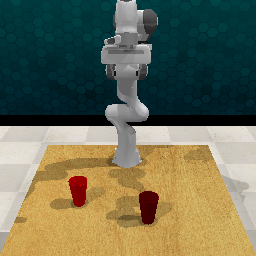

In [15]:
img = Image.open("../dataset/RLBench3/train/PickUpCup/00000/image/front_rgb_00000000.png")
pos_img = Image.new('L',(256,256))
d = ImageDraw.Draw(img)

img

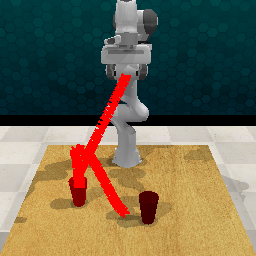

In [16]:
d.line([(int(u), int(v)) for u, v in zip(u_list,v_list)], fill=(255), width=10) 
img

In [7]:
pickle_data.keys()

dict_keys(['front_extrinsic_matrix', 'front_intrinsic_matrix', 'left_shoulder_extrinsic_matrix', 'left_shoulder_intrinsic_matrix', 'right_shoulder_extrinsic_matrix', 'right_shoulder_intrinsic_matrix', 'wrist_extrinsic_matrix', 'wrist_intrinsic_matrix', 'gripper_joint_positions', 'gripper_matrix', 'gripper_open', 'gripper_pose', 'gripper_touch_forces', 'joint_forces', 'joint_positions', 'joint_velocities', 'joints', 'task_low_dim_state'])

In [9]:
pickle_data['gripper_pose'][:3]

array([0.30167332, 0.1817728 , 1.1287353 ])

In [5]:
intrinsic_matrix = pickle_data['front_intrinsic_matrix']
pos_data = np.array(pickle_data['gripper_pose'][:3]) # x,y,z
pos_data = pos_data / pos_data[2] # u,v,1
uv_result = np.dot(intrinsic_matrix, pos_data)

In [6]:
uv_result[:2]

array([ 79.85652931, 137.46738132])

---


In [ ]:
def train_val_split(root_dir, num_val, num_test=0, seed=1):
    # num_val -> validation data for each class
    train_list = []
    val_list = []
    test_list = []

    for actionname in os.listdir(root_dir):
        folder_list = []
        if actionname in ['else', 'templete']:
            continue
        elif os.path.isfile(os.path.join(root_dir, actionname)):
            continue
        
        for foldername in os.listdir(os.path.join(root_dir, actionname)):
            folder_list.append(os.path.join(root_dir, actionname, foldername))
    
        random.seed(seed)
        val_sample = random.sample(folder_list, num_val)
    
        for i in val_sample:
            folder_list.remove(i)

        if num_test > 0:
            test_sample = random.sample(folder_list, num_test)

            for i in test_sample:
                folder_list.remove(i)
            
            test_list.extend(test_sample)

        train_list.extend(folder_list)
        val_list.extend(val_sample)
    
    train_list.sort()
    val_list.sort()
    test_list.sort()

    return train_list, val_list, test_list

In [ ]:
def add_data(self, folder_list):
        # for data preparation
        self.data_dict = {}
        self.data_dict['index_list'] = []
        self.data_dict['action_list'] = []
        self.data_dict['sequence'] = []
        self.data_dict['sequence_index2action'] = []
        image_index = 0
        
        for folder_path in folder_list:
            start_index = image_index
            data_folder_path = os.path.abspath(os.path.join(folder_path,'output'))
            json_path = os.path.abspath(os.path.join(folder_path,'calibration_data','realsensecalib_result.json'))

            csv_list = os.listdir(data_folder_path)
            if len(csv_list) == 4:
                for i in csv_list:
                    if 'calib_pos_' in i:
                        csv_file_name = i
            else:
                csv_file_name = 'calib_pos.csv'
                
            csv_path = os.path.join(data_folder_path,csv_file_name)
            
            df1 = pd.read_csv(csv_path)

            df = df1.loc[:,:'Opti_time']
            for i in self.target_key:
                df2 = df1.loc[:,i]
                df = pd.concat([df,df2],axis=1)

            self.label_list = list(df)
            csv_data_list = df.values.tolist()

            image_name_list = df.loc[:,self.label_list[0]].values.tolist()
            
            hand_data_list = df.loc[:,'hand:1':'hand:15.2'].values.tolist()
            center_check = True
            for i in range(len(image_name_list)):
                if self.skip_until_move:
                    if i == 0:
                        hand_center = self.hand_centor(hand_data_list[i])
                        continue
                    elif center_check:
                        new_hand_center = self.hand_centor(hand_data_list[i])
                        diff = np.sum(np.abs(new_hand_center - hand_center)) / 3
                        hand_center = new_hand_center

                    if diff <= 0.001:
                        continue
                    else:
                        center_check = False

                _, decimal = "{0:.5f}".format(image_name_list[i]).split('.')
                integer, _ = str(image_name_list[i]).split('.')
                integer = integer.zfill(5)
                image_name = "{}.{}.png".format(integer, decimal)
                rgb_image_path = os.path.join(data_folder_path,'RGB',image_name)
                depth_image_path = os.path.join(data_folder_path,'DEPTH',image_name)
                posture = csv_data_list[i]
                action = self.get_action(rgb_image_path)
                if action not in self.data_dict['action_list']:
                    self.data_dict['action_list'].append(action)
                    
                self.data_dict[str(image_index)] = {}
                self.data_dict[str(image_index)]['pose'] = posture
                self.data_dict[str(image_index)]['rgb_image_path'] = rgb_image_path
                self.data_dict[str(image_index)]['depth_image_path'] = depth_image_path
                self.data_dict[str(image_index)]['camera_info'] = self.load_json(json_path)
                self.data_dict[str(image_index)]['action'] = action

                image_index += 1

            for i in range(start_index, image_index - self.pred_len):
                self.data_dict[str(i)]['start_index'] = start_index
                self.data_dict[str(i)]['end_index'] = image_index - 1
                self.data_dict['index_list'].append(i)

            self.data_dict['sequence'].append([start_index, image_index - 1])
            self.data_dict['sequence_index2action'].append(action)

In [31]:
def split_posdata(pos_data):
    # to split all of position data into each position data
    assert len(pos_data) % 3 == 0, 'dimension of position data is wrong'
    iteration = int(len(pos_data) / 3)
    output_list = []
    for i in range(iteration):
        output_list.append(pos_data[3*i:3*(i+1)])

    return output_list
    
def hand_centor(pos):
    pos_list = split_posdata(pos)
    center_pos = np.zeros(3)
    for i in pos_list:
        center_pos = center_pos + np.array(i)
    center_pos = center_pos / len(pos_list)
    return center_pos

def add_serial_data(main_data, targetname, start, end, marker=True, semicolon=True):
    if start == 0:
        raise ValueError("start num >= 1")

    for i in range(start, end + 1):
        for j in ["",".1",".2"]:
            if marker:
                main_data.append("{}:Marker{}{}".format(targetname,i,j))
            elif semicolon:
                main_data.append("{}:{}{}".format(targetname,i,j))
            else:
                main_data.append("{}{}{}".format(targetname,i,j))
    return main_data

def load_json(json_path):
    # load json data
    with open(json_path) as f:
        data = f.read()
    data = json.loads(data)
    return data

In [32]:
target_key = add_serial_data([], "hand", 1, 15, False, True)
target_key = add_serial_data(target_key, "knife", 1 ,6, True)
print(target_key)

['hand:1', 'hand:1.1', 'hand:1.2', 'hand:2', 'hand:2.1', 'hand:2.2', 'hand:3', 'hand:3.1', 'hand:3.2', 'hand:4', 'hand:4.1', 'hand:4.2', 'hand:5', 'hand:5.1', 'hand:5.2', 'hand:6', 'hand:6.1', 'hand:6.2', 'hand:7', 'hand:7.1', 'hand:7.2', 'hand:8', 'hand:8.1', 'hand:8.2', 'hand:9', 'hand:9.1', 'hand:9.2', 'hand:10', 'hand:10.1', 'hand:10.2', 'hand:11', 'hand:11.1', 'hand:11.2', 'hand:12', 'hand:12.1', 'hand:12.2', 'hand:13', 'hand:13.1', 'hand:13.2', 'hand:14', 'hand:14.1', 'hand:14.2', 'hand:15', 'hand:15.1', 'hand:15.2', 'knife:Marker1', 'knife:Marker1.1', 'knife:Marker1.2', 'knife:Marker2', 'knife:Marker2.1', 'knife:Marker2.2', 'knife:Marker3', 'knife:Marker3.1', 'knife:Marker3.2', 'knife:Marker4', 'knife:Marker4.1', 'knife:Marker4.2', 'knife:Marker5', 'knife:Marker5.1', 'knife:Marker5.2', 'knife:Marker6', 'knife:Marker6.1', 'knife:Marker6.2']


In [33]:
import os
import pickle
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd

root_dir = os.path.abspath('../dataset/HMD')
folder_list = []

for actionname in os.listdir(root_dir):
    if actionname in ['else', 'templete']:
        continue
    elif os.path.isfile(os.path.join(root_dir, actionname)):
        continue
        
    for foldername in os.listdir(os.path.join(root_dir, actionname)):
        folder_list.append(os.path.join(root_dir, actionname, foldername))

In [38]:
data_dict = {}
image_index = 0

for folder_path in folder_list:
    start_index = image_index
    data_folder_path = os.path.abspath(os.path.join(folder_path,'output'))
    json_path = os.path.abspath(os.path.join(folder_path,'calibration_data','realsensecalib_result.json'))

    csv_list = os.listdir(data_folder_path)
    if len(csv_list) == 4:
        for i in csv_list:
            if 'calib_pos_' in i:
                csv_file_name = i
    else:
        csv_file_name = 'calib_pos.csv'

    csv_path = os.path.join(data_folder_path,csv_file_name)

    df1 = pd.read_csv(csv_path)

    df = df1.loc[:,:'Opti_time']
    for i in target_key:
        df2 = df1.loc[:,i]
        df = pd.concat([df,df2],axis=1)

    label_list = list(df)
    csv_data_list = df.values.tolist()

    image_name_list = df.loc[:,label_list[0]].values.tolist()

    hand_data_list = df.loc[:,'hand:1':'hand:15.2'].values.tolist()
    center_check = True
    hand_center_list = []
    for i in range(len(image_name_list)):
        if True:
            if i == 0:
                hand_center = hand_centor(hand_data_list[i])
                hand_center_list.append(hand_center)
                continue
            elif center_check:
                new_hand_center = hand_centor(hand_data_list[i])
                diff = np.sum(np.abs(new_hand_center - hand_center)) / 3
                hand_center = new_hand_center

            if diff <= 0.001:
                continue
            else:
                center_check = False
            
            if not center_check:
                uv = get_uv(pos, json_data['dist'], json_data['mtx'])
                hand_center_list.append(hand_centor(hand_data_list[i]))

In [39]:
hand_center_list

[array([-0.08713387,  0.04583405,  1.06693444]),
 array([-0.08459645,  0.0433027 ,  1.06032226]),
 array([-0.07412267,  0.04277792,  1.05596628]),
 array([-0.06174075,  0.04265967,  1.05319959]),
 array([-0.04223785,  0.04230646,  1.05108029]),
 array([-0.02488058,  0.04294996,  1.04840798]),
 array([0.00217668, 0.04478318, 1.04138904]),
 array([0.02098909, 0.04611764, 1.03674307]),
 array([0.05708825, 0.04998222, 1.03232109]),
 array([0.07953819, 0.05231017, 1.03060724]),
 array([0.11550614, 0.05768775, 1.03143631]),
 array([0.15255579, 0.06630359, 1.03884897]),
 array([0.16751486, 0.07429507, 1.04815986]),
 array([0.17107642, 0.075806  , 1.05066056]),
 array([0.17155699, 0.07493887, 1.04997648]),
 array([0.16924147, 0.07431454, 1.0445988 ]),
 array([0.15495449, 0.06799432, 1.03523569]),
 array([0.13191532, 0.05695193, 1.02908576]),
 array([0.10944477, 0.04600414, 1.02757956]),
 array([0.09579551, 0.03925609, 1.02780961]),
 array([0.07417822, 0.02978888, 1.02567127]),
 array([0.060973

In [ ]:
def transform_pos2image(pos, json_data, image_size):
        uv = get_uv(pos, json_data['dist'], json_data['mtx'])
        pos_image = self.make_pos_image(image_size,uv)
        if self.ToTensor != None:
            pos_image = self.ToTensor(pos_image)
        uv = torch.tensor(uv)[:,:2]
        uv_mask = torch.where(torch.isnan(uv), 0., 1.)
        uv = torch.where(torch.isnan(uv), 0., uv)
        return pos_image, uv, uv_mask

def modify_distortion(vec,dist_vec):
        # modify distortion
        x,y,_ = vec
        r2 = (x*x) + (y*y)
        r4 = r2*r2
        r6 = r4*r2
        dist = dist_vec[0]
        mod_x = x*(1+(dist[0]*r2)+(dist[1]*r4)+(dist[4]*r6)) + 2*dist[2]*x*y + dist[3]*(r2+(2*x*x))
        mod_y = y*(1+(dist[0]*r2)+(dist[1]*r4)+(dist[4]*r6)) + 2*dist[3]*x*y + dist[2]*(r2+(2*y*y))
        ### TODO confirm this effect ###
        return [x,y,1]

In [ ]:
def get_uv(pos_data, dist_vec, intrinsic_matrix):
        # transfer position data(based on motive coordinate) to camera coordinate
        split = split_posdata(pos_data)
        uv_result_list = []
        for ins in split:
            ins = np.array(ins)
            ins = ins / ins[2]
            mod_ins = modify_distortion(ins,dist_vec)
            uv_result = np.dot(intrinsic_matrix,mod_ins)
            uv_result_list.append(uv_result)
        return uv_result_list